In [2]:
%autosave 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats


Autosaving every 1 seconds


## PV with square activation function and square in learning rule

In [3]:
def phi_square(_x):
    x = np.array([_x])
    x[x<=0] = 0
    x[x>0] = x[x>0]**2 
    x[x>20] = 20
    return x[0]

<ipython-input-4-32e68bedbca2>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./PV_activation_function.pdf', bbox_inches='tight',rasterized=True)


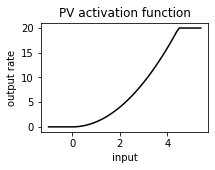

In [4]:
x = np.arange(-1,5.5,0.1)
y = np.empty((len(x)))
for i,x_i in enumerate(x):
    y[i] = phi_square(x_i)
    
plt.figure(figsize=(3,2))
plt.plot(x,y,'k')
plt.ylabel('output rate')
plt.xlabel('input')
plt.title('PV activation function')
plt.savefig('./PV_activation_function.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-5-e0e20e66dbc8>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./SST_activation_function.pdf', bbox_inches='tight',rasterized=True)


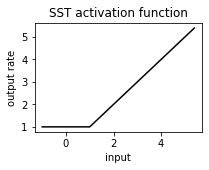

In [5]:
x = np.arange(-1,5.5,0.1)
y = np.ones((len(x)))
y[x>1]= x[x>1]
    
plt.figure(figsize=(3,2))
plt.plot(x,y,'k')
plt.ylabel('output rate')
plt.xlabel('input')
plt.title('SST activation function')
plt.savefig('./SST_activation_function.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-8-0a1a086a96b0>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./whisker_input_y1.pdf', bbox_inches='tight',rasterized=True)


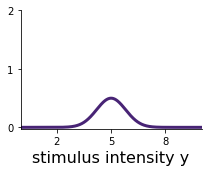

In [8]:
Y1_sigma = 0.8
Y2_sigma = 0.4

import scipy.stats as stats
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)
plt.figure(figsize = (3,2.5))
a = plt.subplot(111)
plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.1),linewidth =3,label='x1')
#plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='x2')
#plt.legend()
plt.xlim(0,10)
plt.yticks([0,1,2],[0,1,2])
plt.xticks([2,5,8],[2,5,8])
plt.xlabel('stimulus intensity y', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('./whisker_input_y1.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-7-e8c13a350e81>:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./whisker_input.pdf', bbox_inches='tight',rasterized=True)


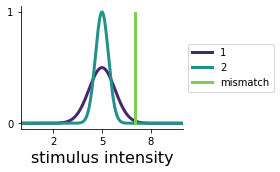

In [7]:
import scipy.stats as stats
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)
plt.figure(figsize = (4,2.5))
a = plt.subplot(111)
plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.1),linewidth =3,label='1')
plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='2')
plt.plot(np.ones((100))*7,np.arange(0,1,0.01),color = cm.viridis(0.8),linewidth=3, label = 'mismatch')
ldg = plt.legend()
plt.xlim(0,10)
plt.yticks([0,1],[0,1])
plt.xticks([2,5,8],[2,5,8])
plt.xlabel('stimulus intensity', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
a.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=False)
#a.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('./whisker_input.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-8-da2113ec5a83>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./whisker_input_y2.pdf', bbox_inches='tight',rasterized=True)


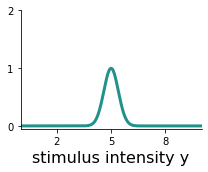

In [8]:
import scipy.stats as stats
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)
plt.figure(figsize = (3,2.5))
a = plt.subplot(111)
#plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.3),linewidth =3,label='x1')
plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='x2')
#plt.legend()
plt.xlim(0,10)
plt.yticks([0,1,2],[0,1,2])
plt.xticks([2,5,8],[2,5,8])
plt.xlabel('stimulus intensity y', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('./whisker_input_y2.pdf', bbox_inches='tight',rasterized=True)


## No plasticity and no Y, look at how X drives E, PV and SST

In [16]:
T = 100000
T2=100
rX1 = np.zeros((T2))
rX2 = np.zeros((T2))
rX1[:int(T2/2)] = 1
rX2[int(T2/2):] = 1
rP = 0.0
rS = 0.0
rE = 0.0
tau_E = 1.0
beta_S = 0.1 
beta_P = 0.1


wEP = np.array([1.0])
wES = np.array([-1.0])
wEY1 = np.array([1.0])
wEY2 = np.array([1.0])

Y1_new_mean = Y1_mean + 2.0
Y2_new_mean = Y2_mean + 2.0
#Y1_sigma = 0.5
#Y2_sigma = 0.1
#Y3_sigma = 1.0

#rY1 = Y1_sigma*np.random.randn(T)+Y1_mean
rY1n = np.ones((T))*Y1_new_mean
rY1n[int(T2/2):] = 0
rY2n = np.ones((T))*Y2_new_mean
#rY2 = Y2_sigma*np.random.randn(T)+Y2_mean
rY2n[:int(T2/2)] = 0

rP_monitor = np.empty((T2))
rE_monitor = np.empty((T2))

IP_monitor = np.empty((T2))
wPX1_monitor = np.empty((T2))
wPX2_monitor = np.empty((T2))

rS_monitor = np.empty((T2))
IS_monitor = np.empty((T2))
wSX1_monitor = np.empty((T2))
wSX2_monitor = np.empty((T2))
#wPB * rB[t]

#wPX1 = wPX1*10
#wPX2 = wPX2*10

for t in range(T2):
    #beta_S = (T*1.0-t)/T
    #beta_P = (T*1.0-t)/T
    drS = (-rS + (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1n[t] + wSY2 * rY2n[t]))/tau_S
    #drS = (-rS + wSX1 * rX1[t] + wSX2 * rX2[t])/tau_S
    drP = (-rP + phi_square((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t] + wPS * rS)))/tau_P
    #drP = (-rP + phi_square(wPX1 * rX1[t] + wPX2 * rX2[t] + wPS * rS))/tau_P
    drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1n[t] + wEY2 * rY2n[t] + wES * rS))/tau_E
    IS_monitor[t] = (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t])
    rP_monitor[t] = rP
    rS_monitor[t] = rS
    rE_monitor[t] = rE
    wPX1_monitor[t] = wPX1
    wPX2_monitor[t] = wPX2
    wSX1_monitor[t] = wSX1
    wSX2_monitor[t] = wSX2

    rP += dt*drP
    rS += dt*drS
    rE += dt*drE

[0.         5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843 5.16791843
 5.16791843 5.16791843 5.16791843 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794
 5.18838794 5.18838794 5.18838794 5.18838794 5.18838794 5.1883

<ipython-input-17-0e359fee8961>:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./rates_and_weights_Gauss_mismatch.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-17-0e359fee8961>:79: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_PV_SST_rates_Gauss_mismacth.pdf', bbox_inches='tight',rasterized=True)


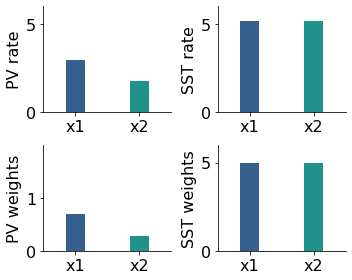

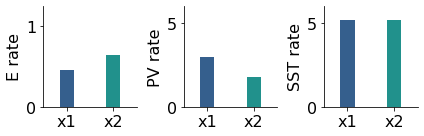

In [17]:
plt.figure(figsize=(5,4))

a1 = plt.subplot(221)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(222)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
a3 = plt.subplot(223)
plt.bar([0,1],[wPX1_monitor[-1],wPX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,2)
plt.xlim(-0.5,1.5)
plt.yticks([0,1],[0,1],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('PV weights',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a4 = plt.subplot(224)
plt.bar([0,1],[wSX1_monitor[-1],wSX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a4.spines['top'].set_visible(False)
a4.spines['right'].set_visible(False)
plt.ylabel('SST weights',fontsize=16)
#plt.xlabel('time')
plt.tight_layout()
print(rS_monitor)
print(rP_monitor)
plt.savefig('./rates_and_weights_Gauss_mismatch.pdf', bbox_inches='tight',rasterized=True)


plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[5:int(T2/2)]),np.mean(rE_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,1.25)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()

plt.savefig('./E_PV_SST_rates_Gauss_mismacth.pdf', bbox_inches='tight',rasterized=True)

In [22]:
T2=100
rX1 = np.zeros((T2))
rX2 = np.zeros((T2))
rX1[:int(T2/2)] = 1
rX2[int(T2/2):] = 1
rP = 0.0
rS = 0.0
rE = 0.0
tau_E = 1.0


wEP = np.array([1.0])
wES = np.array([-1.0])
wEY1 = np.array([1.0])
wEY2 = np.array([1.0])

Y1n = Y1+2.0
#Y2 = [4.0,5.0,6.0]

rY1n = np.ones((T2))*Y1n
rY1n[int(T2/2):] = 0
rY2n = np.ones((T2))*Y1n
rY2n[:int(T2/2)] = 0

rP_monitor = np.empty((T2))
rE_monitor = np.empty((T2))

IP_monitor = np.empty((T2))
wPX1_monitor = np.empty((T2))
wPX2_monitor = np.empty((T2))

rS_monitor = np.empty((T2))
IS_monitor = np.empty((T2))
wSX1_monitor = np.empty((T2))
wSX2_monitor = np.empty((T2))
XtoP = np.empty((T2))
YtoP = np.empty((T2))
StoP = np.empty((T2))

#wPB * rB[t]

#wPX1 = wPX1*10
#wPX2 = wPX2*10

for t in range(T2):
    #beta_S = (T*1.0-t)/T
    #beta_P = (T*1.0-t)/T
    drS = (-rS + (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1n[t] + wSY2 * rY2n[t]))/tau_S
    #drS = (-rS + wSX1 * rX1[t] + wSX2 * rX2[t])/tau_S
    drP = (-rP + phi_square((1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t]) + beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t] + wPS * rS)))/tau_P
    #drP = (-rP + phi_square(wPX1 * rX1[t] + wPX2 * rX2[t] + wPS * rS))/tau_P
    drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1n[t] + wEY2 * rY2n[t] + wES * rS))/tau_E
    IS_monitor[t] = (1-beta_S)*(wSX1 * rX1[t] + wSX2 * rX2[t]) + beta_S*(wSY1 * rY1[t] + wSY2 * rY2[t])
    rP_monitor[t] = rP
    rS_monitor[t] = rS
    rE_monitor[t] = rE
    XtoP[t] = (1-beta_P)*(wPX1 * rX1[t] + wPX2 * rX2[t])
    StoP[t] = beta_P*(wPS * rS)
    YtoP[t] = beta_P*(wPY1 * rY1n[t] + wPY2 * rY2n[t])

    wPX1_monitor[t] = wPX1
    wPX2_monitor[t] = wPX2
    wSX1_monitor[t] = wSX1
    wSX2_monitor[t] = wSX2

    rP += dt*drP
    rS += dt*drS
    rE += dt*drE

[0.         5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.2        5.2        5.2
 5.2        5.2        5.2        5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743 5.15818743
 5.15818743 5.15818743 5.15818743 5.15818743 5.1581

<ipython-input-23-6ea9fb988175>:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./rates_and_weights_discrete.eps', bbox_inches='tight',rasterized=True)
<ipython-input-23-6ea9fb988175>:79: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_PV_SST_rates_discrete.pdf', bbox_inches='tight',rasterized=True)


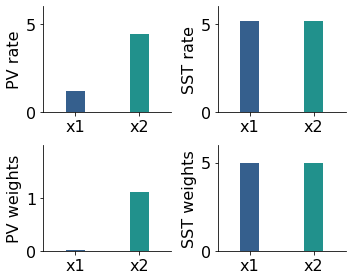

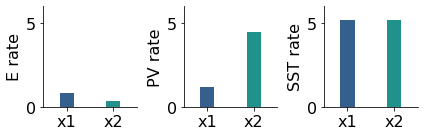

In [23]:
plt.figure(figsize=(5,4))

a1 = plt.subplot(221)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(222)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
a3 = plt.subplot(223)
plt.bar([0,1],[wPX1_monitor[-1],wPX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,2)
plt.xlim(-0.5,1.5)
plt.yticks([0,1],[0,1],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('PV weights',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a4 = plt.subplot(224)
plt.bar([0,1],[wSX1_monitor[-1],wSX2_monitor[-1]],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a4.spines['top'].set_visible(False)
a4.spines['right'].set_visible(False)
plt.ylabel('SST weights',fontsize=16)
#plt.xlabel('time')
plt.tight_layout()
print(rS_monitor)
print(rP_monitor)
plt.savefig('./rates_and_weights_discrete.eps', bbox_inches='tight',rasterized=True)


plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[5:int(T2/2)]),np.mean(rE_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[5:int(T2/2)]),np.mean(rP_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[5:int(T2/2)]),np.mean(rS_monitor[int(T2/2)+5:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()

plt.savefig('./E_PV_SST_rates_discrete.pdf', bbox_inches='tight',rasterized=True)

In [24]:
def run_sweep(param_name, value_range):
    params = {'mean': 5.0,
             'sigma': 0.5,
             'wP': 6.0}
    PV_rates = np.empty((len(value_range)))
    SST_rates = np.empty((len(value_range)))
    E_rates = np.empty((len(value_range)))
    PV_std = np.empty((len(value_range)))
    SST_std = np.empty((len(value_range)))
    E_std = np.empty((len(value_range)))
    
    for k, param_value in enumerate(value_range):
        
        params[param_name] = param_value
        #sim parameters
        dt = 1
        T = 100000 # number of time steps

        # time constants
        tau_P = 1
        tau_S = 1
        tau_E = 1.0

        # weights
        # to PV
        wPB = np.array([1.0])
        wPY1 = np.array([params['wP']])
        wPX1 = np.array([0.01]) # small intitial weights
        wPS = np.array([-params['wP']])

        # to SST
        wSX1 = np.array([0.1]) # small intitial weights
        wSY1 = np.array([1.0])

        # to E
        wEP = np.array([1.0])
        wES = np.array([-1.0])
        wEY1 = np.array([1.0])
        wEY2 = np.array([1.0])

        # nudging parameter
        beta_S = 0.1 
        beta_P = 0.1


        # inputs
        # sound
        rX1 = np.ones((T))

        # whisker
        Y1_mean = params['mean']
        Y1_sigma = params['sigma']

        rY1 = Y1_sigma*np.random.randn(T)+Y1_mean

        #learning rate
        eta_S = 0.1
        eta_P = 0.001

        #initial rates
        rP = 0.0#phi_square(rB[0])
        rS = 0.0
        rE = 0.0

        # monitors
        rP_monitor = np.empty((T))
        rE_monitor = np.empty((T))
        rS_monitor = np.empty((T))

        wPX1_monitor = np.empty((T))
        wSX1_monitor = np.empty((T))


        for t in range(T):

            drS = (-rS + (1-beta_S)*(wSX1 * rX1[t]) + beta_S*(wSY1 * rY1[t]))/tau_S
            drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t]) + beta_P*(wPY1 * rY1[t] + wPS * rS))))/tau_P
            drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1[t] + wES * rS))/tau_E

            # store monitors
            rP_monitor[t] = rP
            rS_monitor[t] = rS
            rE_monitor[t] = rE
            wPX1_monitor[t] = wPX1
            wSX1_monitor[t] = wSX1


            # rate changes
            rP += dt*drP
            rS += dt*drS
            rE += dt*drE

            # weight changes
            wPX1 += eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
            wSX1 += eta_S * ((rS - (wSX1*rX1[t])) * rX1[t])

        PV_rates[k] = np.mean(rP_monitor[100:])
        SST_rates[k] = np.mean(rS_monitor[100:])
        E_rates[k] = np.mean(rE_monitor[100:])
        PV_std[k] = np.std(rP_monitor[100:])
        SST_std[k] = np.std(rS_monitor[100:])
        E_std[k] = np.std(rE_monitor[100:])
        
    return E_rates, SST_rates, PV_rates, E_std, SST_std, PV_std



In [25]:
sigma_range= np.arange(0.0,1.1,0.1)
mean_range= np.arange(0.0,5.1,1.0)
wP_range= np.arange(1.0,10.1,1.0)
E_rates_mean, SST_rates_mean, PV_rates_mean, E_std_mean, SST_std_mean, PV_std_mean = run_sweep('mean',mean_range)
E_rates_sigma, SST_rates_sigma, PV_rates_sigma, E_std_sigma, SST_std_sigma, PV_std_sigma = run_sweep('sigma',sigma_range)


In [26]:
sigma_range= np.arange(0.0,1.1,0.1)
mean_range= np.arange(0.0,5.1,1.0)
wP_range= np.arange(1.0,10.1,1.0)

#PV_rates = np.empty((len(sigma_range)))
#SST_rates = np.empty((len(sigma_range)))
#E_rates = np.empty((len(sigma_range)))

#PV_rates = np.empty((len(mean_range)))
#SST_rates = np.empty((len(mean_range)))
#E_rates = np.empty((len(mean_range)))

PV_rates = np.empty((len(wP_range)))
SST_rates = np.empty((len(wP_range)))
E_rates = np.empty((len(wP_range)))


wP = 6.0
mean= 5.0
sigma= 0.5
#for k, sigma in enumerate(sigma_range):
#for k, mean in enumerate(mean_range):
for k, wP in enumerate(wP_range):
    #sim parameters
    dt = 1
    T = 100000 # number of time steps

    # time constants
    tau_P = 1
    tau_S = 1
    tau_E = 1.0

    # weights
    # to PV
    wPB = np.array([1.0])
    wPY1 = np.array([wP])
    wPX1 = np.array([0.01]) # small intitial weights
    wPS = np.array([-wP])

    # to SST
    wSX1 = np.array([0.1]) # small intitial weights
    wSY1 = np.array([1.0])

    # to E
    wEP = np.array([1.0])
    wES = np.array([-1.0])
    wEY1 = np.array([1.0])
    wEY2 = np.array([1.0])

    # nudging parameter
    beta_S = 0.1 
    beta_P = 0.1


    # inputs
    # sound
    rX1 = np.ones((T))

    # whisker
    Y1_mean = mean
    Y1_sigma = sigma

    rY1 = Y1_sigma*np.random.randn(T)+Y1_mean

    #learning rate
    eta_S = 0.1
    eta_P = 0.001

    #initial rates
    rP = 0.0#phi_square(rB[0])
    rS = 0.0
    rE = 0.0

    # monitors
    rP_monitor = np.empty((T))
    rE_monitor = np.empty((T))
    rS_monitor = np.empty((T))

    wPX1_monitor = np.empty((T))
    wSX1_monitor = np.empty((T))


    for t in range(T):

        drS = (-rS + (1-beta_S)*(wSX1 * rX1[t]) + beta_S*(wSY1 * rY1[t]))/tau_S
        drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t]) + beta_P*(wPY1 * rY1[t] + wPS * rS))))/tau_P
        drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1[t] + wES * rS))/tau_E

        # store monitors
        rP_monitor[t] = rP
        rS_monitor[t] = rS
        rE_monitor[t] = rE
        wPX1_monitor[t] = wPX1
        wSX1_monitor[t] = wSX1


        # rate changes
        rP += dt*drP
        rS += dt*drS
        rE += dt*drE

        # weight changes
        wPX1 += eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
        wSX1 += eta_S * ((rS - (wSX1*rX1[t])) * rX1[t])
    
    PV_rates[k] = np.mean(rP_monitor[100:])
    SST_rates[k] = np.mean(rS_monitor[100:])
    E_rates[k] = np.mean(rE_monitor[100:])
    


<ipython-input-27-aad618cdb478>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./SST_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-27-aad618cdb478>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-27-aad618cdb478>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./PV_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)


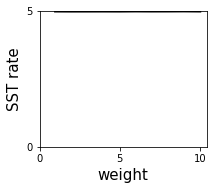

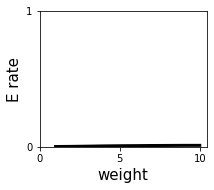

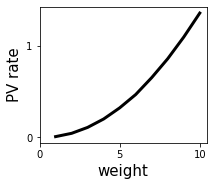

In [27]:
plt.figure(figsize=(3,2.5))
plt.plot(wP_range,SST_rates, color = 'k',linewidth=3)
plt.xlabel('weight',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0,5,10],[0,5,10])
plt.yticks([0,5],[0,5])
plt.savefig('./SST_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(wP_range,E_rates, color = 'k',linewidth=3)
plt.xlabel('weight',fontsize=15)
plt.ylabel('E rate',fontsize=15)
plt.xticks([0,5,10],[0,5,10])
plt.yticks([0,1],[0,1])
plt.savefig('./E_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(wP_range,PV_rates, color = 'k',linewidth=3)
plt.xlabel('weight',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0,5,10],[0,5,10])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_wP.pdf', bbox_inches='tight',rasterized=True)

<ipython-input-28-f33626cd3c5b>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./SST_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-28-f33626cd3c5b>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./E_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)
<ipython-input-28-f33626cd3c5b>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./PV_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)


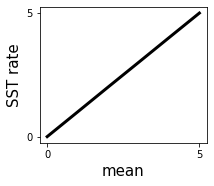

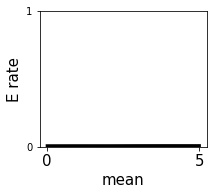

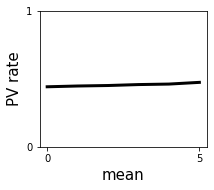

In [28]:
plt.figure(figsize=(3,2.5))
plt.plot(mean_range,SST_rates_mean, color = 'k',linewidth=3)
plt.xlabel('mean',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0,5],[0,5])
plt.yticks([0,5],[0,5])
plt.savefig('./SST_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(mean_range,E_rates_mean, color = 'k',linewidth=3)
plt.xlabel('mean',fontsize=15)
plt.ylabel('E rate',fontsize=15)
plt.xticks([0,5],[0,5],fontsize=15)
plt.yticks([0,1],[0,1])
plt.savefig('./E_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(mean_range,PV_rates_mean, color = 'k',linewidth=3)
plt.xlabel('mean',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0,5],[0,5])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_mean.pdf', bbox_inches='tight',rasterized=True)

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

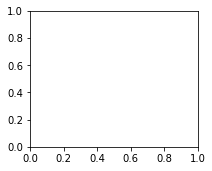

In [29]:
plt.figure(figsize=(3,2.5))
plt.plot(sigma_range**2,SST_rates, color = 'k',linewidth=3)
plt.xlabel('sigma^2',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,5],[0,5])
plt.ylim(0,6)
plt.savefig('./SST_asfctof_sigma2.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(sigma_range**2,E_rates, color = 'k',linewidth=3)
plt.xlabel('sigma^2',fontsize=15)
plt.ylabel('E rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,1],[0,1])
plt.savefig('./E_asfctof_sigma2.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(sigma_range,PV_rates, color = 'k',linewidth=3)
plt.xlabel('sigma',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_sigma.pdf', bbox_inches='tight',rasterized=True)

plt.figure(figsize=(3,2.5))
plt.plot(sigma_range**2,PV_rates, color = 'k',linewidth=3)
plt.xlabel('sigma^2',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0.0,0.5,1.0],[0.0,0.5,1.0])
plt.yticks([0,1],[0,1])
plt.savefig('./PV_asfctof_sigma2.pdf', bbox_inches='tight',rasterized=True)


1.3772159803752886
1.3324543398391244


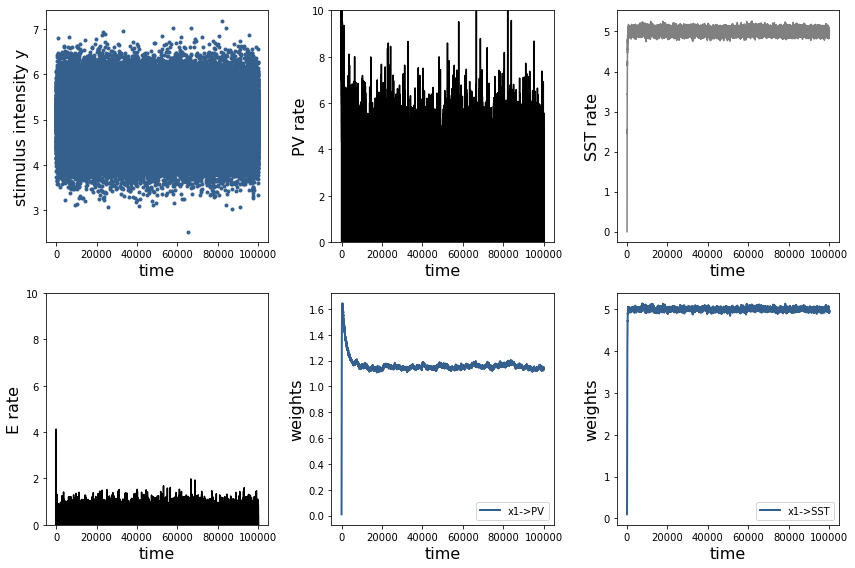

In [30]:
print(np.mean(rP_monitor[100:int(T/2)]))
print(np.mean(rP_monitor[int(T/2)+100:]))

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(rY1,'.',color =cm.viridis(.3))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
#plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
plt.ylabel('stimulus intensity y',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.legend(loc='lower right')
plt.subplot(234)
plt.plot(rE_monitor, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('E rate',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)
plt.subplot(232)
plt.plot(rP_monitor, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('PV rate',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)
#plt.xlim(1000,2000)
#plt.legend(loc='lower right')
plt.subplot(233)
plt.plot(rS_monitor, color = 'gray')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])))
plt.ylabel('SST rate',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.legend(loc = 'lower right')
plt.subplot(235)
plt.plot(wPX1_monitor, label='x1->PV', color =cm.viridis(.3),linewidth=2)
#plt.plot(wPX2_monitor, label='x2->PV',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights',fontsize=16)
plt.xlabel('time',fontsize=16)
#plt.ylim(0,1)
plt.legend(loc='lower right')
plt.subplot(236)
plt.plot(wSX1_monitor, label='x1->SST', color =cm.viridis(.3),linewidth=2)
#plt.plot(wSX2_monitor, label='x2->SST',color =cm.viridis(.5),linewidth=2)
plt.ylabel('weights',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.legend(loc='lower right')
plt.tight_layout()


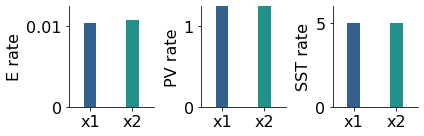

In [31]:
plt.figure(figsize=(6,2))

a1 = plt.subplot(131)
plt.bar([0,1],[np.mean(rE_monitor[100:int(T/2)]),np.mean(rE_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,0.01],[0,0.01],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,0.0125)
plt.xlim(-0.5,1.5)
a2 = plt.subplot(132)
plt.bar([0,1],[np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,1.25)
plt.xlim(-0.5,1.5)
a3 = plt.subplot(133)
plt.bar([0,1],[np.mean(rS_monitor[100:int(T/2)]),np.mean(rS_monitor[int(T/2)+100:])],color=[cm.viridis(.3),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

plt.tight_layout()


In [18]:
def run_network(mean= 5.0, sigma= 0.5, wP= 6.0, w_init_PV = 0.01, w_init_R = 0.1, plastic=True):
    """
    Parameters
    ----------
    mean : float
        mean of the stimulus distribution
    sigma: float
        standard deviation of the stimulus distribution
    wP : float
        connection weight from R to PV and from SST to PV
    w_init_PV : float
        initial weight from Y1 to PV
    w_init_R : float
        initial weight from Y1 to R
    plastic : boolean
        truth value indicates whether plasticity is switched on or off   
        
    Returns
    ----------
    E_avg : float
        mean rate of error neuron
    PV_avg : float
        mean rate of PV
    SST_avg : float
        mean rate of SST
    R_avg : float
        mean rate of R
    wPX1_monitor : array of length t
        weight from X1 to PV over the course of the simulation
    wRX1_monitor : array of length t
        weight from X1 to R over the course of the simulation
    rE_monitor : array of length t
        rate of error neuron over the course of the simulation
    rS_monitor : array of length t
        rate of error neuron over the course of the simulation
    rP_monitor : array of length t
        rate of error neuron over the course of the simulation
    rY1 : array of length t
        whisker deflections over the course of the simulation
    """
    
    #sim parameters
    dt = 1
    T = 100000 # number of time steps

    # time constants
    tau_P = 1.0
    tau_S = 1.0
    tau_E = 1.0
    tau_R = 1.0

    # weights
    # to PV
    wPB = np.array([1.0])
    wPX1 = np.array([w_init_PV]) # small intitial weights
    wPY1 = np.array([wP]) # small intitial weights
    wPS = np.array([-wP])

    # to Representation neuron
    wRX1 = np.array([w_init_R]) # small intitial weight
    wRY1 = np.array([1.0])
    
    # to SST
    wSR = np.array([1.0])

    # to E
    wEP = np.array([1.0])
    wES = np.array([-1.0])
    wEY1 = np.array([1.0])

    # nudging parameter
    beta_R = 0.1 
    beta_P = 0.1


    # inputs
    # sound
    rX1 = np.ones((T))

    # whisker
    Y1_mean = mean
    Y1_sigma = sigma

    rY1 = Y1_sigma*np.random.randn(T)+Y1_mean

    #learning rate
    eta_R = 0.1
    eta_P = 0.001

    #initial rates
    rP = 0.0#phi_square(rB[0])
    rS = 0.0
    rE = 0.0
    rR = 0.0

    # monitors
    rP_monitor = np.empty((T))
    rE_monitor = np.empty((T))
    rS_monitor = np.empty((T))
    rR_monitor = np.empty((T))

    wPX1_monitor = np.empty((T))
    wRX1_monitor = np.empty((T))


    for t in range(T):

        drS = (-rS + wSR * rR)/tau_S
        drR = (-rR + (1-beta_R)*(wRX1 * rX1[t]) + beta_R*(wRY1 * rY1[t]))/tau_R
        drP = (-rP + phi_square(((1-beta_P)*(wPX1 * rX1[t]) + beta_P*(wPY1 * rY1[t] + wPS * rS))))/tau_P
        drE = (-rE + 1.0/(1.0 + wEP * rP) * (wEY1 * rY1[t] + wES * rS))/tau_E

        # store monitors
        rP_monitor[t] = rP
        rS_monitor[t] = rS
        rE_monitor[t] = rE
        rR_monitor[t] = rR
        wPX1_monitor[t] = wPX1
        wRX1_monitor[t] = wRX1


        # rate changes
        rP += dt*drP
        rS += dt*drS
        rE += dt*drE
        rR += dt*drR

        # weight changes
        wPX1 += plastic * eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t])
        print(plastic * eta_P * ((rP - ((wPX1*rX1[t])**2)) * rX1[t]))
        wRX1 += plastic * eta_R * ((rR - (wRX1*rX1[t])) * rX1[t])
    
    PV_avg = np.mean(rP_monitor[100:])
    SST_avg = np.mean(rS_monitor[100:])
    E_avg = np.mean(rE_monitor[100:])
    R_avg = np.mean(rR_monitor[100:])
    PV_std = np.std(rP_monitor[100:])
    SST_std = np.std(rS_monitor[100:])
    E_std = np.std(rE_monitor[100:])
    R_std = np.std(rR_monitor[100:])
    
    return E_avg, PV_avg, SST_avg, R_avg, E_std, PV_std, SST_std, R_std, wPX1_monitor, wRX1_monitor, rE_monitor, rS_monitor, rP_monitor, rY1
    

In [19]:
Y1_mean = 5.0
Y2_mean = 5.0
Y1_sigma = 0.8
Y2_sigma = 0.4
E_avg1, PV_avg1, SST_avg1, R_avg1, E_std1, PV_std1, SST_std1, R_std1, wPX1_monitor, wRX1_monitor, rE1, rS1, rP1, rY1 = run_network(mean= Y1_mean,sigma=Y1_sigma)
E_avg2, PV_avg2, SST_avg2, R_avg2, E_std2, PV_std2, SST_std2, R_std2, wPX2_monitor, wRX2_monitor, rE2, rS2, rP2, rY2 = run_network(mean= Y2_mean,sigma=Y2_sigma)

[0.0130356]
[0.00682299]
[0.00558497]
[0.00664466]
[0.00389709]
[0.00819615]
[0.00572039]
[0.00537433]
[0.01118571]
[0.00808202]
[0.00407472]
[0.00517915]
[0.00819836]
[0.00545283]
[0.01727127]
[0.00842867]
[0.00369858]
[0.00374462]
[0.01059083]
[0.00344281]
[0.0044235]
[0.00482666]
[0.00717219]
[0.00749234]
[0.00472328]
[0.0060359]
[0.00380908]
[0.00453256]
[0.00331863]
[0.00878234]
[0.00352704]
[0.00351717]
[0.00411324]
[0.0046345]
[0.0079202]
[0.00697115]
[0.0021453]
[0.00639154]
[0.00311444]
[0.00426709]
[0.00588994]
[0.00196059]
[0.00579614]
[0.00601223]
[0.00287886]
[0.0015377]
[0.00269111]
[0.00524198]
[0.0066033]
[0.00076323]
[0.0027724]
[0.00119623]
[0.00454293]
[0.00406878]
[0.00247836]
[0.00121012]
[0.00556767]
[0.00304969]
[0.00190344]
[0.00291519]
[0.00413426]
[0.0031157]
[0.00400625]
[0.00404832]
[4.50142696e-05]
[0.00362351]
[0.00220872]
[0.00277792]
[0.00063158]
[0.00276384]
[0.00144684]
[0.00210736]
[0.0029325]
[0.00285219]
[0.00245635]
[0.00087248]
[0.00318308]
[0.005

[-3.06597046e-05]
[0.00075923]
[-0.0003983]
[-0.00037809]
[-1.89095397e-06]
[-0.00011838]
[-0.00036975]
[-8.64251339e-05]
[0.00040237]
[-6.59710839e-06]
[5.92163666e-05]
[0.00127884]
[-0.00049427]
[-0.00049224]
[-0.00048363]
[-0.00041327]
[0.00261178]
[-0.00049529]
[-0.00039351]
[4.84084808e-06]
[0.00038266]
[0.0007053]
[0.00019551]
[-0.00033354]
[0.00012148]
[-5.38236307e-05]
[-0.00036971]
[-0.00027353]
[0.0004548]
[0.00083507]
[-0.00049639]
[0.00126228]
[-0.00019629]
[0.00092949]
[0.00050595]
[-0.00049922]
[0.00144326]
[-0.00047823]
[-0.00039839]
[3.91588755e-05]
[-9.2966364e-05]
[-0.00011036]
[0.00081451]
[-0.00050024]
[-0.0002617]
[-0.00049741]
[0.00020884]
[0.00118763]
[0.00093859]
[-0.00050176]
[-0.00050105]
[-1.45002908e-05]
[0.00100137]
[-0.00050174]
[-0.00010364]
[0.00205162]
[-0.00038013]
[-4.6113759e-05]
[0.00045667]
[-0.000112]
[-0.00017105]
[0.00103615]
[-0.00032636]
[0.00126818]
[-0.00018293]
[0.00034302]
[0.00111126]
[-0.00040555]
[0.0016585]
[-0.00039047]
[2.41296337e-0

[-0.00035035]
[-0.00038273]
[-3.57332505e-05]
[0.00061413]
[-0.00062158]
[-0.00051703]
[-6.04019267e-05]
[-0.00038678]
[0.00031319]
[-0.00062903]
[0.00017265]
[0.00032303]
[-0.00040848]
[-0.0003603]
[-0.00024409]
[0.00025917]
[0.00014515]
[-0.00059354]
[0.0001636]
[0.00036172]
[-0.00060556]
[-0.00016431]
[0.00030629]
[-0.00059712]
[0.00093273]
[0.0006328]
[0.00091655]
[-0.00016024]
[0.00082105]
[-0.00061316]
[-6.59638231e-05]
[-0.00043168]
[-0.0001691]
[-0.00040306]
[-0.00036268]
[0.00084541]
[-0.00020949]
[-0.00029604]
[-0.00040974]
[0.00178017]
[3.98256776e-05]
[-0.00041524]
[-0.00046961]
[-0.00047948]
[-6.76715628e-05]
[-0.00040557]
[-0.00056085]
[0.00025109]
[0.00078471]
[-0.00061817]
[0.00035462]
[-0.00061007]
[-7.89970504e-05]
[-0.0006269]
[-0.00062592]
[-0.00015045]
[-0.00016411]
[-0.0003815]
[0.00056776]
[0.00059989]
[-0.00062567]
[-0.00020846]
[0.00092116]
[0.00078398]
[-1.66563971e-05]
[0.00124737]
[-5.52293346e-05]
[-0.00021273]
[0.0002]
[0.00251954]
[-0.00060643]
[0.0014875

[-0.00044455]
[0.0014547]
[0.00159091]
[0.00057921]
[7.75564282e-05]
[0.00010514]
[-0.00029586]
[-0.00036404]
[0.00112771]
[-0.00039678]
[-0.00056295]
[-5.71950761e-05]
[-0.00019479]
[0.00100871]
[0.00039174]
[-0.00063142]
[-0.00064397]
[9.68464381e-05]
[0.00016801]
[-0.000751]
[-7.76345218e-05]
[0.00208889]
[0.00065744]
[-0.00010652]
[0.00012304]
[-0.00029144]
[0.00074405]
[-0.00016959]
[-9.66226248e-05]
[0.000191]
[-0.00070727]
[0.000274]
[0.0004891]
[0.00041894]
[1.3749325e-05]
[0.00130611]
[0.0001794]
[-0.00036387]
[0.00049995]
[-0.00075868]
[-9.21620749e-06]
[0.000965]
[-0.00044841]
[0.00091427]
[0.00227937]
[-0.00074287]
[-0.00011875]
[-0.00020045]
[5.50189581e-05]
[-0.00015293]
[-1.14241054e-05]
[-0.00028887]
[-0.00036334]
[-0.00076063]
[0.00013945]
[-0.00038977]
[-0.00074104]
[0.00033991]
[-0.00067698]
[0.00011613]
[-0.0002694]
[-0.00051649]
[-0.00055322]
[0.00054121]
[-0.00016171]
[0.0003575]
[-0.00075615]
[-0.00050738]
[-0.00019887]
[0.00154128]
[0.00247802]
[0.00049258]
[0.0

[-0.00088322]
[-0.00076265]
[-0.00026784]
[-0.00038296]
[0.00097783]
[-0.00086332]
[0.00096798]
[0.0005302]
[0.0013913]
[-0.00050438]
[7.35358945e-05]
[0.00167571]
[0.00014331]
[-0.00058619]
[-0.00088606]
[0.00145671]
[0.00089349]
[7.07379907e-05]
[-0.00087745]
[0.0024908]
[0.00045331]
[0.00166992]
[-0.00059511]
[-6.22863927e-05]
[0.00114527]
[-0.00079332]
[-0.00089543]
[-0.00067507]
[-0.00022025]
[-0.00018841]
[0.00101064]
[0.00104765]
[-0.00054831]
[0.00023559]
[0.00052775]
[-0.00089599]
[1.17570126e-05]
[-0.00081137]
[-0.00063661]
[0.00022574]
[-0.00012484]
[0.00045549]
[-0.00083301]
[0.000293]
[-0.00032257]
[-0.000891]
[0.00042544]
[8.83288086e-05]
[0.00244322]
[0.0006218]
[-0.0006639]
[0.00010237]
[-0.00075769]
[0.00223661]
[-0.00047514]
[-0.00031017]
[-0.00068373]
[0.00067803]
[-0.00052744]
[-0.00089532]
[-0.00081582]
[0.00130703]
[-0.0002156]
[-7.85918834e-05]
[-0.00051607]
[-0.00015914]
[-0.00071502]
[0.0013214]
[-0.00087842]
[-0.00042565]
[-0.00080714]
[-0.00066473]
[0.0014816

[-0.00098032]
[-0.00097838]
[0.00171971]
[-3.05964632e-06]
[0.00094774]
[0.00291294]
[-0.00088775]
[-0.00083516]
[-5.18604971e-05]
[-0.000935]
[-0.00097456]
[0.00146942]
[0.000957]
[-0.00097465]
[-0.00035747]
[0.00280254]
[-0.0008437]
[-0.00098624]
[9.00580624e-05]
[0.00017484]
[0.00063335]
[-0.00075794]
[-0.00053758]
[-0.00092713]
[0.0005942]
[0.00107381]
[-0.00049969]
[-0.00013181]
[-0.0005994]
[-0.00034075]
[0.00045692]
[-0.00029496]
[-0.00094258]
[-0.00059154]
[-0.00015832]
[-6.34874329e-05]
[-2.22465456e-05]
[-0.00051844]
[-0.00072347]
[0.00015619]
[0.00068309]
[0.00057147]
[-6.69609177e-05]
[0.00067468]
[-0.00022687]
[-0.00097974]
[0.00088147]
[-0.00093797]
[-0.00097768]
[-0.00067513]
[0.000142]
[-0.00088433]
[0.001671]
[-8.06943134e-05]
[-8.66611048e-05]
[9.67911103e-05]
[0.00033705]
[-0.0002695]
[5.2558593e-05]
[-0.00093927]
[0.00035352]
[-5.94135225e-05]
[0.0006754]
[0.00023203]
[0.00010829]
[0.00025833]
[-0.00063597]
[0.00012365]
[0.00054471]
[0.00311707]
[0.00316779]
[-0.000

[-0.00023015]
[-0.00062038]
[0.00079019]
[0.00351658]
[-0.00101502]
[-0.00070409]
[0.00139247]
[0.0006926]
[7.04689244e-05]
[-0.00091042]
[0.0001727]
[0.00046328]
[-0.00064049]
[0.00083102]
[0.00090243]
[-0.00093692]
[-0.00011118]
[-0.00028093]
[0.00118972]
[0.00015994]
[-0.00049411]
[6.19821597e-05]
[-0.0003559]
[1.85283213e-05]
[-0.00072813]
[-0.00019932]
[-0.00095266]
[-0.00073486]
[-0.00100789]
[-0.00066658]
[0.00074414]
[7.23554774e-05]
[-0.000475]
[0.00069469]
[0.0009388]
[-0.00095739]
[-0.00102951]
[-0.00038883]
[-0.00043298]
[-0.00042398]
[0.00200573]
[0.00115456]
[-0.00043084]
[0.00245814]
[-0.00039284]
[0.00072978]
[1.26949083e-05]
[-0.00080136]
[-0.00090036]
[0.00134707]
[0.00122571]
[-0.00061081]
[5.61394984e-05]
[-0.00055805]
[0.00069739]
[-0.00052793]
[-0.00012651]
[0.00119282]
[0.00051313]
[0.00147395]
[-0.00105991]
[-0.00019241]
[0.0005605]
[-0.00100773]
[-0.00104933]
[0.00139865]
[0.00312206]
[0.00061202]
[9.5171997e-05]
[0.00014742]
[-0.00040565]
[0.00122563]
[0.00182

[-6.17602484e-05]
[-0.00096478]
[0.00058836]
[0.00180386]
[6.8411883e-05]
[-0.00080131]
[-0.00045638]
[-0.00058757]
[-0.00017871]
[-0.00027465]
[-0.00061201]
[-0.00093132]
[0.00076441]
[0.000102]
[0.00025748]
[0.00036274]
[-0.00085221]
[0.00101526]
[-1.36201525e-05]
[0.00117975]
[-0.00015672]
[-0.00095362]
[0.00060109]
[0.00121416]
[-0.0003707]
[0.00050182]
[0.00028545]
[0.00014056]
[-0.00029438]
[-0.00085424]
[0.00057649]
[0.00014333]
[-0.00019371]
[-0.00023784]
[-0.00048754]
[-0.00106496]
[-0.00024434]
[0.00156412]
[-0.00053252]
[-8.27638599e-05]
[-0.00110207]
[-0.00097374]
[0.00099643]
[0.00016769]
[-0.00096374]
[6.29334869e-05]
[0.00106081]
[-0.00095607]
[0.00057167]
[0.00046375]
[0.00016119]
[0.00131474]
[0.00022914]
[0.00061671]
[-0.00091212]
[-0.00081437]
[0.00400004]
[-0.00037615]
[-0.00062762]
[-0.00074852]
[-0.00062952]
[-5.50925226e-05]
[-0.0002161]
[-0.00093188]
[0.00155511]
[0.00395727]
[-0.00014253]
[-0.0010487]
[0.00232258]
[-0.00043634]
[-0.00105883]
[0.00093384]
[-0.00

[-7.01889806e-06]
[-0.00023089]
[0.00175286]
[0.00017459]
[0.00033978]
[-0.0003188]
[-0.00088586]
[-0.00031198]
[-0.00082417]
[5.82341309e-06]
[-0.00103559]
[-0.00079398]
[-0.00102324]
[-0.00095764]
[0.00190398]
[0.00049005]
[-0.00091347]
[-0.00010358]
[0.00079184]
[0.00145682]
[0.00016532]
[-0.00042131]
[0.00038425]
[0.00093546]
[0.00205243]
[-0.00084487]
[-0.00103543]
[-0.00012333]
[0.0002587]
[-7.64717223e-05]
[0.00114097]
[0.00030613]
[-0.00026562]
[0.00249012]
[-0.00035214]
[0.0022843]
[0.00111938]
[-6.64312238e-05]
[-0.00041904]
[-0.00057837]
[0.00119586]
[-0.00033366]
[-0.00021148]
[-0.00072089]
[-0.00016097]
[0.00143819]
[0.00138107]
[0.00133789]
[-0.00067362]
[0.00087959]
[-0.00099575]
[0.00020747]
[4.96178845e-05]
[3.08720433e-05]
[0.00032344]
[-0.00015729]
[0.00158671]
[-0.00032853]
[0.00206573]
[0.00044395]
[-0.00052976]
[-0.00022154]
[0.0017342]
[-0.0004789]
[-0.00063779]
[-0.00092662]
[-0.00042798]
[-0.00113935]
[-0.00068907]
[0.00044904]
[-7.85887457e-05]
[-0.00040583]
[

[0.00450209]
[-0.00019607]
[-0.00024565]
[-0.00091508]
[-0.0008665]
[0.00096986]
[0.00063972]
[-0.00037896]
[-0.00114833]
[-0.00039138]
[0.000354]
[0.00263134]
[-0.00015525]
[0.00047774]
[0.00366805]
[-0.00071015]
[-0.00091403]
[-0.00110281]
[-0.00035485]
[0.00110042]
[-0.00049506]
[-0.00043093]
[-0.00076076]
[0.00189918]
[-0.00055813]
[-0.00055126]
[-0.0011593]
[0.00113968]
[-0.00037145]
[-6.31009314e-05]
[0.00127559]
[-0.00111942]
[-0.00034111]
[0.00056465]
[-7.57993653e-05]
[-6.01217452e-05]
[-0.00021031]
[-0.00091773]
[0.0015154]
[-8.69610125e-05]
[-0.00113117]
[-0.00033832]
[-0.00045109]
[0.00094177]
[-0.00035999]
[-0.00115416]
[0.00180451]
[0.00022184]
[-0.00031536]
[-0.0009934]
[-0.00088429]
[-0.00113599]
[-8.16976536e-05]
[0.00029893]
[-0.00053563]
[0.00054639]
[0.00237337]
[-0.00097822]
[-0.00043683]
[-9.69431043e-05]
[-0.00088625]
[0.00020343]
[0.00075071]
[0.00016148]
[-0.00043916]
[-0.00057386]
[0.0001788]
[-0.00114208]
[-0.00056154]
[0.00190849]
[-0.00078644]
[0.00047797]


[0.00188789]
[0.00018331]
[0.00174319]
[7.8626215e-05]
[-0.00019433]
[0.00037181]
[0.00298183]
[-0.00114023]
[0.00061888]
[0.00301858]
[0.00162234]
[-0.00078661]
[-0.00113651]
[-5.82360607e-05]
[-0.00031161]
[-0.00050351]
[0.00048792]
[0.00038238]
[-0.00114343]
[0.00056085]
[-0.00103591]
[-0.0003411]
[-0.00051535]
[-9.28503229e-05]
[-0.00047554]
[-0.00072743]
[0.00034401]
[-0.00041115]
[-0.00080767]
[0.00035659]
[-0.0002088]
[-0.00099349]
[-0.00044331]
[-0.00070997]
[-0.0011716]
[-0.00107056]
[0.00136532]
[-0.00032687]
[0.00128162]
[0.00149063]
[-2.82326527e-06]
[0.00054521]
[-5.4181602e-05]
[8.85065637e-05]
[-0.00072647]
[-0.00029503]
[0.00062215]
[0.0003473]
[-0.00035519]
[-0.00082278]
[0.00055735]
[0.0005749]
[0.00348835]
[-0.00014829]
[0.00027716]
[0.00030817]
[-2.67542048e-05]
[-0.0005162]
[-0.00057398]
[-0.0010854]
[-0.00074511]
[0.0009885]
[0.00126981]
[0.00027094]
[8.87367575e-05]
[-0.00030833]
[0.00030651]
[0.00053167]
[-0.00030466]
[-0.00029607]
[-0.00071267]
[0.00302257]
[7.

[-0.00065789]
[-0.00103343]
[-0.0009099]
[-0.00106089]
[0.00082231]
[-0.00024659]
[0.00156064]
[0.00044578]
[0.00143557]
[-0.00111894]
[7.60823723e-05]
[-0.00058453]
[-0.00090566]
[-0.00116001]
[-0.00047807]
[-0.00080744]
[-0.00114486]
[-0.00033463]
[-0.00045637]
[0.00092829]
[-0.00046616]
[-0.00027637]
[-0.00054241]
[-0.00114502]
[0.0015781]
[-0.00047568]
[-0.00064258]
[0.00033224]
[-0.00115571]
[-0.00012879]
[0.00010503]
[-0.0003505]
[-0.00038593]
[0.00042515]
[-0.00054079]
[-0.00078904]
[0.00023157]
[-2.74329384e-05]
[0.00251329]
[-0.00022344]
[0.00185993]
[-0.00115851]
[-0.00094999]
[-0.00036736]
[-0.00085195]
[-0.00067784]
[-0.00040604]
[0.00137222]
[-0.00070298]
[0.00038537]
[0.00010637]
[-0.00043858]
[0.00094241]
[-0.00069507]
[0.00247955]
[0.00105015]
[-0.00062144]
[-0.00101544]
[0.00168646]
[-2.87580052e-06]
[0.00231234]
[-0.0002458]
[-0.00117862]
[-0.00102027]
[0.00106323]
[0.00400469]
[0.00040931]
[-0.00038483]
[-0.00058109]
[-0.00021563]
[-0.00016361]
[-0.00021175]
[-0.0008

[-0.00089201]
[-4.39152185e-05]
[0.00282107]
[-0.00090935]
[-0.00080984]
[0.00128578]
[0.00402028]
[0.0027657]
[-0.00097608]
[-0.0009653]
[-0.00069375]
[0.00010064]
[-0.00050288]
[-0.00058543]
[0.00041176]
[-5.69685787e-05]
[0.0014307]
[-0.00034191]
[-0.00118445]
[0.00125598]
[-8.61171299e-06]
[6.93675382e-06]
[0.00011264]
[0.0015664]
[0.00023656]
[-0.00088747]
[0.00074236]
[-0.00046044]
[-0.00102015]
[0.00041809]
[0.00037521]
[-0.00087107]
[0.0007018]
[-0.00122453]
[-0.0007975]
[-0.00078507]
[0.00054611]
[-5.40877785e-05]
[-0.00029308]
[-0.0008069]
[0.00057554]
[0.00102927]
[0.00240971]
[-0.0009855]
[0.00010237]
[0.00015785]
[0.00080415]
[-0.00034043]
[-0.00053292]
[-0.00063302]
[-0.00104034]
[-0.00094314]
[-0.00119601]
[-0.00104361]
[-0.0002874]
[0.00239542]
[-0.00019577]
[-0.0010152]
[-0.00097775]
[0.00031866]
[0.0002901]
[-0.00085288]
[-0.0010705]
[0.00010649]
[-0.00121936]
[0.00073614]
[0.000375]
[0.00128945]
[-0.00039727]
[-0.00030457]
[0.00024673]
[-0.0005733]
[-0.00018428]
[6.5

[0.00011748]
[-0.00053811]
[-0.00111575]
[-0.00083664]
[-0.00116179]
[0.00027793]
[-0.00014632]
[0.00024975]
[-0.00068593]
[-0.00094358]
[-0.00052906]
[0.00134724]
[-0.00082994]
[-0.00102971]
[0.00121574]
[0.00153496]
[0.0006]
[0.00027402]
[0.00126899]
[-0.00103258]
[0.00068492]
[-0.00051109]
[-0.00096096]
[-0.0002154]
[-0.00052385]
[0.00625722]
[-0.00035615]
[0.00243769]
[-0.00063844]
[-0.00026933]
[0.00315547]
[0.0009195]
[0.0016]
[0.0004272]
[-0.00064668]
[0.00010877]
[-0.00074186]
[-0.00014172]
[0.00071061]
[0.00091365]
[-0.00070535]
[-0.00114907]
[-0.00010974]
[0.00089921]
[-0.00116513]
[-0.00037878]
[-0.001058]
[-0.00108913]
[-0.00098787]
[-0.00077974]
[0.00190114]
[-0.00070489]
[0.00194623]
[0.00165084]
[-0.00037194]
[0.0006591]
[-0.00104263]
[-6.7604556e-05]
[-4.21664823e-05]
[0.0013105]
[0.0010128]
[0.00125625]
[0.00064992]
[-0.00041637]
[-0.00047806]
[-0.00027608]
[-0.00029154]
[-0.00038667]
[-0.00013482]
[0.00055948]
[-0.00023381]
[-0.00082944]
[-0.00040482]
[-0.00061217]
[0

[0.00054128]
[-0.00080242]
[-0.00118953]
[0.00058964]
[-0.00104794]
[0.00026781]
[-0.00089028]
[0.0005007]
[0.00019655]
[0.00109914]
[0.00095675]
[-0.00101948]
[-0.000914]
[0.00040035]
[0.00151198]
[0.0002661]
[0.00015358]
[-0.0002953]
[1.87645313e-05]
[-0.00076058]
[0.0004617]
[-0.00061093]
[-0.00070249]
[-0.00112617]
[-0.00110313]
[-0.00022524]
[-0.00073615]
[0.00197442]
[0.00100915]
[-0.00074317]
[0.00212314]
[0.00141642]
[0.00189769]
[0.00083429]
[-0.00120088]
[-0.00119825]
[0.00010058]
[0.00089196]
[-0.00037918]
[-1.91820798e-05]
[-0.00011511]
[-0.00068652]
[0.00121772]
[3.1006458e-05]
[-0.00073587]
[-0.00067299]
[-0.00019572]
[-0.0009515]
[0.00050352]
[0.00234099]
[-0.00099244]
[-0.00108705]
[0.00117643]
[1.58215527e-05]
[0.00030901]
[-0.00019592]
[-0.00081623]
[-0.00030464]
[-0.00075824]
[0.00131886]
[-0.00066073]
[-0.00054274]
[-0.00015779]
[-0.0009151]
[0.00068922]
[-8.54893918e-05]
[0.00069313]
[0.00094918]
[-7.25149169e-05]
[-0.00046754]
[-0.00073925]
[0.00164849]
[0.0003005

[-0.00057957]
[-0.00017696]
[-0.00022622]
[-0.00077342]
[-0.00035093]
[-0.0008707]
[-0.00086798]
[-0.00112617]
[-0.00080221]
[-0.00093443]
[-0.00090925]
[-0.00111697]
[-0.00015426]
[-0.00045906]
[9.55419874e-05]
[0.00142536]
[8.50133559e-05]
[-0.00084116]
[0.0010852]
[0.00067851]
[-0.00023528]
[-0.00070299]
[-0.00041534]
[9.27144701e-05]
[0.00077281]
[0.00099396]
[-0.00040019]
[-0.0005182]
[0.00102013]
[0.00033514]
[0.00073309]
[-0.000831]
[-0.0008329]
[0.00070863]
[-0.00015318]
[-0.00045655]
[0.00018029]
[-0.00111291]
[-0.00092653]
[0.00095145]
[0.00320846]
[-0.00061529]
[-0.00090172]
[-0.00039941]
[-0.00117069]
[1.91502636e-05]
[-0.00029303]
[-0.0009376]
[-0.0005057]
[0.00012023]
[-6.06813369e-05]
[-0.00015826]
[0.00113791]
[-0.00092152]
[0.00032635]
[-3.12351654e-05]
[-1.96881638e-05]
[-0.00066833]
[0.0021098]
[0.00179726]
[-1.54947656e-05]
[-0.00046536]
[5.93012444e-05]
[-0.00020812]
[-0.0011276]
[-0.00098855]
[-0.00098487]
[-0.00062091]
[0.00083587]
[0.00074219]
[-0.00107467]
[-0.

[0.00013362]
[0.00098635]
[0.00153413]
[0.0006914]
[-0.00117438]
[0.00050784]
[0.00064067]
[-0.00061746]
[-0.00059659]
[-0.00052096]
[-0.00114057]
[0.00258726]
[0.00172424]
[0.00095921]
[0.00104894]
[-0.00029872]
[0.00072014]
[-0.00118272]
[-0.00088844]
[-0.00067271]
[-0.0004274]
[-0.00057365]
[0.00076002]
[-0.00057537]
[-0.00033707]
[-0.00067546]
[0.00087197]
[-0.00049822]
[0.00051808]
[6.84004983e-05]
[0.00050561]
[-0.00050604]
[-5.72526028e-05]
[-0.00029524]
[0.00061737]
[0.00149589]
[0.00018188]
[0.00060012]
[-0.0002838]
[-0.00084624]
[-0.00041372]
[0.00054871]
[-2.17955155e-05]
[-0.00047294]
[-0.00050304]
[-0.00093439]
[7.55632626e-05]
[-0.00104277]
[0.00069674]
[-0.00059633]
[-0.00067318]
[-0.00090607]
[-0.00077932]
[-0.00021184]
[-0.00107127]
[-0.00025822]
[-0.00061771]
[-0.00102435]
[-0.00115572]
[0.00091084]
[0.00036887]
[0.00097308]
[-5.813514e-05]
[0.00027801]
[-0.00116303]
[0.00023071]
[-0.00098217]
[-0.00013661]
[-0.00046779]
[0.0006024]
[0.00019267]
[-0.00058471]
[-0.0006

[-0.00121703]
[0.00056426]
[-0.00116082]
[8.40290263e-05]
[0.00066045]
[0.00051979]
[0.00142418]
[-0.00095989]
[0.00010356]
[0.00032085]
[-0.00121612]
[-0.0012162]
[-0.00122562]
[-0.00029288]
[-0.00040856]
[-0.00056632]
[-3.99592654e-05]
[-0.00122002]
[0.00051832]
[-0.00051244]
[0.00058558]
[-5.79052189e-05]
[-0.00067424]
[-3.79034853e-05]
[0.00215636]
[-3.1436325e-05]
[0.00106826]
[-0.00110885]
[0.00056591]
[0.00015312]
[0.00013753]
[0.00122915]
[-0.00010835]
[-0.00038673]
[-0.00122505]
[-0.00082772]
[-0.00101107]
[0.00034485]
[0.00038342]
[-0.00055582]
[0.00013683]
[-0.00070708]
[0.00157499]
[0.00040951]
[-0.00121417]
[-0.00068977]
[-0.00028482]
[-0.00106337]
[-2.83684866e-05]
[-0.00044947]
[2.53080459e-05]
[-0.00106833]
[0.00059092]
[-0.000563]
[0.00058261]
[0.00200402]
[-0.00090971]
[-0.00014704]
[-0.0011277]
[0.00146286]
[-0.0002925]
[-5.7407813e-06]
[-0.0007087]
[0.00200539]
[0.00015512]
[-0.00096493]
[0.00129917]
[-0.00055693]
[-0.00033498]
[-0.00048112]
[0.00034731]
[-0.0004821

[-0.00039541]
[0.00217223]
[-0.00051767]
[-0.00121937]
[-0.00053046]
[-0.00121384]
[0.00088503]
[0.00298133]
[0.001723]
[-0.00037419]
[-0.00112912]
[-0.00079311]
[0.00068051]
[0.00093017]
[1.20844849e-05]
[-0.0012297]
[-0.00015589]
[-0.00055524]
[-0.00055741]
[0.00063436]
[-0.00091569]
[-0.00054055]
[0.00106553]
[-0.00039831]
[0.00066143]
[-0.0007783]
[-0.00049615]
[0.00164084]
[-0.00096394]
[-0.00123809]
[0.00012374]
[-0.00098564]
[-0.00063494]
[-0.00070912]
[0.00052422]
[-0.00094295]
[-0.00035148]
[0.0003528]
[0.00060607]
[0.0008022]
[-0.00110971]
[-0.00024651]
[-0.00123016]
[-0.00112631]
[-0.00093979]
[-0.00018929]
[-0.0009544]
[-0.00035563]
[0.00046865]
[2.31153126e-05]
[0.00025091]
[0.00082391]
[-0.00095535]
[0.0003]
[0.00526075]
[-0.00117412]
[-0.00123061]
[-2.06174158e-05]
[0.00099743]
[0.0012525]
[-0.00032269]
[0.00019446]
[-0.00061762]
[-0.00107291]
[-0.00095615]
[-0.00090073]
[-0.00013528]
[-0.00104973]
[-0.00075201]
[0.00015643]
[4.09947462e-05]
[0.00236154]
[0.00114786]
[0.

[-0.00048675]
[-0.00077178]
[0.00246294]
[0.00252977]
[0.00035162]
[-0.00093298]
[-5.84750539e-06]
[-6.13440195e-06]
[-0.00124917]
[0.00185782]
[0.00069579]
[-0.00088633]
[-0.00060423]
[0.00169126]
[0.00060018]
[-0.00059275]
[-0.00016715]
[-0.00043384]
[1.27419407e-05]
[-0.00024688]
[0.00028399]
[-7.87123403e-05]
[-0.00035421]
[-0.00034434]
[5.79561213e-05]
[-0.00122178]
[-0.00010042]
[-0.00025236]
[-0.00028978]
[-0.00029302]
[-6.94215095e-05]
[3.01437324e-05]
[-0.00018086]
[-0.00102532]
[0.00020839]
[6.74187871e-05]
[0.00125498]
[-0.00036171]
[0.00046268]
[0.00290056]
[0.00121819]
[-0.00119191]
[0.00064076]
[-0.00075674]
[-0.00054086]
[5.02761134e-06]
[-0.00080737]
[-0.00083819]
[-0.00110175]
[-0.0006833]
[-0.00044719]
[-0.00043526]
[0.00069314]
[-0.00106901]
[0.00195227]
[0.00039107]
[0.00049341]
[-0.00054663]
[-0.00108517]
[-0.00056581]
[-0.00091563]
[-0.00038642]
[-0.0007727]
[-0.00087935]
[0.00064794]
[-0.00083819]
[-0.00063553]
[-0.00045675]
[0.00034631]
[-0.00091434]
[-0.0007451

[-0.00100138]
[0.00024976]
[-0.00080826]
[-0.00100083]
[-0.00033972]
[-0.00093894]
[-0.00046369]
[-0.00064813]
[0.00043546]
[0.00226587]
[0.00107873]
[-0.00016501]
[0.00342136]
[-0.00010464]
[-0.00082377]
[-0.00099513]
[-0.00100235]
[-7.48443218e-05]
[-0.00019242]
[0.00155899]
[0.00080433]
[-0.00078176]
[0.00074263]
[0.00165071]
[-0.00082508]
[0.00225429]
[-0.00030406]
[-0.00046926]
[-0.00076563]
[-0.00050967]
[-0.00059603]
[0.00034333]
[0.0008014]
[3.72705361e-05]
[-0.00036099]
[0.001151]
[0.00071276]
[-0.00018579]
[-0.00090061]
[3.62367392e-05]
[-0.00104653]
[-0.00073136]
[1.04913923e-05]
[0.00098697]
[-8.85500004e-05]
[-0.00015614]
[-0.00089711]
[-0.00112837]
[0.00064937]
[-0.00043509]
[0.00047611]
[0.000587]
[0.00014768]
[0.0036312]
[0.00226652]
[0.00186704]
[0.00181607]
[-0.0008075]
[-0.00010049]
[-0.00060674]
[-2.8730962e-05]
[-0.00078096]
[-0.00044548]
[-0.00066776]
[-0.00121132]
[0.00085309]
[0.00533033]
[-0.00037585]
[0.00167616]
[0.00116534]
[-0.00073703]
[-2.67000524e-05]
[-

[0.00054593]
[-0.00067127]
[0.00105747]
[0.00201941]
[-0.00075189]
[-0.00106393]
[-0.00118371]
[-0.00022237]
[-0.00055768]
[0.00268197]
[0.00205325]
[-0.00093505]
[0.0002271]
[0.00240732]
[7.09487444e-05]
[-0.00020293]
[0.0019093]
[-0.00033421]
[-0.0008842]
[-0.00039312]
[-7.85961522e-05]
[-0.00067887]
[-0.00019645]
[0.00075766]
[-0.00110874]
[0.00031672]
[0.00135484]
[0.00089531]
[0.0010732]
[-0.00117276]
[-0.00084631]
[0.0001664]
[-0.00114067]
[0.00110429]
[-0.00082538]
[-0.0007418]
[-0.00059697]
[-0.00043017]
[-0.00069638]
[-0.00056993]
[-0.00067064]
[-0.00096094]
[-0.00013496]
[-0.00101284]
[-8.40215051e-05]
[-0.00040288]
[6.01457567e-07]
[0.00175007]
[-0.00041842]
[-0.00068567]
[-9.0525967e-05]
[-0.00088745]
[-0.00075248]
[0.00050559]
[0.00017018]
[0.00233504]
[-0.00044039]
[-0.00085578]
[-0.00048869]
[-0.00048024]
[-0.00028301]
[-0.00058581]
[0.00021768]
[0.00096635]
[-0.00046266]
[-0.00120661]
[0.00245258]
[5.21229624e-05]
[-0.00072969]
[0.00366213]
[-0.00049455]
[0.0005796]
[0.

[0.00152711]
[-0.00030188]
[0.00120827]
[0.00366066]
[-0.00124524]
[0.00068824]
[0.00079658]
[0.00337941]
[-0.00045812]
[1.22101189e-05]
[-0.00101525]
[0.00156872]
[-0.0008792]
[0.00042386]
[0.00015082]
[0.00167497]
[0.00059164]
[0.00161182]
[0.00027861]
[0.0001282]
[1.60937594e-05]
[-0.0006418]
[0.00065846]
[-0.00125351]
[-0.00117224]
[-0.00037296]
[0.00092687]
[0.00049292]
[-0.00087556]
[0.0020274]
[-0.00064788]
[-0.00055875]
[-0.00051342]
[-0.00111347]
[-0.00041158]
[-0.00037708]
[-0.00094982]
[0.00087619]
[0.00126568]
[-0.00045198]
[0.00035749]
[-0.00123866]
[0.00207629]
[0.00435979]
[0.00030477]
[-0.00097872]
[-0.00075979]
[-0.00019034]
[0.00128779]
[0.0016449]
[-0.00067939]
[-0.0010381]
[-0.00012706]
[-8.12287948e-05]
[-0.00038137]
[0.00015985]
[-0.00126068]
[0.00033492]
[-0.00070566]
[0.00372841]
[-0.00123707]
[-5.82498459e-05]
[-0.000894]
[-0.00068088]
[-0.00036146]
[-0.00068644]
[-0.00036825]
[-1.83378663e-05]
[0.00178579]
[-0.00120566]
[0.00105459]
[-0.0003407]
[-0.00094269]


[0.00042118]
[-0.00123085]
[0.00040822]
[-0.00015887]
[-0.00069069]
[-0.00095061]
[3.30859237e-05]
[0.00213532]
[0.00243726]
[0.00145017]
[0.0012676]
[-0.00114673]
[0.00146973]
[-0.00086339]
[0.00044431]
[0.00028518]
[0.00058698]
[-0.00124321]
[-0.00105871]
[-0.00020598]
[0.00086345]
[-0.00120631]
[-0.00123686]
[0.00105628]
[-0.00021387]
[-0.00079186]
[-0.00025422]
[0.00207899]
[-0.00020824]
[0.00078365]
[0.00034519]
[0.00042557]
[0.00073074]
[-0.00031732]
[0.00061868]
[0.00075976]
[-0.0008928]
[0.00149425]
[-0.00059123]
[-0.00070854]
[-0.00089248]
[-0.00043652]
[0.00097154]
[0.00168819]
[0.00050991]
[0.00284072]
[-0.00112189]
[-0.00124318]
[0.00034022]
[0.00077739]
[0.00045013]
[0.0005791]
[-0.00102168]
[-0.00100527]
[-0.00123382]
[-0.00098513]
[0.0010178]
[-0.00010175]
[-0.00012742]
[0.00064058]
[-0.00043534]
[-0.00045521]
[-0.0009122]
[-0.00033864]
[-0.00094905]
[0.00370902]
[-0.00013024]
[-0.00012919]
[0.00052919]
[-0.00116629]
[0.00019741]
[0.001812]
[-0.00106148]
[-0.00075395]
[-

[-0.0005187]
[-0.00061665]
[-0.00073874]
[0.00070341]
[0.000595]
[-0.00067112]
[-0.00121487]
[-0.00066254]
[0.00012388]
[0.00085483]
[0.00063813]
[0.00029144]
[8.55227829e-05]
[-2.58363751e-05]
[-0.00122052]
[0.00097958]
[0.00086674]
[0.000884]
[0.00052737]
[-0.00045999]
[0.00010762]
[-0.00069182]
[0.00100642]
[-0.00096964]
[0.0001696]
[0.00086437]
[-0.0004436]
[0.00245642]
[0.00056009]
[-0.00108573]
[-2.51097813e-05]
[-0.00100301]
[0.00139428]
[3.6198863e-05]
[0.00038809]
[0.00045549]
[0.00125667]
[-0.00068557]
[0.00090832]
[0.00151081]
[0.00051064]
[0.00153091]
[0.00138431]
[-0.00101828]
[0.00016698]
[0.00154249]
[-0.00068607]
[-0.00064744]
[0.00118389]
[-0.0009182]
[-0.00036075]
[0.00045683]
[8.34666659e-05]
[-0.00039776]
[-0.00071737]
[-0.00123053]
[-0.00097074]
[-0.00070402]
[-0.0002644]
[0.00044207]
[-0.00123642]
[0.00043929]
[-0.00065383]
[-0.00016577]
[-0.000488]
[2.23372759e-06]
[0.00050888]
[-0.00093639]
[-0.00044789]
[-0.00091846]
[-1.95051775e-05]
[0.00069823]
[-0.00110974]

[0.0006232]
[-0.00090825]
[0.00011119]
[0.00017484]
[-0.00103447]
[0.00145649]
[-0.00074258]
[-0.00056407]
[0.0011707]
[-0.00101222]
[0.00017618]
[-0.00028065]
[-0.00093274]
[-0.00027064]
[-0.00083595]
[-7.2454628e-05]
[-0.00026653]
[-0.00090059]
[0.00058543]
[-0.00015445]
[0.00042503]
[-0.00037001]
[-0.00035873]
[0.00159859]
[-0.00122375]
[0.00044374]
[-0.00020374]
[-0.00037046]
[-0.00058055]
[0.00014195]
[-0.00030621]
[-0.00102284]
[-0.00020963]
[0.00016628]
[-0.00117715]
[-0.00120024]
[0.0020382]
[-0.00065159]
[-0.00118757]
[0.00176197]
[-0.00080817]
[0.00194778]
[-0.00087059]
[0.00145164]
[0.00048239]
[-0.00049441]
[-0.00089834]
[-0.00067099]
[-0.00119248]
[0.00214933]
[-0.00051878]
[-3.99285766e-05]
[-0.00073866]
[0.00154566]
[-0.00068822]
[0.0034168]
[-0.00023192]
[-0.00012348]
[-0.00105991]
[0.00205459]
[0.00151944]
[-0.00122962]
[-0.00048545]
[0.00293013]
[-0.00082628]
[9.9665443e-05]
[-0.00103844]
[0.00039059]
[-0.00087861]
[-0.00026569]
[-0.00111392]
[-0.00063843]
[-0.0002565

[-0.00025764]
[0.00060462]
[-0.0011232]
[-0.00094253]
[-0.00116084]
[-0.00123791]
[2.4808909e-05]
[0.00057231]
[-0.00124267]
[-0.0009322]
[0.00080348]
[7.59425344e-05]
[0.00012146]
[-0.0006214]
[-0.00104586]
[-0.00049552]
[-0.00066212]
[0.0004273]
[-0.00116065]
[-0.00010248]
[-0.000688]
[-0.0001676]
[-0.00067645]
[7.10267529e-05]
[8.1589674e-05]
[0.00190113]
[-1.94832974e-05]
[0.00153066]
[-0.0006566]
[-0.00035716]
[0.00045398]
[-6.81318681e-05]
[0.00107556]
[0.00120611]
[-0.00070733]
[0.0025598]
[-0.00120515]
[0.00139341]
[0.00014447]
[0.0004504]
[-0.00072582]
[0.00157304]
[-0.00124394]
[-0.00115743]
[0.00179575]
[-0.00012587]
[-0.00079276]
[-0.00100811]
[0.00042535]
[0.00127414]
[-0.00021601]
[-0.00032377]
[-0.00069302]
[0.00306122]
[0.0003075]
[-0.00031098]
[0.00111599]
[0.00073609]
[-0.00125464]
[0.00124802]
[-0.0010426]
[0.00010858]
[7.83982321e-05]
[-0.00059491]
[-8.69237249e-05]
[-6.49788865e-06]
[0.00098839]
[-0.00034515]
[0.00021224]
[0.0013901]
[-0.00044717]
[-0.0010256]
[0.0

[-1.10306395e-06]
[0.00014899]
[-0.00036955]
[-0.00018698]
[4.44951606e-05]
[-0.00068622]
[0.00023956]
[-0.00121571]
[-0.00058011]
[0.00067397]
[0.00159217]
[-0.00070578]
[-0.00084987]
[6.85698189e-06]
[0.00059291]
[-0.00054139]
[0.00074313]
[0.00022346]
[0.00022008]
[-0.0003485]
[-0.00013841]
[-0.00088968]
[0.00013973]
[-0.00094255]
[-0.00118328]
[-0.00045228]
[-3.53716033e-05]
[-6.57080554e-05]
[-0.0009275]
[-0.00113161]
[0.0015552]
[0.00037956]
[0.00049811]
[-0.00085465]
[0.00082525]
[-0.00117678]
[0.00136445]
[-0.000542]
[-0.0010878]
[-0.00120997]
[-0.00054394]
[0.00271643]
[-0.00027403]
[0.00159784]
[0.00059431]
[-8.42056147e-06]
[-0.00010569]
[0.00039425]
[-0.00121054]
[-0.00045037]
[0.00106368]
[-0.00105188]
[-6.53898762e-06]
[-0.00111874]
[-0.00051652]
[0.00126246]
[0.0034126]
[0.00137018]
[-0.00053206]
[-0.0004627]
[-0.00121991]
[-0.00113683]
[-0.00084926]
[8.6142668e-05]
[0.00152337]
[-0.00042488]
[-0.00119523]
[-0.00041649]
[-0.00059455]
[-0.00082932]
[-0.00109566]
[-0.00073

[0.00017258]
[-0.00118758]
[0.00059833]
[0.00052039]
[-0.00069693]
[-0.00045766]
[-0.00055951]
[-0.00095993]
[-0.00071471]
[-0.0004268]
[-0.00010147]
[0.00064347]
[0.00055173]
[1.08461236e-05]
[-0.00013747]
[-0.00026968]
[-0.00065919]
[0.00150447]
[0.00092426]
[-0.00101598]
[-0.00106552]
[-0.00038621]
[-0.00060057]
[0.00160449]
[0.00169337]
[-0.00112722]
[-0.00036261]
[0.00106161]
[0.00213605]
[-0.00050347]
[-0.00066077]
[-0.00028668]
[0.00040031]
[-0.00098519]
[-0.00052196]
[-0.00047651]
[-0.0011766]
[-0.00108889]
[0.00036194]
[-0.00120054]
[-0.00023725]
[0.00190542]
[0.00021229]
[0.00108696]
[0.00070709]
[-0.00035806]
[-0.00094056]
[-0.00056986]
[0.00220111]
[7.6339985e-05]
[0.00080415]
[-0.00119439]
[-0.00061871]
[0.00028]
[0.00109525]
[-0.00054345]
[0.00046019]
[-0.00112259]
[-0.00027437]
[-0.00065764]
[0.0018481]
[-0.00082942]
[9.15926013e-05]
[-0.00112773]
[-0.00111313]
[-0.00120355]
[-0.00015617]
[-0.00064068]
[-6.180327e-05]
[-0.00061966]
[-0.00097529]
[-0.00102959]
[0.0011289]

[-0.00071292]
[-0.00089984]
[0.00041782]
[0.00053312]
[-0.0008482]
[0.0018743]
[-0.00109607]
[-0.00049428]
[-0.00066288]
[-0.00116887]
[-0.0002587]
[-0.00088838]
[-0.00054835]
[0.00116125]
[-0.0010903]
[0.00018154]
[-0.00063225]
[0.00076084]
[0.00098323]
[-0.00109975]
[9.4655547e-05]
[-0.00057251]
[-0.00053341]
[-0.00121331]
[0.00032173]
[0.00192382]
[0.00067053]
[0.00062868]
[0.0002923]
[0.00082026]
[-0.00021744]
[-0.00109579]
[-0.00115894]
[0.00034417]
[5.27334899e-05]
[-0.0006592]
[-0.00012231]
[-0.00048496]
[-0.00117364]
[0.00067385]
[0.00169919]
[-0.00101655]
[2.03484662e-05]
[-0.00048716]
[-0.00035185]
[0.00141768]
[-0.00087711]
[-0.00015597]
[-0.00013704]
[-0.00047227]
[-0.00042081]
[-0.00122282]
[-0.00075848]
[-0.00120372]
[0.00391334]
[-0.00090887]
[-0.00033482]
[-0.00057258]
[-0.00123712]
[-0.00067107]
[0.00230291]
[-0.00098698]
[0.00166559]
[-0.000156]
[0.00182263]
[0.00035562]
[-0.00122269]
[0.00040784]
[0.00250332]
[-0.00012136]
[0.00010525]
[0.00059472]
[-0.00124908]
[-7.

[-0.00058101]
[0.00063571]
[-0.00128107]
[-0.00125936]
[-0.00127559]
[-0.00051213]
[0.0001267]
[0.00089202]
[0.00113823]
[-0.00063479]
[-0.00083991]
[0.00162606]
[-0.00076344]
[-0.00096875]
[-0.000378]
[-0.00058438]
[-0.00122071]
[-0.00031745]
[-0.00030445]
[0.00033625]
[0.0018073]
[-0.00109456]
[0.00019752]
[0.0007975]
[0.00075587]
[0.0002312]
[-0.00069909]
[0.00032703]
[-0.00090855]
[-0.00109245]
[0.0005327]
[-0.00066381]
[0.00059447]
[-0.00118927]
[-0.00126638]
[0.00209251]
[0.00298931]
[-0.00097187]
[-0.00028643]
[-0.00051309]
[-0.00096826]
[-0.00021687]
[-0.0002307]
[-0.00069898]
[0.00156005]
[0.0001562]
[0.00013688]
[-0.00043896]
[5.26893438e-05]
[0.00070477]
[-0.00100089]
[-0.00126765]
[0.00262119]
[0.00034662]
[-0.00056164]
[7.37944835e-05]
[-0.00060992]
[-0.00054918]
[-0.00078837]
[0.00015387]
[-0.00064127]
[-0.00059892]
[8.13016178e-06]
[0.00257974]
[-0.00012317]
[6.15392943e-05]
[0.00250675]
[0.00175519]
[-0.00099927]
[-0.00033581]
[0.00124554]
[-0.00056308]
[0.00027833]
[-0

[0.00026394]
[-0.00037567]
[-0.001168]
[-0.00051742]
[-0.00116166]
[-0.00111348]
[-0.00122672]
[0.00027787]
[0.00183427]
[-0.0008662]
[0.00142474]
[-0.00126492]
[0.00091842]
[-0.00083339]
[-0.00106863]
[-0.00078087]
[-0.00075245]
[-0.00043783]
[-0.00070063]
[0.00024661]
[-0.00112185]
[3.59806479e-06]
[0.00066361]
[-0.00039192]
[-6.2355813e-05]
[7.8046385e-05]
[0.00024705]
[-0.00041414]
[-0.00124913]
[-3.42636181e-05]
[0.000315]
[0.00090282]
[0.00171687]
[-0.00089569]
[-0.00080144]
[-0.00060645]
[-3.88592386e-07]
[0.00040071]
[-0.00105759]
[-0.00018889]
[0.00214672]
[6.78018957e-05]
[-0.00075573]
[-0.00088507]
[-0.0005443]
[0.00129018]
[-3.64127813e-05]
[-0.0008774]
[-5.92174566e-05]
[-0.00072063]
[0.00173518]
[-0.00034022]
[0.00102592]
[-0.00054333]
[-0.00031051]
[-0.00098217]
[0.00066654]
[0.00038968]
[0.00044188]
[-0.00085338]
[-0.00077009]
[-0.00077379]
[-0.00069807]
[2.18726789e-05]
[7.2804489e-05]
[0.00211289]
[-0.00090828]
[0.00034058]
[-0.00105444]
[6.00848322e-05]
[-0.00088789]

[-0.00096911]
[0.00169028]
[-0.00057543]
[0.00065505]
[-0.00081601]
[0.00102647]
[0.00098252]
[-0.00084923]
[-0.00064821]
[0.00208027]
[-0.00039105]
[0.0008137]
[-0.00032298]
[-0.00127299]
[-0.0006287]
[0.00165892]
[-0.00034411]
[-0.00122576]
[-0.00126764]
[-0.00049534]
[0.00032932]
[-0.0007195]
[0.0003493]
[0.00085569]
[-0.00084727]
[0.00123627]
[6.80168751e-05]
[-0.00090744]
[0.00036]
[-0.00122671]
[0.00167003]
[-0.00124275]
[-0.0012436]
[-0.00099587]
[0.00010269]
[-0.00063025]
[0.00382314]
[0.00137884]
[0.0012574]
[-0.00126602]
[-0.00121643]
[0.00101677]
[0.00062353]
[0.00211577]
[-0.00108068]
[0.00191291]
[-0.00108765]
[-0.00088152]
[0.00166408]
[-0.00050335]
[0.00025021]
[-0.00030472]
[-0.00124831]
[0.00053503]
[0.00055145]
[0.00117907]
[0.00128379]
[0.00025418]
[0.00013953]
[-0.00107849]
[-0.00127955]
[-0.00018139]
[0.00047933]
[0.00137076]
[-5.30052922e-05]
[-0.00011785]
[0.0010169]
[0.00044287]
[0.00269517]
[0.00044022]
[-0.00052967]
[-0.00128926]
[0.0014855]
[-0.00050863]
[-0.

[0.00023915]
[0.0002637]
[0.00083486]
[-0.0012361]
[-0.00111683]
[-0.00022928]
[0.00070182]
[0.00119016]
[-0.00067164]
[-0.00053437]
[-0.00088853]
[0.00206326]
[0.00047268]
[7.15061611e-05]
[-0.00092132]
[-0.00068329]
[9.34347954e-05]
[-0.00070312]
[-9.36154773e-05]
[0.00087221]
[-0.00042651]
[0.00085739]
[-0.00059742]
[0.00086497]
[0.00010587]
[-0.00060891]
[-0.00064878]
[-0.00104484]
[2.6355606e-05]
[0.00122325]
[-0.00010054]
[0.00070164]
[0.00078377]
[-0.0002116]
[0.0005796]
[0.0007284]
[-0.00081936]
[-0.00079466]
[-0.00123389]
[-0.00105609]
[9.39455345e-05]
[-0.00051869]
[0.00110177]
[0.00037626]
[0.00048418]
[0.00011148]
[-0.00104518]
[-0.00056034]
[0.00351198]
[-0.00064271]
[-0.00079637]
[-0.00048931]
[0.0003323]
[-0.00060994]
[0.0013108]
[-0.00080189]
[-0.00123293]
[-7.35199955e-06]
[0.00375425]
[-0.0002234]
[0.00018936]
[-0.0007643]
[-0.00027902]
[-0.00104608]
[0.00057356]
[-0.00099975]
[0.00105645]
[0.00083917]
[0.0018313]
[-0.00060167]
[-0.0009218]
[0.00118621]
[-0.00082208]


[0.0003344]
[-0.00012668]
[-0.00018467]
[0.00264927]
[-0.00094511]
[-0.000489]
[0.00026355]
[0.00177407]
[-0.00065593]
[-0.0002948]
[0.00096782]
[-0.00036674]
[0.00064332]
[0.00030625]
[0.00018932]
[-1.52335748e-05]
[-0.00125216]
[3.37721503e-05]
[0.00040885]
[0.00089263]
[-0.00103008]
[-0.00060128]
[0.00034944]
[0.00022113]
[-0.00059166]
[-0.00062314]
[-0.00098797]
[-0.00041583]
[-0.00029798]
[0.00012459]
[4.47519193e-05]
[-0.00066516]
[0.00091037]
[9.12627507e-06]
[-0.0007921]
[0.00108908]
[0.00040953]
[0.00075466]
[-4.44786216e-05]
[0.00017671]
[-0.00045273]
[0.00116621]
[-0.00125278]
[-1.38892352e-05]
[-0.00119136]
[-0.00124728]
[-0.00104257]
[-0.00118088]
[-0.00123954]
[0.00024496]
[5.68138445e-05]
[-0.00027122]
[-0.00088995]
[-0.00057377]
[0.00011707]
[0.00174813]
[0.00067015]
[-0.00011414]
[0.00091621]
[-0.00070092]
[-0.00115104]
[-0.00093669]
[0.00190855]
[0.00049969]
[3.05418338e-05]
[-0.00042491]
[-0.00112686]
[1.18294064e-05]
[-0.00080007]
[-0.00038193]
[-0.00106982]
[0.0003

[-0.00015676]
[0.00066921]
[4.75246321e-05]
[-0.00070709]
[-0.0008489]
[0.00138502]
[-0.00025697]
[2.58413333e-05]
[-0.00023233]
[6.87348575e-05]
[0.00020096]
[-0.00015574]
[0.00052231]
[0.00060881]
[-0.00080479]
[0.00141263]
[-0.00016422]
[-0.00082875]
[-0.00107661]
[0.0003205]
[0.00166363]
[-0.00018681]
[-0.00051377]
[-0.00094148]
[-0.00122124]
[-0.00045345]
[-2.6790467e-07]
[0.00083877]
[-0.00076844]
[-0.00047838]
[-0.00121308]
[-0.0004595]
[0.00040876]
[-0.00087169]
[0.00051636]
[-0.00114953]
[0.00011044]
[0.00328596]
[0.00061891]
[-0.00064751]
[0.00030496]
[-0.00072518]
[0.00026525]
[-0.00030973]
[0.00043604]
[0.00116225]
[0.0006257]
[0.00152974]
[-1.95568808e-05]
[-0.00077667]
[0.00080226]
[-0.00104416]
[0.00081107]
[0.00069075]
[-0.0001132]
[-0.00048946]
[-8.47834422e-05]
[-0.00048694]
[0.00225302]
[-0.0006536]
[-0.00120983]
[0.00016869]
[-0.00066404]
[-0.00060345]
[-0.00015512]
[-0.0005556]
[0.00081094]
[0.00184371]
[-0.0001023]
[-0.00119865]
[-0.00113528]
[0.0011662]
[0.001111

[-0.00056415]
[-0.00015796]
[0.0001488]
[-1.44957845e-05]
[0.001386]
[0.00067339]
[-0.000932]
[0.00041715]
[0.00146625]
[0.0002819]
[-7.82221922e-05]
[7.60998091e-05]
[-0.00051446]
[0.00057293]
[-0.00083569]
[-2.73698569e-05]
[0.00056846]
[-0.00119677]
[0.00038954]
[-0.00031251]
[-0.00054116]
[-0.00030879]
[0.0003619]
[0.00032809]
[0.00134865]
[-0.00077564]
[-0.00043056]
[-0.00119427]
[0.00011979]
[-0.00094809]
[0.00212619]
[0.00188513]
[0.00054132]
[0.00054268]
[0.00010657]
[0.00013595]
[0.00043596]
[0.00279658]
[0.00193088]
[-0.00103605]
[-0.00079495]
[9.18542215e-05]
[-0.00074746]
[-0.00046411]
[-0.0005368]
[0.00034257]
[0.00263684]
[-0.00068076]
[-0.00061661]
[-0.00020256]
[0.00011789]
[-0.00020458]
[-0.00115501]
[-0.00108847]
[-0.00095396]
[0.00040423]
[6.4733991e-05]
[0.00018668]
[0.0006961]
[-0.00119522]
[0.0005925]
[-0.00095617]
[-0.00079389]
[-0.00101017]
[0.00031414]
[-0.00114753]
[0.00027291]
[0.00029013]
[-0.00079039]
[0.00030126]
[-0.00036601]
[0.00044865]
[-0.00045602]
[0

[-0.00037768]
[0.00071258]
[-0.00085927]
[-0.00124147]
[-0.00072176]
[0.00540662]
[-0.00053521]
[-0.00097177]
[0.00017037]
[-0.00038232]
[7.36373026e-05]
[0.00102279]
[-0.00052174]
[-0.00050265]
[-0.00049765]
[-0.00099657]
[-0.0011632]
[0.0011796]
[0.00019504]
[-0.00048478]
[0.00038726]
[-0.0012424]
[-0.0003955]
[-0.00054519]
[0.00086461]
[-0.00092719]
[-0.00061685]
[-0.00018776]
[-0.00086448]
[-0.00015696]
[-0.0007475]
[0.00048904]
[0.00076895]
[0.0004068]
[-8.87529284e-05]
[0.00028816]
[-0.00108464]
[-0.00090494]
[-0.00025485]
[-0.00015994]
[-0.0001571]
[0.0001454]
[-0.00021391]
[0.00040513]
[0.00106988]
[-0.00018793]
[-0.00099965]
[-0.00092376]
[-0.00061131]
[-0.00102996]
[-0.00093584]
[-0.0002544]
[-0.00102238]
[-0.00015649]
[-0.00121969]
[0.00040147]
[0.00119473]
[0.00034028]
[-0.0002414]
[0.00067437]
[-8.30693576e-05]
[-0.00116522]
[-3.81393129e-05]
[-0.00119713]
[-0.00046654]
[0.00141846]
[5.67649345e-05]
[-0.00021747]
[-0.00100847]
[-0.00111489]
[0.00010204]
[0.00043265]
[-0.00

[-0.00077464]
[-0.00028159]
[-0.00048143]
[-0.00103065]
[-6.22462432e-05]
[-0.0009463]
[-0.00085623]
[-0.00099096]
[0.00170267]
[3.51732812e-05]
[-0.00076387]
[0.00150923]
[-0.00083874]
[-0.00038423]
[-0.00040988]
[-0.00049371]
[-0.00106979]
[0.00021768]
[0.0011208]
[-0.00011829]
[0.00097113]
[0.00241578]
[-0.00122233]
[-0.00094781]
[-0.0003675]
[0.00110546]
[0.0004252]
[-0.00027464]
[-0.00114713]
[0.00079169]
[-0.00050012]
[1.86323769e-05]
[-0.00036298]
[-5.79178839e-05]
[-0.00118332]
[-0.00115126]
[-0.0001899]
[-0.00037975]
[0.00169472]
[-0.00049225]
[-0.00064962]
[-0.00051283]
[0.00084783]
[-0.00100337]
[0.00069354]
[0.00033651]
[2.82577853e-06]
[0.00042232]
[-0.00086599]
[-0.00063654]
[-0.00096944]
[-0.00076063]
[0.00024915]
[-0.00012159]
[0.00103494]
[-0.00062969]
[0.0006137]
[0.00044161]
[-0.00120966]
[-0.00074915]
[-0.0008718]
[0.00080466]
[-0.00041718]
[-0.00027452]
[0.00069114]
[0.0001282]
[0.00035022]
[-0.00096011]
[0.00052569]
[-0.00044532]
[-0.00115154]
[0.00141212]
[-0.000

[-0.00041034]
[-0.00068953]
[-0.00042674]
[-0.00109162]
[-0.00021579]
[0.00052405]
[-0.00117736]
[-0.00068192]
[-0.00056588]
[0.00174912]
[-0.0004738]
[5.57859024e-06]
[-0.00058243]
[0.00011911]
[0.00029821]
[0.00164708]
[0.00034841]
[-0.00045469]
[0.00143857]
[0.00068023]
[-0.00084423]
[-0.00118923]
[0.00031604]
[-0.00068589]
[-0.00060949]
[-0.00062752]
[-0.00102839]
[0.0003217]
[0.00042485]
[-0.00113767]
[0.00011606]
[0.00035247]
[0.00038016]
[-0.0006219]
[0.0003028]
[-0.00078727]
[0.00206134]
[-0.00052221]
[-0.00028833]
[-7.09003194e-05]
[0.00205403]
[-0.00018609]
[-6.63387653e-05]
[-0.00034285]
[0.00179303]
[0.00193995]
[-0.00045597]
[-0.00073502]
[-0.00116499]
[0.00037406]
[2.75031896e-05]
[0.00143994]
[-0.00037064]
[-0.00107883]
[-0.00031089]
[-0.00117629]
[0.00196028]
[-0.0003125]
[0.00091531]
[-0.00011116]
[0.00062674]
[0.00051658]
[-0.00091981]
[-0.00033233]
[-0.00047377]
[-0.00012802]
[-0.00047049]
[0.00089397]
[-0.00051444]
[-0.00070975]
[-0.0005221]
[-0.00011981]
[-0.000769

[-0.00028942]
[-0.00074866]
[0.00323971]
[-2.99612297e-05]
[0.00053271]
[-0.00054816]
[0.00135161]
[-4.46051653e-05]
[-0.00072485]
[-0.00092156]
[0.00026972]
[0.00012896]
[0.00015057]
[-0.00101918]
[-0.00103543]
[-0.0012201]
[-0.00042786]
[0.00145067]
[0.00166226]
[-0.00090739]
[-0.00106521]
[-0.00089269]
[-0.00069554]
[-0.00023245]
[-0.00101081]
[0.00190629]
[0.00011079]
[-0.00054267]
[-0.00046523]
[-0.00053369]
[0.00092161]
[-0.00016002]
[0.00080763]
[0.00085393]
[0.00015704]
[3.4440007e-05]
[4.7278267e-05]
[-0.00020344]
[-0.00101556]
[-0.00063585]
[0.00062056]
[0.00060798]
[0.00142854]
[-0.00097503]
[-0.00095641]
[0.00098867]
[-0.00123119]
[0.00021141]
[0.00055849]
[-0.00022147]
[-8.14508271e-05]
[-0.00122957]
[-0.00048039]
[-1.28707475e-05]
[0.00050756]
[-0.00040029]
[0.00096785]
[-0.00050098]
[-0.00081166]
[9.07605335e-05]
[-0.00104757]
[-0.00054753]
[0.00211569]
[-0.00048815]
[-0.00122118]
[0.00158296]
[-0.00065532]
[0.00037426]
[-0.00072834]
[0.0013007]
[-0.00067339]
[-0.0006698

[0.00020434]
[-0.00125478]
[-0.00080211]
[0.00134072]
[0.00164601]
[-0.00071633]
[-0.00086227]
[0.00114061]
[-0.00057285]
[0.00016878]
[-0.00043216]
[0.00045364]
[-0.00013392]
[-0.00064905]
[-0.00033397]
[0.00234509]
[-0.00116414]
[0.00050916]
[0.00315552]
[-0.00116096]
[-0.00126079]
[-0.00122981]
[-0.000458]
[-0.00076886]
[0.00038698]
[-0.00081612]
[0.00058697]
[-0.00108468]
[-0.00076357]
[0.00102886]
[-0.00062706]
[-0.00094013]
[0.00062606]
[-0.00121526]
[-0.00097882]
[-0.00092561]
[-0.00079972]
[0.0019512]
[-0.00124448]
[-0.00068261]
[0.00356848]
[-8.87159998e-05]
[-0.00038968]
[-0.00070641]
[0.00048768]
[-0.00100206]
[-0.00123791]
[-0.00014295]
[-0.00023876]
[-0.00020144]
[0.00090417]
[-0.00104822]
[-0.00118574]
[0.00098552]
[0.00071131]
[0.00032167]
[-0.00072936]
[0.000493]
[0.00024221]
[-0.0010449]
[0.00196212]
[-0.0011576]
[-0.00103892]
[-0.00032423]
[-2.17677104e-05]
[0.00109621]
[-0.00102596]
[0.00013609]
[0.00072061]
[0.00060143]
[0.00037551]
[-7.73197679e-05]
[0.00160755]
[-

[-0.00080995]
[-0.00117127]
[-0.0007394]
[0.00021711]
[-0.00101082]
[-0.00090673]
[0.00075678]
[-0.0002609]
[0.00172242]
[-0.00066011]
[-0.00011284]
[-0.00061721]
[-0.00102578]
[0.00018386]
[0.0015762]
[4.39667362e-05]
[0.00059387]
[0.00035076]
[-0.0003291]
[0.00056566]
[0.00055699]
[-0.00100827]
[-0.00120683]
[-0.00044572]
[-0.00080713]
[0.00130436]
[-0.0010433]
[0.00449728]
[0.00017092]
[-0.00041064]
[0.00027245]
[-0.00022847]
[-0.00113672]
[0.0012059]
[0.00250751]
[-0.00022725]
[0.00027549]
[-0.00024091]
[-0.0002185]
[-0.00118217]
[-0.00045683]
[2.57415278e-05]
[-0.00104844]
[-0.00115862]
[0.00090574]
[0.00017391]
[0.00189062]
[-0.00013923]
[-0.00038449]
[-0.00083134]
[0.00075567]
[-0.00125631]
[0.00319209]
[0.00076]
[0.00080486]
[-0.00115523]
[0.00124273]
[-0.00123175]
[-0.00053735]
[-0.00101927]
[-0.00102827]
[0.00321664]
[0.00012669]
[-0.00113437]
[1.88622913e-05]
[0.00119653]
[0.00046685]
[0.00017524]
[4.35672897e-05]
[-0.00037819]
[-0.00082988]
[-0.00075633]
[-0.00095441]
[-0.0

[0.00042012]
[0.00183858]
[0.00323518]
[-0.00011002]
[-0.00015411]
[-0.00067196]
[-0.00075265]
[-0.00022682]
[0.00064229]
[-0.0012555]
[-0.00049203]
[0.00046185]
[0.00213334]
[0.00235914]
[-0.00083454]
[0.00231917]
[-0.00019761]
[-9.45250435e-05]
[-0.00053443]
[-0.00051287]
[-0.00024326]
[-0.00099394]
[0.00409858]
[0.00073293]
[-0.00077684]
[0.00026777]
[-0.0007365]
[-5.49169503e-05]
[-0.00025294]
[5.35350761e-05]
[0.00221508]
[0.00026492]
[0.00102925]
[-0.0010159]
[0.00065098]
[-0.0005204]
[0.00196823]
[0.00059564]
[0.00103978]
[0.00216381]
[-0.00078638]
[-0.00026118]
[-0.00117646]
[-0.00055202]
[-0.00034]
[-0.00095767]
[-0.00069013]
[8.2929687e-05]
[0.0018961]
[0.00198088]
[-0.00070517]
[-0.00078245]
[-0.0013019]
[0.00103275]
[-0.00086123]
[-0.0004115]
[-0.00093097]
[0.00083293]
[-0.00056923]
[-0.00105257]
[-0.00115049]
[0.00307151]
[0.00239752]
[0.00025064]
[-0.00130427]
[0.00122073]
[0.00018633]
[-0.0007791]
[-0.00128387]
[0.00145771]
[-0.00113945]
[-0.00099063]
[-0.00073239]
[0.00

[0.00105394]
[0.00076157]
[-0.00123672]
[0.00090668]
[0.00051166]
[-0.00125543]
[0.00022587]
[0.00164177]
[0.00078135]
[0.00017462]
[0.00040094]
[0.00020661]
[0.00026872]
[0.00325911]
[0.00233563]
[-0.00123101]
[0.00129595]
[-0.00104285]
[-0.00121477]
[-0.00094447]
[0.00088715]
[0.00155757]
[-0.00119476]
[0.00135662]
[-0.00041151]
[-0.00035939]
[0.00134906]
[-0.00072306]
[-0.00118586]
[-0.00075072]
[-0.00058376]
[-0.00064762]
[-0.00118723]
[0.00102932]
[0.00069927]
[-0.00038781]
[0.00012269]
[0.00069916]
[0.00081999]
[0.00078376]
[-0.00070872]
[0.00116098]
[-0.00095777]
[-0.00077715]
[-0.00079208]
[-0.00058244]
[-0.00028344]
[0.00125639]
[3.01483547e-05]
[-0.00052161]
[-0.00122814]
[0.00017351]
[0.0009471]
[-0.00126552]
[0.00106913]
[-0.00042079]
[0.00023001]
[-0.00126465]
[-0.00070003]
[-0.00042507]
[-0.00038222]
[-0.00108515]
[0.00136903]
[0.00152981]
[-0.00073171]
[-0.00038633]
[-0.0004826]
[-0.00124112]
[0.00336898]
[-0.00052117]
[-0.0012625]
[-0.00106429]
[-0.00023634]
[-0.0006415

[0.00132303]
[0.00032744]
[0.00226172]
[0.00043922]
[0.00089893]
[0.00119301]
[-0.00040381]
[0.00066147]
[0.00060744]
[-0.00032239]
[0.00034273]
[-0.00055293]
[-0.0002117]
[0.00060923]
[0.00113645]
[0.0016364]
[0.00035204]
[0.00157146]
[0.00070712]
[-0.00041923]
[-0.00045862]
[-0.00087205]
[-0.00117873]
[0.0003437]
[-0.00046038]
[0.00041493]
[-0.00037605]
[-0.00083161]
[-0.00082217]
[0.00131113]
[0.0008537]
[-0.00091749]
[0.00141447]
[0.00169558]
[0.00071383]
[-0.00113951]
[0.00032273]
[0.00079481]
[0.00283077]
[0.0001019]
[-0.00073779]
[-0.00046784]
[-0.00068352]
[0.00094817]
[-0.00102145]
[-0.00015094]
[1.41362153e-05]
[0.00039303]
[-0.00080638]
[0.00011049]
[-0.00112902]
[-0.00122264]
[-0.00117925]
[-0.00062093]
[-0.001211]
[-0.00022225]
[-0.00121281]
[0.00089963]
[0.00071588]
[-0.00104024]
[0.00031739]
[0.00038437]
[-0.00060746]
[-0.00017968]
[-0.0006554]
[-0.0005712]
[0.00298624]
[0.00037499]
[-0.00121158]
[-0.00078429]
[-0.00037821]
[-0.00117718]
[0.00071281]
[-0.00082168]
[0.000

[-0.00052178]
[-0.00049301]
[-0.00047904]
[-0.00056942]
[-0.00064819]
[0.00045914]
[-0.00060173]
[0.00166014]
[0.00017055]
[-0.00094473]
[0.00218973]
[0.00041216]
[-0.00060664]
[-0.000715]
[0.00248187]
[0.00271905]
[0.0010208]
[-0.00125991]
[0.00090381]
[0.00016993]
[-0.0012687]
[-0.0007898]
[0.00128894]
[-0.00027602]
[-0.00071859]
[0.00096523]
[0.00081146]
[-0.00084844]
[1.35885041e-05]
[0.00030036]
[-0.00106486]
[0.00131473]
[-0.00118358]
[-0.00125296]
[0.00371]
[-0.00079356]
[0.00022203]
[-0.00027798]
[0.00016791]
[-0.00016879]
[0.00131044]
[0.00015402]
[-0.00053164]
[0.00113302]
[-8.95052019e-05]
[-0.00047974]
[-0.00104427]
[-0.00045322]
[0.00126383]
[0.00016145]
[-0.00021636]
[-4.93790604e-05]
[-0.00064434]
[-8.55774499e-05]
[-0.0012481]
[0.00112409]
[-0.0010227]
[-0.00044019]
[-0.00016806]
[-0.00018232]
[-7.03987413e-05]
[0.00104181]
[-0.0003118]
[-0.00104035]
[-0.00012308]
[-0.00053997]
[-0.00075802]
[-0.00103008]
[-0.00083006]
[-4.08295132e-05]
[0.00245217]
[-0.00017924]
[-0.00

[-0.00036765]
[0.0003994]
[0.00043603]
[-1.93800207e-05]
[-0.00124963]
[-0.00062132]
[-1.21765803e-05]
[-0.00039946]
[-0.00062973]
[-0.00029684]
[0.00261276]
[0.00065751]
[-0.00015597]
[-0.00063117]
[0.00062308]
[-0.00020004]
[1.59635539e-05]
[0.0001111]
[-0.0001688]
[-0.00010804]
[0.00059977]
[0.00050385]
[0.00072071]
[-0.00070361]
[0.0006758]
[-0.00125264]
[-0.00016495]
[0.00117835]
[0.00021442]
[0.00014687]
[0.00165742]
[-0.0003808]
[-0.00048637]
[1.43892202e-05]
[0.0020696]
[0.00193016]
[-0.00108516]
[0.00033756]
[-0.00068895]
[-0.0001744]
[-0.00084412]
[-0.00047386]
[-0.00089558]
[-0.00039569]
[0.00047509]
[0.00120017]
[-0.00073314]
[0.00254363]
[-0.00107269]
[-0.00125956]
[-0.00016816]
[8.90702654e-05]
[0.00250044]
[-0.00029823]
[-0.00115328]
[-0.00084132]
[-0.00120331]
[0.00461043]
[-0.00067797]
[0.00040359]
[0.00097124]
[-0.00029043]
[0.00103721]
[-0.001268]
[-0.00097689]
[0.00079244]
[0.00062949]
[-0.00083242]
[0.00013823]
[0.00068104]
[-0.00089081]
[-0.00057684]
[-0.00098751]

[-0.00108464]
[0.00229515]
[0.00074004]
[-0.00016485]
[0.00124407]
[-0.00060303]
[-0.00058649]
[-0.00072457]
[-0.00123271]
[-0.00031917]
[-0.00010007]
[-0.00014862]
[-0.00089845]
[-0.00114354]
[0.00023266]
[-0.00076175]
[0.00094497]
[0.00010736]
[-0.00057183]
[-0.00115858]
[-0.00117009]
[0.00189544]
[-0.00023689]
[-0.00084971]
[-8.7117012e-05]
[-0.00097061]
[-0.00103371]
[-0.00054906]
[-0.00089293]
[-0.00087847]
[-3.38858842e-05]
[-0.00111585]
[0.0004962]
[-0.00013237]
[-0.00073697]
[9.681218e-05]
[0.00077544]
[-0.00110063]
[0.00021616]
[0.00062968]
[-0.00063601]
[-0.00124814]
[-5.58583396e-05]
[-0.00104409]
[0.00151282]
[-0.00024128]
[0.000152]
[-0.00113429]
[-0.00041053]
[0.00047327]
[-0.00101801]
[-0.00011831]
[-0.00052343]
[-0.00079379]
[-0.00052173]
[-0.00066836]
[-0.00110053]
[0.00186864]
[-0.00052041]
[0.00052573]
[0.00167241]
[-0.00030111]
[0.00018589]
[-0.00124078]
[-0.00070415]
[-0.00089381]
[0.00106313]
[-0.00037018]
[-0.00114388]
[0.00113898]
[-0.00039493]
[0.00010922]
[-0.

[0.00021656]
[-0.00109419]
[0.0009102]
[0.00056867]
[-0.00071637]
[0.00010112]
[-0.00071805]
[-0.00100708]
[0.00135289]
[-0.00100547]
[-0.001218]
[0.00136686]
[5.5561592e-05]
[0.00057307]
[-0.00089042]
[-0.00032853]
[0.00059862]
[-0.00029869]
[0.0016732]
[-0.00113674]
[0.00027156]
[-0.00108068]
[-0.00071337]
[-0.00058981]
[-0.00059937]
[0.00091013]
[-0.00098633]
[0.00150215]
[-0.0005991]
[-0.00014186]
[-0.00042646]
[-0.00018886]
[0.00189355]
[0.00075515]
[0.00051802]
[0.00105319]
[-0.00048132]
[-0.00010478]
[-0.00067297]
[-0.00060709]
[0.0017073]
[0.00130213]
[0.0016112]
[-0.00047815]
[-0.00063453]
[-0.00052623]
[0.00017835]
[0.00010949]
[0.00013471]
[0.00128482]
[0.00015651]
[-0.00110861]
[0.00082884]
[0.00035357]
[-0.00093762]
[-6.50409033e-05]
[-0.00046811]
[-0.0005955]
[0.00036084]
[-0.0010243]
[-0.00084372]
[-0.00122146]
[0.00255034]
[0.00040998]
[0.00212313]
[0.00105718]
[-0.00086169]
[0.00099245]
[-9.1109577e-05]
[-0.00065525]
[0.00035299]
[-0.00050963]
[-0.00063515]
[0.00019322

[-0.00026692]
[0.00257667]
[-0.0009489]
[-0.0009291]
[-0.00075698]
[-0.00074358]
[-0.00099293]
[-0.00070709]
[-0.00064562]
[0.00212904]
[-0.00105857]
[0.00153037]
[-0.00037749]
[0.00164583]
[0.0004119]
[-0.00036767]
[-0.00068858]
[0.00016902]
[0.00095442]
[0.00092666]
[-0.00064861]
[-0.00096642]
[0.00143448]
[-0.00062355]
[-0.00079254]
[0.00147259]
[0.0006227]
[0.00027171]
[0.00026207]
[-0.00111272]
[-0.00091822]
[7.99264669e-05]
[9.18739404e-05]
[0.0010807]
[7.39929753e-05]
[-0.0011485]
[-0.00032636]
[0.00099684]
[0.00029998]
[0.00011326]
[0.00044444]
[-0.00082519]
[-0.00104445]
[-0.00056035]
[-0.00082808]
[-0.0003909]
[-0.00038591]
[0.00097027]
[0.00234058]
[0.00164577]
[-0.0010575]
[0.00224302]
[0.00295661]
[0.00017596]
[-0.00083578]
[-0.00074188]
[-0.00111119]
[0.00194205]
[0.00044257]
[-0.00072852]
[-0.00099588]
[-0.00067574]
[0.00052417]
[0.00084695]
[-0.00081906]
[-0.00111572]
[-0.0008851]
[-0.0001243]
[0.00287559]
[-0.00117756]
[0.00163471]
[-0.00020835]
[1.6810758e-05]
[-0.000

[0.00087347]
[-0.00011722]
[-0.00118912]
[-0.00111648]
[-0.00042578]
[-0.00041771]
[0.00034681]
[-0.00057063]
[-0.00046115]
[-0.00081273]
[0.00100009]
[0.00361985]
[0.00280546]
[-0.00119519]
[-0.00035159]
[0.00213813]
[0.00110832]
[-0.0006477]
[0.00039295]
[0.00107266]
[-0.00037628]
[0.0004337]
[-0.0011078]
[0.00072745]
[-0.0005798]
[-0.00113969]
[0.0005578]
[0.0023455]
[-0.00118225]
[-0.0012]
[0.00358461]
[0.00035585]
[0.00104863]
[0.00321742]
[-5.96772728e-05]
[-0.00092377]
[-0.00011031]
[-0.00025088]
[-6.72687366e-05]
[-0.00049337]
[-0.00068227]
[-0.00089071]
[-0.00062079]
[0.00044675]
[-0.00087607]
[-0.0008151]
[-0.00068817]
[0.00044271]
[-0.00109473]
[-0.0012007]
[-0.00111982]
[0.00304622]
[-0.0003726]
[-0.00073992]
[-0.00113468]
[0.00011036]
[-0.00014493]
[-0.00070227]
[-0.0010306]
[-0.0002497]
[0.00134966]
[0.00081194]
[-0.00077946]
[-0.00095044]
[0.00077217]
[0.00035153]
[4.92901748e-05]
[-0.00080768]
[-0.00095518]
[-0.00065544]
[-0.00104257]
[0.00071494]
[0.0034478]
[-0.000932

[0.00065353]
[-0.00104161]
[-0.00022311]
[-0.0001462]
[0.00013037]
[-1.71460797e-05]
[-0.00082271]
[-0.0011318]
[0.00218366]
[0.00020043]
[-0.00079798]
[0.0013702]
[0.00055154]
[-0.00107604]
[-0.00060961]
[0.00080257]
[-0.00097012]
[-0.00011109]
[0.00389035]
[0.00047668]
[-0.00042356]
[0.00248257]
[0.00095523]
[-0.00040385]
[-0.00101138]
[-0.00116113]
[-0.00055678]
[-0.0007468]
[-0.00057074]
[0.00035601]
[0.00021116]
[-8.6010207e-05]
[-0.00112274]
[-0.0004077]
[-0.00051064]
[0.00216264]
[0.00143232]
[-0.00059202]
[0.00167201]
[0.00231763]
[0.00020712]
[-0.00019647]
[-0.00103199]
[0.00103372]
[-0.00058989]
[-0.00041668]
[-0.00081826]
[-0.00102448]
[-0.00074313]
[0.00228431]
[-2.62862774e-05]
[-0.0001397]
[0.00139865]
[-0.00066752]
[0.00050931]
[0.00343931]
[-0.00047288]
[-0.00038127]
[-0.00012307]
[-0.00115692]
[0.00088941]
[-6.92784308e-05]
[-0.00110734]
[-0.00076374]
[-0.00087655]
[2.00465344e-05]
[-0.00035205]
[-0.00032569]
[0.00065978]
[-0.00085594]
[-0.0002962]
[-0.00121044]
[-0.00

[-0.00077708]
[0.00036794]
[0.00124245]
[-0.00121418]
[0.00059782]
[-0.00058341]
[-0.00049687]
[0.00016287]
[-0.00033375]
[0.00179732]
[0.00035087]
[-0.0010885]
[-0.00078542]
[0.00079744]
[-0.00057249]
[0.00086313]
[-0.00049118]
[-0.00053444]
[0.00057292]
[0.00102295]
[0.00019981]
[0.00100454]
[0.00105138]
[-8.69340989e-05]
[-0.00105396]
[0.00312968]
[-0.00037996]
[-4.08806396e-05]
[-0.0010985]
[-0.0006511]
[-0.00037708]
[0.00010798]
[0.00059578]
[0.00268618]
[-0.00118895]
[-0.00103862]
[-0.00073336]
[-0.00072823]
[0.00028248]
[0.0009191]
[0.00119189]
[9.33004203e-05]
[-0.00070102]
[-0.00060714]
[1.23127732e-05]
[0.00150753]
[-0.00074067]
[0.00010498]
[0.00035372]
[0.00098859]
[0.00157718]
[-0.00049158]
[-0.00123949]
[-0.00089547]
[-0.00076468]
[0.00033993]
[-0.00011446]
[0.00042835]
[0.00035253]
[-2.9732727e-05]
[0.00072929]
[0.00127578]
[0.00064385]
[-0.00050983]
[0.00041951]
[-0.00064753]
[0.00056632]
[-0.00124072]
[-0.00043738]
[-0.00113717]
[-0.0010872]
[-0.0006509]
[-0.00099094]


[-0.00082709]
[-0.00088899]
[0.00048105]
[0.00132596]
[1.28801233e-05]
[-4.50230745e-06]
[0.00148585]
[-0.00078654]
[8.43533462e-06]
[3.71121333e-05]
[-0.00061922]
[0.0011497]
[7.98416751e-05]
[-0.00111833]
[0.00239441]
[-0.00016488]
[-0.00010576]
[6.05333641e-06]
[0.0018095]
[9.85500687e-06]
[-0.0011186]
[-0.00010831]
[-8.81315859e-05]
[-0.00073947]
[-0.00049155]
[-0.00076119]
[-0.0002435]
[0.00100795]
[-2.806777e-05]
[0.00083666]
[0.00040298]
[0.00067382]
[0.00060101]
[-3.54667263e-05]
[-0.00039798]
[0.00012848]
[0.00034927]
[-0.00055697]
[-0.000191]
[-2.90096752e-05]
[-0.00083394]
[-0.00119234]
[0.00168752]
[-8.61226029e-06]
[-0.00119308]
[-0.00069636]
[-0.0008874]
[-0.0007973]
[-0.0001233]
[0.00106825]
[0.00094762]
[-0.00107937]
[-0.00113186]
[0.00062999]
[-0.00075204]
[0.0005449]
[-0.00050428]
[-0.00063999]
[1.03295241e-05]
[0.00084095]
[-0.00015494]
[-0.00032137]
[-0.00011601]
[0.00142087]
[0.00196277]
[1.45391324e-05]
[-0.0010721]
[-6.31736356e-05]
[-0.00084879]
[-0.0008342]
[-0

[-0.00112304]
[-0.00041854]
[0.00083348]
[0.00199883]
[0.00133457]
[0.00027359]
[-0.00020987]
[-0.00104185]
[0.00036417]
[0.00132806]
[-0.00117911]
[-0.00063482]
[0.00076372]
[0.00018801]
[-0.00118487]
[-0.00063646]
[-0.00033845]
[-4.24714451e-05]
[-0.00076177]
[-0.00013804]
[-0.00066688]
[-0.0001271]
[0.00019069]
[-0.00037123]
[0.00133499]
[0.0001828]
[-0.00117931]
[-0.0004358]
[0.00102484]
[0.00114959]
[0.00216012]
[-0.00044886]
[-0.00095152]
[-0.00113008]
[0.00025533]
[-0.00111072]
[-0.00117786]
[0.00066015]
[-0.00111712]
[0.00038382]
[0.00084754]
[-0.00075555]
[-0.00097202]
[-0.00042674]
[0.00083041]
[-0.00044638]
[0.00061303]
[-0.00074205]
[-0.00066112]
[0.00023652]
[-0.00112773]
[0.00022502]
[0.00136104]
[0.00368623]
[0.00151986]
[-0.00084635]
[-0.00030529]
[-0.0001365]
[-0.00017352]
[-0.00109608]
[-0.00077777]
[-0.00077505]
[-0.00091521]
[0.00018939]
[-0.00074777]
[-0.00034689]
[-0.00013736]
[-0.00050315]
[0.0005689]
[-0.0002306]
[0.00019094]
[-0.00065543]
[0.0005197]
[-0.000825

[0.00106562]
[0.00122965]
[0.00051114]
[-0.00049398]
[-0.001183]
[-0.00016263]
[-1.006742e-05]
[-0.00073402]
[0.00119014]
[-0.00048593]
[0.000668]
[0.00042042]
[-0.00030895]
[-0.00102894]
[-0.00079489]
[0.001165]
[0.00046525]
[-0.00091427]
[-0.0004128]
[0.00086725]
[0.00056674]
[-0.00063018]
[-0.00119718]
[0.00226288]
[-7.20966214e-05]
[-0.00029915]
[0.00135018]
[0.0018453]
[0.0014518]
[0.00010148]
[-0.00076191]
[0.0007325]
[0.00156768]
[-0.00033971]
[0.00041074]
[0.00107904]
[-0.00063312]
[-0.0011389]
[-2.44612109e-05]
[0.00014633]
[-8.51982701e-05]
[0.00096691]
[-9.05213104e-05]
[0.00026069]
[-0.00079256]
[-0.00054031]
[0.0006559]
[0.00010188]
[-0.00090149]
[-0.00062383]
[0.00140391]
[-0.00042956]
[0.00314856]
[-0.00097407]
[-0.0008205]
[-0.00114345]
[0.00107361]
[-0.00119895]
[0.00213284]
[-0.00103395]
[-0.00066635]
[-0.00104566]
[3.73722927e-05]
[-0.0009016]
[-0.00049473]
[0.00104457]
[-3.36832832e-06]
[0.00084256]
[0.00024089]
[0.00043754]
[-8.89135783e-05]
[-0.00114534]
[0.000351

[0.00104461]
[-0.00096786]
[-0.00035975]
[-0.00072986]
[-0.00033544]
[0.00083653]
[0.00067635]
[0.00114134]
[-0.00105412]
[-0.00089935]
[-0.00065008]
[-0.00058341]
[-0.00060355]
[0.00035086]
[0.00095023]
[-0.00088423]
[0.00064364]
[-6.80351519e-05]
[-0.00036111]
[-0.00069238]
[-0.00023614]
[0.00025151]
[-0.00019156]
[1.06995613e-05]
[0.00036065]
[0.00113619]
[-0.00044053]
[0.00029402]
[-0.00098636]
[-0.0001646]
[-0.00069899]
[-0.00099519]
[-0.00030364]
[-0.0008492]
[0.00154989]
[-0.00078728]
[0.00034332]
[-0.00082834]
[-0.00070872]
[0.00199423]
[-0.0010977]
[-0.00082048]
[-4.03861897e-05]
[9.92869954e-05]
[0.00020186]
[-0.00080619]
[0.00119767]
[0.00034621]
[2.61143185e-05]
[-0.00118312]
[-0.00014824]
[1.43493174e-05]
[-0.00029257]
[-0.000872]
[-0.00117621]
[0.00060881]
[-0.00117424]
[-0.00098583]
[0.00073194]
[-0.00074893]
[-0.00038996]
[0.00394624]
[0.00026741]
[-0.00094312]
[0.00047359]
[0.0007987]
[-0.0006438]
[0.00097406]
[0.00466365]
[0.00073436]
[-0.00119294]
[0.00374561]
[-0.00

[-0.00056444]
[0.00140311]
[-0.00111256]
[-0.00073582]
[-0.00065773]
[6.53145162e-05]
[-0.00101938]
[0.00062124]
[0.00087431]
[-0.00105372]
[-0.00072405]
[0.00258068]
[0.00030286]
[-0.00121648]
[-0.00061207]
[-7.02137723e-05]
[0.00137665]
[-0.00019423]
[0.00045147]
[-0.00035762]
[-0.00075433]
[0.00069298]
[0.00074127]
[-0.00060174]
[-0.00121044]
[0.00180787]
[-0.00023905]
[-0.00045951]
[-0.00024539]
[-0.00045011]
[0.00053366]
[-0.00111655]
[-0.0007229]
[0.00025497]
[-0.0007455]
[0.0014089]
[-0.00069944]
[-0.00036316]
[0.0021231]
[1.14854225e-05]
[-0.00027152]
[0.00065679]
[0.00128913]
[-0.0005283]
[-0.00039862]
[0.00240042]
[0.00023934]
[0.00103139]
[-0.00036668]
[0.00069687]
[0.00043258]
[0.00032306]
[0.00095955]
[-0.00062407]
[0.00135921]
[-0.00032767]
[-0.000322]
[-0.00063343]
[-0.00074416]
[-0.00079688]
[-0.0003642]
[0.00075185]
[0.00023496]
[-0.00017692]
[-0.00121799]
[-0.00115969]
[-0.00074148]
[-0.00121901]
[-0.00116456]
[-0.0008199]
[0.00125439]
[-4.97671262e-05]
[-8.81565776e-

[0.00052378]
[0.00047046]
[0.00127085]
[-0.00085268]
[-0.00110554]
[-8.51715482e-05]
[-0.00032382]
[0.0004375]
[0.00072924]
[-0.00038996]
[-0.00055084]
[-0.00063062]
[7.34310561e-06]
[-0.00094312]
[-0.00025672]
[0.00037871]
[-0.00079672]
[-0.00121736]
[-0.00100429]
[-0.00085192]
[-8.03507814e-05]
[0.00035655]
[-0.00062754]
[-0.00011655]
[-0.00095851]
[-0.00044049]
[-0.00100967]
[0.00166895]
[0.00177606]
[-0.00087914]
[-0.00062031]
[-0.00052537]
[-0.00047094]
[-0.00061826]
[-0.00023225]
[0.00398291]
[0.00358102]
[-0.00096334]
[-0.00102435]
[-0.00106482]
[0.00015896]
[0.00259445]
[-0.0001828]
[-0.00049518]
[-0.00049867]
[-0.00111486]
[-0.00044207]
[-0.00039038]
[0.00087281]
[0.00131813]
[-0.00080202]
[-0.00082148]
[-0.00093149]
[-0.00095219]
[-0.00074619]
[0.0006843]
[0.00331359]
[-0.00121786]
[-0.00083131]
[8.934178e-05]
[0.00067296]
[0.00077052]
[0.00362193]
[0.00177533]
[-0.00018438]
[0.00090989]
[1.69407739e-05]
[-0.00039692]
[-0.00066205]
[0.00043382]
[-0.00081415]
[0.00106438]
[0.0

[-0.0004603]
[-0.00082233]
[0.00177269]
[0.00408667]
[0.00130194]
[-0.00028062]
[-0.00104669]
[-0.00077145]
[-0.00010198]
[0.00020901]
[0.00034951]
[-0.00029585]
[0.00032812]
[-0.00092982]
[-0.00122993]
[-4.20562022e-05]
[0.00087259]
[0.00094031]
[-0.00084598]
[-0.00066382]
[0.00031787]
[-0.00010978]
[0.00144764]
[-0.00087142]
[-0.00032826]
[0.00269274]
[-0.00037522]
[-0.00064693]
[-0.00083449]
[0.00030555]
[0.00018018]
[0.00400342]
[0.00167155]
[0.00055051]
[-0.00072849]
[-0.00059918]
[0.00019206]
[-0.00107118]
[0.00073728]
[0.00258735]
[0.00058017]
[-0.00027831]
[-0.00056134]
[0.00010039]
[0.00037788]
[0.00014898]
[0.00196525]
[-0.00093459]
[0.0014084]
[0.00053542]
[-0.00122836]
[-0.00056547]
[0.00012968]
[0.00108671]
[-0.00113453]
[-0.00104656]
[-0.00057352]
[-0.0004793]
[0.00067455]
[-0.000849]
[-0.00082052]
[0.00140451]
[0.00022813]
[-0.00067168]
[-0.00120582]
[-0.00091478]
[-0.00031641]
[0.00035404]
[0.00041661]
[0.00132765]
[-0.00077188]
[0.00047103]
[0.00377453]
[-0.00011558]
[

[0.00027472]
[0.00065941]
[0.00136417]
[-0.00115223]
[-0.00046324]
[-0.00127792]
[-9.16435118e-05]
[-0.00065724]
[-0.00036416]
[0.00117169]
[-0.00105232]
[0.00044862]
[-0.00100516]
[0.00021025]
[-0.00124998]
[-0.0005778]
[-0.00090077]
[-4.50463045e-05]
[-0.00058455]
[-0.00100461]
[0.00027453]
[0.0012908]
[-0.0009504]
[-0.00101827]
[-0.00057547]
[0.00215522]
[0.00076544]
[-0.0011486]
[0.00088761]
[0.00027632]
[-0.00040534]
[-0.00117332]
[-0.00089191]
[0.00160117]
[-0.00097467]
[0.00233325]
[-0.00029822]
[-0.0001427]
[0.00240267]
[-0.0009979]
[0.00216271]
[-0.00104567]
[0.00033159]
[-0.00117457]
[-0.00063295]
[0.0017705]
[-0.00038091]
[-0.00126374]
[-0.00022856]
[0.00148831]
[0.00056958]
[-0.00065605]
[0.00035516]
[-0.00025221]
[0.00063115]
[-0.00059568]
[0.00033491]
[-0.0005512]
[-0.00049587]
[0.0009785]
[-0.00100873]
[-0.00044426]
[-0.00024744]
[-0.00071162]
[-4.50155522e-05]
[-0.00101412]
[-3.42223003e-05]
[0.00063374]
[0.00018579]
[0.00463464]
[-0.0005762]
[-0.00010304]
[-0.00127576]

[0.00066716]
[-0.0002472]
[0.00038362]
[-0.00046235]
[-0.00076705]
[-0.00014431]
[-0.00113398]
[0.0009864]
[-5.41746208e-06]
[-0.00060141]
[0.00129018]
[-0.0002444]
[-0.00011308]
[-0.00069855]
[-0.000728]
[-0.00030633]
[-0.00097454]
[-0.00051891]
[-0.00120327]
[-0.0001063]
[-0.00078635]
[0.00027747]
[0.00127935]
[-0.00120779]
[0.00238812]
[0.00019718]
[0.00125682]
[-5.8029174e-05]
[0.0013967]
[-0.00040488]
[0.00125925]
[0.00519879]
[-0.0005589]
[0.00051213]
[-0.00086039]
[-0.00114652]
[-0.00110942]
[0.00069619]
[-0.00085907]
[-0.00086307]
[-0.00061552]
[-0.00026806]
[0.00307339]
[-1.08174357e-05]
[-0.0001785]
[-0.00067083]
[-0.00058325]
[-0.00082516]
[0.00022906]
[-0.00042857]
[0.00047174]
[-0.00096163]
[-0.00056463]
[0.00053259]
[0.00109052]
[-0.00122037]
[-0.00071733]
[0.00226477]
[-0.00033576]
[-0.00075613]
[-3.64936547e-05]
[0.00148049]
[0.00057258]
[0.00082991]
[0.00055276]
[0.00204147]
[-0.00049844]
[0.00040979]
[-0.00058855]
[8.89012305e-05]
[-0.00061725]
[-0.0002062]
[-0.001016

[-0.00059075]
[-0.00081648]
[0.0009262]
[-0.00104424]
[-0.00044252]
[0.00034598]
[-0.00054121]
[0.0009811]
[-0.00044497]
[0.00077551]
[0.00077645]
[-0.00053899]
[-0.00029787]
[0.00025096]
[-0.00057135]
[-0.00014628]
[-0.00097453]
[0.00071151]
[0.00037648]
[-0.00077995]
[7.5277561e-05]
[-0.00079191]
[8.64017727e-05]
[-0.00107485]
[0.00022593]
[-0.00091826]
[0.00123348]
[0.00035313]
[-0.00017347]
[0.00015623]
[0.00013396]
[-0.00053226]
[-9.91833442e-05]
[-0.00080242]
[-0.00068815]
[-7.18562383e-05]
[0.00096942]
[-0.00018834]
[-0.00064177]
[-0.00102008]
[0.00068176]
[0.0016452]
[-0.00082838]
[-0.00029734]
[1.82427137e-05]
[0.00127695]
[-0.00120389]
[-0.00063067]
[-0.00040805]
[0.00010849]
[-0.00105851]
[-0.00031925]
[-0.0002722]
[3.31448103e-05]
[6.35150109e-05]
[0.00033181]
[-0.0011185]
[-0.0010419]
[0.00254959]
[0.00161252]
[-0.00025692]
[-0.00081579]
[0.00054949]
[8.78528772e-05]
[-0.00068884]
[0.00085418]
[-0.00080024]
[0.0020871]
[0.00033169]
[-0.00084]
[0.0004218]
[0.00013095]
[-0.0

[7.87814997e-05]
[0.00094896]
[-0.00102554]
[-0.0008298]
[-0.00080522]
[-5.85129958e-05]
[0.00053486]
[0.00083269]
[0.00053853]
[0.00244803]
[0.00092293]
[0.00256929]
[-8.6515466e-05]
[-0.00047861]
[4.53442486e-05]
[0.00116556]
[0.00186793]
[0.0001589]
[0.00078884]
[-0.00016093]
[0.00056432]
[0.00134483]
[1.86345234e-05]
[-0.00015689]
[-0.00121228]
[-0.0010169]
[-0.00114391]
[-0.00098158]
[-0.00121309]
[3.11423335e-05]
[5.72606193e-05]
[-0.00108489]
[0.00107779]
[-3.99339542e-05]
[0.00180779]
[-0.00069256]
[0.00035955]
[-0.00071988]
[-0.00115809]
[-0.0002739]
[-0.00023087]
[-0.00061219]
[0.00026845]
[0.00245605]
[-0.00079532]
[0.00159722]
[0.0013884]
[0.00289323]
[0.00017779]
[-0.00028132]
[0.00078855]
[0.00230876]
[0.0001679]
[3.07682918e-05]
[-0.00095292]
[0.00051972]
[-3.77010747e-05]
[3.86745575e-05]
[-0.0012305]
[0.00241432]
[-0.00087284]
[-0.00099077]
[0.00067427]
[0.00136612]
[-0.00076502]
[-0.00019771]
[-0.00013059]
[-0.00089106]
[-0.00058831]
[0.00039408]
[0.00056376]
[0.00020

[-0.0006647]
[0.00074561]
[-0.00099254]
[-0.00042143]
[0.00033929]
[-0.00066841]
[6.58947275e-05]
[-0.00024569]
[-0.00031289]
[-0.00084494]
[0.00078338]
[-0.00094355]
[3.90587986e-05]
[-0.00053577]
[-0.00048924]
[0.00192828]
[0.0020607]
[-0.00112627]
[-5.03668463e-05]
[-0.00088099]
[-0.0008054]
[0.00027575]
[0.00132436]
[0.00047515]
[-0.00103979]
[-0.00105293]
[-0.00098952]
[0.00070365]
[-0.00031909]
[0.00017436]
[7.67782659e-05]
[0.0029129]
[-0.00093359]
[0.0001493]
[-0.00107999]
[0.00131798]
[-2.2836251e-05]
[-0.00090563]
[-0.0003167]
[0.00032409]
[-0.00087611]
[-0.00024426]
[-0.00102786]
[0.00043371]
[-0.0003838]
[-0.00088467]
[-0.00067679]
[0.00122137]
[0.00043816]
[-0.00020413]
[0.00121638]
[-8.97403908e-05]
[0.00133061]
[0.00050036]
[-3.81617663e-05]
[-0.00061668]
[0.00192894]
[0.00032113]
[-0.00110689]
[-0.00038957]
[0.00048893]
[-0.00016213]
[-0.00086312]
[0.00029518]
[0.00027936]
[-0.00082655]
[-0.0002791]
[-0.00121296]
[-0.00061118]
[0.00090351]
[-0.00060657]
[0.00105864]
[0.

[-0.00029653]
[0.00013501]
[0.00014371]
[0.00144612]
[-0.00088309]
[-0.0005397]
[-0.00021355]
[-0.00050062]
[-0.00114525]
[-0.00116656]
[-0.00110927]
[-0.00034632]
[-0.00113648]
[0.00241736]
[0.00070327]
[4.17720022e-05]
[-0.00114684]
[-4.76126234e-06]
[-0.00013126]
[-0.00120562]
[-0.00039039]
[-0.00112194]
[0.00212736]
[0.00120555]
[0.00073223]
[0.00031654]
[0.00025675]
[0.00142963]
[-0.00104609]
[0.00013837]
[-0.00117105]
[0.00077772]
[0.00086499]
[-0.00098748]
[-0.00119678]
[-0.00043856]
[-0.00084039]
[-0.00062092]
[-1.64167442e-05]
[0.0014557]
[6.27373513e-05]
[2.19716294e-05]
[-0.00094355]
[-0.00011088]
[-0.00101159]
[-0.0001389]
[-0.0011747]
[-0.00101753]
[0.00109761]
[0.00095384]
[-0.00117842]
[0.00060361]
[0.00054316]
[0.00274673]
[-0.0007391]
[0.00023051]
[0.00073054]
[-0.00064631]
[0.00093656]
[0.00043236]
[-0.00099941]
[0.00014403]
[0.00308751]
[0.00162577]
[0.00195752]
[-0.00104874]
[-2.64738673e-05]
[0.0003276]
[-0.0011549]
[-0.00118991]
[-0.00117668]
[-0.00069679]
[0.0026

[0.0005874]
[-0.00068949]
[-0.0009836]
[-0.0002991]
[-0.00046979]
[-0.00011411]
[0.00018605]
[-0.00071433]
[-0.00054115]
[0.00146491]
[-0.00019385]
[-0.0005931]
[-0.00063635]
[-9.13711224e-05]
[-0.00025012]
[-8.34810014e-05]
[-0.00055006]
[-0.00118522]
[-0.00077724]
[-0.00018299]
[-0.00028508]
[-0.00031408]
[0.00070483]
[0.00013827]
[0.00033885]
[0.00027996]
[-8.69394647e-05]
[-5.28488967e-05]
[0.00241411]
[-0.00100354]
[-0.00047325]
[-0.00103645]
[0.00024197]
[-0.00019533]
[0.00106179]
[0.0004162]
[-0.00041658]
[-0.00108091]
[0.00110332]
[0.0009059]
[0.00156077]
[-0.00108585]
[-0.00096379]
[-0.00076301]
[-5.74951478e-05]
[0.0002583]
[0.00252865]
[-0.00088194]
[0.00012408]
[-0.0004707]
[-0.00039347]
[-0.00114063]
[0.00203932]
[0.00150934]
[-0.00020074]
[-0.00119011]
[-0.00058609]
[-0.00037623]
[0.0021255]
[-0.00119426]
[0.0003322]
[0.00144065]
[-0.00046999]
[0.00123967]
[-0.00103164]
[-0.00079434]
[-0.00046183]
[-0.00104955]
[-0.00116374]
[-0.00015217]
[-9.10225547e-05]
[0.00130533]
[0

[-0.00096951]
[-0.00013287]
[0.00189671]
[-0.00085504]
[-0.00102385]
[0.00061393]
[0.00018071]
[-0.0007306]
[-0.00119675]
[9.67149505e-06]
[-5.81185644e-05]
[-0.00043304]
[-0.00072966]
[-0.00085453]
[-0.00077187]
[0.00089949]
[-0.00020798]
[-0.00093278]
[0.00028749]
[-0.00099372]
[-0.0002586]
[0.00064787]
[-0.00014012]
[-0.0010718]
[-0.00116657]
[0.00022187]
[-0.00011189]
[-0.00106128]
[-0.00042064]
[-0.0006069]
[-0.00014246]
[-0.00093502]
[-0.00012707]
[0.00015509]
[0.00066522]
[-0.00057103]
[-0.00073806]
[-0.00117537]
[5.68261263e-05]
[-0.00079104]
[-0.00054117]
[0.00199988]
[0.00177237]
[-0.00107501]
[5.45743938e-05]
[0.00017145]
[0.00060088]
[-0.00095386]
[-0.00013958]
[0.00058647]
[-0.00080542]
[-0.00024336]
[0.00063768]
[-0.00117959]
[0.00057178]
[0.0012304]
[-0.00116903]
[-0.00095641]
[-0.0010926]
[-0.00117396]
[0.00237363]
[0.00084475]
[-0.00115729]
[-0.00088505]
[-0.00051574]
[-0.00089619]
[-0.00058828]
[0.001649]
[-0.0008728]
[-0.00029048]
[0.00222731]
[-0.00094113]
[-0.00104

[-3.3181467e-05]
[0.00101114]
[0.00170048]
[-0.00118981]
[-0.00040812]
[-0.00111154]
[-0.00106041]
[-0.00043288]
[-0.00087684]
[0.00091428]
[-0.00052977]
[-0.00083241]
[-0.00029551]
[0.00051174]
[-0.00050427]
[-0.00064059]
[0.00066712]
[0.00120044]
[-0.00113974]
[-0.00041437]
[0.00159761]
[-0.00038359]
[0.00037727]
[-0.00047441]
[-0.00117887]
[-0.0005424]
[0.00063541]
[-0.00045127]
[0.00094196]
[0.00024055]
[-0.00046244]
[-0.00086385]
[-0.00094199]
[-0.00110654]
[-0.00081581]
[-0.00106775]
[-0.00050748]
[-0.00085799]
[-0.00098362]
[-7.50899252e-05]
[-1.90744653e-05]
[-0.00113624]
[-0.00101976]
[-0.0006919]
[-0.00033809]
[0.0003296]
[-0.00080723]
[0.00022577]
[0.00019892]
[0.00080614]
[0.00139073]
[-0.0011154]
[0.00067491]
[-0.00060252]
[-0.00094082]
[0.000257]
[-0.00079012]
[0.00021441]
[0.0002044]
[-0.00024999]
[-0.00039535]
[-0.0011533]
[-0.00071335]
[0.00048877]
[0.0001971]
[-0.00081971]
[-0.00028323]
[-0.00045043]
[0.00092989]
[0.00297265]
[-0.00044372]
[-0.00083989]
[0.00024515]
[

[0.00017075]
[-0.00055445]
[-0.00112802]
[-0.00108065]
[0.00017604]
[0.00198773]
[-0.00120337]
[0.00197362]
[-0.00099957]
[0.00202168]
[0.00067822]
[-0.00030347]
[-0.00027258]
[-0.000409]
[0.00138195]
[2.38480873e-05]
[-0.00085226]
[0.00106442]
[-8.18931873e-05]
[0.00097076]
[0.00020677]
[0.00198892]
[-0.00109673]
[0.00040592]
[-0.00113964]
[0.0008454]
[-0.000955]
[-0.00122209]
[-3.81958385e-05]
[0.00041443]
[-0.00095877]
[-0.00047908]
[-0.00071913]
[-0.00037802]
[-0.00108759]
[0.0016191]
[-0.00053479]
[0.00134691]
[0.00015407]
[0.00058655]
[0.00073528]
[-1.70916509e-05]
[-0.0003789]
[-0.00088175]
[0.00237643]
[0.00078569]
[0.00245916]
[-0.00117958]
[-0.00051013]
[0.00098372]
[-0.00110265]
[-0.00027374]
[0.00096295]
[0.00192465]
[-0.00017145]
[-0.00094241]
[-5.67792901e-05]
[0.0014001]
[6.6077045e-05]
[-0.00104083]
[0.00018025]
[-0.0008078]
[-0.00083699]
[0.001812]
[-0.00022587]
[-0.0010531]
[0.00183994]
[-0.00116405]
[-0.0004269]
[-0.00042595]
[-0.00010585]
[-0.00072969]
[-0.00078421]

[0.00102278]
[0.00104884]
[-9.58196874e-05]
[-0.00017039]
[-0.0006805]
[-0.00040662]
[-0.00064115]
[0.00091006]
[0.00092898]
[-0.0005289]
[0.00191065]
[0.00121176]
[-0.00088661]
[-0.00031291]
[0.00041584]
[-0.00093893]
[0.00447457]
[-0.00081852]
[0.00045539]
[0.00132094]
[0.00021557]
[0.00044125]
[-0.00117252]
[-0.00075621]
[-0.00067167]
[0.00092943]
[-0.00050622]
[-0.00117007]
[1.4928609e-05]
[0.00031992]
[0.00099379]
[-0.00078626]
[-2.15337508e-05]
[0.00037811]
[0.00189731]
[0.00291978]
[-0.00067527]
[0.0009683]
[0.00096508]
[-0.00117927]
[-0.00093023]
[0.00091443]
[0.00168217]
[-0.0009792]
[-0.00101378]
[-0.00013979]
[-1.97288369e-05]
[-0.00108691]
[-0.00088811]
[-0.00117291]
[-9.69128036e-05]
[0.00109291]
[-7.58808273e-05]
[-0.00044044]
[0.00151901]
[0.00033776]
[-0.0007869]
[-5.89191814e-05]
[-0.00087858]
[-1.43960466e-05]
[0.00123692]
[0.00032538]
[-0.0004289]
[-0.00028953]
[-0.00069582]
[-0.00059143]
[-0.00101038]
[-0.00098455]
[-0.0011294]
[-0.00051145]
[0.00095222]
[0.00032424

[0.00024191]
[-0.00055195]
[-0.00114485]
[0.0001488]
[-0.00082666]
[-4.98456995e-05]
[-0.00089601]
[-0.0001519]
[0.00049267]
[-0.00118843]
[-0.00064283]
[0.00114131]
[0.00029761]
[-0.00118563]
[-0.001128]
[0.00045114]
[-0.00030393]
[-0.00026947]
[-2.70080569e-05]
[0.00222131]
[0.00028362]
[-0.00022747]
[-0.00073644]
[-0.00098051]
[-0.0003716]
[-0.00117702]
[-0.00054896]
[-0.00010372]
[-0.00052487]
[-0.00094267]
[0.00053833]
[6.58915758e-05]
[-0.00037406]
[-0.00117371]
[0.00091822]
[-0.00029208]
[-0.00038726]
[-0.0002892]
[0.0004924]
[0.00059979]
[-0.00060411]
[0.0013918]
[-0.00117763]
[-0.00113898]
[0.00232215]
[-0.000591]
[0.00026873]
[0.00052106]
[-0.00046889]
[-0.00052887]
[-0.00092956]
[0.00077813]
[-0.0004724]
[0.00085777]
[0.00022714]
[-0.00052822]
[-0.00044144]
[0.00233181]
[0.00099511]
[-0.00062555]
[0.00048578]
[-0.00079668]
[-0.00067794]
[0.00156107]
[-0.00070832]
[0.00118255]
[-0.00040421]
[-0.00103474]
[-0.00110904]
[0.0026316]
[-0.00016258]
[0.00147994]
[0.00114411]
[-0.00

[-0.00084286]
[-0.00016304]
[-0.00020313]
[-0.00115516]
[-0.00031046]
[0.00141004]
[-0.0007277]
[0.0012405]
[-0.0002578]
[0.00079048]
[-0.00074949]
[0.00046508]
[-0.00088402]
[-0.00062189]
[0.00102572]
[5.93282867e-05]
[-0.00080922]
[-0.0007053]
[-0.00070645]
[0.00701418]
[-0.00052713]
[0.00056688]
[0.00041283]
[-0.00042553]
[-0.0003186]
[0.00025989]
[0.00032105]
[0.00122973]
[0.00149019]
[0.0014265]
[-0.00123077]
[0.00128541]
[-0.00042911]
[-0.00121416]
[-5.91473513e-05]
[-0.00103658]
[-1.43753891e-05]
[0.00509009]
[-0.00051999]
[-0.00056401]
[0.00105063]
[0.00100475]
[0.00070254]
[-0.00116068]
[-0.00106439]
[0.00333711]
[7.4874029e-05]
[-0.00107001]
[-0.00040771]
[0.00041276]
[-0.00054069]
[0.00042574]
[-0.00117004]
[-0.00028408]
[0.00333073]
[0.00264195]
[0.00069404]
[-0.00052555]
[-0.00085261]
[0.00023025]
[-0.00054679]
[0.00044895]
[0.00025141]
[-0.0008275]
[-0.00048651]
[0.00168326]
[0.00035752]
[-0.00102474]
[-0.00037142]
[-0.00041613]
[0.00371421]
[-0.00016714]
[-0.00097899]
[-

[-0.00070381]
[0.00071383]
[-0.00119272]
[-0.00073147]
[-0.000423]
[0.00200742]
[0.0007584]
[-0.00042183]
[0.00037598]
[-0.00053334]
[0.0005873]
[-0.00113658]
[0.00245352]
[0.00237353]
[-0.0002306]
[-0.0006359]
[-0.00039238]
[-0.00081732]
[-0.00036706]
[-0.00093031]
[-0.00069317]
[0.0019615]
[0.00116732]
[-0.00117134]
[0.00285246]
[-0.0004544]
[-0.00120216]
[-0.0001366]
[9.74923401e-06]
[0.00146796]
[-0.00078354]
[0.00099829]
[-0.00081143]
[-0.00084707]
[-0.00114085]
[-0.00033486]
[-0.00035043]
[-0.00052882]
[-0.00060816]
[-0.0010537]
[0.00061394]
[-7.28871226e-05]
[-0.00115372]
[0.00011514]
[-0.00110632]
[-0.00052378]
[0.00100606]
[-0.00018853]
[-0.00015672]
[0.00103437]
[-0.00020588]
[-0.00049128]
[-0.00052355]
[-0.00070824]
[-0.0005194]
[0.00054423]
[-0.00022182]
[0.00243122]
[8.93725377e-05]
[0.00076887]
[-0.00021476]
[-0.00043201]
[-0.0005429]
[0.00131437]
[0.00053504]
[0.00170975]
[0.00030834]
[-7.40182568e-05]
[-0.00042699]
[0.00214261]
[-0.00097106]
[0.00025999]
[0.00111063]
[-

[0.0001466]
[-0.0007754]
[0.0013668]
[-0.00095999]
[-0.00092486]
[-0.00072733]
[-0.00093008]
[0.00183376]
[-0.00078018]
[-0.00105383]
[-7.15475277e-05]
[-0.00075648]
[0.00233016]
[-0.00017842]
[0.00070049]
[-0.0002894]
[0.00059271]
[0.00019943]
[7.68587069e-05]
[0.00062577]
[0.00013121]
[-0.00089284]
[-0.00077005]
[4.91360023e-05]
[-0.00106978]
[-0.00067835]
[0.00021576]
[-0.00032856]
[-0.00047678]
[0.00021428]
[-0.00045896]
[-0.00060144]
[0.0010274]
[-0.00080952]
[0.00192454]
[-0.00048151]
[0.00073064]
[0.00044659]
[0.00032572]
[-0.00045367]
[-0.00074337]
[-0.00119591]
[-0.00040166]
[-0.00025237]
[0.00257632]
[-0.00116452]
[-0.00067011]
[-0.00102453]
[0.00013028]
[0.00023805]
[-5.50258028e-05]
[0.00012298]
[0.00054887]
[-4.39050147e-05]
[-0.00016351]
[-0.00031743]
[0.00052398]
[-0.00049644]
[0.0030439]
[-0.00092456]
[-0.00024907]
[-0.00087086]
[-0.00010143]
[-0.00011448]
[-0.00036776]
[-0.00095082]
[-0.00078758]
[-0.00056466]
[-0.00085357]
[-0.00053829]
[0.00213007]
[-0.00112896]
[-0.

[0.00141832]
[-0.00123476]
[-0.00064921]
[-0.00025176]
[-0.0010151]
[0.0017785]
[-0.00041328]
[-0.00078529]
[-0.00094605]
[-0.00014419]
[-0.00097399]
[-0.00091975]
[0.00320263]
[-8.0536689e-05]
[0.00024834]
[0.00116478]
[-0.00044389]
[-0.00122516]
[0.00063464]
[-0.00064738]
[-0.00014762]
[-0.0002369]
[-1.07572645e-05]
[-4.28963683e-05]
[-0.00012714]
[-0.0004276]
[-0.00066813]
[0.00046804]
[-0.00098108]
[-0.00029834]
[0.00093108]
[-0.00061834]
[0.00131338]
[0.0026873]
[0.00296692]
[-0.0012109]
[-0.00070025]
[0.0005071]
[0.00159501]
[-0.00123987]
[-4.31881137e-05]
[-0.00093077]
[0.00046247]
[0.00073993]
[0.00031073]
[0.00091232]
[0.0001724]
[-0.00015547]
[-0.00108304]
[0.001807]
[-0.00078703]
[-0.0003367]
[0.00062688]
[-0.00046961]
[-0.00076207]
[0.00010272]
[-0.00097855]
[0.00129403]
[-0.00092478]
[-2.81326997e-05]
[-0.00064492]
[0.00076118]
[0.00043418]
[-0.00012004]
[0.00042506]
[-0.0010331]
[-0.0006837]
[0.0023762]
[-0.00071015]
[0.00268564]
[0.00048564]
[-0.00050725]
[-0.00082588]
[

[-0.00041148]
[-0.00051027]
[0.00020758]
[0.00218564]
[0.00055594]
[-0.00075059]
[1.86423778e-05]
[-0.00033011]
[-0.00064451]
[0.00095126]
[0.00219616]
[-0.00122594]
[-0.00047746]
[-0.00102039]
[-0.00037332]
[0.0017518]
[0.00033545]
[-0.0003881]
[0.0009006]
[-0.00090694]
[0.00217292]
[0.00109363]
[-0.00043497]
[-0.00072194]
[-0.00056169]
[0.00113749]
[-0.00117162]
[-0.0005004]
[0.0001938]
[0.00063388]
[-0.00020862]
[-0.00033541]
[0.00106049]
[-0.00024731]
[0.00103888]
[0.00039124]
[-0.00038328]
[0.00011758]
[7.53804643e-05]
[-0.00032106]
[-0.00085104]
[-0.00120343]
[-0.00048747]
[-0.00052929]
[0.00137404]
[0.00114296]
[-0.00049256]
[-0.0002601]
[-0.0001711]
[-0.00020308]
[-0.00087609]
[0.00157913]
[-0.00025463]
[-0.00062855]
[0.0016593]
[-0.00087495]
[-0.00122716]
[-0.00118871]
[-0.00016123]
[0.00013078]
[0.00129112]
[-0.00086287]
[0.00056703]
[-0.0011379]
[0.0007716]
[-0.00094136]
[0.00020817]
[-0.00093577]
[-0.00116244]
[-0.00045809]
[0.00091139]
[-0.00121418]
[-0.0010326]
[-7.819125

[-0.00039086]
[0.00280485]
[0.00014783]
[-0.0004139]
[0.00166708]
[-0.00072173]
[-0.00029992]
[0.0025626]
[0.00048111]
[0.00033172]
[-0.00052138]
[-0.00101876]
[-0.00101199]
[0.00138766]
[0.00192376]
[-0.00044232]
[-0.00125449]
[0.00081191]
[-0.00040441]
[-0.00088221]
[-0.0006474]
[-0.00118887]
[-0.00097494]
[-0.0001898]
[-0.00017576]
[0.00116052]
[-0.00125516]
[-0.00017937]
[0.00061839]
[-0.00059596]
[0.00104598]
[-0.00099678]
[-0.00048069]
[-0.00088052]
[-0.0010439]
[0.00067026]
[0.00072343]
[0.00025045]
[0.00235772]
[-0.00037949]
[0.00091568]
[0.00119071]
[0.00243153]
[4.02065169e-05]
[-0.00044622]
[-2.54562876e-05]
[0.00095307]
[0.00081215]
[0.00039952]
[-0.00019937]
[-0.00027475]
[-0.00097528]
[0.00021691]
[-0.00118864]
[-0.00044213]
[6.6375814e-05]
[-0.00050331]
[0.00198291]
[-0.00060113]
[-0.00118347]
[-0.00031434]
[0.00124222]
[-0.00126403]
[-0.00119587]
[-0.00043585]
[0.00058165]
[-0.00111172]
[0.00023274]
[-0.0003318]
[0.00014386]
[-0.00081467]
[-0.00037184]
[5.8232519e-05]
[

[0.0037849]
[-0.00064485]
[0.00098253]
[-0.00096465]
[-0.00082218]
[-0.00017987]
[-2.53098444e-06]
[4.27508342e-05]
[-0.00097418]
[-0.000203]
[-0.00033893]
[0.0031694]
[-0.00023273]
[0.00154989]
[-0.00033792]
[-0.00118398]
[0.0017357]
[0.00064049]
[0.00112327]
[-0.00064717]
[-0.00094391]
[0.000181]
[0.00179762]
[-0.00078325]
[-8.93020944e-05]
[-0.00064476]
[-0.00098945]
[0.00160601]
[-0.00089058]
[-0.00042119]
[-0.00088205]
[0.00133356]
[0.00094651]
[-0.00025349]
[-0.00035228]
[0.00065329]
[0.00045269]
[0.00074863]
[0.00172077]
[-0.00024866]
[-0.0008952]
[-0.00029243]
[-0.00036004]
[-0.00061289]
[0.0011461]
[-0.00088352]
[-0.00046859]
[0.00013368]
[-8.81038366e-05]
[0.0019866]
[-0.0008016]
[0.00231873]
[-0.00119275]
[-0.00057805]
[-0.00028887]
[-0.00013014]
[4.27582512e-05]
[0.00277972]
[-0.00060483]
[-0.00037435]
[0.00057278]
[-0.00061135]
[0.00217794]
[-0.00076212]
[-0.00024206]
[-0.0004387]
[-0.0006901]
[-0.00081665]
[0.00127402]
[-0.00011013]
[-0.00117719]
[-0.00060761]
[0.00398635

[0.00041345]
[-0.00067255]
[0.00014892]
[0.00183018]
[3.04056808e-05]
[-0.00060097]
[-8.54612405e-05]
[0.00253783]
[-0.00075694]
[0.00236409]
[-0.00124365]
[-0.00013955]
[-0.00110991]
[0.00094368]
[0.00073888]
[-0.001244]
[-0.00013579]
[-0.00018313]
[0.00174038]
[0.00109486]
[0.00025873]
[3.2490143e-05]
[0.00195336]
[-0.00112472]
[0.00049338]
[0.00066358]
[-0.00040906]
[-9.99061534e-05]
[-0.0010586]
[0.00067898]
[0.00017925]
[-0.00111722]
[0.00268955]
[-0.00101796]
[0.00049936]
[-0.00116039]
[0.00058281]
[-0.00091318]
[-0.00050645]
[-0.00069733]
[0.00042659]
[0.00035442]
[-0.00035281]
[-6.36473859e-05]
[-0.00084495]
[-5.01329354e-05]
[-0.00080919]
[-2.85712963e-05]
[0.00023697]
[0.00041621]
[0.00109345]
[0.00301993]
[-0.00099671]
[-0.00098732]
[-0.00029141]
[0.00099413]
[0.00016732]
[-0.00064789]
[-0.00095569]
[4.47574059e-05]
[0.00074901]
[-0.00085949]
[0.0007278]
[0.00043628]
[-0.00059972]
[0.00057206]
[-0.00088855]
[-0.00086787]
[-0.0009952]
[-0.00094077]
[-0.00102591]
[0.00047168]


[-0.00051831]
[-0.00086965]
[-0.00052509]
[-7.30946658e-06]
[-0.00124081]
[-4.6137549e-05]
[-0.00049252]
[-0.0007612]
[0.00163919]
[0.00054249]
[-0.00056233]
[-0.00075467]
[0.00055135]
[-0.00068645]
[0.00018679]
[0.00098313]
[-0.00121301]
[-0.00075851]
[0.00144013]
[-0.00107503]
[0.00033789]
[-0.0008704]
[0.00127612]
[-0.00083974]
[-0.00101195]
[0.00072837]
[0.00031645]
[-0.00085513]
[-0.00105603]
[-0.00043026]
[-0.00076574]
[0.00122976]
[-0.00081536]
[0.0013576]
[0.0004535]
[-0.00082773]
[-0.00071869]
[5.07354588e-05]
[0.0017146]
[-0.00053195]
[-0.00061576]
[0.00016542]
[-0.00056841]
[0.00178936]
[-0.00110054]
[-0.00123228]
[-0.00044012]
[0.00155168]
[0.00343851]
[-0.00075544]
[-0.00050074]
[0.00025438]
[-0.00044685]
[-0.00040537]
[-0.0004148]
[-5.2358751e-05]
[0.00016357]
[-0.00068239]
[-0.00046017]
[0.0017427]
[-0.00053706]
[-0.00067124]
[-0.0009395]
[0.0001369]
[0.00058061]
[-0.00051785]
[0.00063714]
[6.11571986e-05]
[-0.00053603]
[-0.00076404]
[-0.00030553]
[-0.00011339]
[-0.00095

[-0.00101005]
[0.00159007]
[6.85567497e-05]
[0.00010981]
[-0.00108553]
[-0.00109638]
[0.00037031]
[0.00139625]
[2.39681059e-05]
[-0.00054634]
[-0.00041878]
[0.00154214]
[-0.00018042]
[-0.00110681]
[0.00424668]
[-0.00082]
[0.00145818]
[0.00148395]
[-0.00059619]
[-0.00014287]
[-0.00070742]
[0.00031164]
[3.8068017e-05]
[-0.00066375]
[-0.00055921]
[1.06854473e-05]
[0.00036107]
[-0.00051794]
[0.00019451]
[0.00258265]
[-0.00043943]
[-0.00053401]
[0.0016457]
[-0.00052351]
[-0.00091077]
[0.00128336]
[0.00252527]
[-0.00122181]
[-0.00030168]
[0.00044597]
[0.0001484]
[-0.00121531]
[-0.00067182]
[0.00108566]
[-0.00038761]
[-0.00062277]
[-0.00111885]
[-0.00049653]
[4.76677077e-05]
[-0.00072862]
[0.00167671]
[-4.46057793e-05]
[0.0002997]
[-0.00113747]
[0.00027175]
[-0.00114974]
[-0.00063466]
[0.00222083]
[-0.00121401]
[0.00166985]
[0.00043067]
[0.00055684]
[-0.00069809]
[-0.00104894]
[-0.00081492]
[0.00145176]
[-0.0005239]
[-8.27687047e-05]
[0.00101601]
[0.00250535]
[0.00049525]
[0.00026603]
[-0.000

[-0.00097718]
[-0.00068089]
[-0.00039676]
[-0.00116675]
[0.00031784]
[2.47700331e-05]
[-0.00055301]
[0.00061541]
[-0.0011591]
[-0.00043252]
[-0.00028112]
[0.00071351]
[0.0019827]
[-0.00123204]
[-0.00059703]
[0.00309221]
[-0.00093548]
[-0.00019101]
[0.00022261]
[-0.00072011]
[-0.00123124]
[-0.00106026]
[0.0003427]
[0.00047135]
[0.00155318]
[-0.00052089]
[-0.00094843]
[0.00091028]
[-0.00027948]
[0.00011993]
[0.00016943]
[-0.00054565]
[7.50990267e-06]
[0.00114488]
[0.00028036]
[1.23597037e-05]
[0.00123708]
[0.00125676]
[-0.00039686]
[8.1085393e-05]
[0.00253429]
[0.00089099]
[-0.00124465]
[-0.00031876]
[0.00015995]
[0.00259579]
[0.00149425]
[-0.00063457]
[-0.00105711]
[-8.47073331e-05]
[-0.00102817]
[-0.00034705]
[-0.00064418]
[-4.30473809e-05]
[-0.00017072]
[0.0018974]
[-0.0006078]
[-0.00018592]
[-0.00124417]
[0.00196659]
[-0.00019181]
[-0.00062015]
[0.00236631]
[-0.00044854]
[-0.0008851]
[-2.67039487e-05]
[-0.00025568]
[0.00082859]
[0.00264044]
[-0.00012177]
[0.00046897]
[0.0010818]
[0.0

[-0.00117247]
[2.39541753e-05]
[-0.00115293]
[-0.00028958]
[-0.00073233]
[-4.98122394e-05]
[0.00026421]
[-0.00066161]
[0.0004768]
[-0.00074364]
[-0.00041965]
[0.00128413]
[-0.000761]
[0.00018644]
[-0.00058964]
[0.00025126]
[-0.0008516]
[-0.00085134]
[0.00141142]
[-0.00019029]
[-0.00099021]
[-5.59960118e-05]
[-0.00055733]
[-0.00021468]
[-0.00124468]
[-0.00077551]
[-0.00082619]
[-0.0001197]
[0.00064845]
[0.00012172]
[-0.00046014]
[-0.0002677]
[-0.0003388]
[-0.00101446]
[-0.0007354]
[-0.00010754]
[7.77183942e-05]
[-0.00010893]
[0.00051366]
[-0.00116509]
[-0.0008038]
[0.00174393]
[0.00163705]
[0.00117434]
[-0.00102451]
[-0.00022363]
[0.00169996]
[0.00038866]
[-0.00042411]
[-6.54941374e-05]
[0.00040544]
[-0.00087169]
[0.00147269]
[-0.00082187]
[0.00090558]
[0.00206597]
[9.53772918e-05]
[-0.00124417]
[-0.00021393]
[-0.00078717]
[-0.00060001]
[0.00339761]
[-0.00074161]
[-0.00088163]
[-0.00072063]
[0.0019089]
[-0.0007662]
[-0.00034057]
[-0.00051174]
[0.00011935]
[-0.00069332]
[-0.00024064]
[-0

[0.00053911]
[-0.00044792]
[-0.00123419]
[0.00209568]
[0.00099747]
[0.00108488]
[-0.0012345]
[-0.00111726]
[-0.00032073]
[-0.00074269]
[-0.00107208]
[-0.00069282]
[-0.00079082]
[0.00015591]
[0.00311579]
[1.73047587e-05]
[-0.00078752]
[-0.0001641]
[-0.00014478]
[-0.00074978]
[7.4146039e-07]
[0.00049184]
[0.00041285]
[-0.00033312]
[0.00050262]
[-0.00092117]
[-0.00085371]
[-0.00121523]
[3.66442486e-05]
[-0.00074709]
[0.00167206]
[-0.00121274]
[0.00036861]
[-0.00053938]
[0.00077972]
[0.00065617]
[-0.00102965]
[-0.00101268]
[-0.00121172]
[0.00022206]
[-0.00019976]
[0.00034795]
[-0.00032181]
[0.00100832]
[-0.00088385]
[-0.0004093]
[-0.00075202]
[-0.0011451]
[-0.00105013]
[0.00022227]
[-0.00035456]
[-0.00095554]
[-0.00019382]
[0.00189643]
[0.00056767]
[0.00065731]
[-8.15259382e-05]
[0.00052831]
[0.00013213]
[-0.00033625]
[0.00055826]
[-0.00111484]
[-0.00077632]
[-0.00102265]
[-0.00121384]
[0.00170863]
[0.00116197]
[-0.00084103]
[1.40573824e-05]
[-0.00011802]
[-0.00120345]
[0.00120455]
[-0.000

[-0.00073495]
[0.00152767]
[-0.00049004]
[0.00138024]
[7.25639528e-05]
[-0.00011382]
[0.00159974]
[-0.00053338]
[-3.86121094e-05]
[0.00027312]
[0.00055109]
[-0.00102974]
[0.00053482]
[-0.00115692]
[-0.00115317]
[-0.00040958]
[-0.00098311]
[0.00106624]
[0.00022789]
[0.0014339]
[0.00028123]
[-6.03230054e-06]
[-0.00037778]
[-0.00089153]
[0.00186313]
[-1.28369496e-05]
[0.00267246]
[-0.0004642]
[-0.00123153]
[-0.00103855]
[0.00319984]
[-0.00066481]
[0.00082888]
[-0.0001807]
[-0.00044547]
[0.00076792]
[0.00099206]
[-0.00066086]
[0.00116731]
[-0.0011108]
[-0.00104053]
[-0.00081219]
[0.00026263]
[-0.00118924]
[-0.00037078]
[0.00037427]
[0.00064628]
[-0.00084628]
[-0.0010714]
[0.00084296]
[-9.72239609e-06]
[-0.00118211]
[0.00307195]
[-0.00066156]
[-0.00086167]
[-0.00074712]
[-0.00123558]
[0.0005876]
[-0.00114493]
[-0.00123159]
[0.00112282]
[-9.7387545e-05]
[0.00015296]
[-0.00097701]
[0.00023038]
[-0.00102786]
[0.00017774]
[0.00076129]
[0.00227641]
[-0.00107786]
[0.00196418]
[-0.00054645]
[-0.00

[-0.000533]
[-0.00057493]
[0.00111317]
[0.00186965]
[0.00240553]
[0.00062945]
[0.00038812]
[0.00014734]
[0.0002326]
[0.00228244]
[0.00099904]
[-0.00027705]
[-0.0008885]
[0.00335119]
[-0.00073578]
[0.0010826]
[-0.0007384]
[-3.88603126e-06]
[-0.00044736]
[-0.00020309]
[-0.00108722]
[-0.00116062]
[0.00113191]
[-0.0011785]
[-0.00113921]
[-0.00118511]
[-2.18563292e-05]
[-0.00065842]
[0.00049814]
[-0.00088653]
[4.57406984e-05]
[-0.00074848]
[0.00202727]
[0.00115685]
[-0.00074222]
[0.00092769]
[-0.00093264]
[0.00072687]
[0.001005]
[0.00148424]
[-0.00121252]
[-7.13558671e-06]
[0.00302209]
[0.00179662]
[-0.00110421]
[-0.00028166]
[-0.00112135]
[0.00187811]
[0.00039974]
[-6.20022202e-05]
[0.00165651]
[0.00095369]
[-9.83590528e-05]
[-0.0009693]
[-0.0006915]
[-0.00062385]
[-0.00116723]
[-0.0008995]
[0.00518654]
[0.0012373]
[-0.00018802]
[-0.0010195]
[0.00143792]
[0.00267183]
[-0.00037018]
[0.0003872]
[-0.00051168]
[2.75428206e-05]
[7.81726562e-05]
[0.00073114]
[-0.00090977]
[-0.00024059]
[-0.00062

[-0.00075419]
[-0.00040352]
[-0.00120368]
[-0.00057924]
[-0.00098797]
[-0.00079453]
[-0.00073662]
[0.00035284]
[-0.00015316]
[0.00051727]
[0.00036697]
[-0.00091075]
[2.11741182e-05]
[-0.00031228]
[0.00061161]
[-0.0004251]
[0.00089729]
[-0.00097886]
[0.00031942]
[-0.00041514]
[-0.00119403]
[0.00080779]
[-0.0001342]
[-0.00094202]
[-0.00112319]
[-0.00021135]
[0.00182671]
[-0.00106055]
[-0.00098129]
[-0.00015625]
[0.00191776]
[0.00183195]
[-0.00032587]
[-0.00119458]
[-0.00031294]
[0.00108041]
[0.00075761]
[0.00056396]
[-0.00092014]
[0.00031973]
[-0.00064147]
[-0.00103206]
[0.00146888]
[0.00094384]
[0.00072001]
[0.00302181]
[-0.00046451]
[0.00036692]
[-0.00072187]
[-0.00034132]
[-0.00112572]
[-0.0004069]
[-0.00065947]
[-0.00035099]
[-0.00023926]
[0.00189326]
[0.00212659]
[-0.0003411]
[0.00015801]
[-0.00081282]
[0.00019451]
[-0.00078438]
[0.00092283]
[-0.00069218]
[0.00152995]
[0.00222113]
[-0.00117547]
[-0.00104307]
[-0.00087389]
[0.00087987]
[0.00043432]
[0.00137026]
[0.00101535]
[0.000846

[0.00021651]
[0.00097048]
[0.00021896]
[-0.00085934]
[-0.00062603]
[0.00036776]
[7.96840508e-06]
[0.00174789]
[2.33307003e-05]
[3.08148089e-05]
[-0.0011513]
[0.00032784]
[-0.00091061]
[-0.00025809]
[0.0005718]
[-0.00054142]
[0.00062056]
[-0.00074873]
[-0.00022287]
[-0.00085326]
[0.00041251]
[0.0003176]
[0.00051121]
[-0.00116938]
[-0.00076239]
[-0.00027984]
[-0.00062852]
[0.00076632]
[0.00065422]
[-0.00058156]
[0.00011117]
[0.00036575]
[-0.00113655]
[-0.00107273]
[0.00086726]
[0.00086277]
[0.00140733]
[2.74172888e-05]
[-0.00042772]
[-0.00091734]
[0.0029792]
[-0.00046569]
[-0.00119295]
[0.000141]
[-0.00017087]
[-0.00058134]
[-0.00027917]
[-0.0007283]
[-0.00080029]
[0.00054255]
[-0.00106206]
[-7.77151628e-05]
[0.0032016]
[0.00081422]
[-0.00079486]
[-0.00102549]
[2.92473677e-05]
[0.00182039]
[-0.00082072]
[0.00073462]
[0.00240309]
[-0.00020494]
[-0.00107255]
[0.00016826]
[-0.00109216]
[-0.00016471]
[-0.00093993]
[0.00020409]
[0.000378]
[-0.00103181]
[-0.00107979]
[0.00139772]
[5.49301348e-

[0.00511841]
[0.00143576]
[0.00034936]
[-0.00017123]
[6.3089019e-05]
[0.00042136]
[0.00218779]
[0.00233196]
[0.00100947]
[-0.00069315]
[0.00238515]
[-0.00090184]
[-0.00082704]
[-0.00116575]
[-0.00120809]
[-0.00075073]
[-0.00067669]
[-0.00087589]
[-1.1503468e-05]
[0.00029777]
[-0.00094275]
[0.00061025]
[-0.00090711]
[0.00132349]
[-0.00079071]
[-0.00063343]
[0.0035631]
[0.00070499]
[0.00021051]
[0.00044094]
[0.00085223]
[-0.00067976]
[-0.0004099]
[0.00063359]
[-0.00086775]
[-0.00017865]
[-0.00104759]
[-0.00105322]
[-0.00024547]
[0.00050822]
[-0.00030787]
[-0.00096343]
[-0.00059507]
[0.00041574]
[-0.00074924]
[-0.00040362]
[-0.00109894]
[-0.00016801]
[0.00217991]
[0.00092075]
[0.00048978]
[-0.00012597]
[0.00027074]
[-0.00114281]
[-0.00061579]
[0.00049362]
[0.00015537]
[-0.00030819]
[-0.00089155]
[0.00090338]
[-0.00120383]
[-0.0001647]
[-0.0007914]
[0.00268002]
[-0.00037643]
[9.97593101e-05]
[-6.55260681e-06]
[0.00270295]
[0.00295195]
[-0.00081775]
[-0.00071288]
[0.0002331]
[0.00091854]
[-

[0.00021449]
[0.00017516]
[0.00085683]
[0.00056027]
[-0.00038427]
[-0.00047246]
[0.00324406]
[-0.00063479]
[-0.00061586]
[-0.00038795]
[-0.00122371]
[0.00038112]
[-0.00027888]
[-0.00067883]
[0.00127258]
[2.06732407e-05]
[0.00098223]
[0.00100622]
[-9.91037496e-05]
[-0.00078194]
[5.89023051e-06]
[0.00021006]
[0.0020912]
[0.00109525]
[-0.00097177]
[-0.00050949]
[0.00205112]
[-0.00031307]
[-0.00116817]
[0.00036646]
[-0.00073895]
[-0.00039895]
[0.00127616]
[-0.00012531]
[0.00100818]
[0.0016768]
[-0.00015696]
[-0.0001286]
[0.00027092]
[-0.0005938]
[-0.0001372]
[-0.0011526]
[-0.00122417]
[-0.0006452]
[-0.00063857]
[0.00164238]
[0.00241583]
[0.00033001]
[-0.00081685]
[-0.0011517]
[-0.00073059]
[-0.00104264]
[-0.00017207]
[-0.00062953]
[-0.00052726]
[0.00171822]
[-0.00080255]
[-0.00107444]
[0.00070058]
[4.07209137e-05]
[0.00016653]
[0.00140097]
[-0.00034721]
[-0.00020394]
[-0.00023381]
[-0.00053731]
[-0.00079659]
[-0.00122614]
[0.00184569]
[-0.00112727]
[-0.00014714]
[4.4039102e-05]
[-0.0009094

[-0.00099602]
[-0.00038753]
[-0.00062952]
[-0.00031196]
[-0.00111707]
[-0.00105368]
[-0.00080333]
[0.00036837]
[0.00055497]
[-0.00027962]
[-0.00017933]
[0.00118768]
[-0.00092105]
[-0.00117915]
[0.00034157]
[0.00044269]
[0.0001151]
[0.00152402]
[-0.00125794]
[-0.00109829]
[0.00022777]
[-0.00108347]
[0.00047826]
[-0.00042419]
[0.00142411]
[-0.00020892]
[-0.00036821]
[-0.00108583]
[-0.00036721]
[-0.00080083]
[-0.00064126]
[0.00021629]
[-0.00087771]
[-0.00034687]
[-0.00107159]
[-0.00110289]
[0.00208277]
[0.0004552]
[-0.00091967]
[-0.00046014]
[-0.00074628]
[4.28150744e-05]
[0.00068323]
[-0.00022025]
[-0.00080325]
[0.00011468]
[-0.00015281]
[0.00105486]
[0.00033865]
[-0.00079983]
[0.00039467]
[-0.0005181]
[-0.00084354]
[-0.00063648]
[-0.00054887]
[-0.00022505]
[0.00015039]
[-0.00123573]
[0.0001167]
[0.00160095]
[0.00261076]
[-0.00124261]
[-0.00023238]
[-0.00044153]
[0.00068176]
[-0.00076195]
[-0.0005233]
[-0.0002738]
[-0.00067948]
[-0.00111871]
[-0.00028592]
[0.00179614]
[0.00336758]
[-0.00

[-0.00073131]
[-0.00119366]
[-0.00071496]
[0.00152513]
[0.00022968]
[0.00010081]
[0.00017314]
[-0.0003421]
[-0.00103283]
[0.00149991]
[-0.00094205]
[-0.00095748]
[-0.00019395]
[0.00118923]
[0.00174165]
[6.31705445e-05]
[1.74637186e-05]
[-0.0007162]
[0.0018209]
[-0.00091371]
[-0.00091628]
[-0.00082949]
[-0.00050278]
[-0.00109507]
[-0.00091008]
[-0.0009818]
[0.00091352]
[0.00087228]
[0.00042206]
[-0.00075333]
[-0.00122923]
[-0.00047247]
[-0.00041319]
[-0.00023647]
[0.00025809]
[-0.00068106]
[-0.00103352]
[-0.00038681]
[-0.00034079]
[-0.00085811]
[0.00219899]
[-0.00095732]
[0.00215854]
[0.00194696]
[0.00085438]
[0.00061262]
[-6.6033494e-05]
[-0.00055301]
[0.00154348]
[0.00130265]
[-0.0008057]
[-0.00082793]
[0.00045198]
[-0.00071224]
[-0.00073779]
[-0.00065887]
[-0.00076337]
[-0.00093815]
[0.00012657]
[0.00059374]
[0.00138145]
[-0.00123398]
[-0.00034849]
[7.99151308e-05]
[-0.00023685]
[0.00010959]
[-0.00029024]
[-0.00068766]
[0.0001395]
[-0.0009596]
[-0.0008334]
[-9.15781973e-05]
[-0.00083

[0.001267]
[-0.00121973]
[-0.00034426]
[0.00218562]
[-0.00077459]
[-0.00103739]
[0.00178485]
[-0.00014698]
[0.00030322]
[-0.00088683]
[0.00254085]
[-0.00087439]
[0.00062674]
[0.00057103]
[0.00177738]
[4.9437176e-05]
[-0.00042054]
[0.00110195]
[-0.00122028]
[0.0002219]
[0.00120907]
[0.00182528]
[-0.00039132]
[-2.39515537e-05]
[-0.00102744]
[-0.0012289]
[0.00015549]
[-0.00098103]
[-0.00123717]
[-0.00091917]
[0.00023718]
[0.00111942]
[-0.00103024]
[-0.00080443]
[-0.00072372]
[0.00123542]
[0.00120545]
[0.00182655]
[0.00012039]
[-0.0003662]
[0.00026351]
[-0.00033607]
[-0.00028496]
[-3.72756767e-06]
[-0.00045815]
[-0.00098911]
[0.00080636]
[-0.00047403]
[-0.00076134]
[-0.00123367]
[-0.00019315]
[0.00117798]
[-0.00030199]
[0.00103126]
[0.00034639]
[-0.00051004]
[-0.00116454]
[-0.00099961]
[0.00111314]
[0.00093663]
[0.00040338]
[0.00042359]
[-0.00098923]
[0.00078097]
[3.48219133e-05]
[-0.00123557]
[0.00100769]
[-0.00055638]
[-0.00113561]
[-0.00053559]
[-0.00112182]
[-0.00064427]
[-0.00055643]


[-0.00025838]
[0.00120136]
[0.00048482]
[-0.00087015]
[-5.67744241e-05]
[0.00213518]
[-0.00027966]
[-9.23915571e-06]
[0.00023531]
[-0.00040138]
[-0.00047537]
[0.00080393]
[-0.00029239]
[-0.00025972]
[-0.00123503]
[0.00053382]
[-9.5455247e-05]
[2.99329116e-05]
[-0.00128116]
[0.00152304]
[-0.00110174]
[0.00030648]
[0.00109323]
[-0.00082928]
[-0.00091135]
[2.40872986e-05]
[-0.00026871]
[0.00015321]
[-0.00042235]
[0.00016459]
[0.00151069]
[-0.00061177]
[-6.28253755e-05]
[-0.00087206]
[-0.00084429]
[-0.00124081]
[0.00054751]
[-0.00118337]
[-0.00117822]
[-0.00023363]
[-0.00031712]
[0.00184067]
[-0.00056397]
[4.10750213e-05]
[0.00032497]
[-0.00014668]
[0.00077645]
[-0.00079514]
[-0.00045682]
[0.00051943]
[-0.00036137]
[-0.00081857]
[0.00022057]
[0.00184769]
[-0.00113557]
[6.48826424e-05]
[-0.00074018]
[-0.00021046]
[-0.00121485]
[-0.00126571]
[0.00288005]
[-0.00102832]
[-0.00115502]
[-0.0001562]
[-0.00097147]
[-0.0006875]
[0.0001256]
[-0.00058003]
[0.000177]
[-0.00110149]
[-0.00030838]
[-0.00

[0.00157743]
[0.00023705]
[0.00014818]
[-0.00094164]
[-0.0009694]
[-0.00071394]
[0.00239117]
[0.00214142]
[-0.00021751]
[-0.00106666]
[0.0005598]
[-0.0001296]
[-0.00113972]
[0.00025109]
[-0.00012514]
[-0.00073896]
[-0.00116365]
[0.00072257]
[0.00054802]
[-0.00056763]
[-0.00066625]
[0.00363872]
[0.00171835]
[0.00079478]
[-0.00069603]
[-0.0007739]
[0.00075245]
[-0.00034501]
[-0.00098387]
[-0.00076562]
[0.00028404]
[-0.00022739]
[5.93370108e-05]
[0.00144258]
[0.00233261]
[-0.00059892]
[0.00124203]
[-0.00054573]
[-3.89864278e-05]
[0.00200653]
[-0.00069044]
[-0.00082132]
[0.00443217]
[-0.00085096]
[-0.00050071]
[0.00079591]
[0.00259051]
[-6.70034929e-07]
[0.00067711]
[0.00286479]
[-0.00073733]
[8.79582357e-05]
[-0.00056624]
[-0.00094085]
[-0.00039283]
[-0.00052985]
[-0.00065706]
[0.00135109]
[-0.00097452]
[0.00231589]
[0.00087498]
[-0.00089712]
[-0.00070422]
[0.00024052]
[0.00033047]
[-0.00040992]
[-0.00052419]
[-0.00125622]
[-0.00033757]
[-0.00038994]
[-0.00010895]
[-0.00111114]
[-0.000845

[0.00216529]
[-0.00084662]
[0.00055398]
[-0.001179]
[8.32741261e-05]
[0.00131361]
[0.00012907]
[-0.00089789]
[0.00010052]
[0.00119741]
[-0.00012666]
[-0.00073012]
[0.0006526]
[0.00140557]
[0.00112102]
[-0.00090946]
[-0.00085135]
[-0.00055625]
[0.00018128]
[-0.00071909]
[-0.00081453]
[-0.00029664]
[-0.00030208]
[0.00227123]
[-0.00025608]
[-0.00092113]
[-0.00035443]
[-0.00074392]
[1.81104545e-05]
[0.00193845]
[-0.00119476]
[0.00025828]
[0.00018982]
[6.86412064e-05]
[-0.00106183]
[-0.00065166]
[0.00123742]
[-0.00025659]
[0.00183323]
[-1.39286769e-05]
[-6.60926224e-05]
[-0.00078432]
[-0.00089506]
[0.00053114]
[0.00046596]
[-0.00072904]
[-8.67543535e-05]
[-0.00098966]
[0.00094421]
[-0.00057045]
[0.00069616]
[-0.00040796]
[-0.00098055]
[-0.00040257]
[0.00277427]
[-0.00074933]
[0.00032702]
[6.26454801e-05]
[0.00015467]
[-0.00110203]
[0.00137097]
[-0.00014894]
[-0.00101331]
[-0.00063858]
[0.00027357]
[-0.00080662]
[-0.00034916]
[8.57468358e-05]
[-0.00103989]
[-0.00046692]
[-0.00021426]
[-0.001

[-0.00073456]
[0.00019508]
[-0.00112961]
[-0.000145]
[0.00047193]
[-0.00054717]
[0.00168374]
[0.00144743]
[0.00028923]
[-0.00121544]
[-0.00034298]
[0.00256447]
[0.00036955]
[-0.00038439]
[-0.00067125]
[-0.0010228]
[3.67209124e-05]
[9.86439616e-06]
[0.000536]
[-0.00101329]
[0.00017373]
[8.21935034e-05]
[-0.00015911]
[0.00111117]
[-0.00121277]
[-0.00120246]
[0.00185027]
[-0.00020145]
[-4.31123292e-05]
[-0.00067134]
[0.00105972]
[-0.00092609]
[-0.00054485]
[0.00021132]
[0.00201564]
[-0.00106623]
[0.00081427]
[0.00044006]
[-0.00075381]
[-0.00106363]
[-0.00065783]
[-6.2011665e-05]
[-0.00121116]
[0.00024303]
[0.00192724]
[-0.00067878]
[-0.00101261]
[-0.00045052]
[0.00220267]
[0.00071643]
[-0.00093372]
[0.00113351]
[6.64174257e-05]
[0.00067654]
[0.00016413]
[-0.00052721]
[-0.0007271]
[-0.00121466]
[-0.00025669]
[-0.0008373]
[0.00075917]
[-0.00070516]
[6.9332383e-06]
[-0.00093801]
[0.00171448]
[0.00291665]
[-0.00112767]
[0.00019107]
[-0.00121578]
[3.60131307e-05]
[-0.00087237]
[-0.0006161]
[0.

[-0.00026364]
[-0.00016935]
[9.71163465e-05]
[0.00053591]
[-0.00019332]
[0.00131928]
[-0.00092204]
[-0.00011485]
[-0.0004795]
[-0.00030024]
[-0.00049247]
[-0.00039101]
[0.00225546]
[-0.00036477]
[6.41676672e-05]
[0.0001992]
[0.00134751]
[0.0003079]
[-0.00053147]
[0.0009152]
[0.00095739]
[0.00105947]
[-0.00106487]
[-0.00011808]
[-0.00020051]
[0.00263975]
[0.00106406]
[-0.00037688]
[0.0006776]
[-0.0007515]
[0.00143921]
[-0.00078946]
[0.00200608]
[-0.00017997]
[-0.00096302]
[-0.00043268]
[-5.43837687e-05]
[-0.00056562]
[0.00025287]
[-0.00076431]
[-0.00017616]
[0.00072642]
[0.00045369]
[-0.00120682]
[0.00016978]
[0.00029726]
[-0.00116623]
[-0.00109816]
[0.00259219]
[-0.00088161]
[0.00121183]
[-0.00021665]
[-0.00120624]
[4.27172365e-05]
[-0.0010515]
[3.92974482e-05]
[0.00011207]
[0.00126868]
[-0.00071556]
[-0.00054534]
[-0.00070762]
[0.00089597]
[0.00013285]
[-0.00034804]
[-0.00106222]
[-0.00040385]
[0.00046699]
[-0.00105689]
[-0.0011444]
[0.00022187]
[0.00019707]
[0.00065206]
[-0.00113169]

[0.00172618]
[0.00098147]
[0.00035378]
[0.0007783]
[-0.00118208]
[-0.00040777]
[0.00029748]
[0.00116954]
[-0.00070117]
[0.00021713]
[-0.00024834]
[-0.00061645]
[-0.0009325]
[-0.00121451]
[-0.00061811]
[-9.35351243e-05]
[-9.06707859e-05]
[0.00122288]
[-0.00039249]
[0.00011916]
[0.0001191]
[0.00355741]
[0.00114225]
[-0.00111895]
[0.000589]
[0.00033595]
[-0.00023586]
[0.00108299]
[-0.00047244]
[0.00156883]
[0.00090753]
[0.00039253]
[-0.00095356]
[-8.71384132e-05]
[0.00054574]
[-0.00038322]
[-0.0004784]
[0.00139155]
[-0.00059264]
[-0.00122875]
[-0.00017228]
[-0.0005881]
[-0.00075791]
[0.00179836]
[-0.00026696]
[-0.00043041]
[-0.00059174]
[0.00155645]
[6.57321998e-05]
[0.0008562]
[4.594197e-05]
[-0.00071155]
[-0.00051128]
[-0.00015929]
[-0.00118104]
[-0.0008764]
[0.00014848]
[-0.00049614]
[-0.0011284]
[0.00085461]
[0.00288412]
[-0.00025027]
[0.00137508]
[-7.57160495e-05]
[-0.00028311]
[0.00141795]
[-0.00113256]
[-0.00120158]
[-0.0006693]
[-0.00113468]
[0.0014354]
[-0.00118844]
[-0.00051688]

[0.00050243]
[-0.00110514]
[0.00094232]
[-0.0011656]
[-0.00110047]
[7.35891471e-05]
[-0.00029776]
[-0.00046194]
[6.08400914e-05]
[-0.00064695]
[0.00145626]
[-0.00041994]
[-0.00025196]
[-0.00072367]
[-0.00117905]
[0.00217799]
[-0.00024041]
[0.00069387]
[0.00207434]
[-0.00041085]
[3.73992931e-05]
[-0.00029421]
[-0.00086912]
[-0.00046495]
[-0.00111969]
[0.00032008]
[0.00015448]
[4.87934433e-05]
[0.00254087]
[0.00053723]
[-0.00057498]
[-0.0003461]
[-0.00062225]
[-0.00018315]
[-0.00038153]
[-0.00062355]
[0.00114236]
[0.00013559]
[-0.00103464]
[0.00119437]
[-0.0005933]
[0.00016066]
[-0.00121816]
[-0.00040932]
[2.71362254e-05]
[0.00078369]
[0.00021185]
[-0.00101189]
[0.00013498]
[0.00048979]
[-0.00029133]
[0.00095743]
[-0.00103314]
[0.00331393]
[-0.00104956]
[-0.0008257]
[-0.00042336]
[0.00031234]
[1.39690729e-05]
[-0.00039743]
[-0.00010125]
[0.00111001]
[-0.00048964]
[0.00038503]
[0.00273186]
[-1.71418086e-05]
[0.0003092]
[-0.00066014]
[-0.00122262]
[0.00190536]
[-0.00119745]
[-0.00051765]
[

[-0.00014983]
[0.00200619]
[0.00096991]
[-0.00042604]
[-0.00107978]
[-0.00022272]
[0.00017954]
[0.00020647]
[0.00025546]
[-0.00114644]
[-0.00068792]
[-0.00056873]
[0.00139931]
[-0.00040889]
[-0.00043526]
[0.00013445]
[-0.00023369]
[-0.00035667]
[-0.00087207]
[-0.00064608]
[-0.00073219]
[0.00158513]
[-0.00090981]
[-0.00031493]
[0.00042463]
[6.78234058e-06]
[-0.00073453]
[-0.00063899]
[-0.00091963]
[0.0004082]
[0.00053214]
[-0.00062389]
[-0.00040991]
[-0.00036797]
[0.00094728]
[-0.00074352]
[-0.00080524]
[0.00178087]
[0.00051519]
[0.00070713]
[-0.00050575]
[0.00037439]
[0.00067745]
[-0.00015467]
[-0.00041315]
[-2.6720482e-05]
[0.00044406]
[-0.00091805]
[0.00045051]
[-0.00015974]
[-0.00076431]
[-0.00111589]
[-0.00022085]
[0.00319353]
[-1.55838169e-05]
[-0.00097276]
[-0.00035267]
[-0.00057214]
[-0.00089906]
[0.0003341]
[8.76624468e-05]
[0.00064596]
[-0.00039528]
[-0.0009706]
[3.23198585e-05]
[-4.12616378e-05]
[0.00104338]
[-0.00116659]
[-0.00020055]
[-4.24807001e-05]
[0.0011812]
[-0.000280

[-0.00117478]
[0.0004103]
[-0.0004925]
[0.00075975]
[-0.00051154]
[-0.00023228]
[-0.00095072]
[0.00026572]
[0.00141402]
[-0.00119782]
[0.00029482]
[-0.00058357]
[-0.00098677]
[-0.00057745]
[-0.00042389]
[-0.00055532]
[-0.00088197]
[-4.8347965e-05]
[0.00084888]
[-0.00110741]
[0.00078025]
[-0.00039997]
[-0.000775]
[-0.00116671]
[-0.00078021]
[-0.00100702]
[-0.00039557]
[0.00048149]
[0.00228801]
[-0.00060022]
[-0.00045207]
[0.00013921]
[-0.00033644]
[0.00362906]
[-0.00061309]
[-0.00072022]
[-0.00039943]
[-0.00019625]
[0.00165899]
[-0.00079497]
[-0.0005931]
[0.0006975]
[-0.00093969]
[0.00217305]
[-0.00061044]
[-0.00119186]
[-0.00078168]
[0.00011836]
[0.00073793]
[7.29273508e-05]
[-0.00036166]
[-0.00079769]
[-0.00030345]
[-0.00028153]
[-0.00110734]
[-5.97238863e-05]
[0.00119257]
[0.00254768]
[0.00038869]
[-0.00074033]
[0.00051471]
[-0.00099623]
[-0.00057252]
[-0.00054546]
[-0.00118713]
[0.00164065]
[0.00046212]
[-0.00096407]
[-0.00098971]
[5.81317841e-05]
[0.00206401]
[-0.00083043]
[0.00023

[-0.0011145]
[-0.00072813]
[-0.00031185]
[0.00091561]
[0.00025583]
[-0.00019314]
[0.00061548]
[0.00046476]
[0.00055596]
[0.00053376]
[-0.00036777]
[0.00024266]
[-0.00062107]
[-0.0001257]
[0.00048057]
[-0.00054983]
[-0.00113264]
[-0.00100884]
[-0.00039064]
[-0.00026364]
[0.0030834]
[-0.00012245]
[-0.00111291]
[-0.0010431]
[-0.00073758]
[0.00084437]
[0.00029774]
[-0.00033357]
[0.00090132]
[0.00030069]
[-0.00109355]
[-0.00026163]
[0.00330042]
[-0.00011353]
[-0.00104382]
[0.00055497]
[-0.00024851]
[-0.00076547]
[0.00123312]
[-0.00095416]
[-0.00100984]
[-0.00034777]
[0.00203266]
[-0.00021882]
[-0.00098494]
[-0.00023902]
[-0.00088049]
[-0.00087644]
[-0.0011512]
[-0.00064857]
[0.00074752]
[-0.00088118]
[8.40642997e-05]
[-0.00072182]
[-0.00114881]
[-5.23294461e-05]
[7.725238e-05]
[-0.00096512]
[-0.00052357]
[-0.00037485]
[0.00010893]
[-0.00080586]
[-0.00108931]
[0.00131634]
[-0.00041587]
[-8.08532363e-05]
[-0.00074132]
[4.37304553e-05]
[0.00140144]
[7.25920315e-05]
[-0.0004313]
[-0.00107228]
[

[-0.00093036]
[-0.00048915]
[-0.00018014]
[-0.00110552]
[0.00124821]
[0.00177427]
[-0.00120327]
[-0.00047031]
[-2.13369772e-05]
[-0.00088751]
[-0.00058207]
[0.00079311]
[-0.00015894]
[-0.00100637]
[0.00075771]
[-0.00049038]
[0.00105558]
[-0.00091649]
[6.31432916e-05]
[-0.00015281]
[0.00015296]
[9.18814038e-05]
[0.00067826]
[-0.00119832]
[-0.00028754]
[-0.00042839]
[-0.00043454]
[0.00019843]
[-0.00091513]
[0.00115165]
[-0.00060406]
[-0.00019267]
[0.00184912]
[0.0017174]
[-0.00113727]
[-0.00119817]
[0.00164404]
[-0.00105949]
[0.00165038]
[0.0001711]
[-0.00073994]
[5.83240066e-05]
[0.00082348]
[-0.00033152]
[-0.00047509]
[0.00276698]
[-0.00115169]
[-0.00069226]
[-4.92890355e-06]
[0.00097054]
[0.0021068]
[0.00113464]
[2.64784907e-05]
[-0.00011761]
[-0.00038396]
[-0.00028235]
[0.00126397]
[-0.00060026]
[-0.00082587]
[-0.00035481]
[-0.00112884]
[0.00055469]
[-4.63123653e-05]
[0.00111448]
[0.00024955]
[-0.00107265]
[-0.00020416]
[3.81801578e-05]
[-0.00013141]
[0.00085088]
[-0.00120448]
[-7.25

[-8.13493572e-05]
[-0.00013391]
[0.00140054]
[0.00048715]
[-0.00091432]
[-0.00105476]
[-0.00113126]
[0.00185593]
[0.00018852]
[-0.00082117]
[0.00226646]
[0.00440311]
[-0.0006911]
[-0.00013143]
[-0.00044152]
[-0.00114952]
[0.00496901]
[0.00036137]
[-0.00049081]
[0.00072889]
[4.70420427e-05]
[0.00030377]
[-0.00072318]
[-0.00108732]
[-0.00089116]
[4.28805204e-05]
[-0.00026394]
[-0.00011043]
[0.00175686]
[0.00045792]
[-0.0005429]
[-0.00116203]
[0.0010802]
[-0.0009308]
[-0.00095865]
[-0.0011727]
[-0.00017488]
[-0.00116552]
[0.00181703]
[-0.00116173]
[-0.00058725]
[0.00173568]
[-0.00103893]
[-0.00066902]
[-0.00109192]
[6.45062189e-05]
[0.00151017]
[0.00032362]
[0.00372299]
[0.00093436]
[-0.00028102]
[-0.00110186]
[-0.00058668]
[0.00013385]
[-0.00077556]
[-0.00095225]
[0.00110054]
[-0.00026317]
[-0.00094183]
[0.00013615]
[-0.0009901]
[-0.00119102]
[-0.00079394]
[-0.00014368]
[-0.00095859]
[-0.00020368]
[0.00129503]
[0.00040192]
[-0.0009839]
[-0.00088483]
[-0.0008202]
[-0.0007756]
[-0.00053879

[0.00139894]
[0.00254363]
[-0.00126961]
[-0.00115409]
[-0.00026027]
[0.00109247]
[-0.00081462]
[-0.0008366]
[0.00010845]
[0.00283507]
[-0.00041312]
[-0.00051993]
[-0.00068252]
[0.00066283]
[-0.00093514]
[-0.00026377]
[0.00271464]
[-0.0012616]
[-0.00126736]
[-0.00055128]
[0.0002749]
[-0.00061926]
[0.00016111]
[0.00139414]
[-0.00034806]
[-0.00015715]
[-0.00019396]
[0.00109565]
[0.00111524]
[0.00218341]
[-0.00036799]
[-0.00121203]
[0.00044772]
[0.00018985]
[-0.00088532]
[0.00176039]
[-0.00106627]
[-0.00031001]
[0.00090172]
[-8.74514839e-05]
[0.00162179]
[-0.00100019]
[-0.00023944]
[0.0010509]
[0.00036599]
[0.00018959]
[-0.00027457]
[-0.00111198]
[0.00082912]
[0.00047355]
[-0.00127721]
[0.00316662]
[0.00059854]
[0.000208]
[0.00075714]
[-0.00049539]
[-0.00049808]
[-0.00052584]
[-0.00061631]
[-0.00063956]
[-7.01540123e-05]
[-0.00011215]
[-0.00107111]
[0.00074223]
[-0.00019974]
[-0.00018007]
[-0.00012862]
[-0.00108074]
[-0.00091496]
[-0.00076607]
[0.00037102]
[-0.00049557]
[-0.00111599]
[0.00

[1.72318124e-05]
[0.00089049]
[0.00215827]
[-0.00080899]
[-0.00012713]
[-0.00018435]
[-0.00116875]
[0.0011968]
[0.00235471]
[0.00018829]
[0.00034183]
[-0.00067365]
[-0.00070777]
[-0.00012515]
[0.00029268]
[-0.00119328]
[-0.00120322]
[-0.0004472]
[-0.00027021]
[-0.00020872]
[0.00028845]
[0.00186245]
[-4.98348361e-05]
[0.00276591]
[-0.00130308]
[-0.00098327]
[-0.0004763]
[-0.00044193]
[-0.00110679]
[-0.00056605]
[-0.0008217]
[-0.00124482]
[0.00152091]
[0.00216261]
[0.00015199]
[-0.00086399]
[-0.00017196]
[0.00085514]
[-0.00109886]
[-0.00018825]
[-0.00049282]
[0.00041961]
[-0.00021972]
[0.00109066]
[-0.00115946]
[-0.00078085]
[9.48183518e-05]
[1.30268989e-05]
[0.00015057]
[0.00053468]
[-0.00081993]
[-0.00072868]
[0.00050738]
[0.00043212]
[-0.00036754]
[0.00017158]
[-1.25841805e-05]
[-0.00019461]
[-1.52761746e-05]
[0.00051939]
[-0.00109593]
[-0.00036891]
[-0.00101258]
[-0.00119796]
[5.31614794e-05]
[0.00081194]
[-0.00049299]
[-0.00067006]
[0.00242367]
[-0.00118234]
[0.00024631]
[-0.0003854

[0.00043291]
[0.0022726]
[-0.00037939]
[-0.00117386]
[0.00060019]
[0.00023765]
[0.0021708]
[-0.00102175]
[-0.00031975]
[-1.29757389e-05]
[-0.00041015]
[-0.00030098]
[-0.00074894]
[-0.0008996]
[-0.00108849]
[-0.00093526]
[0.00127579]
[7.43442665e-05]
[-0.00046528]
[0.00061193]
[-0.00112143]
[-0.0008246]
[0.0006466]
[0.00157914]
[-0.00108718]
[0.00015667]
[0.00104024]
[-0.000598]
[0.00057239]
[-0.00086005]
[-0.00084078]
[0.00035717]
[-0.00031308]
[0.00064913]
[-0.00012414]
[-0.00118645]
[-0.00125513]
[-2.87541875e-05]
[-2.5271507e-05]
[-0.00037761]
[-0.00044996]
[-0.0009742]
[-0.00076184]
[-0.00043647]
[0.0012864]
[-0.00010717]
[-0.0002735]
[-0.00062524]
[0.00033485]
[-0.00044794]
[-0.0005915]
[-0.00048382]
[0.00044198]
[0.00131268]
[0.00030122]
[7.11154634e-05]
[-0.00036329]
[5.27187008e-05]
[-0.00024309]
[-0.00079489]
[0.00053499]
[-0.00089091]
[-0.00026187]
[0.00016076]
[0.00104202]
[-0.0003818]
[0.00115452]
[-0.00105777]
[-0.00058215]
[-0.00070677]
[-0.00127184]
[0.00014227]
[0.00396

[0.00026515]
[-0.0009712]
[0.00213028]
[-0.00017948]
[0.00027542]
[0.00147712]
[-0.00119421]
[0.00016196]
[0.00018512]
[0.00012402]
[-0.00070385]
[0.00046505]
[-0.00097468]
[-0.00108828]
[-0.00027845]
[-0.00111588]
[-0.00051788]
[0.00012438]
[0.00011892]
[0.00088109]
[-2.49014847e-05]
[-0.00027338]
[0.00082873]
[0.00024736]
[-0.00010363]
[-3.39213949e-05]
[-0.00084267]
[0.00056109]
[0.00095434]
[-0.00050273]
[0.00047843]
[0.00215821]
[-0.00106678]
[0.00178764]
[-0.00125822]
[0.00010938]
[0.00173653]
[-0.00026402]
[-4.38739468e-05]
[-0.00094848]
[-0.00122976]
[0.0006287]
[0.00096158]
[-0.00016506]
[0.00012657]
[-0.00028956]
[0.00013414]
[-0.00098095]
[0.00082403]
[0.00379955]
[-0.00045591]
[0.0005213]
[-0.00029222]
[-0.00015983]
[-0.00062477]
[-0.00033678]
[0.00095511]
[1.56765567e-05]
[0.00045504]
[-0.00040347]
[0.00173517]
[0.00133962]
[-0.00064792]
[0.00101605]
[-0.00117771]
[-0.00089768]
[-0.00033305]
[0.00022265]
[0.00023618]
[0.00041232]
[-0.0011975]
[0.00017658]
[-0.00030953]
[0.

[-0.00110224]
[-0.00012079]
[0.00038766]
[-8.00614268e-05]
[-0.00046727]
[-0.00062057]
[-0.00048638]
[0.00044052]
[0.00250287]
[-0.00096453]
[-0.00122992]
[-0.0003588]
[0.00140085]
[-0.00124263]
[-0.00024052]
[-0.00028299]
[0.00054794]
[0.00185476]
[-0.00105297]
[-0.00124793]
[-0.00053227]
[0.00085723]
[-0.0003498]
[-0.00116708]
[-0.00083357]
[-0.00027091]
[0.00052211]
[-0.00122895]
[-0.00099626]
[0.00070714]
[-0.00099881]
[-0.00107889]
[0.00201702]
[0.00033976]
[-0.00091996]
[0.00195161]
[0.00255806]
[-0.00054797]
[-0.00108738]
[-0.0001009]
[-0.00121905]
[-4.302469e-05]
[2.37841498e-05]
[-0.00078732]
[-0.00040866]
[-0.00064234]
[-0.00116112]
[-0.00025606]
[-0.00060658]
[-0.00054199]
[0.00011035]
[-0.00078143]
[-0.00103536]
[-0.0004018]
[-0.0004982]
[0.00139159]
[0.00152892]
[-0.00032033]
[0.00089912]
[-0.00079659]
[0.00045579]
[-0.00033243]
[0.00015725]
[-0.00088979]
[-0.00118231]
[0.00159344]
[-0.00093006]
[0.00204077]
[-0.00123162]
[0.00033874]
[0.0002638]
[-0.00025619]
[-0.00048551

[0.00041379]
[0.00094316]
[-0.00061134]
[-0.00104511]
[0.0008695]
[0.00111187]
[0.00024653]
[-0.00102472]
[0.00210453]
[0.00054594]
[-0.00080782]
[-0.00111265]
[0.0002649]
[0.00229632]
[0.00019037]
[-0.00026956]
[-0.0009673]
[0.00275791]
[-0.00054773]
[0.00056115]
[-0.00124007]
[0.00150884]
[-0.0002421]
[0.00019433]
[0.0025417]
[-0.00112706]
[0.00133313]
[-0.00081298]
[-0.00123115]
[-0.00030868]
[-0.00025523]
[3.28959978e-05]
[-0.00118961]
[-3.75187946e-05]
[0.00067885]
[0.00100484]
[-0.00026047]
[0.00094376]
[0.00117418]
[-0.00127039]
[-0.00125573]
[-0.00075132]
[8.24885e-06]
[-0.00030329]
[-0.00058248]
[-0.00042292]
[-0.00058917]
[-0.00080176]
[-0.00056615]
[0.00079871]
[-0.00060161]
[0.00117829]
[-1.14745813e-05]
[-0.00024565]
[-0.00115909]
[-0.00066606]
[-0.00031469]
[-0.00102135]
[0.00091981]
[0.00050684]
[-0.00039811]
[8.30928975e-05]
[-0.00065564]
[0.00053171]
[-0.00063158]
[0.00100588]
[-0.00117013]
[-0.00105691]
[-0.0004635]
[-0.00085908]
[-0.00014292]
[0.002214]
[-0.00055724]

[-0.00086628]
[-0.00106061]
[0.0004808]
[-0.00114887]
[-0.00023941]
[-0.00104776]
[-0.00057365]
[0.00016133]
[-3.68494019e-05]
[-0.00073927]
[0.00239508]
[-0.00067689]
[-0.00024505]
[4.94664415e-05]
[-0.00059226]
[-0.00121271]
[-0.00106969]
[0.00153458]
[0.00071335]
[0.0005755]
[-0.00021824]
[0.00064426]
[0.00046222]
[0.00099464]
[0.00013476]
[-0.00010159]
[-0.00079476]
[-0.00093991]
[-0.00070675]
[-0.00121317]
[-0.00066562]
[0.00066069]
[-0.00103367]
[0.00112172]
[0.00091377]
[0.00110488]
[-0.00107867]
[0.00020458]
[-0.00102179]
[-0.00063803]
[-0.00079166]
[2.03300902e-05]
[0.0020401]
[0.00283925]
[0.00178802]
[0.00032818]
[0.00061991]
[-0.00029976]
[-0.00120673]
[0.00174217]
[-0.00038712]
[-0.00101144]
[0.00125047]
[0.00110843]
[0.00031169]
[0.00225451]
[0.00254372]
[-0.00070334]
[-0.00128274]
[0.00041579]
[0.0016355]
[-0.00054748]
[-0.00104417]
[0.00020644]
[-0.00078109]
[-0.00102435]
[-0.00126764]
[-0.00126302]
[-0.0007584]
[-0.00047463]
[0.00054627]
[-0.00104058]
[-0.0007938]
[0.0

[-0.00078277]
[-0.00055259]
[0.00057828]
[-0.00041428]
[0.00109452]
[0.00099746]
[-0.00107051]
[-0.00019085]
[-0.00082008]
[-0.00013556]
[-0.00046282]
[-4.25425987e-05]
[-0.00015382]
[-0.00010329]
[0.00189982]
[-0.00071363]
[9.4374113e-05]
[-0.00041908]
[0.00127704]
[-0.00059786]
[-0.00121238]
[-0.00090498]
[-0.00062944]
[0.00261763]
[0.00011995]
[-0.00116442]
[-0.00124306]
[0.00091592]
[0.0013189]
[-0.00083489]
[-0.00125551]
[0.00129213]
[-0.00124631]
[0.00047435]
[-0.00065556]
[-0.00099918]
[-0.00106055]
[0.00167415]
[0.00092255]
[-0.00038831]
[-0.00068396]
[-0.00068933]
[-0.00063996]
[-0.00061888]
[-0.00124685]
[-0.00052037]
[0.0001458]
[0.00157284]
[0.00107934]
[0.00189773]
[0.00060059]
[0.00082329]
[-0.00046173]
[-0.00098438]
[3.76611171e-06]
[-0.00065173]
[0.00057429]
[0.00192202]
[0.00059944]
[-0.00025302]
[0.00096277]
[-0.00099764]
[-0.00020514]
[0.00038641]
[0.00011086]
[-0.00080444]
[-0.00094108]
[-0.00025994]
[3.01336183e-05]
[0.00102986]
[-0.0009071]
[-0.00062067]
[-0.00111

[-0.00082187]
[-0.00051904]
[-0.00099082]
[-0.00054476]
[0.00113014]
[0.00124358]
[-0.0005679]
[0.00023484]
[-0.00036798]
[-0.00106132]
[-0.00014027]
[-0.00106531]
[-0.00069767]
[-0.00097067]
[-0.00095607]
[0.00021196]
[0.00024104]
[-0.00057447]
[0.00061883]
[0.00143606]
[-0.00074843]
[0.00013799]
[-0.00036234]
[-0.00012544]
[2.31706474e-05]
[-0.00101757]
[0.00259362]
[-0.00113726]
[0.00037517]
[-0.00025488]
[-0.00060669]
[-0.00123912]
[0.00195274]
[-0.00051765]
[-8.90235483e-05]
[-0.00062999]
[0.00039184]
[-9.70855479e-05]
[-0.00107247]
[3.83064341e-05]
[0.00377364]
[-0.00075468]
[-0.00021208]
[-0.00078884]
[-0.00042525]
[0.00012489]
[-0.0003604]
[-0.00096329]
[0.00246215]
[0.00082036]
[0.00160681]
[-0.00030838]
[-0.00039787]
[0.00059845]
[-0.00089401]
[-0.00036507]
[-0.00124598]
[-0.00087141]
[-0.00035723]
[-0.00074256]
[-0.00048302]
[-0.00123773]
[-0.00068685]
[0.00187178]
[0.00088535]
[0.00037677]
[0.00018904]
[0.00034226]
[0.000718]
[-0.00023783]
[-0.00020165]
[0.00052475]
[0.0020

[0.00061761]
[0.00067953]
[0.00052597]
[-0.00027021]
[-0.00099442]
[-0.00068262]
[-0.00059343]
[0.00014498]
[-0.00064287]
[-0.0012094]
[-0.00127513]
[-2.54714854e-05]
[0.00119634]
[0.00125923]
[-0.00108821]
[-0.00127602]
[0.00078545]
[0.00185128]
[-0.00127941]
[-0.00120308]
[-0.0001993]
[0.00047594]
[0.00056493]
[-0.00108577]
[0.00067542]
[0.00012759]
[-0.00125254]
[0.00010614]
[-0.00013644]
[-0.00038116]
[0.00111742]
[-0.00068224]
[0.00151302]
[-0.00098541]
[-0.00108037]
[0.00085375]
[0.00027642]
[0.00143659]
[-0.00037808]
[-0.00069485]
[-0.00099879]
[-0.00026346]
[0.00127061]
[0.00054588]
[0.00102768]
[0.00253005]
[0.00060388]
[0.00106633]
[-0.00089692]
[-0.00031822]
[-0.00081028]
[-0.00126197]
[-0.00121135]
[4.42342687e-05]
[-0.00041197]
[0.0006364]
[-0.00084536]
[-0.00043204]
[0.00031827]
[0.00096472]
[-0.00087421]
[-0.00022343]
[0.00052096]
[-0.00110519]
[-0.00113088]
[-0.00027644]
[0.00022418]
[-0.00096217]
[0.00012617]
[-0.00079992]
[0.00086792]
[-0.00080137]
[0.00089041]
[-0.00

[-0.00122049]
[-0.0004049]
[0.00081401]
[0.00068171]
[-0.00075986]
[-0.00077976]
[0.00137003]
[0.00071644]
[-0.00053882]
[0.00031947]
[6.95400665e-05]
[0.00206089]
[-0.00050046]
[-0.00044472]
[-0.00020517]
[-0.00077418]
[-0.00032091]
[-4.64027533e-05]
[8.57654128e-05]
[0.00020402]
[-0.00029431]
[-0.0012225]
[-0.00072004]
[-9.10775669e-06]
[-0.00028542]
[0.00140796]
[-0.00093494]
[-0.00034758]
[0.00084098]
[-0.00121997]
[0.00322651]
[-0.00068714]
[-0.0009519]
[-6.65247959e-05]
[0.00089567]
[0.00120046]
[0.00072105]
[-0.00116612]
[0.00103741]
[0.00014655]
[-0.0006092]
[7.70067091e-05]
[0.00071536]
[-0.00052199]
[-0.00063846]
[-0.00013928]
[-0.00122328]
[0.00069912]
[-0.00036368]
[-0.00056569]
[0.00018015]
[0.00116923]
[0.00093227]
[0.0003222]
[0.00175443]
[-0.00123088]
[-0.00122006]
[0.0004598]
[-0.00066748]
[-0.00111259]
[0.0049268]
[-0.0011522]
[0.00070685]
[-0.00089454]
[-0.0006826]
[-0.00017372]
[-0.00042451]
[0.00039449]
[-0.00077807]
[-0.00094]
[-0.00115657]
[-0.00074793]
[-0.00121

[-0.00103832]
[0.00163925]
[0.00294828]
[-2.90214645e-05]
[-0.00037799]
[-0.00026344]
[0.00107594]
[0.00046167]
[-0.00106988]
[0.00018214]
[1.45545089e-05]
[0.00090027]
[0.00045549]
[0.00165173]
[-0.00078422]
[-0.00115233]
[-0.00044268]
[-0.00061398]
[0.00101762]
[-0.00094766]
[0.00227814]
[-0.00115602]
[-0.00096199]
[0.00072048]
[-0.00091849]
[0.00119098]
[0.00188525]
[-0.00109494]
[-0.00082722]
[-0.00053553]
[0.0005429]
[-0.00093573]
[0.00171576]
[-0.00119123]
[2.84678958e-05]
[-0.00115446]
[-0.00064111]
[0.00185822]
[-0.00079262]
[-0.0008878]
[0.00533177]
[0.00059681]
[-0.00081584]
[-0.00042186]
[0.00192432]
[-0.00038722]
[-0.00072991]
[-0.00072306]
[-0.00050573]
[0.00024374]
[-0.00016288]
[-0.0012027]
[0.00225535]
[-1.14613082e-05]
[0.00044404]
[0.00082333]
[-0.00091977]
[0.00017259]
[0.00043258]
[-6.30132767e-05]
[0.00173537]
[-0.000244]
[-0.00104865]
[-0.00086747]
[0.00033891]
[0.00039311]
[1.89474128e-05]
[-0.00122416]
[-0.0005967]
[0.00152328]
[-0.00015522]
[0.0010812]
[0.00290

[-0.00102792]
[-0.0008614]
[0.00026373]
[-0.00027065]
[0.00046777]
[-0.00061349]
[0.00026635]
[0.00108512]
[-0.00050621]
[0.00010894]
[-0.0003746]
[0.00193307]
[0.00258426]
[-0.00085376]
[-0.00126182]
[0.00041266]
[0.00011694]
[-9.66313391e-05]
[0.00083328]
[-0.00076159]
[-0.0004298]
[-0.00107918]
[0.00013485]
[0.00065968]
[-0.00100533]
[-8.1708024e-05]
[-0.00091228]
[-2.29390549e-05]
[0.00105763]
[-0.00047104]
[0.00117706]
[-0.00029683]
[0.00020166]
[-0.00030617]
[0.00026379]
[0.0005835]
[-0.0005827]
[-0.00125763]
[0.00135363]
[0.00088345]
[-0.00109936]
[-0.00119049]
[0.00019585]
[0.00017452]
[0.00101679]
[-0.00035262]
[0.00013197]
[0.0002478]
[0.00297132]
[0.0014352]
[-0.00125123]
[-0.00108372]
[-0.00120888]
[2.47791918e-05]
[0.00167604]
[0.0004458]
[0.00129721]
[-0.00081785]
[0.00018313]
[-0.00109645]
[0.00076191]
[0.00119554]
[-0.0003134]
[-0.0007792]
[-0.00092498]
[-0.00030318]
[-0.00050364]
[-0.00115642]
[0.0003085]
[-0.00090598]
[0.00415902]
[0.00012032]
[0.00038947]
[-0.0006037

[-0.00103127]
[0.0003557]
[-0.00016339]
[-0.00105589]
[0.00024765]
[-0.00123538]
[-0.00104512]
[-0.00034804]
[-0.00016443]
[-0.00020203]
[-0.00059368]
[-0.00099715]
[-8.69213384e-05]
[0.0005632]
[8.05082906e-05]
[0.00144457]
[-0.00106612]
[-0.00011981]
[0.00243319]
[-0.00086668]
[2.94035309e-05]
[0.00070089]
[-0.00033801]
[-0.00092623]
[6.80433389e-05]
[-0.00056738]
[0.00032886]
[0.00087296]
[0.00153969]
[-0.00121187]
[-0.0010149]
[-0.00064552]
[-0.00053784]
[9.33528049e-05]
[-0.00041111]
[-0.00059578]
[0.00198398]
[0.00108931]
[0.0005329]
[4.09175479e-05]
[0.00046686]
[-0.00090209]
[-0.00054264]
[-0.00096202]
[-0.00092591]
[0.00129801]
[0.00155343]
[0.00024922]
[-0.00108757]
[0.00144733]
[0.00250838]
[-0.00066724]
[0.00133833]
[0.00095947]
[-0.00069368]
[-0.00100149]
[6.17800392e-05]
[-0.00033276]
[-0.00041517]
[-0.00055534]
[0.00274084]
[0.00010158]
[0.00046559]
[-0.00100391]
[-0.00065469]
[0.00106306]
[-0.00124281]
[-0.0004009]
[0.00337622]
[-0.00076303]
[0.00051851]
[0.00040771]
[-

[6.92410547e-06]
[5.15338742e-06]
[-0.00031586]
[-0.0006749]
[-9.19199312e-05]
[-0.00050591]
[-0.00073967]
[0.00023725]
[0.00043689]
[-0.00077877]
[-0.00072566]
[-0.00019672]
[-0.00058058]
[0.00136841]
[0.0003337]
[-8.62511531e-05]
[0.00123515]
[-0.00106311]
[-0.00056997]
[-0.00042904]
[-0.00092731]
[0.00016554]
[0.00226966]
[-0.00011595]
[-0.0005727]
[0.00016639]
[-0.00110465]
[0.00223485]
[0.00177244]
[-0.0009653]
[-0.00122221]
[0.00149435]
[-0.0003827]
[0.00042491]
[-0.00050501]
[-0.00092048]
[0.00121627]
[0.00115232]
[-0.00064692]
[0.00046503]
[-0.0006725]
[-0.00090086]
[-0.00078864]
[0.00032637]
[0.00024042]
[-0.00097555]
[0.00277106]
[-0.00049732]
[-0.00112532]
[0.00065416]
[0.00063632]
[-0.00022619]
[0.00015969]
[-0.00037509]
[-0.00065893]
[-0.00016062]
[-0.00033711]
[-0.00038555]
[0.00092891]
[-5.55459531e-05]
[-0.00117952]
[-0.00113624]
[-0.00071742]
[-0.00115625]
[0.00038138]
[0.00230387]
[-0.00062874]
[-0.00111521]
[-0.0007278]
[0.00254577]
[-0.00040104]
[0.00027828]
[-0.000

[0.00059653]
[-0.00085633]
[0.00063385]
[-0.0003628]
[-0.0005275]
[5.82518366e-05]
[-0.00066578]
[0.00052788]
[0.00042815]
[-0.00111566]
[-0.00118509]
[-0.00077013]
[0.00112822]
[0.0015643]
[-0.00023472]
[0.00114018]
[0.00058734]
[0.00032093]
[0.00014354]
[-0.0002936]
[0.00129258]
[0.00146921]
[-0.00112528]
[-0.00038854]
[4.41804691e-05]
[-0.00056439]
[-0.0009118]
[0.00020503]
[-3.88436046e-05]
[-4.02342049e-05]
[-0.00062597]
[-0.00045646]
[0.00063084]
[0.00313374]
[0.00022239]
[0.00056057]
[-0.00068776]
[0.00178885]
[-0.00077065]
[0.00118995]
[-0.00111135]
[-0.00054533]
[0.00292849]
[-0.00122768]
[-0.0005927]
[0.00124399]
[-3.38221048e-05]
[0.00048418]
[-0.00088002]
[0.00019877]
[-4.43379194e-05]
[0.00133305]
[-0.00056138]
[0.00221048]
[-0.00034152]
[-0.00115006]
[-0.00055361]
[0.00184743]
[0.00204229]
[-0.00123921]
[-0.00053779]
[0.00058278]
[-0.00041352]
[-0.00041699]
[-0.00093295]
[-0.00090423]
[0.00060364]
[-0.0001867]
[-0.00087005]
[-0.00029862]
[-0.00062681]
[0.00012239]
[0.0015

[-0.00113046]
[-0.0002604]
[-0.00018714]
[0.00066402]
[-0.00071896]
[0.00138515]
[0.00027886]
[0.0011486]
[4.71687365e-05]
[0.00043637]
[-0.00095453]
[9.49022343e-06]
[0.00161235]
[0.0005864]
[0.0001075]
[-0.00104437]
[-0.00022726]
[0.00032479]
[0.00068392]
[0.00199361]
[6.1600394e-05]
[-0.00034185]
[-0.00115484]
[-0.0008076]
[0.00141492]
[-0.00046122]
[0.00102074]
[0.00054419]
[0.00018332]
[-0.0001983]
[-0.00035727]
[0.00045514]
[0.00038051]
[0.00148891]
[-0.00099627]
[-0.00071279]
[-0.00064426]
[-0.00055213]
[-2.81200901e-05]
[0.00135028]
[-0.00100355]
[-0.00038942]
[-0.00042948]
[-0.00050244]
[0.00105517]
[-0.00055594]
[-0.00117046]
[0.00236262]
[6.03206496e-05]
[-0.00088973]
[-0.0001046]
[0.00314199]
[-0.0010788]
[-0.00063604]
[-2.35713663e-05]
[-0.00086065]
[0.00041354]
[-0.0010978]
[-0.00026169]
[-0.00032288]
[-0.00101465]
[0.00331154]
[0.00169224]
[-0.00058403]
[-0.00095828]
[0.00016522]
[8.16245152e-05]
[-0.00104335]
[-0.00091092]
[-0.00107318]
[-0.00050778]
[0.00108011]
[-0.00

[0.00016329]
[0.00161921]
[-0.00072898]
[-0.00038743]
[-0.00099755]
[-0.00038595]
[-0.00028977]
[0.00095922]
[-0.00074217]
[-0.0010837]
[0.00203837]
[-0.00083295]
[-0.00036142]
[0.00152768]
[-0.00057505]
[-0.0010242]
[0.00038597]
[0.00022749]
[-0.00013574]
[-0.00014925]
[0.00058436]
[0.00151768]
[2.14643391e-05]
[-0.00037374]
[0.00254608]
[-0.00061331]
[0.00128438]
[0.00143972]
[-0.00070318]
[8.09723082e-05]
[-0.00091282]
[-0.00115607]
[-0.00074175]
[0.00115615]
[-0.00049006]
[0.00027735]
[-0.00070143]
[-0.00044903]
[-0.00092455]
[-0.00076135]
[0.00013978]
[-0.00087071]
[-0.00077807]
[0.00049669]
[-0.00093012]
[0.00065748]
[0.00087661]
[-0.00014491]
[0.00119851]
[-0.0008107]
[-0.00097667]
[-0.00031081]
[-0.00073919]
[0.00084233]
[-0.001087]
[-0.00118411]
[0.00028144]
[-0.00021325]
[-0.00111914]
[-0.00036707]
[0.00299528]
[0.00144697]
[-0.00108696]
[-0.0010792]
[-0.00039054]
[-0.00038679]
[0.00030579]
[-0.0001746]
[0.0019826]
[-0.00102398]
[-0.00110823]
[-0.00046488]
[-9.37363103e-05]
[

[-0.00028102]
[0.00024136]
[0.00024832]
[-0.00011749]
[-0.00011528]
[-0.0004774]
[-0.00096247]
[-0.00055903]
[-0.00043681]
[-0.00098384]
[-0.00083381]
[0.0001556]
[0.00206605]
[0.00167248]
[0.00185236]
[0.00152094]
[0.00030879]
[0.00054845]
[0.00100081]
[0.00276951]
[0.00115331]
[-0.00120437]
[-0.00113587]
[-0.00099144]
[-0.00039058]
[-1.67123083e-06]
[0.00058278]
[-0.00081787]
[-0.00100818]
[0.00193025]
[0.00041244]
[0.00094832]
[-0.00075235]
[2.45360858e-05]
[0.00099512]
[-0.00114707]
[-0.00108942]
[-0.00104989]
[-0.00024813]
[-0.00072046]
[0.00023904]
[-0.00105246]
[0.00225776]
[0.00046392]
[-0.00109495]
[0.0013947]
[0.001137]
[-0.00054861]
[0.00104297]
[-0.00041439]
[-0.00105249]
[0.00218925]
[0.00018003]
[-0.00115186]
[0.00128826]
[0.00060515]
[0.00119772]
[9.39512986e-05]
[0.00123796]
[-0.00117263]
[0.00106119]
[-0.00093613]
[-0.00076008]
[0.00059165]
[-0.00054601]
[-0.00047847]
[-0.00050194]
[-0.00117318]
[-0.00064307]
[0.00115118]
[-0.00049993]
[-0.00120095]
[-0.00038948]
[0.00

[0.00092977]
[0.00131521]
[0.00064809]
[-0.00042949]
[0.00101075]
[0.00110584]
[-0.0007048]
[0.00036104]
[-0.00090373]
[-0.00113022]
[0.00101532]
[-0.00116097]
[-0.00091874]
[-0.00121762]
[6.29698789e-05]
[0.00142173]
[0.00175421]
[-0.00045935]
[-0.00103654]
[0.00117923]
[0.00166153]
[-8.65732322e-05]
[-0.00029404]
[-0.00081534]
[-0.00055397]
[0.00162877]
[-0.00103779]
[0.00094733]
[-0.00057688]
[9.93026794e-05]
[0.0001696]
[-0.00018299]
[0.00103433]
[0.00031411]
[0.0022696]
[-0.00097132]
[-0.00041318]
[-0.00097041]
[0.00075936]
[0.00133066]
[-0.000419]
[0.00101432]
[-0.00083243]
[0.00028186]
[-0.00098873]
[-0.00031486]
[0.00142647]
[-0.00067798]
[0.00065169]
[-0.00030116]
[-0.00015851]
[-0.00032564]
[-0.00063642]
[0.00037957]
[0.00010541]
[0.00014795]
[-0.00102114]
[-0.00088109]
[-0.00070072]
[-8.94312288e-05]
[-6.94096006e-05]
[0.00140616]
[-0.00092595]
[0.00022812]
[0.00081538]
[0.00020647]
[0.00025677]
[-0.00018811]
[-0.00122737]
[0.00062679]
[-0.00101326]
[-0.00121605]
[-0.0010820

[-0.00104792]
[0.00039725]
[-0.00017382]
[-0.00097851]
[-0.00074603]
[-0.00112723]
[-0.00059022]
[-0.00027167]
[0.00063662]
[0.00129086]
[-0.00124857]
[5.16382543e-05]
[0.0023711]
[5.41822079e-05]
[0.00011658]
[5.35741875e-05]
[0.00010654]
[-0.0009978]
[0.00206861]
[-0.00020931]
[-0.0012507]
[-0.00049112]
[-0.00055713]
[-0.00012437]
[-0.0006376]
[-0.00034436]
[1.20856384e-05]
[-0.0004933]
[-0.00124526]
[-0.0006452]
[4.7015059e-05]
[-0.00105689]
[-0.00122881]
[-0.00112771]
[-0.00121815]
[0.00152473]
[-0.00010368]
[-0.00047272]
[0.00053001]
[0.00019254]
[-0.00037604]
[0.00185735]
[-0.00083695]
[-0.00103905]
[0.00075173]
[-0.00079146]
[-0.00111994]
[-0.00063985]
[0.00070056]
[-6.85359015e-05]
[0.00052177]
[0.00080274]
[-0.00064829]
[-0.00030331]
[0.00231716]
[-0.00031332]
[-0.00014141]
[-0.00032493]
[-0.00073275]
[-0.00105493]
[-0.00078362]
[-0.00100627]
[-0.00071222]
[0.0004311]
[0.00044957]
[0.00024448]
[-0.00052786]
[-0.00069584]
[0.0003941]
[-0.00078591]
[0.00014662]
[-0.00102667]
[0.

[0.00026641]
[0.00099332]
[0.0011798]
[0.00048832]
[0.00074604]
[-0.00014985]
[0.00102525]
[0.00044059]
[0.0003419]
[0.0002337]
[-2.8960166e-05]
[0.00048531]
[0.00076822]
[0.00076558]
[-0.00011202]
[8.05823209e-05]
[0.00026558]
[0.00071781]
[-7.21437208e-05]
[-0.00013857]
[-0.00023505]
[0.00016126]
[0.00051132]
[-9.55551816e-05]
[0.00019507]
[0.00033896]
[0.00014872]
[6.67830029e-05]
[0.00056396]
[0.00044297]
[0.00131101]
[0.00049245]
[0.00048761]
[-6.320886e-05]
[-0.00011888]
[0.00073698]
[0.00059032]
[0.00079181]
[0.00036972]
[0.00015102]
[0.00028793]
[-0.0001013]
[0.00030917]
[2.56292246e-05]
[0.00016713]
[-0.00025902]
[0.00066784]
[0.00035705]
[-7.79211004e-05]
[-1.88486131e-05]
[-7.37000194e-05]
[-0.0001551]
[0.00028854]
[0.00069363]
[-0.0001955]
[0.00013064]
[0.00016415]
[-0.00013629]
[0.00054601]
[0.00010441]
[-0.00024534]
[0.00036091]
[0.00024401]
[0.00038952]
[0.00079307]
[-1.61848005e-05]
[5.8682364e-06]
[0.0002219]
[-0.00016396]
[0.00026955]
[-8.49300816e-05]
[-0.00026393]
[

[3.38554936e-05]
[-0.00028446]
[0.00012099]
[0.00017375]
[-0.00023861]
[2.74289248e-05]
[-0.00024618]
[0.00044632]
[0.00023962]
[-0.00020282]
[-0.00027612]
[0.00033319]
[0.00013751]
[-3.8591817e-05]
[-0.00027731]
[-0.00022751]
[0.00046872]
[-0.00024408]
[0.0001934]
[-2.38582896e-05]
[-0.00010513]
[8.89851218e-05]
[6.80769169e-05]
[-0.00022023]
[-0.00026388]
[-0.00018314]
[-4.75555413e-05]
[0.00022637]
[5.72137296e-05]
[0.00054257]
[-0.0002708]
[-0.00010892]
[2.88673509e-05]
[-1.31658649e-05]
[-4.09005368e-05]
[-0.0002564]
[-0.00021956]
[4.54555729e-05]
[-0.00015736]
[4.23787992e-05]
[0.00029449]
[0.00010415]
[0.00066379]
[0.00015965]
[-0.00011236]
[-0.00013345]
[-0.00025989]
[-8.82594357e-05]
[-9.98758781e-05]
[-0.00026773]
[-5.48123714e-05]
[-0.00024721]
[-0.00010028]
[0.00044203]
[-0.00014651]
[2.86601323e-05]
[-0.00028506]
[0.00029482]
[-9.35799711e-05]
[0.00019817]
[-0.00012881]
[-0.00022379]
[-7.37006927e-05]
[-0.00017672]
[-0.00020601]
[-0.00017764]
[2.06406586e-05]
[-8.60202331e

[-0.0001683]
[-0.00012443]
[4.68597783e-05]
[-0.0002672]
[-0.00022665]
[0.00017611]
[0.00029189]
[9.59376516e-05]
[-0.00010738]
[0.00056738]
[-0.00021309]
[-0.00027253]
[0.00035904]
[0.00033452]
[0.00023366]
[5.70482649e-05]
[-4.07810811e-05]
[8.27370956e-05]
[6.71476794e-05]
[-0.00010086]
[-0.00027655]
[1.9926711e-05]
[-0.00011862]
[-0.00010066]
[0.000106]
[-0.00017679]
[-0.00029339]
[0.00057802]
[-4.90975037e-05]
[0.00019453]
[-0.0001503]
[-0.00023411]
[0.0001168]
[0.00014978]
[-0.00024623]
[-8.49536805e-05]
[-0.00029312]
[0.00016904]
[0.00017843]
[9.76227355e-05]
[5.98357888e-05]
[6.60086416e-05]
[-0.00028087]
[-0.00024091]
[-0.00012772]
[0.00038176]
[-0.00024188]
[0.00037195]
[0.00030083]
[6.1774367e-05]
[0.00036005]
[0.00012759]
[-0.00028921]
[-5.02106314e-05]
[-0.00011679]
[-0.0001646]
[-0.00018155]
[0.0008719]
[-0.00013763]
[0.00057688]
[-3.12245136e-05]
[-0.0001337]
[0.00027468]
[-0.00029245]
[8.8306356e-05]
[3.0273197e-06]
[-0.00029488]
[-0.00024068]
[-0.00025603]
[-7.07489275

[-0.00020411]
[-0.00020139]
[-1.75106269e-05]
[-3.5734495e-05]
[-0.00013549]
[-0.00017337]
[-4.69860729e-05]
[-0.00016937]
[-9.39866402e-05]
[2.79195005e-05]
[-6.94854725e-05]
[-0.00010051]
[-1.28409112e-05]
[-0.00010647]
[0.0003145]
[-3.23107123e-06]
[0.00028761]
[7.23683159e-05]
[-0.00012867]
[0.00029936]
[-0.00028348]
[-1.61896406e-05]
[-2.87549123e-06]
[5.08129191e-05]
[-0.00028248]
[-0.00021168]
[6.91747359e-05]
[0.0002558]
[0.00028274]
[-0.00021498]
[-0.0002197]
[0.0001478]
[6.44571245e-05]
[5.52705843e-05]
[0.00019227]
[7.39550623e-05]
[-0.00013931]
[-6.5522693e-06]
[0.00047767]
[-0.0002928]
[0.00016448]
[0.00038853]
[0.00023792]
[0.00045234]
[-8.2715344e-05]
[0.00022177]
[0.00023563]
[-0.00029424]
[0.00036759]
[-0.0001676]
[9.80515763e-05]
[7.58350528e-05]
[-0.000255]
[-6.81811982e-05]
[0.0003443]
[-0.000185]
[-0.00027902]
[0.0002485]
[-5.35628001e-05]
[-0.00022709]
[0.00023836]
[-0.00016996]
[0.00051733]
[0.0004831]
[-0.0001589]
[-1.6392866e-05]
[3.6110435e-05]
[-0.00023642]
[

[-0.00024773]
[-0.00021843]
[4.34266888e-06]
[-0.00029367]
[-0.00010152]
[-0.00017401]
[-0.00020829]
[0.00025348]
[-6.22193305e-05]
[0.00017991]
[-4.49244288e-05]
[0.00011737]
[-6.99036014e-05]
[-0.0002249]
[-0.00026042]
[0.0001156]
[0.00056387]
[0.00070616]
[-0.00021624]
[-0.00014524]
[-0.00024965]
[-4.5160746e-05]
[-8.19194695e-05]
[-0.00025043]
[3.68187772e-05]
[0.00016572]
[0.00024645]
[-6.50413867e-05]
[-5.64489091e-05]
[-0.00018983]
[-0.00014864]
[0.0001373]
[-0.00023436]
[-8.86707885e-05]
[0.00019136]
[-9.01264118e-05]
[6.33472966e-05]
[0.00070002]
[-0.00019256]
[0.00010977]
[-0.00016838]
[-0.00014814]
[-7.37090032e-05]
[-4.54545255e-05]
[9.78174592e-05]
[-0.00028633]
[-9.3583815e-05]
[0.0001507]
[-9.18857725e-05]
[0.00025698]
[0.0006778]
[-2.52178672e-05]
[0.00019729]
[0.00075621]
[-9.94159081e-05]
[5.59256574e-05]
[0.00018208]
[-0.00011924]
[-0.0002742]
[0.00026164]
[-0.00013693]
[-5.70898165e-05]
[-0.00019643]
[0.00027889]
[-9.86451284e-05]
[0.00012442]
[0.00019626]
[8.001059

[4.67561845e-05]
[-2.71684382e-05]
[-0.00019834]
[5.73788456e-05]
[-0.00013103]
[-0.00022406]
[-2.31099789e-06]
[0.00033517]
[0.00033268]
[-0.00029201]
[-0.00029169]
[0.00048924]
[-1.83778426e-05]
[-0.0001335]
[-0.00024389]
[8.13864541e-05]
[0.00056069]
[0.00014903]
[-0.00028123]
[0.00029849]
[-0.00013082]
[-0.00014943]
[-0.00014463]
[-9.74528224e-05]
[-0.00021324]
[-0.00025604]
[-9.51700869e-05]
[-0.00023597]
[-0.00019505]
[-8.86314171e-05]
[0.00021568]
[0.00016146]
[0.00021544]
[0.0002417]
[0.00024106]
[0.00047827]
[-5.67135396e-05]
[-0.00015301]
[-0.00028802]
[0.00014]
[-0.00019019]
[-0.0002917]
[6.9655297e-05]
[0.00033287]
[-0.00013235]
[-0.00020663]
[2.03779773e-05]
[-0.00011211]
[-8.89541318e-05]
[-0.00029126]
[0.00030769]
[-3.88332623e-05]
[-0.00028179]
[0.0010774]
[0.0002256]
[-0.00029234]
[-0.00010698]
[-0.00017426]
[-9.3847936e-05]
[-0.00012609]
[0.00029508]
[0.00019126]
[-8.60082682e-05]
[-8.92324705e-05]
[-0.00025611]
[0.00031527]
[-1.10356954e-05]
[-0.00011649]
[3.39652462

[-0.00029425]
[9.96273684e-05]
[-0.00019763]
[0.00040347]
[0.0003109]
[-0.00027068]
[0.00036434]
[-0.00024167]
[-0.00024908]
[-7.80870127e-05]
[-0.00014627]
[0.00023036]
[0.00091482]
[-0.00028818]
[0.00021509]
[0.00039955]
[-2.11996789e-05]
[-0.00018591]
[0.00037413]
[0.00011379]
[-0.00029583]
[-0.0002906]
[-0.0001184]
[0.00015498]
[-0.00027469]
[-0.00016532]
[0.00053074]
[-0.00014787]
[-0.00013987]
[0.00013843]
[0.00023291]
[-5.4336677e-05]
[2.24347847e-05]
[0.00039544]
[-7.29368395e-05]
[0.00015559]
[-0.0002672]
[-0.00022313]
[-0.00022913]
[0.00011449]
[-0.00028448]
[6.1179839e-05]
[0.00050725]
[-0.00024126]
[-0.00023423]
[-0.00015785]
[-0.00015149]
[-0.00026513]
[0.0003028]
[0.00025643]
[0.00036215]
[-0.00027485]
[-0.00029512]
[0.00016924]
[-6.05465636e-05]
[-0.00027114]
[5.3207791e-06]
[0.00036067]
[0.00028383]
[2.67439691e-05]
[0.00010996]
[1.78939907e-05]
[-0.00024405]
[-0.00016383]
[0.00099605]
[-0.00028398]
[0.00035549]
[0.00026286]
[-0.00014597]
[0.00018923]
[-0.00016241]
[3.5

[2.19422209e-05]
[-7.31327118e-05]
[-0.00027746]
[0.00117194]
[0.00016101]
[-0.00026035]
[-1.26140381e-05]
[-0.00023139]
[0.00034448]
[0.00062785]
[-7.82239055e-05]
[9.41904175e-05]
[0.00041866]
[0.00026564]
[6.79559979e-05]
[0.00015988]
[0.00111943]
[7.60860038e-06]
[3.90045838e-05]
[-2.67345527e-05]
[-0.00013313]
[-0.0002298]
[-0.00026553]
[0.00010342]
[-0.00023698]
[-0.00011433]
[0.00030354]
[-0.00013351]
[-0.00018823]
[-0.00030069]
[7.33947251e-05]
[-6.87542861e-05]
[0.00046303]
[-7.614987e-05]
[-0.00016802]
[0.00073826]
[0.00010941]
[-0.00020772]
[-0.00026558]
[-0.00017962]
[0.00056474]
[-2.86323369e-05]
[-5.64167019e-05]
[0.00026377]
[-0.00020517]
[-0.00021416]
[4.48134736e-06]
[-0.00028508]
[1.01518295e-05]
[-0.00012231]
[-0.00025776]
[-0.00020882]
[8.57964728e-05]
[0.00019814]
[-0.00027552]
[-4.65799053e-05]
[-0.00027186]
[0.00010307]
[4.36857373e-05]
[-0.00023088]
[0.0002865]
[0.00041069]
[-1.81969987e-05]
[2.63627841e-05]
[-6.0113139e-05]
[5.54569592e-05]
[-6.65648167e-05]
[0

[-8.62945546e-05]
[0.00030249]
[0.00041038]
[-0.00018108]
[-0.00012759]
[-0.00021423]
[-0.00029476]
[-0.00022616]
[-0.00021317]
[3.2059835e-06]
[-0.00011827]
[0.00017202]
[0.00010431]
[0.00077311]
[-0.00025511]
[-0.00023303]
[-0.00010315]
[3.70060407e-05]
[-0.00022301]
[2.27162361e-05]
[-0.00016267]
[6.67195498e-05]
[-0.00028318]
[0.00032994]
[-0.000232]
[-0.00012048]
[-4.38181797e-05]
[-3.25428976e-05]
[-0.00027874]
[-0.00017836]
[4.85542114e-05]
[5.75565643e-05]
[2.88577605e-05]
[0.00038244]
[0.00033231]
[-0.00010192]
[-0.00014355]
[-0.000144]
[-0.00018212]
[3.66075377e-05]
[2.9089183e-05]
[-0.00016751]
[-0.00016407]
[0.00016263]
[0.00017028]
[0.00010895]
[0.00020454]
[-0.00015578]
[-6.75311593e-05]
[0.00040236]
[-0.00012026]
[-8.54829632e-05]
[0.00015989]
[5.35146149e-05]
[-0.00018551]
[0.00026981]
[0.00029521]
[-0.0001816]
[-0.00017732]
[0.00017544]
[-0.00018443]
[0.00016398]
[6.55889212e-05]
[-7.96351616e-05]
[-0.00017609]
[5.71370961e-05]
[-0.00012856]
[0.00040221]
[-0.00019747]


[-8.18829608e-06]
[-0.00026565]
[-0.00026015]
[-3.07655914e-05]
[-8.57103909e-05]
[0.00060957]
[-6.67219004e-05]
[-0.00027176]
[-0.00030202]
[2.90071033e-06]
[0.00011108]
[-0.00019568]
[-0.00023414]
[-0.0002301]
[-0.00030115]
[0.00045536]
[0.00024542]
[-0.00025804]
[0.00048778]
[-6.62725892e-05]
[0.00023802]
[0.00019905]
[-0.00021687]
[0.00010532]
[0.00059354]
[-0.00018105]
[-3.04933104e-05]
[-0.00027174]
[0.00014214]
[8.92621027e-06]
[0.0001738]
[0.00037072]
[0.00019765]
[-9.28026716e-05]
[-0.00026766]
[-0.00024083]
[-0.00028191]
[0.00065874]
[-6.84945128e-05]
[-0.00022601]
[-8.7265934e-05]
[-0.00010846]
[-0.00030037]
[-0.00028908]
[-5.24560656e-05]
[-6.91716035e-05]
[-7.16205428e-05]
[-5.91486757e-05]
[-0.00029914]
[-0.00010365]
[0.00094413]
[-0.00030211]
[-7.41763283e-05]
[-0.00024975]
[-3.93646009e-05]
[-0.00015986]
[-0.0001313]
[-4.60534891e-05]
[-2.51790051e-05]
[-0.00024325]
[0.00018033]
[-0.00018015]
[-0.00013688]
[-0.00024524]
[-0.00021521]
[-5.6570695e-05]
[1.4955553e-05]
[-5

[0.00028181]
[-2.68485921e-05]
[-6.38490123e-05]
[-3.50861433e-05]
[-0.00030478]
[0.00020458]
[-0.00013209]
[0.00030528]
[0.00011421]
[-0.0002702]
[-0.00016444]
[9.13019935e-05]
[-0.00022075]
[-0.00028033]
[-1.03567206e-05]
[-0.00013022]
[5.78801915e-05]
[0.00050123]
[-0.00015227]
[-0.0002091]
[0.00024474]
[-0.00022106]
[-0.0002819]
[8.978355e-06]
[-5.53927632e-05]
[0.00036066]
[0.00026447]
[-0.00030447]
[-0.00029162]
[0.0008743]
[5.43647506e-05]
[2.6558063e-06]
[0.00060127]
[0.00046212]
[0.00024691]
[-4.54952034e-05]
[-0.00013039]
[-0.00030391]
[0.00070086]
[-0.0001894]
[-0.00010177]
[-0.00030621]
[-8.61149253e-05]
[-0.00028701]
[7.44775205e-05]
[-0.00023127]
[2.49831674e-05]
[0.00017693]
[1.11509652e-05]
[-0.00019229]
[-4.21853574e-05]
[0.00013866]
[0.00018062]
[-0.00020278]
[-0.00022134]
[-3.54993518e-05]
[-0.00017171]
[0.00030258]
[-0.00028941]
[-0.00028645]
[0.00061094]
[-0.00029432]
[-0.00021744]
[-0.00019146]
[3.64087129e-05]
[7.04271321e-07]
[-0.00026201]
[-0.00027062]
[-0.0001

[-0.0003057]
[7.45998338e-05]
[0.00022123]
[0.00018059]
[-0.00021059]
[-0.00025731]
[-0.00011621]
[0.00031729]
[-3.09004205e-05]
[-1.48944614e-05]
[-0.00011539]
[0.00031265]
[2.71310614e-05]
[-0.00023278]
[-4.13486276e-05]
[0.00040661]
[0.0003542]
[-0.00011464]
[-0.00012131]
[-0.0002655]
[-0.0002325]
[-0.00025076]
[0.00022964]
[-0.00012958]
[-1.85113589e-05]
[7.02210616e-06]
[-8.73501533e-05]
[-0.00028712]
[0.000677]
[-0.00017624]
[-0.00021382]
[0.00020362]
[0.00031541]
[0.00043468]
[-0.00027366]
[-0.00019172]
[0.00059777]
[-0.00029102]
[0.00041332]
[0.00089451]
[-0.00018493]
[-0.0001401]
[-1.58531819e-05]
[0.00029425]
[-0.00028439]
[-0.00017615]
[-0.00029737]
[6.12197922e-05]
[-0.00028098]
[0.00038731]
[0.00024374]
[-0.00016593]
[-9.96497211e-07]
[0.00012982]
[-0.00020623]
[-0.0002216]
[-0.0002249]
[-0.00010892]
[-7.54335854e-05]
[3.42421642e-05]
[-0.0002072]
[-0.00013593]
[-4.24054004e-06]
[-0.00024673]
[-2.75137645e-05]
[8.31490194e-05]
[0.00029005]
[9.50089397e-05]
[-0.00019617]
[-

[0.00050213]
[-1.31899149e-05]
[-0.00023526]
[0.00034007]
[-0.00030285]
[0.00095397]
[-0.00023725]
[-0.0001836]
[-0.00013921]
[-0.00016068]
[-0.00028925]
[-0.00029218]
[-8.67536579e-05]
[0.00010944]
[-8.96403279e-05]
[0.00013365]
[-0.00030301]
[-9.15277063e-05]
[-0.00030605]
[-3.90576428e-05]
[-5.58814783e-05]
[-0.00025435]
[-0.00013191]
[0.00025531]
[0.00022135]
[-6.87478616e-05]
[9.91254718e-05]
[-0.0002815]
[-0.0001851]
[0.00032617]
[0.00025546]
[-0.00015362]
[-0.00026404]
[0.00020403]
[-4.2512422e-05]
[0.00014254]
[-4.86148106e-05]
[-0.00019143]
[1.40974857e-05]
[0.00023126]
[-0.00017398]
[-0.00028719]
[-0.00024172]
[2.76676866e-05]
[-0.00018545]
[-4.08132186e-05]
[-0.00015925]
[-8.67258945e-05]
[0.00022122]
[-0.0002265]
[-0.00030591]
[5.30699285e-05]
[8.60443539e-05]
[-0.00020478]
[0.00018439]
[-0.00026791]
[-0.00021601]
[-0.0001001]
[-9.7373192e-05]
[0.00062963]
[-0.0002722]
[-0.00011055]
[0.00038893]
[-0.00013919]
[0.00021612]
[0.00037518]
[-0.00018424]
[0.00012746]
[0.00021893]

[-0.00014105]
[-0.00013577]
[-0.00011082]
[-0.0002993]
[-0.0002418]
[-5.75772331e-05]
[4.45993012e-06]
[-1.39610475e-05]
[-5.50448026e-05]
[0.00033618]
[0.0002705]
[-0.00018768]
[-5.43803747e-05]
[-0.0002067]
[-0.00021079]
[-0.00029807]
[0.00040362]
[2.19265979e-05]
[-0.00028235]
[-0.00028386]
[0.00030472]
[-0.00010474]
[0.00091433]
[0.00033073]
[-0.00018105]
[-0.00011656]
[-0.00013149]
[8.89494243e-05]
[-0.0002277]
[6.72252741e-06]
[-0.00012185]
[0.00035602]
[-0.00028598]
[-0.00015069]
[-0.00017318]
[-0.00025311]
[0.00035254]
[-0.00023393]
[-0.00021681]
[-0.00016406]
[-1.65741724e-05]
[0.00038728]
[-0.00021455]
[-0.0001051]
[7.30402591e-05]
[-6.07224944e-05]
[6.88105848e-05]
[-6.24429933e-05]
[0.00019252]
[0.00024551]
[-0.00015164]
[0.00042788]
[-0.00015218]
[-0.00020919]
[-0.00016166]
[0.00025922]
[-0.00024124]
[-0.00017939]
[7.16647797e-05]
[-5.71570496e-05]
[-0.00023234]
[-5.63332164e-05]
[-0.00018642]
[0.00014526]
[0.00010742]
[-3.45915962e-05]
[-6.8327759e-05]
[-4.57709872e-05]
[

[-9.30585192e-05]
[-0.0002419]
[-0.00018763]
[-0.00023245]
[-7.35572252e-05]
[0.0002622]
[0.00051856]
[-0.00030312]
[0.00026012]
[4.62467831e-05]
[-0.00022721]
[-6.34638038e-05]
[0.00011277]
[-0.00023494]
[-8.15981078e-05]
[-0.00029563]
[0.0001398]
[-4.8635238e-05]
[0.00010009]
[0.00035605]
[-0.00026907]
[-0.00023712]
[-0.00012585]
[-0.00020349]
[-0.00020311]
[0.00012785]
[-0.00030817]
[-0.00029253]
[3.95344116e-05]
[-0.00022231]
[-0.0002517]
[-3.68997544e-05]
[-0.0002891]
[9.13261333e-05]
[0.00024766]
[0.00033869]
[1.48488789e-05]
[-0.00025754]
[-0.0002]
[-0.00025081]
[-0.00022739]
[-0.00015065]
[-4.54031378e-05]
[0.00028941]
[-0.00027165]
[0.00011855]
[0.00056128]
[0.00074162]
[-0.00010255]
[-0.00018]
[-8.96199317e-05]
[0.00043088]
[-0.00030095]
[1.77950611e-05]
[0.00018393]
[0.00010111]
[0.00068267]
[0.000168]
[0.00017668]
[-0.0002718]
[-3.8701978e-05]
[-0.0001561]
[-0.00026206]
[-6.68739492e-05]
[7.92665925e-05]
[-8.61955451e-05]
[-0.00024885]
[0.0007131]
[-0.00028923]
[-0.00017673

[-5.1627261e-05]
[-0.00019842]
[0.00012839]
[-0.000253]
[0.00035087]
[-0.00011553]
[5.44798669e-05]
[4.3177303e-05]
[-0.00016157]
[-0.00011602]
[7.81860399e-05]
[0.00019396]
[-0.00021063]
[-5.05116363e-05]
[3.13504162e-05]
[0.00079131]
[-7.17878388e-05]
[3.22498028e-06]
[0.00041767]
[-0.00019025]
[-0.00011121]
[0.00010665]
[0.00026787]
[-0.00015145]
[-9.18432011e-06]
[-0.00026909]
[-0.00027997]
[-1.47332836e-05]
[-7.19019214e-05]
[-0.00013052]
[-0.00017959]
[-0.00015807]
[-0.00016045]
[-0.00026214]
[0.00021202]
[-0.00016927]
[-0.00024139]
[1.34857656e-05]
[-0.00024924]
[-0.00030575]
[0.00026651]
[0.00032183]
[-0.00012647]
[-0.00016773]
[0.00017215]
[-0.00030359]
[-9.8219509e-05]
[-0.00025701]
[-0.00026557]
[0.00020744]
[-0.00023192]
[1.55479944e-06]
[-0.00022761]
[-9.08104582e-05]
[-0.00030595]
[5.49679662e-05]
[0.00043126]
[-8.06992603e-05]
[5.85824173e-05]
[-9.44817623e-05]
[-7.11324643e-05]
[-0.00024029]
[0.00014865]
[-0.0001423]
[-0.00028625]
[-5.47642619e-05]
[-0.00027813]
[-0.000

[0.00053421]
[-0.00020858]
[-0.00022482]
[-0.00028812]
[4.78877608e-05]
[0.00038515]
[1.69827019e-05]
[-0.00031047]
[-0.00030213]
[-0.00017512]
[-0.00016765]
[-0.00012312]
[0.00049228]
[0.00010499]
[-0.00022948]
[0.00024387]
[-0.00012782]
[-0.00019412]
[-0.00018849]
[-0.00023788]
[-0.00016937]
[-0.00016128]
[0.00033585]
[-0.00015]
[0.00020458]
[-0.00028823]
[9.56429938e-06]
[0.00011502]
[-0.00016664]
[7.21330375e-05]
[0.00047332]
[7.01354545e-05]
[0.00031137]
[-0.00021253]
[-0.00011289]
[2.96018616e-05]
[-0.0001519]
[-0.00024688]
[0.00081353]
[0.00023393]
[6.52519177e-07]
[-0.00021203]
[-3.57895501e-05]
[0.00041811]
[0.00015822]
[0.00029476]
[0.00014084]
[0.00049498]
[1.02870303e-05]
[-0.00016212]
[-0.00026558]
[0.00014786]
[4.45067512e-05]
[-0.00014732]
[-8.46844703e-06]
[1.46411743e-05]
[-0.00023228]
[-0.0001414]
[0.00151767]
[-0.00019216]
[-6.41148962e-05]
[-2.77408854e-05]
[-0.00012037]
[-0.00011392]
[-3.90581495e-05]
[6.50277196e-05]
[0.00028339]
[-0.00025749]
[-3.39086327e-05]
[-

[-0.0001058]
[0.00076309]
[-0.00019746]
[-4.80723863e-05]
[0.00012655]
[0.00012733]
[-0.00014838]
[-0.00026589]
[-0.00021785]
[-5.71380855e-05]
[-0.00016844]
[-0.00028074]
[-0.00029907]
[0.00035976]
[0.00022612]
[-0.00031414]
[-0.00030975]
[-3.11662776e-05]
[-0.00014172]
[0.0005186]
[-0.00030757]
[-9.85047531e-05]
[-0.00026608]
[7.521221e-05]
[6.82281437e-05]
[-0.00025061]
[0.00012154]
[0.00029453]
[-0.00012788]
[-0.00022299]
[0.00049516]
[0.00025148]
[0.00012008]
[2.82226938e-05]
[-0.000313]
[-0.00019058]
[0.00031938]
[0.00026763]
[0.00032145]
[6.82383332e-05]
[0.00025066]
[-0.00021064]
[0.00029345]
[-0.00024944]
[0.00049969]
[-0.00023672]
[-9.34808063e-05]
[-8.75597407e-05]
[-9.5953977e-05]
[-0.0001107]
[-8.69747379e-05]
[0.00061322]
[-0.00022145]
[-0.00029028]
[-0.00014471]
[0.0005531]
[-0.00023329]
[0.00035626]
[0.00089467]
[-0.00031613]
[-2.6574322e-05]
[-0.00011757]
[-0.00015822]
[0.00026492]
[-0.00022917]
[-5.16252339e-05]
[-0.00027657]
[-0.00027235]
[0.00028974]
[0.00016898]
[0

[0.00017868]
[2.77475887e-05]
[-0.00028632]
[-0.00015775]
[-0.00023972]
[-0.00016912]
[7.5972184e-05]
[0.0003629]
[0.00023673]
[0.00084212]
[-0.0003198]
[-7.23099445e-05]
[0.00060574]
[-0.00027068]
[-5.76361073e-05]
[-0.00031974]
[0.0001938]
[0.00019322]
[-7.05674053e-05]
[-5.36043157e-05]
[-0.00021182]
[6.12940984e-05]
[0.00054193]
[9.94179239e-05]
[0.00043484]
[0.00028676]
[7.24132593e-05]
[4.03129925e-05]
[-0.00016787]
[-0.00014089]
[-2.88573047e-05]
[-8.58019142e-05]
[-0.00030683]
[0.00057497]
[0.00012003]
[-0.00024934]
[-0.00010549]
[5.71324182e-05]
[-0.00017966]
[6.89545542e-05]
[0.0003115]
[-0.00031972]
[-0.00019375]
[-0.00026781]
[-0.00023824]
[-3.64567885e-05]
[-0.00014192]
[0.00012506]
[-0.00011281]
[-0.00017407]
[-0.00020021]
[-0.00019896]
[0.00011232]
[-0.00017831]
[-0.00025227]
[-0.00020322]
[-0.00027988]
[-0.00025035]
[-0.00010363]
[-5.16071748e-05]
[0.00063379]
[-0.00031839]
[-0.00031803]
[-0.00026509]
[0.00023885]
[1.25221688e-05]
[-0.00011699]
[-0.00016045]
[0.00016838

[0.0003028]
[-0.00014146]
[-7.18203774e-05]
[-5.14314836e-05]
[9.43192459e-05]
[-0.00010922]
[0.00073319]
[-0.00026362]
[-0.00019052]
[-4.02890411e-05]
[-0.00010128]
[-6.34459612e-05]
[-0.00016349]
[0.00023107]
[-0.00030034]
[-0.00023291]
[-0.000229]
[-0.00020996]
[-2.56554319e-05]
[-0.00018235]
[-0.00022915]
[-0.00026732]
[0.00052831]
[-0.00021926]
[-0.00019114]
[-7.99296946e-05]
[0.0001189]
[-7.97002144e-05]
[0.00014724]
[-0.00029843]
[-6.34595791e-05]
[-0.00031252]
[0.00040598]
[0.00012922]
[0.00018978]
[-4.23680962e-05]
[-0.00014077]
[-3.22811523e-05]
[0.0002912]
[-0.00024057]
[0.0005284]
[-0.00023523]
[0.0001526]
[-1.00186387e-05]
[-0.00010823]
[-0.00022634]
[-0.00011526]
[-0.00015449]
[0.00021074]
[2.60071302e-05]
[-0.00022321]
[0.00060521]
[-0.0001437]
[-2.39818051e-05]
[-0.0001379]
[-0.00028365]
[-0.00022022]
[-4.97894262e-05]
[-7.92579412e-05]
[-0.00014484]
[-0.00023741]
[-6.46331105e-05]
[9.48798152e-05]
[0.00033981]
[0.00023231]
[-0.00020066]
[0.00024361]
[8.7298056e-07]
[-0

[-0.00030301]
[0.00015313]
[-0.00028038]
[-0.00025255]
[-7.74426196e-06]
[-0.00024723]
[9.0749673e-05]
[0.000273]
[-6.69841412e-05]
[-0.00026462]
[0.0004313]
[-0.0002472]
[0.00034007]
[-6.99802228e-06]
[8.50447596e-05]
[-0.00010446]
[-0.0003146]
[-0.0001578]
[0.00015788]
[-7.81810278e-05]
[-2.37274962e-05]
[-0.00028745]
[-0.00015559]
[0.00019162]
[-0.00031321]
[-0.00028691]
[-4.76198665e-05]
[0.00035127]
[-0.00024813]
[0.00030204]
[9.73839884e-05]
[0.00016057]
[-3.43698835e-05]
[-6.90847032e-05]
[-8.13289894e-05]
[-0.00023745]
[0.00011599]
[0.00012644]
[-3.55259551e-05]
[-0.00023339]
[-9.80645677e-05]
[-0.00023104]
[-6.94814522e-05]
[-0.00010986]
[-2.5291729e-05]
[0.00029284]
[0.00032983]
[-0.00026592]
[-6.74740726e-05]
[0.00048031]
[0.00038718]
[-0.0002178]
[-0.00030429]
[-0.00027692]
[-7.55689554e-05]
[-0.00012184]
[0.00043512]
[0.00012099]
[-0.00030279]
[6.88253921e-06]
[-2.13671845e-06]
[4.70729548e-05]
[-2.15939885e-06]
[4.06037921e-06]
[0.00010981]
[-0.00023581]
[1.70899358e-05]


[0.00019865]
[3.506094e-05]
[4.39387336e-06]
[-0.00013417]
[-7.42350548e-05]
[0.00025493]
[-0.00030466]
[0.00018838]
[0.00026683]
[-0.00024845]
[-0.00031033]
[-0.00026693]
[0.00029566]
[0.00017423]
[8.88311108e-05]
[1.29034716e-05]
[0.00025123]
[-0.00031061]
[0.00016109]
[0.00032458]
[-0.00024805]
[-8.69163926e-05]
[0.00010045]
[-0.00012855]
[0.00012368]
[1.54609121e-05]
[-0.00013709]
[0.00033557]
[-0.00019498]
[-3.82276515e-05]
[-3.59994144e-05]
[-0.00028327]
[5.69416135e-05]
[0.00045061]
[-0.00014449]
[-0.00011552]
[-0.00015619]
[-0.00011595]
[3.82205521e-05]
[0.00028626]
[0.00028911]
[-0.00016998]
[-2.48312357e-06]
[7.42543074e-05]
[-0.00018007]
[-0.00028847]
[-0.00014584]
[0.00025166]
[-0.00028845]
[-0.00019124]
[-0.00012219]
[0.00077617]
[-0.00011322]
[0.0001142]
[-0.00021687]
[-0.0001751]
[-0.00014785]
[0.0003694]
[-8.37262422e-06]
[-2.89673575e-05]
[0.0002447]
[-9.66327256e-05]
[-0.00015172]
[8.64473984e-05]
[-9.80847632e-05]
[-7.77073911e-05]
[7.90367659e-05]
[2.06083894e-05]
[

[-0.00024972]
[-7.01440742e-05]
[-0.00016334]
[2.32791548e-05]
[0.0001017]
[7.15879022e-05]
[0.00034449]
[-8.45839664e-05]
[-0.00021765]
[-0.00016073]
[-6.11197838e-05]
[-0.00026063]
[0.00036596]
[7.31333174e-05]
[3.37669939e-05]
[-1.54608612e-05]
[9.41802048e-05]
[0.00015848]
[0.00063602]
[-0.00015966]
[8.84984029e-05]
[-0.00014105]
[-0.00021184]
[4.34452647e-05]
[6.14148408e-05]
[-0.00030093]
[-4.15268745e-05]
[-0.0001208]
[0.0003289]
[5.39228783e-05]
[0.00040133]
[-0.00031337]
[-0.0001754]
[0.00044766]
[0.00011186]
[-0.00011734]
[-4.20346444e-05]
[-0.00029145]
[-0.00023503]
[-4.65977408e-05]
[0.00025014]
[0.00021032]
[2.33564409e-05]
[-0.00020691]
[0.00051954]
[-0.0002329]
[-0.00020245]
[-0.00029988]
[-7.69416571e-05]
[-5.31123663e-05]
[-0.00027399]
[6.08772525e-05]
[0.00050809]
[-0.00022347]
[-3.99138594e-05]
[0.00019661]
[-0.00019752]
[0.00024672]
[-0.00021195]
[-0.00027571]
[-0.00025069]
[0.00047343]
[0.00029466]
[-0.00011858]
[8.70034589e-05]
[0.00017288]
[-0.0001014]
[-7.696289

[6.14412186e-05]
[-0.00027354]
[-1.56601359e-05]
[-8.00990209e-05]
[0.0002621]
[-2.46051076e-05]
[-0.00023393]
[0.00023002]
[0.00023861]
[-4.51547468e-05]
[-0.00024784]
[0.00150516]
[8.57404621e-05]
[-4.79498862e-05]
[-7.07589287e-05]
[4.25420256e-06]
[2.12978853e-05]
[0.00012214]
[0.00091662]
[-0.00027765]
[-0.000252]
[-0.0001934]
[-9.81518356e-05]
[4.9458129e-06]
[-0.00020637]
[-0.00016465]
[-0.00026463]
[-0.00027872]
[-7.85803782e-05]
[0.00027165]
[-0.00018539]
[-0.00012552]
[0.00022453]
[3.80022794e-05]
[0.00015276]
[0.00032511]
[0.00028895]
[0.000385]
[-0.00028713]
[-0.00025619]
[-3.57945188e-06]
[0.00042835]
[7.25124458e-05]
[-0.00018478]
[7.12138564e-05]
[-3.99205509e-05]
[-0.00026992]
[-8.14168243e-07]
[-9.82814746e-05]
[-0.00027929]
[-0.00028849]
[4.02418378e-05]
[0.00050395]
[-0.00029221]
[-8.02251749e-06]
[0.00062039]
[8.50252149e-05]
[0.00031447]
[-0.0002045]
[-0.00030178]
[0.00037289]
[0.00023528]
[-0.00016242]
[-0.00022251]
[0.00010955]
[2.09263255e-05]
[-0.00015641]
[-0.

[0.00037247]
[0.00036433]
[-4.52875865e-05]
[0.00028775]
[-0.00020845]
[-0.00022335]
[0.00052109]
[0.00058922]
[-0.00026278]
[-0.00020869]
[0.00014267]
[0.00027065]
[-0.00025818]
[-0.00027312]
[-6.64517084e-06]
[-8.50362921e-05]
[-0.00019919]
[6.96225014e-05]
[0.00031867]
[0.00039157]
[7.84462204e-06]
[0.00041022]
[-0.00018332]
[-0.00012556]
[-1.63239005e-05]
[-5.60467882e-05]
[3.72359548e-05]
[5.6773413e-05]
[5.7597147e-06]
[-0.00024168]
[-0.00028675]
[-0.00019074]
[-0.00022014]
[-0.00017432]
[-2.52205254e-05]
[0.00029933]
[-8.92482104e-05]
[3.03245731e-05]
[5.63694813e-05]
[0.00032362]
[-6.54637019e-05]
[3.19874671e-05]
[0.00064782]
[1.49862113e-05]
[4.98288693e-05]
[-0.00028856]
[-0.00031808]
[-1.66327807e-06]
[-0.00024495]
[0.00036568]
[-0.00029097]
[0.00011683]
[-0.0002622]
[-0.0002557]
[0.00035417]
[0.00054661]
[-1.45074155e-05]
[0.0004407]
[-0.00021981]
[3.4489945e-05]
[-5.53396107e-05]
[0.00019905]
[-0.00016396]
[-0.00031267]
[-0.00019687]
[-0.00013699]
[-0.00030825]
[0.0001569

[5.14805548e-05]
[-0.00025064]
[0.00027545]
[-0.00027059]
[-0.00021304]
[-8.34941885e-07]
[0.00075098]
[-0.00030901]
[-7.49763431e-06]
[0.00028911]
[0.00062203]
[-4.08184567e-06]
[-3.54376703e-05]
[-2.12698692e-05]
[1.74869307e-05]
[-0.00013588]
[-0.00011081]
[-0.00026973]
[0.00044238]
[-2.73857901e-05]
[1.04603619e-06]
[0.00029661]
[-0.00019796]
[-0.00011046]
[-0.00018181]
[-0.00018024]
[-0.00021456]
[-4.70795162e-05]
[-2.96238609e-05]
[9.68939037e-05]
[-0.0002079]
[-0.00023525]
[-4.71579088e-05]
[-4.28489765e-05]
[-0.00023845]
[0.00021305]
[9.46531183e-05]
[3.84674185e-05]
[-9.57602657e-05]
[-0.00013426]
[0.00034276]
[-0.00026941]
[-0.00031062]
[-0.00017141]
[-0.0002513]
[-5.69870588e-05]
[0.0001214]
[0.00012468]
[0.00047517]
[0.00028227]
[0.00064412]
[-9.1428385e-05]
[-0.00015863]
[-0.00010167]
[6.95723358e-05]
[9.43758572e-06]
[-0.00011061]
[-0.00025708]
[7.438093e-06]
[0.0004617]
[0.00026508]
[-0.00014241]
[-0.00013299]
[-0.00027004]
[0.00043085]
[0.00029763]
[-0.00010302]
[0.0003

[-0.00030953]
[2.22115381e-05]
[-0.00018484]
[0.00021977]
[0.00015722]
[-0.00019696]
[-0.00021259]
[6.07337857e-05]
[0.00031868]
[-0.00012179]
[5.03685024e-05]
[-0.00030931]
[-0.00012087]
[-0.00027248]
[-0.00019278]
[8.90812957e-05]
[1.18735321e-06]
[-0.00022376]
[-2.77394074e-05]
[0.00067445]
[-0.00016574]
[-5.45905956e-05]
[-2.89102428e-05]
[-0.00020301]
[-6.92609121e-05]
[-0.00019125]
[-0.00015255]
[-0.00011355]
[0.0009737]
[-5.53456084e-05]
[-0.00028768]
[-0.00027183]
[0.00053854]
[-0.00030369]
[-0.00020327]
[0.00098873]
[0.00053971]
[0.00039131]
[-0.00018987]
[1.64224197e-05]
[1.02965442e-06]
[-0.00030527]
[0.00062414]
[-0.00012858]
[-0.00017698]
[-0.00011251]
[2.87162593e-05]
[1.22556436e-05]
[0.00039481]
[-0.00028393]
[-9.5270817e-05]
[-0.00016753]
[7.46372974e-05]
[-3.49413494e-05]
[-6.89635897e-05]
[0.00022868]
[-0.0002383]
[0.00076905]
[-0.00028038]
[-0.00031044]
[0.00025467]
[-0.00011308]
[-0.00017703]
[-0.00014826]
[9.32720265e-05]
[0.00040303]
[0.00050662]
[0.00036485]
[6.

[-0.00024829]
[-0.0001661]
[-3.19717735e-05]
[6.72724853e-06]
[0.00014597]
[-4.29480991e-05]
[3.11300978e-05]
[-0.00020976]
[-0.00021355]
[0.00049282]
[0.00045184]
[-0.0002813]
[-0.00025013]
[-0.00026164]
[-0.00010629]
[-3.23224512e-05]
[-0.000168]
[0.00020757]
[-9.8250793e-05]
[-0.00030207]
[0.00033375]
[5.32566236e-05]
[-0.00013814]
[-0.00017425]
[0.00036206]
[-2.00791615e-06]
[-0.00017287]
[-2.21271492e-05]
[-0.00031093]
[-0.00024103]
[4.57482439e-06]
[9.83649173e-05]
[9.56782586e-05]
[0.00060526]
[0.00051907]
[-7.45825716e-05]
[6.78066038e-05]
[0.00024466]
[-0.00018525]
[-0.00010968]
[0.00029579]
[-0.00013816]
[-0.00016821]
[8.71464789e-05]
[0.00016684]
[0.0002976]
[-0.00027532]
[2.40001677e-05]
[-0.00025743]
[-0.00018747]
[-0.00022468]
[-0.00024815]
[0.00017951]
[-0.00010782]
[-0.0001733]
[-0.00028386]
[-9.3242978e-05]
[0.00046088]
[-0.00026176]
[-0.00014272]
[-0.00030248]
[-0.00018887]
[-0.00017632]
[0.00015778]
[-0.00029509]
[0.00027536]
[0.00035449]
[0.00012078]
[-0.00023508]
[

[0.00044453]
[-0.00016295]
[-0.00022586]
[3.29775139e-05]
[-0.0001439]
[-0.00027063]
[-9.07246166e-05]
[-0.00010984]
[-0.00025466]
[0.0005028]
[0.00012017]
[0.00033619]
[-0.00010687]
[0.00046693]
[0.00019215]
[0.00028051]
[-0.00020841]
[0.00017204]
[-3.83214433e-05]
[-0.00014323]
[0.0003177]
[-3.01446962e-05]
[-0.00021318]
[0.00023444]
[0.00074938]
[-0.00025039]
[-0.00030234]
[-0.00028544]
[2.8727535e-05]
[-0.00030854]
[-0.0002957]
[0.00062642]
[0.00027479]
[4.42931484e-05]
[-2.6829311e-05]
[-4.90861502e-05]
[-5.25475915e-05]
[0.00056124]
[-0.00015949]
[0.00018723]
[-5.15196403e-05]
[-0.00016139]
[-0.00024639]
[-1.65215652e-05]
[-0.00025237]
[-0.00018945]
[0.00029546]
[-0.00020299]
[-0.00028071]
[-0.00031193]
[-0.00014923]
[0.00017995]
[-0.00030801]
[-0.0002079]
[0.00040009]
[-0.00018962]
[-0.00029541]
[-0.00023179]
[-0.00011226]
[0.00037244]
[-0.0001095]
[-7.1655903e-05]
[0.00038085]
[-0.00013401]
[-0.00018528]
[-0.00031084]
[-0.00022955]
[-0.00015045]
[7.81767145e-05]
[4.59264774e-06

[0.00011896]
[-6.32193014e-05]
[-5.48568074e-07]
[0.00029251]
[-1.50438419e-06]
[0.00033476]
[0.00054694]
[-4.02222141e-05]
[-1.97448182e-05]
[-0.00028468]
[-0.0001146]
[-0.00020412]
[0.00028008]
[3.46636406e-05]
[-0.00023568]
[-0.00022618]
[0.00010436]
[0.00015198]
[-9.03817265e-05]
[-0.00010094]
[-1.72176049e-06]
[-6.2458348e-06]
[0.00013568]
[-0.00012315]
[0.00010843]
[-0.00010139]
[0.00019956]
[-7.49166621e-05]
[-0.00021882]
[-0.00019383]
[-0.00015027]
[-0.00021583]
[-3.04955947e-05]
[-9.26864741e-05]
[-0.0001927]
[-5.31038872e-05]
[-0.00027408]
[0.00022501]
[5.06487689e-06]
[9.40747277e-05]
[-0.00014428]
[-4.00940516e-05]
[-0.0001218]
[8.12435431e-05]
[-0.00026723]
[0.00010314]
[0.00012057]
[7.65106048e-05]
[0.00018941]
[0.0001592]
[-3.8632899e-06]
[-0.00021432]
[1.2393387e-05]
[0.00034118]
[6.19221039e-06]
[-0.00017112]
[-2.19435735e-05]
[-0.00012994]
[1.36861367e-05]
[-0.00019527]
[-0.00022108]
[-0.00010374]
[-4.85819978e-05]
[4.38216122e-05]
[-0.0002418]
[-9.09128422e-05]
[0.00

[6.80987132e-05]
[-0.00019747]
[-6.95511552e-05]
[8.68298685e-05]
[-0.0001914]
[-0.00016921]
[-2.11308819e-05]
[5.0101495e-05]
[0.00050858]
[-0.00030696]
[-0.00028936]
[0.00116679]
[-0.00021632]
[-6.53511058e-05]
[-8.44112456e-05]
[-9.24566937e-05]
[-0.00025447]
[0.0002534]
[-0.00018191]
[-5.90986153e-05]
[-8.21616583e-05]
[0.00028033]
[-3.25483691e-06]
[-0.00023665]
[0.00035034]
[-7.32414518e-05]
[-0.00024407]
[-0.00018973]
[6.36125951e-05]
[0.00039876]
[-0.00021103]
[-0.00022437]
[0.00049555]
[-5.93868183e-05]
[-3.9626458e-05]
[0.00016955]
[-0.00011952]
[9.38642957e-05]
[-0.00024033]
[4.26329372e-06]
[0.00029482]
[-0.00025796]
[-0.00025812]
[0.0002035]
[0.00011916]
[0.00029805]
[5.99899105e-05]
[-6.81081344e-05]
[0.0001245]
[1.84959825e-05]
[-0.00018203]
[6.633582e-05]
[-0.00028066]
[-0.00013962]
[0.00011602]
[-5.14651768e-05]
[-0.00014542]
[0.00016242]
[-0.00011086]
[0.00032363]
[-0.00024328]
[0.00014114]
[-0.00025471]
[5.61997617e-05]
[0.00012341]
[-0.00022726]
[5.8448838e-05]
[-0.

[-8.60668773e-05]
[-0.00022089]
[6.43424112e-05]
[7.60266166e-05]
[-0.00022565]
[0.00010914]
[-0.00027141]
[0.00036385]
[0.00044031]
[-0.00020198]
[0.00059777]
[-4.27921518e-05]
[-0.00023195]
[0.00011807]
[0.00013633]
[-0.00018693]
[0.00011755]
[-4.07949312e-06]
[0.00014975]
[9.70059992e-05]
[0.00015209]
[-0.00022919]
[-0.00024345]
[-6.27134225e-05]
[8.73208226e-06]
[-4.82223763e-05]
[0.00075669]
[0.00020096]
[-0.00028782]
[-0.00028096]
[-4.8344493e-05]
[-0.00028874]
[-0.00011043]
[-5.73312912e-05]
[4.17875893e-05]
[-0.00025539]
[0.00056012]
[0.00106993]
[-0.00029495]
[-0.00024106]
[6.23011999e-05]
[-0.00022047]
[-0.00019309]
[-0.00024039]
[-1.9090756e-05]
[8.40601507e-05]
[0.00013689]
[7.47717616e-05]
[0.00035305]
[-9.34708988e-05]
[-0.000104]
[0.00012738]
[-0.00029359]
[-0.00010381]
[-0.00010167]
[-3.7255561e-05]
[0.00049348]
[-0.00015038]
[-2.70993601e-05]
[-0.00024775]
[-0.0002024]
[0.00021631]
[0.00010248]
[-0.00016266]
[0.00015626]
[-0.00011079]
[0.00010598]
[4.71537769e-05]
[-0.

[0.00023709]
[-0.00029725]
[1.66188865e-05]
[0.0001383]
[-5.00906169e-05]
[-0.00020971]
[-0.00016507]
[-8.51084354e-05]
[0.00063245]
[-0.00030665]
[4.88237183e-05]
[0.00046485]
[-0.00018562]
[-0.00014571]
[-0.00029157]
[2.62276129e-05]
[-3.48796827e-05]
[0.00021148]
[3.58669849e-06]
[-0.00026767]
[0.00013334]
[-0.0002201]
[-7.81681405e-05]
[-0.0001324]
[-0.00017185]
[-0.00016624]
[-0.00029008]
[-0.0001234]
[0.0004096]
[-0.0001436]
[-0.0001203]
[-0.00025561]
[-0.00018746]
[0.00011908]
[-0.00013474]
[0.00026368]
[0.00016075]
[7.32173005e-05]
[9.45730242e-06]
[5.1961136e-05]
[-6.10820052e-05]
[-6.4235896e-05]
[-0.00015955]
[-0.0003044]
[3.84340374e-05]
[-0.00022881]
[-3.28426764e-06]
[0.00022361]
[-0.00023361]
[-5.38770841e-05]
[-0.00017146]
[-0.00018925]
[9.67923082e-05]
[0.00089546]
[-2.22026028e-06]
[-2.56283597e-05]
[2.30251192e-05]
[-1.64103982e-05]
[-4.75907476e-05]
[-0.00019097]
[0.00031192]
[-0.00026425]
[0.00017406]
[0.00029046]
[-0.00016064]
[-6.82583984e-05]
[0.00038743]
[-0.00

[3.71925701e-05]
[8.63161015e-05]
[-0.00013738]
[-0.00015671]
[-0.0002534]
[3.73980615e-05]
[-0.00022916]
[-6.3989582e-05]
[0.00011662]
[0.0002546]
[-0.00018368]
[-0.00021156]
[2.85565669e-05]
[9.34851283e-05]
[-0.00026871]
[0.00020894]
[2.73834624e-05]
[0.00036057]
[-8.29064879e-05]
[0.0001746]
[-4.95603111e-06]
[1.8130661e-05]
[0.00034237]
[-5.16753905e-05]
[-0.00029551]
[-0.00029906]
[-0.0002955]
[-0.00013874]
[-0.00021559]
[-0.00015094]
[-0.00018991]
[0.0001923]
[0.00024361]
[4.00529708e-06]
[-0.00016902]
[-0.00018214]
[0.00011805]
[-3.7571283e-05]
[-0.00025836]
[0.00023245]
[0.00032159]
[0.00014607]
[0.00068563]
[-0.00030874]
[-0.00026687]
[0.00071938]
[-1.37594164e-05]
[-0.00026733]
[0.00038479]
[-0.0001295]
[-0.00017951]
[-0.00028759]
[0.00016403]
[0.00032669]
[-0.00018316]
[-8.05889823e-05]
[0.00026671]
[-0.00029267]
[0.0001463]
[0.00031429]
[8.56493271e-05]
[-8.86954219e-05]
[-2.05703655e-05]
[-8.93172567e-05]
[-0.00031067]
[0.00033823]
[-0.00016113]
[-0.00031052]
[-0.00018818

[0.00022469]
[-9.16605203e-05]
[2.55641826e-05]
[-0.00015189]
[-3.53944272e-05]
[0.00038683]
[-0.00012543]
[-3.4638916e-05]
[8.30249589e-05]
[-0.00020821]
[-0.00027264]
[-0.00010811]
[2.42016438e-05]
[-1.8873047e-05]
[-3.56057508e-06]
[-4.7487083e-05]
[-1.08250653e-05]
[-0.00011279]
[-0.00019016]
[-5.99769572e-05]
[-7.1091496e-05]
[-9.45480329e-05]
[0.00030187]
[-0.00023415]
[-0.00021203]
[-8.41793553e-05]
[-0.00019548]
[0.00040576]
[0.00012812]
[0.00032626]
[2.38405434e-05]
[3.32547315e-05]
[-0.00015072]
[-0.00031129]
[0.00013992]
[2.63555091e-05]
[-0.00016419]
[-0.00018256]
[0.00052783]
[-0.00013158]
[0.00052296]
[-7.33433563e-05]
[-0.00025379]
[0.00013686]
[0.00028529]
[-0.00019719]
[-0.00031069]
[0.0004705]
[-0.00027667]
[0.00013894]
[0.00032871]
[-0.00030731]
[0.00013928]
[5.52152264e-05]
[-0.00031283]
[-3.45463567e-05]
[-0.00010817]
[-0.00023078]
[0.00028488]
[-0.00024237]
[-0.00028494]
[0.00021814]
[9.43461617e-05]
[0.00011526]
[-0.00025715]
[0.00027049]
[0.00038972]
[-0.0001229

[-0.0001496]
[0.00024661]
[-6.59011461e-05]
[0.00094585]
[0.00041947]
[3.42144461e-05]
[-7.12035849e-05]
[9.93763228e-05]
[-6.45115712e-05]
[-6.74585563e-05]
[-0.0002987]
[-0.00024576]
[-0.00018858]
[4.99385585e-05]
[-0.00030481]
[-0.00026512]
[-0.00020426]
[-0.00022426]
[-0.00025735]
[-5.46343413e-05]
[0.00021815]
[0.00022014]
[-0.00014736]
[-0.0002968]
[-0.00030409]
[-0.00015283]
[-0.00011933]
[3.96208339e-05]
[-4.05819555e-05]
[-1.01381948e-05]
[9.51664856e-05]
[-0.0003096]
[-0.00025275]
[-0.00010385]
[0.00013531]
[-0.0002861]
[-0.0001155]
[6.23906315e-05]
[-9.80805415e-05]
[0.00014433]
[-6.10079769e-05]
[0.00033904]
[0.00012156]
[-0.0002196]
[-0.0002282]
[-0.0002484]
[0.00019493]
[-0.0002503]
[-2.58781506e-05]
[0.00027312]
[-7.51500037e-06]
[-3.89852146e-05]
[0.00011557]
[0.00032752]
[-0.00027122]
[1.30241689e-05]
[3.09497618e-05]
[-0.00028846]
[1.87194778e-05]
[0.00021693]
[0.00029603]
[9.45540362e-05]
[-0.00017077]
[6.1537708e-05]
[0.00055136]
[1.01670681e-05]
[-0.00022834]
[7.98

[0.0007499]
[0.00012171]
[-9.08901722e-05]
[-0.00017538]
[0.00024596]
[0.00011319]
[-0.00022344]
[0.00012568]
[2.47591439e-05]
[0.00053108]
[-3.6156847e-05]
[0.00029138]
[0.0001025]
[-0.00018003]
[-0.00028394]
[2.12567673e-05]
[0.0003079]
[-0.00014891]
[0.00035897]
[3.44391913e-05]
[-6.52498935e-05]
[-8.56616622e-05]
[-0.00010198]
[-0.00027574]
[0.00025336]
[0.00026707]
[-0.00030744]
[0.00021415]
[-0.00029542]
[-0.00022154]
[-0.00028933]
[-0.00019203]
[0.0004401]
[-5.68502139e-05]
[-0.00030446]
[-0.00024726]
[0.0006209]
[0.0003659]
[0.00020721]
[5.80699147e-05]
[-0.00024854]
[-9.41205958e-05]
[-0.00030788]
[0.00018515]
[0.00021268]
[-0.00022412]
[0.00053982]
[-0.00019856]
[-0.00024494]
[7.46090558e-05]
[0.00044242]
[0.00012193]
[0.00029452]
[-0.00029604]
[-0.0002855]
[0.00039248]
[-0.00017569]
[-0.00021675]
[0.00012403]
[0.00058918]
[1.99137022e-05]
[0.0004776]
[0.0001212]
[0.00057924]
[0.0003471]
[1.98424911e-05]
[0.00010374]
[-9.11110153e-05]
[0.00025381]
[-0.00028944]
[-0.00027524]


[0.00078029]
[-1.21315304e-05]
[-0.00015597]
[0.00016452]
[0.00019262]
[-0.00011727]
[-0.00028464]
[-7.97766238e-05]
[0.00011427]
[-4.63908646e-05]
[1.71207821e-05]
[-0.00021822]
[-7.2815413e-05]
[-0.00019849]
[-0.00017676]
[-1.21552308e-05]
[-0.00018195]
[-8.35409739e-05]
[-0.00010352]
[0.00031354]
[-0.00030872]
[-0.00029234]
[-5.35985848e-05]
[0.00012313]
[-0.00029729]
[-0.00017676]
[4.5439451e-05]
[0.00017408]
[-0.00024319]
[-0.00020759]
[0.00047558]
[-0.00010888]
[-0.00010305]
[-0.00030764]
[-0.0002898]
[-0.00026349]
[-0.00015135]
[0.00067107]
[-0.0001828]
[-0.00030706]
[-0.00015183]
[0.00013522]
[3.1757806e-05]
[-2.64037284e-05]
[-0.0001714]
[-0.00029195]
[-0.0001703]
[-0.00017779]
[-0.00010627]
[1.31891188e-05]
[-0.00012807]
[7.16255562e-05]
[7.62600562e-05]
[7.1537729e-05]
[-3.89221335e-05]
[-9.77853388e-05]
[-0.00028545]
[-0.00020169]
[-0.00012684]
[-0.00024835]
[-0.00013675]
[0.00029494]
[-0.00017448]
[-0.00017143]
[-0.00024994]
[0.00010326]
[-7.66872992e-05]
[-2.9423842e-05]


[-0.00024271]
[4.93296211e-07]
[1.62232372e-05]
[8.06124892e-05]
[-3.24032404e-05]
[-0.00016053]
[0.00044729]
[0.00038211]
[-0.00018639]
[4.38626328e-05]
[-0.00021909]
[-9.30133208e-06]
[-0.00021759]
[-0.00021848]
[-0.0001075]
[0.0003432]
[5.09219015e-05]
[-0.00024788]
[-3.66758058e-05]
[-8.73812105e-05]
[5.54242589e-06]
[-9.63310276e-05]
[-1.58655439e-05]
[8.97795802e-05]
[-0.00023085]
[-0.00022006]
[-0.00024922]
[-3.12885216e-05]
[8.82031556e-05]
[0.00032306]
[-0.00011877]
[-0.00024331]
[-3.82263947e-05]
[-0.00014314]
[5.81305566e-05]
[-0.00028931]
[0.00046159]
[4.41762026e-05]
[0.00013106]
[-6.46659511e-05]
[-0.00029112]
[-0.00030371]
[0.00039629]
[-5.51028192e-05]
[-0.00022643]
[7.21439674e-05]
[3.26590856e-05]
[0.00054879]
[0.00010414]
[0.00060538]
[5.71242934e-05]
[0.00016902]
[0.00114762]
[-0.00030912]
[-0.0002094]
[0.00035343]
[-0.0001944]
[-0.00014325]
[-7.65035211e-05]
[-0.00023838]
[-1.77897349e-05]
[0.00018466]
[-0.00021035]
[-9.36154341e-05]
[-2.83185526e-05]
[5.38485447e-

[5.58691701e-06]
[0.0009962]
[-4.21262356e-05]
[-0.00030565]
[4.25470397e-05]
[0.00011023]
[0.00016469]
[3.57593812e-05]
[-0.00024032]
[-0.00026986]
[0.0001887]
[-6.36151952e-05]
[-0.0002018]
[0.00021571]
[0.00051643]
[-0.00016921]
[-0.00028715]
[-0.00025947]
[-8.25641096e-05]
[7.84542372e-05]
[-0.00021607]
[0.0003572]
[0.00035529]
[-0.00028333]
[-0.0001731]
[-0.00023588]
[6.32073373e-05]
[-0.00023743]
[-0.00015297]
[-0.00023727]
[-0.00024444]
[-0.00014105]
[0.00015981]
[-0.00026538]
[-0.00026015]
[-0.00010932]
[0.00063261]
[-0.00022514]
[-0.00024911]
[0.00016797]
[-5.97376807e-05]
[0.00021986]
[-0.00016608]
[-0.00029089]
[0.00095679]
[0.00041924]
[-0.0001023]
[9.20358154e-05]
[-0.0002716]
[-0.00021986]
[0.00028576]
[3.68317831e-05]
[6.72373762e-05]
[-0.00030994]
[-0.00010398]
[-0.00012647]
[3.21171804e-05]
[0.00043923]
[-0.00025627]
[-0.0001876]
[8.69018513e-05]
[0.00042313]
[1.3152499e-05]
[6.87054013e-05]
[-0.00024189]
[-0.0002025]
[-0.00025991]
[-0.00026199]
[8.80183655e-05]
[0.000

[-0.00014688]
[-0.00021271]
[0.00045987]
[0.00051576]
[3.17654884e-05]
[3.47387743e-05]
[0.00063299]
[-7.53477293e-05]
[0.00025674]
[-0.00010757]
[0.00016172]
[0.00010656]
[-0.00026622]
[0.00014514]
[0.00016556]
[-0.00026684]
[-0.00030309]
[6.93372993e-05]
[-0.00028909]
[-0.0001046]
[-0.00026705]
[4.81253651e-05]
[0.00026495]
[-1.11948306e-05]
[0.00014847]
[0.0001717]
[-0.00021883]
[-0.00022832]
[-0.00030215]
[-2.79374672e-06]
[0.00036565]
[0.00020883]
[-0.00025993]
[-0.00016536]
[-0.00013367]
[0.00032824]
[0.00038083]
[-0.00017376]
[-0.00010364]
[7.60980416e-05]
[0.00029409]
[-0.00014245]
[-0.00030821]
[7.82951832e-05]
[-0.00029824]
[-0.00016355]
[0.00050131]
[-0.00023402]
[0.00062965]
[-0.00021755]
[0.00011893]
[-0.00022016]
[-0.00020743]
[-0.00015635]
[-0.00017901]
[4.97278936e-05]
[0.00034296]
[0.00015265]
[0.00041717]
[0.00059509]
[-0.00029879]
[0.00019738]
[-0.00027973]
[-0.00014251]
[0.00034925]
[-8.54915741e-05]
[6.28220418e-05]
[0.0003916]
[-7.11446499e-05]
[-0.00018875]
[-0.0

[-0.00029136]
[-0.00028987]
[0.00046402]
[-7.97082626e-05]
[0.0001221]
[-0.0001977]
[1.00892135e-06]
[0.00026696]
[-9.40224299e-05]
[0.00023588]
[-0.00027066]
[-0.0002116]
[-9.41053414e-05]
[-2.99335153e-05]
[0.00034363]
[-0.00013717]
[0.00029091]
[6.99884793e-05]
[1.63789575e-05]
[-8.18761096e-05]
[-0.00023095]
[0.00038052]
[-0.0001893]
[-7.22926304e-05]
[0.00049217]
[0.00033618]
[-0.00024161]
[0.00014109]
[-0.00017768]
[-0.00023343]
[-0.00026997]
[-0.00011301]
[-4.39025992e-05]
[0.00015782]
[4.57773196e-05]
[-0.00012006]
[0.00014151]
[-0.00019931]
[0.00015845]
[6.77271902e-05]
[4.85566986e-06]
[-4.57786035e-05]
[2.04254945e-05]
[0.00014474]
[0.00015471]
[-0.00025949]
[0.00011622]
[0.00039551]
[-0.00015005]
[-0.00021739]
[-0.00029522]
[4.95108751e-05]
[-0.00020894]
[0.00049397]
[0.00018699]
[-3.15468341e-06]
[-0.00024078]
[1.87659593e-05]
[0.00012181]
[-6.60373041e-05]
[-0.00014768]
[-0.000295]
[-0.00010972]
[-0.00018777]
[-8.75281327e-05]
[1.16023007e-05]
[-0.00014561]
[0.00011209]
[

[-0.00028956]
[-0.00012822]
[-0.00017912]
[3.82916355e-06]
[0.00072172]
[-6.57950236e-05]
[-0.00028135]
[-0.00018349]
[-0.00027363]
[0.00033579]
[6.93032759e-05]
[-0.00025715]
[-6.08370628e-05]
[0.00014793]
[-0.0001244]
[0.00010636]
[0.00029885]
[0.00029688]
[-0.00012399]
[-0.00017881]
[-8.4036495e-05]
[-0.00020635]
[-9.48439701e-05]
[-0.00011858]
[4.75323921e-05]
[-0.00015451]
[0.00026664]
[-0.00028468]
[4.27658947e-05]
[9.89077808e-06]
[-1.68318662e-05]
[0.00036239]
[0.00040339]
[-0.00021959]
[-0.00014777]
[-4.20939962e-05]
[-0.00017064]
[0.0004316]
[-9.45762139e-05]
[-0.00024108]
[-0.00017776]
[0.00070385]
[-5.96668211e-05]
[-0.00011656]
[-3.42030832e-05]
[-0.0002189]
[3.46063451e-05]
[-0.00022626]
[0.00011493]
[9.5220786e-05]
[-2.16911969e-05]
[-0.00019772]
[-0.00021054]
[-0.00023052]
[8.98932966e-05]
[-1.10384071e-05]
[0.00016997]
[0.00022675]
[-7.5372291e-05]
[-0.00020478]
[-0.00019617]
[-0.00010575]
[-0.00028718]
[0.00084013]
[0.00030602]
[-0.00014092]
[3.0603541e-05]
[-0.000300

[-9.05446932e-05]
[0.00019124]
[0.00056666]
[8.96164424e-05]
[0.00063805]
[-1.0346807e-05]
[0.00023968]
[-0.00030001]
[6.09305393e-05]
[0.00057703]
[-4.60712778e-05]
[7.92710214e-07]
[-3.42935021e-05]
[-0.00019851]
[-0.00026157]
[0.00050604]
[-0.00025874]
[0.00041011]
[-0.00030228]
[-0.00025547]
[0.00043291]
[-0.00023679]
[-0.00016055]
[0.00024684]
[-0.00017671]
[8.37418546e-06]
[-0.00019316]
[5.45910447e-05]
[-0.00025701]
[0.00021725]
[0.00037145]
[-0.00011994]
[-0.00015313]
[-0.00023477]
[-0.00027475]
[0.00039821]
[6.44638613e-05]
[0.00056931]
[-0.00026551]
[-0.00023359]
[0.00048999]
[-0.00013743]
[-0.00028014]
[-0.00012261]
[0.0002498]
[-0.00030178]
[-0.00017661]
[0.00019126]
[0.00018641]
[0.00049442]
[-0.00015385]
[-0.00022165]
[5.09237714e-05]
[3.3243085e-05]
[0.00011357]
[-1.34577053e-05]
[0.00057958]
[0.00016404]
[-0.00012772]
[-0.00012701]
[-4.90621776e-05]
[-1.74606518e-05]
[-0.00012458]
[-0.00027165]
[-7.2054533e-05]
[6.2584707e-05]
[-1.71495812e-06]
[-9.90134454e-05]
[0.0001

[-0.00025592]
[-0.00028339]
[-3.19177697e-05]
[0.00111484]
[-0.00026094]
[8.39219942e-05]
[-0.00020145]
[-0.00012505]
[-0.00020933]
[0.00055575]
[0.00021979]
[-0.00028341]
[-0.00012758]
[0.00014842]
[8.58188107e-05]
[0.00012501]
[2.12661259e-05]
[0.00059416]
[-0.0001774]
[-0.00024017]
[0.00042912]
[-0.00026359]
[0.00097386]
[-9.58227039e-05]
[0.00014435]
[0.00013107]
[-0.00025077]
[-2.47006676e-05]
[1.78412184e-05]
[0.00042967]
[-0.00022817]
[0.00038467]
[-0.00017086]
[-2.43317307e-05]
[-4.77420111e-05]
[-0.00017048]
[0.00051851]
[-0.00022648]
[0.00027279]
[-0.00026892]
[-0.00020661]
[3.66581333e-05]
[0.00107532]
[0.0003166]
[0.00015666]
[-0.00011175]
[-0.00026261]
[0.00043743]
[-4.87867131e-05]
[0.00050279]
[-6.61505586e-05]
[-0.00025015]
[-0.00029347]
[-0.00011789]
[3.37093147e-05]
[-0.00027104]
[-0.00014707]
[-0.00010181]
[0.00023]
[-4.50694664e-05]
[-0.00030084]
[-0.00016866]
[0.00038497]
[-0.00030074]
[-0.00028687]
[-0.0002206]
[0.00066014]
[0.00039439]
[8.36042715e-05]
[-0.000273

[0.00023977]
[-0.00029865]
[-0.00022869]
[0.00020629]
[-0.0001982]
[-0.00020598]
[8.77817436e-05]
[0.00017198]
[3.86730179e-05]
[-0.00017417]
[-6.64959077e-05]
[0.00090874]
[-6.60967581e-05]
[-0.00029884]
[-0.00016307]
[0.00056611]
[-2.6905951e-05]
[0.00038332]
[4.25006289e-05]
[-0.00012989]
[-0.00015963]
[6.57911583e-06]
[-0.00019042]
[-0.00028345]
[0.00026136]
[-0.00013182]
[-0.00015953]
[-0.00012413]
[-0.0001211]
[-0.00016935]
[-0.00014762]
[0.00018001]
[-0.00013219]
[0.00029302]
[-0.00019573]
[-0.00027822]
[-0.00029706]
[0.00015082]
[-0.00020704]
[8.33584245e-05]
[6.05199393e-05]
[0.0001661]
[-0.00013252]
[-2.31493893e-05]
[-0.00028014]
[-8.09871811e-05]
[-4.85002821e-05]
[-0.00016011]
[-0.00026777]
[-4.45314464e-05]
[0.00026021]
[5.98242806e-05]
[-0.00021557]
[-4.87026059e-05]
[0.00015978]
[-0.00013007]
[-0.00019637]
[0.00033733]
[-5.71646008e-05]
[-0.00025482]
[0.00022949]
[0.00090243]
[0.00036545]
[3.49513764e-06]
[-6.6138117e-05]
[-0.00026494]
[7.62124748e-05]
[6.18698626e-05]


[-0.00016153]
[-8.80314741e-05]
[0.00011772]
[-0.00012434]
[0.00015944]
[-0.00014602]
[-0.00022852]
[-0.00020896]
[0.00050615]
[-0.00011347]
[3.20876607e-05]
[-0.00027699]
[-0.00028148]
[-1.42201708e-05]
[-0.00028391]
[0.00018251]
[3.37091016e-05]
[-0.00029947]
[1.3913734e-05]
[-0.00025891]
[8.33465923e-05]
[-0.00013505]
[0.00034135]
[-0.0001024]
[-0.00024651]
[-0.00029939]
[0.00038725]
[-8.80988339e-05]
[6.37802544e-05]
[-1.76918132e-07]
[0.00031438]
[0.00022754]
[-9.17165557e-05]
[-0.00012194]
[-8.97296992e-05]
[0.00016549]
[-0.0002891]
[-0.00019062]
[0.00058116]
[-8.49166914e-05]
[-0.0001412]
[0.00078103]
[5.64188676e-05]
[-0.00016231]
[-0.00011386]
[0.00034937]
[-0.00024535]
[-0.00028242]
[-0.000278]
[3.14621212e-05]
[-0.00023071]
[0.00046842]
[-0.00017274]
[2.59019652e-05]
[6.75270479e-05]
[-5.1702719e-05]
[0.0001552]
[8.0608469e-05]
[-4.98104952e-05]
[0.00032348]
[0.00012453]
[-0.00027297]
[-5.37318525e-05]
[-0.00029846]
[0.00017294]
[2.42470085e-05]
[-0.00011688]
[0.00010221]
[0

[-0.00011802]
[0.0001303]
[0.00017079]
[0.00032948]
[-2.44429363e-05]
[-8.96552889e-05]
[-0.0002716]
[-3.66267709e-05]
[5.65600237e-05]
[0.0003005]
[-0.00027406]
[-0.00023671]
[0.0004229]
[-0.00015113]
[0.00019826]
[0.00011255]
[0.00059533]
[-0.00015322]
[-0.00030255]
[4.54208271e-05]
[0.00062501]
[-0.00012089]
[4.88212177e-05]
[0.00017269]
[-0.00030202]
[-5.85489249e-06]
[0.00026146]
[0.00015138]
[-0.00021466]
[0.00032642]
[0.00022607]
[-0.00027324]
[-0.00010568]
[4.81325636e-05]
[6.6754464e-05]
[-0.00012275]
[-0.00020501]
[-0.00018672]
[0.00066471]
[-3.49713995e-05]
[-5.17776747e-05]
[0.00020887]
[0.00023097]
[-4.99540208e-05]
[0.00013506]
[0.00016512]
[9.1515669e-05]
[0.00070597]
[0.00010896]
[-0.00025578]
[-8.58558133e-05]
[0.00051728]
[-8.69855303e-05]
[-0.00030061]
[7.50182887e-05]
[-0.0001405]
[1.83973076e-05]
[2.8966094e-05]
[4.91388151e-07]
[0.00041187]
[-0.00029732]
[-0.00027375]
[0.00011928]
[-0.00017374]
[-3.47165462e-05]
[0.00036819]
[-0.00010784]
[-0.00030485]
[-0.0002024

[0.00035719]
[-0.00010687]
[-8.17085595e-05]
[-0.00030325]
[-5.53722741e-05]
[0.00053695]
[0.00051097]
[-0.00027305]
[-0.00022197]
[0.00034537]
[0.00031114]
[-4.92315476e-05]
[-0.00019514]
[-0.00018097]
[-0.00021049]
[0.00012709]
[-0.00020534]
[0.00115845]
[-0.00017157]
[-0.00014594]
[7.91470366e-05]
[2.10985972e-06]
[8.39128061e-05]
[7.4271688e-07]
[-0.00020492]
[-0.00015249]
[0.00024235]
[0.00044047]
[-0.00023445]
[-4.25243342e-05]
[-0.00017793]
[-0.00028957]
[-8.68367728e-06]
[-0.00017305]
[0.0002605]
[-0.0002393]
[-0.00021168]
[2.02977788e-05]
[7.07008215e-05]
[-5.2926885e-05]
[0.00044688]
[0.00017376]
[0.00011704]
[-0.00021111]
[-0.00012267]
[-0.00014274]
[0.00028877]
[-0.00010822]
[-0.00011419]
[0.00011718]
[-9.39595872e-05]
[-0.0001522]
[-0.00021067]
[0.00011025]
[-0.00016427]
[-0.00014163]
[-0.00010551]
[0.00074808]
[-0.00014068]
[0.00022282]
[-0.00026976]
[-0.00023677]
[-5.20148026e-05]
[-0.00024284]
[-9.77115129e-05]
[0.00029548]
[-5.53870472e-06]
[-0.00018169]
[0.00072153]
[

[-0.00030528]
[-4.58122568e-05]
[-1.4524242e-05]
[-0.0001514]
[-0.00025369]
[-0.00024288]
[-0.0002134]
[-0.00028773]
[0.0002571]
[-0.00017884]
[8.40874292e-05]
[0.00064247]
[-0.00011987]
[-0.00023175]
[-0.00019391]
[-0.00012962]
[0.00023243]
[0.00012435]
[0.00047698]
[0.00010764]
[0.00020887]
[-0.00020536]
[-9.72605767e-05]
[-0.00029298]
[-6.85571649e-05]
[-2.90045303e-05]
[0.00052021]
[4.85214417e-05]
[-9.06334687e-05]
[0.0001201]
[-0.00011087]
[3.76382699e-05]
[-0.00018321]
[5.78805526e-05]
[0.00035114]
[-0.00029058]
[0.00015194]
[0.00024466]
[0.00018942]
[0.00035416]
[9.23111283e-06]
[3.05574294e-05]
[-3.18075937e-05]
[-0.00028212]
[0.00020958]
[0.00061675]
[0.00019933]
[-0.00023372]
[-3.64577669e-05]
[-0.00011193]
[-0.00010207]
[-5.94291481e-05]
[-0.00018704]
[-8.7168306e-06]
[-0.00016271]
[-0.0002775]
[6.10646265e-05]
[-7.86316678e-05]
[0.00046932]
[-0.000196]
[-0.00030378]
[-0.00030527]
[-0.00015026]
[0.00023573]
[0.00024419]
[-0.00024948]
[0.00048724]
[0.00041242]
[-6.82543514e-

[-2.1172412e-05]
[-0.00026156]
[-8.12764912e-05]
[-0.00018485]
[2.08493125e-05]
[-0.00014537]
[-0.00030449]
[-0.00017604]
[-0.00025834]
[-3.32174953e-05]
[-0.0001269]
[0.00010139]
[0.00045732]
[-0.00011248]
[0.00034447]
[4.45230226e-06]
[-0.00023781]
[-0.00029501]
[0.00015472]
[0.00014246]
[0.00010269]
[-4.60898164e-05]
[-0.00017579]
[-0.00012936]
[-0.00017126]
[0.0002799]
[-0.00022558]
[0.00041464]
[-3.46319475e-05]
[-0.00030424]
[-9.47323415e-05]
[-0.00023476]
[-7.03794992e-05]
[0.00012961]
[0.00019075]
[9.18136151e-05]
[8.85125573e-05]
[0.00029371]
[-0.00016516]
[-0.00014371]
[-0.00012641]
[1.74456681e-05]
[-0.00016702]
[-6.53986808e-05]
[0.00020505]
[0.00048052]
[0.00024154]
[-0.00013001]
[-0.00013364]
[-9.16355184e-06]
[0.0001091]
[0.00030077]
[-0.0002489]
[-0.0001039]
[0.00011286]
[0.00010961]
[-0.0001338]
[0.00022453]
[-2.40480638e-05]
[-7.26020947e-05]
[-8.96226511e-06]
[0.00040146]
[0.00048736]
[0.00050562]
[-0.00020331]
[-0.00017327]
[-0.0002157]
[-0.00028713]
[-0.00010982]
[

[-7.55799493e-05]
[-0.00015443]
[5.79828324e-05]
[0.00044763]
[-0.00026747]
[-0.00011487]
[-0.00029128]
[-0.00023071]
[-0.0002646]
[0.00026042]
[0.00019832]
[-0.00014575]
[-0.00026469]
[0.00010655]
[-6.62315599e-05]
[-4.35683381e-06]
[-0.00019197]
[-3.17873651e-05]
[1.24982221e-05]
[8.40284882e-05]
[8.12177697e-05]
[0.00021597]
[0.0002142]
[0.0003794]
[-0.00015979]
[0.00060347]
[3.32547716e-05]
[0.00050447]
[-0.00017632]
[-0.00024709]
[0.00011666]
[-0.00013749]
[0.00018865]
[0.00023418]
[0.00015602]
[-0.0002498]
[-0.0002268]
[-7.09721798e-05]
[0.00038136]
[-0.00030565]
[-0.00018705]
[0.00013904]
[0.00044791]
[7.13123616e-05]
[-0.00017628]
[-0.00013325]
[9.36681201e-05]
[-0.00011743]
[-5.48274781e-05]
[6.79860635e-06]
[-9.7160657e-05]
[-0.00025607]
[0.00057753]
[-0.00011955]
[-0.00027861]
[-0.00016592]
[4.275862e-05]
[-0.00010036]
[0.00100061]
[-1.94972307e-05]
[4.69535633e-05]
[0.00066397]
[-0.00022369]
[0.0001569]
[-3.54077766e-05]
[-0.00016785]
[7.4285272e-05]
[-0.00023371]
[0.000192

[3.52272867e-05]
[-2.21151419e-05]
[-0.00030256]
[-0.00010426]
[-3.77777186e-05]
[0.000165]
[-0.00020659]
[0.00094948]
[-0.00028584]
[0.00020546]
[0.00027945]
[4.02446235e-05]
[0.00011037]
[0.00087775]
[-4.25872243e-05]
[-6.67682188e-05]
[-0.00016578]
[0.00023943]
[-0.00020491]
[-0.00016466]
[-0.00024976]
[0.00010256]
[-0.00010244]
[-8.95157016e-05]
[-8.39098907e-05]
[1.92637342e-06]
[0.00018636]
[-8.76841299e-05]
[0.00018648]
[0.00020162]
[0.00015323]
[-0.00014762]
[0.00012399]
[-0.00013403]
[0.00018963]
[-8.69906548e-05]
[0.00051269]
[0.00017155]
[-0.00017143]
[-0.00017721]
[0.00015317]
[-7.0421475e-05]
[-0.00023973]
[0.00015552]
[-0.00017032]
[-0.00029061]
[-0.00028866]
[-1.51973629e-05]
[-0.00030368]
[-1.791709e-05]
[0.00038942]
[0.0001082]
[0.00059717]
[-0.00014757]
[-0.00030437]
[-4.81184081e-05]
[-0.00026142]
[-0.00011839]
[0.00044227]
[-9.19888889e-05]
[0.00029858]
[-4.24414007e-05]
[-0.00011779]
[-6.16523233e-06]
[-6.28676482e-05]
[-1.91234737e-05]
[0.00025878]
[-1.05340138e-0

[-0.00022146]
[0.00020662]
[0.0009894]
[-2.25169075e-05]
[-0.00017096]
[8.18094303e-05]
[0.00014945]
[-0.00014062]
[-4.90199013e-05]
[4.84091797e-05]
[0.00016085]
[9.09915295e-05]
[0.00012624]
[-0.00013953]
[-0.0002731]
[-4.1659653e-05]
[0.00010784]
[0.000243]
[2.43894916e-05]
[-0.00019147]
[2.40742634e-05]
[0.00088549]
[0.00019448]
[-0.00014707]
[-0.0002827]
[-0.00018608]
[-0.00024482]
[6.46646204e-05]
[0.00025032]
[-0.0001489]
[6.22373427e-05]
[0.00040835]
[9.20087231e-05]
[9.08403797e-05]
[-0.00011956]
[-0.00011648]
[0.00022221]
[0.00099577]
[-0.0001475]
[-0.0002991]
[-0.00017189]
[-0.00017474]
[-0.00010253]
[-0.0002934]
[1.19979106e-05]
[0.00029209]
[-0.00018376]
[3.40426573e-05]
[-8.61444743e-05]
[-0.00019713]
[-0.00010662]
[-7.02817422e-05]
[-0.00016428]
[4.62237163e-05]
[-0.00013079]
[-0.00014224]
[-6.93366142e-05]
[-6.40523416e-05]
[-0.00025444]
[-0.00024151]
[-8.72777223e-05]
[-4.67703816e-05]
[0.00012692]
[0.00040883]
[2.22172602e-05]
[-0.00018599]
[-0.00015138]
[-0.00010268]

[-0.00012413]
[3.72024633e-05]
[-7.30837571e-05]
[-3.08953371e-05]
[-5.77256623e-06]
[1.38983799e-05]
[-0.00022697]
[-0.00016357]
[-0.00015998]
[-0.00017348]
[-0.00018179]
[-0.00016318]
[-0.00027819]
[-0.00022108]
[-0.00024867]
[-0.00015202]
[-0.00015452]
[0.00016962]
[-9.17517702e-05]
[-0.000197]
[-2.05098045e-05]
[-3.71579921e-05]
[5.86570209e-06]
[5.22494285e-05]
[3.84726252e-05]
[-0.00014366]
[-0.00029865]
[-0.00025392]
[0.00030285]
[0.00019258]
[-0.00012711]
[-0.00015894]
[-0.00029221]
[0.00010544]
[-0.00019253]
[0.00017549]
[-4.48010878e-05]
[0.00025926]
[-0.0002348]
[-8.33286387e-05]
[-0.00010464]
[0.00012235]
[-8.23692484e-05]
[-0.00026113]
[-0.00011177]
[8.16086463e-05]
[6.12232924e-06]
[-0.00017406]
[-3.37044132e-05]
[0.00012286]
[8.55131464e-05]
[0.00012503]
[8.42337246e-05]
[0.00022106]
[0.00023635]
[-0.00019358]
[-0.00018032]
[3.57364026e-05]
[1.50581122e-05]
[-0.00018922]
[-0.0001874]
[-5.07882424e-05]
[-9.35070667e-06]
[0.00073004]
[0.00014061]
[-9.3104829e-05]
[-0.00016

[0.00022537]
[3.86395547e-05]
[-0.00015465]
[-3.72428859e-05]
[-0.00012807]
[-0.00021905]
[-0.00013937]
[-0.00027154]
[-9.34221101e-05]
[-0.00027862]
[-0.00021024]
[0.00022253]
[9.747271e-05]
[0.00018075]
[9.86197053e-05]
[-6.54035057e-05]
[-0.00011582]
[4.18659613e-05]
[0.00014013]
[0.00074337]
[0.00023256]
[-0.00014257]
[-8.04509989e-05]
[6.22278436e-05]
[7.63849147e-06]
[8.95063811e-05]
[-0.00013313]
[0.00018963]
[-0.00026588]
[0.00018987]
[1.85199119e-05]
[0.00066859]
[-0.00018166]
[5.37490315e-05]
[-0.00021442]
[0.00054493]
[-0.00028591]
[-0.00029357]
[-4.28003069e-05]
[0.00068234]
[-0.00023728]
[3.36658243e-05]
[-0.00011532]
[-0.00015608]
[0.00013127]
[0.0005993]
[-0.00012999]
[-0.00013159]
[-0.00022397]
[0.00059486]
[-6.80278084e-05]
[-0.00023795]
[0.00037001]
[-0.00030034]
[0.00030499]
[-7.74690395e-05]
[9.32239122e-05]
[3.38277996e-05]
[-0.00015724]
[-0.00013989]
[0.00065437]
[-0.00026575]
[-3.7602853e-05]
[-0.00025332]
[-0.00016774]
[0.00020377]
[-0.00021824]
[2.55453799e-05]

[-0.00029617]
[-0.0001987]
[0.00078579]
[-9.70568074e-05]
[-6.24469868e-06]
[0.00014005]
[-0.0001873]
[-8.93221709e-05]
[2.30658333e-05]
[-0.00028879]
[0.00068799]
[-5.98961687e-05]
[0.00027048]
[0.00011857]
[-4.42197939e-05]
[-7.32631099e-05]
[-9.05383966e-05]
[0.00043499]
[-0.00019155]
[-4.06914639e-05]
[-0.00021825]
[-2.47851696e-05]
[-6.86344047e-05]
[-0.00015249]
[1.36831951e-05]
[0.00018821]
[0.0004181]
[9.18579787e-05]
[2.87997262e-05]
[-0.0001331]
[-0.00026037]
[0.00056456]
[-0.00027623]
[-8.12083454e-05]
[8.00106898e-06]
[-0.00013004]
[-0.000297]
[0.00013851]
[-5.90860785e-05]
[4.60156919e-05]
[-0.00025807]
[-0.00029653]
[0.00018328]
[0.0002112]
[-0.0002277]
[-0.0002746]
[-6.45541682e-05]
[-3.24331355e-05]
[-0.00011454]
[0.00071714]
[-0.00029206]
[-7.36946563e-05]
[6.09034039e-05]
[-9.4016249e-06]
[6.31408425e-05]
[0.00010686]
[7.18024554e-05]
[-0.00011646]
[-0.00013321]
[0.00060906]
[1.01746799e-05]
[-0.00014307]
[0.0001056]
[-2.84886818e-05]
[0.00055806]
[0.00013767]
[0.0007

[-0.00019771]
[3.77797317e-05]
[-1.11952153e-05]
[5.97039222e-05]
[-0.00024934]
[5.07755627e-05]
[4.08379237e-05]
[-0.00027334]
[-8.10818428e-05]
[-0.00015319]
[0.00011293]
[0.00122126]
[-0.00020118]
[-0.00029603]
[0.00013309]
[-0.00019172]
[-0.00024381]
[0.00035493]
[1.62955447e-05]
[-0.00026091]
[-7.48416747e-06]
[-0.0002861]
[6.33899343e-05]
[0.00056363]
[-0.00025596]
[-0.0001604]
[0.00020958]
[-0.00016147]
[-0.00029581]
[-6.77380626e-05]
[-0.00010317]
[-1.60071695e-05]
[5.21798019e-05]
[-0.00029535]
[-0.00017653]
[-0.0002207]
[0.00011943]
[0.00044602]
[9.80755245e-05]
[7.81358373e-06]
[-3.09563735e-05]
[-5.47848035e-05]
[9.31668426e-05]
[-0.000292]
[-0.0001899]
[-0.00013409]
[4.55926532e-05]
[0.00053964]
[0.00028141]
[-0.00011214]
[-0.00022053]
[-0.00024715]
[0.00029976]
[0.0001904]
[-0.000279]
[0.00022027]
[-5.04906789e-05]
[-0.00029524]
[0.00013897]
[-0.00017077]
[0.00040392]
[-0.00028797]
[0.00038211]
[2.71583212e-05]
[-0.00017843]
[-8.77308939e-05]
[5.62506039e-05]
[-0.00028511

[0.0003685]
[-0.00029786]
[0.0003663]
[-3.26906956e-05]
[0.00053538]
[-0.00015164]
[-5.26469829e-05]
[-2.30159484e-05]
[-0.00024071]
[0.00028283]
[-0.000103]
[-0.00022453]
[-8.10515209e-05]
[1.00484776e-05]
[-6.92380977e-05]
[-4.86362795e-05]
[-0.00014181]
[0.00017363]
[-0.00013682]
[-0.00012733]
[-0.00016358]
[0.00061343]
[0.00041732]
[-8.33377391e-05]
[-8.089319e-06]
[-0.00011134]
[-0.00011547]
[0.00118939]
[0.00021351]
[0.00062106]
[-3.91390537e-05]
[-0.00027756]
[-0.00011791]
[0.00026607]
[-0.00023074]
[-0.00020035]
[3.08815551e-06]
[0.00013208]
[-4.96123691e-05]
[0.00027699]
[-0.00019924]
[-0.00019845]
[0.00013346]
[-0.00019976]
[6.28591863e-05]
[0.0001396]
[-5.33532766e-05]
[-0.00013912]
[0.00066529]
[-0.00010277]
[-0.00026899]
[-0.00028676]
[0.00018062]
[0.00095956]
[-8.93941093e-05]
[5.68364578e-05]
[0.00026574]
[-0.00015799]
[-0.00030086]
[-1.99678457e-05]
[0.00017742]
[0.00031465]
[-0.00014509]
[0.00014289]
[-0.00010814]
[-0.00024118]
[0.00038365]
[-0.00026129]
[-2.07490138e-

[-8.91828112e-05]
[-0.00018329]
[0.00036567]
[0.0003499]
[0.00010028]
[-5.10180113e-05]
[-8.37304198e-06]
[2.95534243e-05]
[-4.90691326e-05]
[-0.00013693]
[-0.00015206]
[-0.0001471]
[0.00049462]
[-1.09706111e-05]
[0.00037581]
[-0.00018542]
[-0.0003014]
[-8.4526354e-05]
[0.00089741]
[0.00010871]
[0.00015349]
[-0.00021624]
[-0.00017594]
[0.00013275]
[0.00043686]
[0.00036009]
[-9.05755665e-05]
[-0.00027568]
[0.00038268]
[0.0003207]
[5.62556058e-05]
[0.0001233]
[0.000504]
[-2.92848205e-05]
[-0.00022786]
[-0.00026245]
[-0.00027564]
[6.40781199e-05]
[-0.00026811]
[7.10392134e-05]
[0.00043344]
[-0.00010229]
[-0.00028923]
[0.00019965]
[-0.00014599]
[-5.94479902e-05]
[-0.00018666]
[1.72185778e-05]
[-0.00013651]
[-0.00018732]
[-0.00019999]
[-0.00011846]
[-0.00024744]
[0.0002046]
[1.70996942e-05]
[-0.00029957]
[-0.00021801]
[1.5751466e-06]
[-0.00013446]
[0.00045165]
[-0.00029595]
[-0.00023651]
[-0.00028118]
[-0.00022777]
[0.00026108]
[0.00033679]
[-0.00027631]
[0.00021094]
[-0.00029855]
[-7.03768

[0.00023412]
[0.00029405]
[-0.00027408]
[-0.00013245]
[-5.04337793e-05]
[0.00012253]
[-0.00016639]
[-7.55607737e-05]
[-0.00012005]
[-8.11062228e-05]
[-0.00029341]
[0.00047575]
[-0.00015723]
[6.68609442e-05]
[4.52906112e-05]
[0.00021021]
[0.00061002]
[-0.00030068]
[-0.00028547]
[0.00022114]
[0.00030344]
[-0.00030053]
[-4.07551949e-05]
[-0.0001891]
[0.00021132]
[-0.00025918]
[-0.00024311]
[-0.00029997]
[0.00018239]
[1.92963644e-05]
[-6.13608016e-05]
[-9.41949477e-05]
[0.00019505]
[0.00011118]
[0.00026548]
[0.00011058]
[0.00030762]
[-0.00013482]
[-3.11174187e-06]
[-0.00023521]
[-0.00030036]
[-0.0001817]
[-0.00029984]
[-0.00029951]
[-1.58068054e-05]
[-9.55150657e-05]
[-8.54244978e-05]
[0.00011175]
[-0.00011136]
[-7.77790448e-05]
[-1.70587981e-05]
[-0.00024259]
[7.32944476e-05]
[0.00101913]
[4.96855425e-05]
[0.00014407]
[8.08858583e-05]
[0.00030357]
[0.00064589]
[-0.00027694]
[0.00015415]
[-0.00013842]
[-0.00023284]
[-5.16320222e-05]
[1.20550808e-05]
[-0.00026105]
[0.00033705]
[-4.48767704e

[-0.00025929]
[0.00012102]
[-5.48210402e-05]
[0.00022482]
[0.00042065]
[0.00011354]
[-0.00023528]
[-0.00015492]
[-0.00016788]
[4.63226253e-05]
[-0.00014305]
[-4.44858176e-05]
[-0.00029831]
[-3.25260779e-05]
[0.00043774]
[0.00028088]
[0.00010845]
[0.00051936]
[-0.00022523]
[0.00011223]
[2.09027928e-06]
[-0.00024173]
[-0.00020063]
[0.00018873]
[0.00022513]
[0.0001972]
[-0.00021778]
[0.00011862]
[-0.00010867]
[0.00017261]
[0.0001381]
[-0.0002908]
[9.78101813e-05]
[5.90742625e-05]
[5.14702782e-05]
[-0.00017918]
[-0.00030178]
[-0.00025938]
[7.17470106e-05]
[0.00043551]
[-0.00017736]
[-0.0002506]
[-0.00030056]
[3.10680569e-05]
[4.91621703e-05]
[-0.00016899]
[0.00026946]
[-0.00017653]
[-0.00020752]
[-0.00020668]
[0.00013214]
[-9.39248881e-08]
[0.00028203]
[-0.00030093]
[-7.94915797e-06]
[-0.00020081]
[8.54859697e-05]
[-0.000103]
[6.33804469e-05]
[0.00018961]
[0.00059069]
[-0.00012236]
[-0.00017773]
[-5.33402298e-05]
[-0.0002732]
[-0.00022264]
[-0.00018641]
[3.93198155e-05]
[0.00011717]
[-0.00

[-0.00021103]
[6.56360821e-05]
[0.00045221]
[-0.0001036]
[-0.00024467]
[-0.00028978]
[0.00032785]
[-2.59238394e-05]
[-0.00014991]
[0.00073925]
[-0.0001083]
[-0.00012676]
[-4.46080893e-05]
[-0.00014085]
[-1.28780167e-05]
[-0.00018287]
[-0.00026379]
[-0.00027307]
[1.98352132e-05]
[0.00015031]
[-0.00022833]
[-0.00019548]
[0.00058711]
[-0.00014826]
[0.00028054]
[0.00031407]
[0.00016505]
[0.00019722]
[-9.8876357e-05]
[0.00037558]
[-0.00012356]
[-0.00030362]
[-6.22624677e-05]
[4.69846284e-05]
[0.00010702]
[-4.08846629e-05]
[0.00044847]
[-0.00030114]
[-9.91552069e-05]
[0.00034253]
[-0.00016211]
[-0.0001442]
[0.0001225]
[-0.00013869]
[-0.00028299]
[-7.19469075e-05]
[-0.000131]
[-0.00010703]
[0.00018402]
[0.00025484]
[0.00010355]
[-0.0002157]
[-0.00030045]
[1.44196112e-05]
[0.0001116]
[-0.00018852]
[-7.43622188e-05]
[-1.5149489e-05]
[-9.28089745e-05]
[0.00077308]
[0.00040834]
[-4.31833695e-05]
[-0.00019993]
[-5.58612568e-05]
[0.00018724]
[0.00042016]
[-1.24073252e-05]
[-0.00013898]
[0.00069226]

[-3.6946008e-05]
[-0.00015213]
[-2.08373265e-05]
[5.88412508e-06]
[-0.00026596]
[-2.85634379e-05]
[0.00032284]
[-0.00016157]
[4.46588502e-05]
[3.78246071e-05]
[-3.40206962e-05]
[-0.00027593]
[-2.57909449e-05]
[-0.00014986]
[-0.0002554]
[-0.00013805]
[-0.00025086]
[-0.00030129]
[-0.00014369]
[-0.00021441]
[0.00036145]
[-0.000228]
[-4.26835164e-05]
[-0.00024422]
[0.00013563]
[-0.00011949]
[-0.00025116]
[0.00024904]
[0.00058176]
[-0.00014937]
[3.01946131e-05]
[0.0002439]
[0.00032654]
[-1.34250834e-05]
[-0.00024246]
[2.74035941e-05]
[-0.0001956]
[-4.88859816e-05]
[0.0007164]
[-0.0002071]
[0.0003578]
[-7.81620185e-05]
[4.89121549e-05]
[-3.7441755e-05]
[0.00021236]
[-0.00030503]
[4.38997467e-05]
[-7.38083691e-05]
[-0.00017139]
[-3.92331303e-05]
[-0.00016471]
[-0.00022788]
[0.00013651]
[-2.92615531e-05]
[-0.00028846]
[0.00054762]
[-0.00017595]
[-2.50138228e-05]
[-0.00011102]
[-0.0002723]
[-9.77542842e-06]
[-3.57122669e-05]
[-0.0002101]
[9.62779598e-05]
[-0.00027966]
[-0.00021849]
[-0.00028018

[-0.00018894]
[0.00016533]
[-0.00026395]
[-0.00023583]
[-0.00013925]
[0.00024523]
[-0.00022437]
[-5.04575404e-05]
[-0.00020848]
[-0.00020336]
[-0.00020412]
[0.00038434]
[-0.00016102]
[-0.00011906]
[-0.00030158]
[-0.00010219]
[-0.00018217]
[0.00028916]
[-3.63135618e-05]
[-0.00013396]
[0.00022582]
[-9.9627494e-05]
[-0.00030578]
[-4.21833715e-06]
[2.04627907e-05]
[-8.93402002e-05]
[-0.00022471]
[-0.00017428]
[-0.00021614]
[0.00019024]
[3.52712552e-05]
[0.00014677]
[-0.000114]
[-0.00029992]
[-0.00015808]
[0.00014459]
[0.00102713]
[-0.00023747]
[-1.50793127e-05]
[-0.00020689]
[0.00016004]
[0.00014611]
[-8.78022453e-05]
[-2.73172876e-05]
[-7.9799085e-05]
[-0.00011083]
[-0.00030533]
[-0.00027779]
[-0.00010041]
[0.00015666]
[-1.3113298e-05]
[0.00035203]
[-0.00022311]
[8.24344529e-05]
[0.00039232]
[-0.00020177]
[-4.97751938e-05]
[0.0005349]
[-0.00026439]
[-0.00027479]
[-6.07852177e-05]
[-1.00846307e-05]
[-0.00025801]
[-0.0001893]
[6.555795e-06]
[0.00034732]
[-0.00029627]
[-0.00024551]
[0.000201

[0.00021396]
[-1.93861018e-05]
[-0.00010742]
[0.00017813]
[-0.00017542]
[-0.00028911]
[-0.000104]
[-0.00021873]
[0.00023005]
[-0.00019594]
[-8.30447159e-05]
[-0.00013977]
[-0.0001564]
[0.0006737]
[-0.00020731]
[5.92864456e-05]
[-0.00024896]
[-9.54188214e-05]
[0.00059131]
[-0.00022467]
[-7.59600613e-06]
[0.0002122]
[0.00044474]
[9.98616454e-05]
[-0.00022185]
[-0.00030774]
[6.4761294e-05]
[-0.00024359]
[-1.20795806e-05]
[-5.10755383e-05]
[0.00026515]
[0.00047111]
[-0.00030795]
[-4.57403842e-05]
[0.0005386]
[0.00021486]
[5.72165993e-05]
[-9.6288554e-05]
[-0.00018538]
[0.00010879]
[0.00034609]
[-1.57578e-05]
[-2.71179563e-05]
[0.00017387]
[-0.00018328]
[-0.00030859]
[-0.00018083]
[-0.00021889]
[0.00016266]
[-0.00020658]
[-9.18028477e-05]
[3.65209153e-05]
[0.00054698]
[0.00055369]
[-0.00021671]
[-0.00016543]
[8.58686336e-05]
[-0.00010406]
[0.00016807]
[0.00136328]
[9.95215628e-05]
[-0.00029751]
[-0.00017433]
[-9.72811221e-05]
[0.0004629]
[0.00017509]
[-0.00010926]
[-0.00029752]
[0.00049953]

[-0.00030721]
[0.00038249]
[-9.90840432e-06]
[-0.0001324]
[-0.00017912]
[-0.00021102]
[0.00014886]
[0.00033915]
[-0.00016467]
[-0.00026114]
[-3.64711014e-05]
[-0.00025052]
[-0.00024524]
[-0.00010095]
[-0.00011614]
[-0.00023165]
[-0.00020195]
[0.00014887]
[0.00046683]
[-0.00027856]
[-0.00030477]
[-5.83499561e-05]
[2.67772923e-05]
[-7.14102458e-05]
[0.00037835]
[2.71679791e-05]
[-0.00030583]
[0.00011536]
[-0.00012809]
[0.00011217]
[1.06540692e-05]
[-8.60277328e-05]
[-0.00025537]
[-2.27721987e-05]
[0.00024565]
[-0.0003039]
[0.00073134]
[0.00049599]
[-0.00022482]
[-0.00013841]
[-2.95710099e-06]
[-6.21086978e-05]
[-0.00015788]
[-1.40186413e-05]
[-0.00029681]
[0.00032143]
[-7.3478074e-05]
[-6.94204518e-05]
[-0.00029536]
[-0.0001451]
[-0.00029054]
[-0.00024696]
[-0.00017369]
[0.00053698]
[-0.00013281]
[-0.00021647]
[-0.00011318]
[-0.0002047]
[-0.00023363]
[-4.16914469e-05]
[-0.0001014]
[5.84987256e-05]
[-5.27254583e-05]
[-0.00011704]
[-0.00025649]
[-0.00029345]
[-7.26601054e-05]
[-0.00019507]

[0.00013773]
[3.93303766e-05]
[-0.00026247]
[-9.10704168e-05]
[-0.00022939]
[0.0001767]
[-7.19371302e-05]
[8.48051032e-05]
[-0.00010386]
[4.28765238e-05]
[-9.3030872e-05]
[0.00026881]
[0.00021246]
[-0.00023138]
[-0.00012077]
[0.0003891]
[0.00059031]
[-0.00010528]
[-9.43590879e-05]
[4.96136468e-05]
[-0.00028551]
[-9.6055521e-05]
[-0.000178]
[0.0003139]
[0.00015218]
[-0.00010532]
[-6.43958856e-05]
[-0.00020149]
[0.00010788]
[0.00094523]
[-1.89127723e-05]
[-0.00014043]
[-0.00030805]
[0.00039758]
[-0.00018451]
[-0.00023359]
[-4.41551521e-05]
[-0.00021734]
[-3.93928021e-05]
[-0.00019541]
[5.96990218e-05]
[5.63422059e-05]
[0.00028633]
[-0.00027234]
[-0.00016065]
[-0.00019904]
[-0.00012398]
[0.00012117]
[-0.00019224]
[-9.65277368e-05]
[-0.00028736]
[0.00032005]
[-0.0003066]
[-8.88302174e-05]
[-8.46253356e-07]
[-9.11488075e-05]
[-9.69424337e-05]
[0.00011419]
[0.00019218]
[-0.00030629]
[-8.47221085e-05]
[0.00045289]
[-0.00030636]
[-0.00024683]
[-0.00021772]
[5.87918002e-05]
[3.11377057e-06]
[0.

[0.00063081]
[-0.00023967]
[-0.00027812]
[0.00069934]
[1.31617996e-05]
[-0.00026084]
[-0.00012016]
[0.00042651]
[0.00023211]
[-0.0002765]
[-0.00015371]
[-0.0002248]
[0.00019741]
[7.89030423e-05]
[0.00052734]
[0.00011083]
[-0.00015071]
[9.40080604e-05]
[0.00052104]
[0.00017585]
[-0.00017794]
[0.00016461]
[0.00016823]
[0.00036798]
[-0.00026781]
[-0.00021581]
[0.0005153]
[0.00025228]
[-0.00021645]
[0.00018989]
[0.00019307]
[0.00057895]
[7.56233897e-05]
[0.00015325]
[3.16744886e-05]
[5.48047918e-05]
[0.0003393]
[0.00019517]
[0.00019755]
[-0.00017827]
[0.00041792]
[-0.00027329]
[-0.0002594]
[-0.00026212]
[-0.00019423]
[0.00034824]
[-0.00024021]
[0.00031227]
[0.0005498]
[-0.00023005]
[2.22077191e-05]
[-6.85287911e-05]
[-0.0001085]
[-0.00023624]
[-3.78322062e-05]
[7.52730478e-05]
[-1.24102803e-05]
[-0.00031102]
[-0.00030534]
[0.00029642]
[-3.37377141e-05]
[-2.8706343e-05]
[-0.00021776]
[0.00054873]
[-3.44188788e-05]
[-0.0002399]
[-0.00020185]
[1.82553413e-06]
[0.00015864]
[2.63969537e-05]
[0.

[-7.15037378e-05]
[-0.00027655]
[-0.00029616]
[-9.6248464e-05]
[-0.00012932]
[-6.7305933e-05]
[-0.00029244]
[9.32360611e-05]
[-0.00011391]
[1.45273191e-05]
[-0.00030249]
[-9.20450151e-06]
[1.79514432e-05]
[-0.00029742]
[-0.00025636]
[-0.00012088]
[0.00017645]
[-8.40827507e-05]
[-8.3953065e-05]
[0.00011712]
[0.00013239]
[4.26370541e-05]
[0.00016351]
[-0.00017251]
[-0.00012764]
[0.00026461]
[-6.20033934e-05]
[-0.00012647]
[-0.00026916]
[-0.00022316]
[-0.00021376]
[-0.00028105]
[-1.67662622e-05]
[-0.00014988]
[-0.00010401]
[0.00026298]
[0.00024345]
[-8.20456771e-05]
[0.00028714]
[-0.00020578]
[-5.65893467e-05]
[9.38266306e-05]
[-0.0003009]
[-1.72061563e-05]
[-5.1919968e-05]
[-4.13698755e-05]
[0.00067089]
[0.00015091]
[-5.12226153e-05]
[-0.00022199]
[0.0002154]
[4.83176921e-05]
[7.66859929e-05]
[0.00044315]
[0.00014131]
[-0.00020077]
[-0.00023065]
[0.0002539]
[0.00045329]
[0.00048126]
[0.00016563]
[0.00062625]
[2.52383446e-05]
[-0.0002914]
[-0.00029421]
[-0.0002228]
[-1.89529064e-05]
[0.00

[8.32009089e-05]
[0.00014232]
[0.00011079]
[-0.00028353]
[5.47505174e-05]
[6.93560996e-05]
[-0.00018738]
[0.00046009]
[-0.00020882]
[3.60605617e-05]
[-8.07117889e-05]
[-0.00028043]
[0.00049351]
[0.00023439]
[-0.00015952]
[0.00013364]
[0.00036889]
[-5.12296621e-05]
[-3.13008731e-05]
[-0.00019177]
[-0.00027312]
[2.04633556e-05]
[-2.83385704e-05]
[-0.00010129]
[0.00014866]
[0.0005565]
[0.00022574]
[-0.00010177]
[-0.00021507]
[0.00014996]
[9.90358413e-05]
[-0.00025572]
[0.00010013]
[-0.00010948]
[-0.00021913]
[0.00013883]
[-0.00022839]
[-0.00018462]
[-9.07695677e-05]
[-0.00016568]
[-0.00018252]
[-0.00019535]
[-0.00023357]
[-0.0001394]
[0.00025613]
[-6.50894366e-05]
[-0.00018731]
[1.60535264e-05]
[0.00014295]
[0.0004611]
[0.00018414]
[-0.00013586]
[0.00023827]
[2.34115367e-05]
[0.00079384]
[-0.00011035]
[-0.00021703]
[0.00028105]
[-3.14396042e-06]
[0.00020696]
[-0.00026718]
[-8.20296307e-05]
[-7.1431367e-05]
[-0.00020122]
[-0.00023357]
[0.00020575]
[0.00016997]
[0.00110426]
[-0.00015135]
[-

[0.00020461]
[-6.75181409e-05]
[-5.36977302e-05]
[1.9053498e-05]
[0.00023416]
[0.0001379]
[-3.89896989e-05]
[0.00022074]
[-0.0002986]
[0.00032539]
[0.00037429]
[0.00111654]
[-0.00028054]
[-0.00017175]
[-0.00013519]
[0.00013038]
[6.03664225e-05]
[-0.00012453]
[0.00065138]
[-0.00021643]
[-0.00017989]
[0.00029026]
[-8.76876671e-05]
[-0.00016555]
[-0.00019902]
[-7.67915623e-05]
[-0.00016268]
[-0.00015759]
[-4.063418e-05]
[-0.00029932]
[-0.00019617]
[-6.90150485e-05]
[-0.00028586]
[-0.00019948]
[0.00016161]
[-4.69332878e-05]
[5.38488837e-05]
[-0.00028946]
[-0.00017924]
[-0.00011674]
[-0.00025762]
[6.56709756e-05]
[0.00021428]
[-0.00016503]
[3.80568733e-05]
[-0.00016071]
[7.40417722e-05]
[2.7125756e-05]
[-0.00029544]
[-0.00018601]
[8.22689129e-05]
[0.00029924]
[-0.00010831]
[-0.00027914]
[-0.00013275]
[-0.00026317]
[3.71468778e-05]
[0.0001333]
[9.07364673e-05]
[0.00052341]
[-3.46690091e-05]
[0.00016774]
[-0.00020006]
[0.0001224]
[0.00041428]
[8.33886784e-05]
[-0.00021635]
[0.00021368]
[-1.78

[-0.000163]
[-0.00017086]
[-4.79157079e-05]
[-9.71325695e-05]
[8.61971213e-05]
[-6.65146222e-06]
[0.00034293]
[-0.00017856]
[0.00015934]
[-6.38352656e-05]
[0.00023729]
[-0.00025039]
[-0.00013554]
[6.97796549e-05]
[-0.00016303]
[0.0010952]
[-0.00029143]
[-0.00015934]
[0.00075829]
[-0.00029961]
[-4.47795275e-05]
[1.92408198e-05]
[0.00046314]
[-0.00014747]
[-0.00016225]
[-0.00025363]
[-0.00029914]
[-0.0001983]
[0.00010603]
[0.00031581]
[0.00013486]
[-5.27208394e-05]
[-8.45803329e-05]
[-0.0002667]
[-0.00021588]
[0.00029298]
[2.61584368e-05]
[0.00067771]
[0.00033911]
[0.00066649]
[7.27248768e-06]
[0.00027226]
[-4.5558646e-05]
[-8.31232041e-05]
[-6.05935981e-05]
[7.68956191e-05]
[-0.000123]
[-0.00014332]
[0.00046794]
[0.00022494]
[-0.00015913]
[-0.00027838]
[0.00022068]
[-0.00013215]
[0.00016716]
[-4.71839951e-05]
[0.00012605]
[-0.00021155]
[4.10984485e-05]
[0.00028396]
[-0.00021117]
[-8.76602869e-06]
[0.00093106]
[-0.00012628]
[-0.00022015]
[-0.00010261]
[-0.00030167]
[-0.00023804]
[0.00036

[1.49137298e-05]
[3.12407023e-05]
[-0.00019117]
[0.00020174]
[0.00041144]
[7.17332268e-07]
[-0.00029172]
[2.62794953e-06]
[-0.00020735]
[-0.00013]
[-0.00021551]
[-0.00025664]
[0.00062724]
[-0.0002687]
[-0.00021273]
[-2.40325317e-05]
[0.00013569]
[0.00060173]
[-0.00015333]
[0.00011779]
[-0.00027393]
[-0.00013919]
[0.00036119]
[-4.14724237e-05]
[6.58556675e-05]
[0.00082629]
[-0.00017217]
[0.00019887]
[9.24670536e-05]
[-0.0002494]
[-0.00018275]
[-0.00025324]
[-1.41926877e-05]
[-0.00014327]
[-0.00016562]
[0.00021463]
[0.00026933]
[0.00036313]
[0.00042525]
[-3.23719045e-06]
[0.00015801]
[-0.00017875]
[0.00042622]
[-0.00022425]
[-6.52335671e-06]
[9.47375569e-05]
[0.00064817]
[-0.00011896]
[-0.00029748]
[-6.30382967e-05]
[-0.00026959]
[0.00040085]
[0.00058829]
[-0.00024158]
[-1.9597465e-05]
[0.00030273]
[-0.00017483]
[-1.28767621e-05]
[0.00057748]
[-0.00029406]
[-0.00020766]
[-0.00025713]
[-0.00023878]
[-0.00024263]
[-0.00018397]
[0.00042151]
[-9.29353224e-05]
[-0.00029568]
[-0.00029444]
[0.0

[-0.00017478]
[-0.00023958]
[-0.00016485]
[-0.00022298]
[0.000188]
[-7.57569657e-05]
[-0.00030131]
[0.00014097]
[-8.13854516e-05]
[-0.0001411]
[-0.00014156]
[-2.6642085e-05]
[0.00013327]
[-3.96059247e-05]
[-0.00025545]
[-0.00021906]
[0.00024332]
[-0.00016353]
[-0.00015933]
[-0.00024119]
[-9.20637947e-05]
[-9.76416482e-05]
[-0.00025798]
[-0.0001303]
[-0.00012772]
[9.1694585e-05]
[-0.00028914]
[-0.0001887]
[-8.63826115e-05]
[0.0002205]
[-0.00014704]
[-0.00026797]
[0.00017426]
[-0.0001862]
[2.3747249e-06]
[0.00031668]
[0.00017506]
[-0.00028042]
[-5.20622186e-05]
[-1.16697084e-06]
[9.05642041e-05]
[-0.00026862]
[-0.00018301]
[9.02881404e-05]
[5.03888879e-05]
[-0.00027093]
[0.00039216]
[0.00044709]
[-0.00022663]
[0.00058904]
[-0.0002285]
[0.00042181]
[0.00056315]
[7.64970899e-05]
[-0.00027457]
[-0.00011036]
[-5.38008956e-05]
[-0.00014772]
[1.93979355e-05]
[-0.00027963]
[-0.00024456]
[-0.00028025]
[-0.0002968]
[-0.00014822]
[1.31503504e-05]
[-0.00029832]
[0.0001425]
[0.00028782]
[-0.00014758

[-0.00020838]
[-0.00029754]
[0.00109558]
[-0.0001109]
[0.00056481]
[0.00012528]
[0.00017516]
[0.00053706]
[0.00019114]
[-0.00028472]
[2.76282114e-05]
[-0.00015828]
[-0.00029958]
[-0.00019994]
[2.33908372e-05]
[0.00018877]
[-0.00024352]
[-0.00020296]
[0.00037003]
[0.00019238]
[-3.54643532e-05]
[-0.00029935]
[0.00037685]
[-0.00013654]
[-0.00028494]
[0.00013939]
[-0.00018591]
[0.00012089]
[-0.00013773]
[5.02649537e-05]
[-6.72899977e-05]
[-0.00022806]
[0.00054245]
[-0.00017599]
[-7.68432493e-05]
[0.00050767]
[6.36782483e-05]
[-1.92748677e-05]
[0.00051835]
[0.00022403]
[-0.00021323]
[-8.22036398e-05]
[-3.99532126e-05]
[4.08204032e-05]
[-0.00023385]
[-0.00014093]
[0.00019442]
[-0.0002428]
[0.00013478]
[7.3090316e-05]
[-2.07076023e-05]
[-0.00024402]
[-0.00015353]
[0.0001471]
[0.00020187]
[-0.00019275]
[-0.00029953]
[0.00013737]
[-0.00013359]
[0.00042239]
[5.08385721e-05]
[-9.83264587e-05]
[0.00017274]
[9.30111943e-05]
[-0.00015021]
[0.00022252]
[-3.06213879e-05]
[-0.0002061]
[-0.00020687]
[-0

[-0.00017798]
[-5.77782264e-05]
[-0.00010376]
[0.00013261]
[-0.00021816]
[-0.00020896]
[3.97222803e-05]
[7.57569255e-05]
[0.00018091]
[0.00022887]
[-8.5121181e-05]
[-0.00029449]
[-0.00024791]
[0.0002179]
[-0.00019516]
[-0.00019066]
[-0.0001299]
[-8.62532225e-05]
[0.0003971]
[0.00010183]
[4.05298039e-05]
[0.00013357]
[1.0528304e-05]
[-0.00012891]
[4.5084616e-05]
[-1.31547301e-05]
[-0.00022829]
[-0.00010035]
[0.00021732]
[-0.00015742]
[0.00030745]
[-0.00029813]
[0.00015026]
[0.00050241]
[-0.00018995]
[4.73791552e-05]
[-0.00024768]
[5.81576696e-05]
[-2.14807462e-05]
[-0.00011785]
[0.00016791]
[-0.00011194]
[-1.90796116e-05]
[-0.00020388]
[4.51779486e-05]
[0.00050023]
[-0.00010424]
[5.11421189e-05]
[0.00056266]
[0.00013024]
[-0.00014536]
[-0.00025889]
[0.00049117]
[0.00019625]
[-0.00027019]
[-7.5511877e-05]
[-0.00021998]
[-0.00019837]
[-7.94674195e-06]
[0.00031582]
[5.46373781e-06]
[-0.00012422]
[0.00032576]
[0.00014673]
[0.00018422]
[-0.00016599]
[-0.00016785]
[0.00048623]
[-8.73109133e-0

[5.22592668e-05]
[5.70854313e-05]
[-0.00012096]
[0.00022043]
[-0.00026488]
[1.69151033e-05]
[-5.16632197e-05]
[2.62783025e-06]
[0.0001292]
[6.01891856e-05]
[-0.00013933]
[-0.00026684]
[0.00020775]
[0.00137108]
[-7.07194083e-05]
[-0.00025654]
[4.39517816e-05]
[0.00018386]
[-0.00022575]
[-0.00016237]
[-2.40781051e-05]
[0.00041431]
[-0.00012775]
[0.00018921]
[-0.0002191]
[-6.5115544e-05]
[0.00017633]
[-4.35775272e-05]
[-0.00011949]
[7.67510439e-05]
[0.0001767]
[-0.00010043]
[4.21768371e-05]
[-0.00030054]
[0.00055873]
[-0.00023877]
[0.00026567]
[-0.00020774]
[-0.00021113]
[-2.12866957e-05]
[0.00070894]
[-1.17830673e-05]
[-6.49331083e-05]
[-7.7994615e-05]
[0.00012933]
[0.00010375]
[-2.55674919e-05]
[0.00018407]
[-0.00028015]
[-0.00023394]
[-5.70134602e-05]
[-0.00017228]
[5.24308697e-05]
[-0.00016823]
[-5.60302627e-05]
[-0.00016414]
[0.0003346]
[-0.00015829]
[-0.00030222]
[3.90932842e-06]
[0.00013823]
[0.00012723]
[0.00058287]
[-0.00023227]
[-0.0002615]
[-0.0001218]
[-6.25892915e-05]
[-8.365

[9.3452178e-05]
[-0.00023452]
[-0.00011008]
[-0.00012548]
[-0.00028693]
[-0.00022898]
[6.6247635e-05]
[-6.06739721e-05]
[0.00085274]
[-2.96303268e-05]
[-0.00029751]
[-0.00011489]
[-0.00026867]
[0.00028738]
[-0.00027706]
[-0.00025415]
[1.53957452e-05]
[0.000219]
[0.00010762]
[-8.52812968e-05]
[6.5069108e-05]
[-0.00029686]
[0.00088204]
[0.00051351]
[0.00019789]
[-0.00012652]
[-0.00020119]
[0.00040162]
[-0.00014968]
[0.00010287]
[-9.93639541e-05]
[1.87037671e-05]
[0.00016465]
[-0.00017456]
[0.00030658]
[-7.37494637e-05]
[-0.00027888]
[8.37952363e-05]
[-0.0001455]
[3.98436719e-05]
[-4.08204229e-05]
[-0.00012418]
[-3.26065176e-05]
[-0.00012708]
[0.00023898]
[2.78767731e-05]
[4.62439603e-05]
[0.00038719]
[0.00030465]
[0.00014405]
[-0.00027854]
[-6.79828665e-05]
[-0.00012959]
[-0.00026807]
[0.0003502]
[-6.44056674e-05]
[-0.00014318]
[0.00033626]
[6.98580444e-05]
[-0.00016156]
[-0.00016525]
[-0.00014455]
[0.00022556]
[-3.00840109e-05]
[-0.00015502]
[0.00065254]
[0.00013308]
[-0.00026301]
[0.00

[0.0003087]
[-0.00011375]
[-7.17813349e-05]
[7.42445223e-05]
[-8.958661e-05]
[-0.00013822]
[-9.57539419e-05]
[-3.4717396e-05]
[-6.40695902e-05]
[5.54063539e-05]
[-0.00024891]
[0.00030226]
[-0.00028565]
[-0.00020709]
[-0.00023587]
[0.00049146]
[-0.00017177]
[-0.00015158]
[-0.00013186]
[0.00018602]
[-0.00011104]
[-5.75371919e-05]
[-6.72450506e-05]
[-3.6807077e-05]
[0.00012735]
[-0.00025406]
[-0.0002394]
[6.61612457e-05]
[0.00099998]
[0.0010788]
[-0.00011858]
[-0.00010155]
[1.48648941e-05]
[9.3088335e-05]
[-0.00019996]
[-0.00017314]
[-0.00011842]
[0.00047184]
[6.97292414e-05]
[-0.00030179]
[-0.00028244]
[2.7807704e-05]
[0.00039377]
[-7.86482291e-05]
[0.00016724]
[0.00035024]
[5.05380813e-05]
[0.00019714]
[0.00021766]
[-0.00030102]
[-0.00030227]
[0.00016412]
[0.00070407]
[0.00012922]
[-0.00026706]
[-0.00030135]
[6.04009657e-06]
[0.00037051]
[0.00048871]
[-0.00023233]
[-3.88981805e-05]
[-1.58366021e-05]
[-0.00030305]
[0.00041195]
[0.00093746]
[-7.57272342e-05]
[-6.72095153e-05]
[0.00013065]

[7.96095321e-05]
[-0.00030168]
[3.23734187e-05]
[0.00011673]
[-6.06707338e-05]
[0.00034945]
[7.40633463e-05]
[-0.00027254]
[-0.00026843]
[0.00026297]
[-7.56697622e-05]
[-0.0003041]
[-0.00020928]
[1.21698932e-05]
[0.0001977]
[0.00043201]
[-5.8603257e-05]
[0.00029927]
[-0.00017719]
[1.1969508e-05]
[0.00050586]
[-2.86258512e-05]
[-0.00021096]
[0.00031736]
[-0.00020013]
[-0.00013214]
[-3.64862567e-05]
[-0.00011026]
[-0.00027728]
[-0.00025758]
[0.00014479]
[0.00066789]
[0.00021421]
[-5.77315318e-05]
[-0.00022878]
[6.78855895e-05]
[-0.00024249]
[-8.90115228e-05]
[-0.00015954]
[9.9016469e-05]
[-0.00030423]
[-0.00025593]
[5.04881229e-05]
[0.0004373]
[-0.00030423]
[0.00028426]
[0.00042896]
[-9.69632221e-05]
[-0.00030457]
[-0.00019226]
[0.00022214]
[0.00035647]
[-9.44819825e-05]
[-8.59304409e-05]
[0.00013909]
[-5.73529262e-05]
[-8.42150303e-05]
[-0.00022678]
[-1.49879284e-05]
[0.00031111]
[-0.00028297]
[7.47730612e-05]
[0.00054975]
[-7.49308759e-05]
[-0.00030483]
[0.00073737]
[1.02102999e-05]
[5

[0.00050498]
[0.00064133]
[-0.00027342]
[-0.00029235]
[-0.00024068]
[-0.00017012]
[0.00049876]
[-0.00016692]
[0.00036139]
[-0.00028647]
[-7.83216585e-05]
[0.00027295]
[-0.00029938]
[9.92449578e-06]
[0.00102712]
[0.00024589]
[-0.00026008]
[-0.00020271]
[-0.00029995]
[-0.0001394]
[0.00061321]
[0.00065162]
[5.66486504e-05]
[-0.00010724]
[0.00062832]
[-2.16907774e-06]
[-0.00023653]
[-0.00015655]
[0.00027888]
[-0.00011571]
[-0.00014175]
[-0.00021588]
[0.00068726]
[0.00010441]
[-9.3557647e-05]
[-0.000158]
[-4.43234259e-05]
[-0.00029842]
[0.00037425]
[0.00012832]
[-0.00025733]
[0.00033607]
[-0.000214]
[0.00054009]
[0.00046036]
[-3.63108867e-05]
[-0.00024889]
[-0.00025967]
[-2.70069832e-05]
[0.00064893]
[3.58583268e-05]
[-6.32786471e-06]
[-0.00023846]
[3.42407648e-05]
[-5.26627558e-05]
[-5.29602089e-05]
[-0.00013427]
[0.00010659]
[-6.2312895e-05]
[-4.46958097e-05]
[-0.00022632]
[-0.00015797]
[-0.00029935]
[0.00054796]
[-1.85301111e-05]
[0.00020028]
[0.00018937]
[-0.00028007]
[0.00015174]
[0.00

[1.09410633e-05]
[-0.00029877]
[-0.000154]
[-6.93510598e-05]
[-0.00020617]
[-5.67150681e-05]
[-0.00023839]
[-0.00021131]
[0.00011802]
[0.00030239]
[-0.0002199]
[-0.0001532]
[-0.00018291]
[0.0003494]
[0.0005625]
[5.72612076e-05]
[-0.00013737]
[-0.00010691]
[0.00049234]
[-1.60508046e-05]
[1.19586501e-05]
[0.00024296]
[0.00052049]
[-0.00029948]
[-0.00024264]
[-4.72644204e-05]
[7.8981356e-05]
[-0.00010513]
[0.00034777]
[0.00039776]
[4.39934434e-05]
[0.00115033]
[0.00055021]
[0.00017292]
[-0.00010505]
[-0.00020612]
[-0.00024107]
[-5.42409403e-05]
[0.00014146]
[-0.00025883]
[-0.00022525]
[-0.00024542]
[-0.00030248]
[-1.84475034e-05]
[0.00059985]
[-5.74700054e-05]
[-2.20133218e-05]
[-0.0002527]
[-0.0002947]
[-0.00017654]
[0.00110434]
[0.00022885]
[0.00010752]
[-0.00018837]
[-0.00017064]
[-0.00016833]
[0.00049588]
[0.0009286]
[-9.84191767e-05]
[-0.0003053]
[-0.00017387]
[5.41996292e-05]
[1.49588074e-05]
[-0.00014419]
[8.0735407e-05]
[0.00030474]
[-2.8516021e-05]
[-3.48857481e-05]
[-0.0002557]


[0.00025595]
[-0.0001112]
[-0.000277]
[0.0001511]
[9.16786357e-05]
[9.08598243e-05]
[-0.00027226]
[7.0808364e-05]
[0.00038885]
[-0.00029771]
[-0.00027988]
[8.61667442e-05]
[-0.00022693]
[-0.00027561]
[-3.68514358e-05]
[9.67720887e-05]
[0.00028566]
[-0.00017746]
[-1.04914559e-05]
[-6.63085288e-05]
[-7.45262485e-05]
[-7.87415019e-05]
[8.84182267e-05]
[8.4274713e-05]
[-0.00023057]
[-0.00029222]
[8.20215879e-05]
[-2.67656151e-05]
[-0.00029617]
[-0.00011403]
[-0.00019229]
[-0.00020882]
[-0.00026799]
[-0.00017686]
[0.00028073]
[-0.00026955]
[-6.06464749e-05]
[6.8550447e-05]
[0.00018245]
[7.4584279e-05]
[-0.0002814]
[9.86848703e-05]
[0.00011956]
[-6.16888132e-05]
[0.00058612]
[0.00031584]
[-0.0001291]
[-0.00023865]
[-0.00026733]
[-0.00011664]
[0.000235]
[4.47185237e-05]
[-0.00011877]
[-0.00012034]
[0.00014956]
[-0.00016409]
[0.00042942]
[-0.00025127]
[-4.34600051e-05]
[-0.00011373]
[-0.00011402]
[0.00010856]
[5.49835834e-05]
[-0.00021202]
[-0.00017171]
[0.00038946]
[-0.00028162]
[-0.00025034]

[-0.00019689]
[-1.61183203e-05]
[0.00018844]
[1.32998948e-05]
[0.00035826]
[-0.00014681]
[-6.45958213e-05]
[-0.00017629]
[2.83535237e-05]
[-0.00022023]
[-0.00011165]
[-1.35931759e-05]
[0.00019423]
[-9.8696124e-05]
[-0.00018171]
[0.00013964]
[-0.00025686]
[-4.27587812e-05]
[-0.00020776]
[-0.00020423]
[0.00020677]
[-0.00010284]
[-0.00015876]
[-0.00020392]
[-0.00013696]
[-0.00017093]
[-0.00018696]
[-6.73901958e-05]
[0.00038338]
[0.00037987]
[-3.56214124e-05]
[0.00010801]
[-2.661612e-05]
[-0.00019982]
[-0.00012286]
[-0.00023325]
[-0.00029925]
[-0.00016288]
[0.00031426]
[-4.35284454e-05]
[-5.38865864e-05]
[0.00023111]
[-0.0002718]
[-0.00025189]
[-0.000305]
[-0.00015935]
[9.9053258e-05]
[0.00038105]
[-0.00012904]
[-0.00030344]
[0.00036644]
[0.00042465]
[0.00015853]
[0.00051771]
[-0.00018069]
[-4.78949882e-05]
[-0.00028596]
[-7.50658586e-05]
[-0.0002459]
[-6.81310861e-05]
[0.0004042]
[0.00077857]
[-7.08632996e-05]
[-1.4858316e-05]
[3.92890445e-05]
[5.65692958e-05]
[-0.00016845]
[-6.76683427e-

[-3.72760784e-05]
[7.58679743e-05]
[0.00033149]
[-4.41941473e-05]
[-0.00021877]
[-6.24783237e-05]
[-0.00028198]
[-0.00016788]
[-7.75811567e-05]
[0.00010837]
[-5.28035053e-05]
[-0.00021763]
[0.00085853]
[-1.41337308e-06]
[-0.00021564]
[-0.00022788]
[-0.00017612]
[-0.0002789]
[-0.00030096]
[-2.71302298e-05]
[0.00058024]
[-4.15576593e-05]
[-9.56236431e-05]
[-0.00023985]
[-0.00025997]
[-0.00010982]
[-9.25626957e-05]
[-0.00030031]
[-0.00025519]
[-0.00015929]
[0.00016818]
[0.00015736]
[-6.93559683e-05]
[-2.74628585e-05]
[-2.26246702e-05]
[-0.00015963]
[-0.00029224]
[0.00020865]
[-0.00015537]
[-0.00022952]
[0.00045524]
[0.00014379]
[0.00098948]
[2.59414312e-05]
[-6.85677941e-05]
[-0.00013134]
[0.00031653]
[-0.00027805]
[0.00071647]
[9.56837242e-05]
[0.00021513]
[0.00014648]
[-1.50790119e-05]
[0.00023284]
[4.51349717e-05]
[7.78695113e-05]
[-0.00026592]
[2.25715019e-05]
[0.00035048]
[-0.00011897]
[8.12394352e-05]
[-2.92048052e-06]
[0.00045224]
[6.90892211e-05]
[0.00019365]
[0.00030259]
[0.00075

[0.00033597]
[0.00013923]
[-0.0002363]
[0.00033082]
[0.00052123]
[-0.00029856]
[-0.00021563]
[0.00028297]
[0.00038647]
[-0.00011036]
[-0.00030206]
[-0.0001304]
[0.00116756]
[-0.00022996]
[2.19587586e-05]
[0.00030831]
[1.17499471e-05]
[-0.00011501]
[-0.00022691]
[-0.00030543]
[-0.00022024]
[0.00025049]
[-0.000249]
[-0.00023731]
[-0.00029321]
[0.0007331]
[-0.00013086]
[3.01892765e-05]
[-0.0002297]
[-0.00028333]
[-0.00028953]
[-0.00011213]
[-0.00016914]
[0.00097088]
[-0.0001628]
[-0.00019745]
[-0.00027618]
[-0.00024039]
[-0.00014184]
[-0.00019018]
[0.00057991]
[2.67369364e-05]
[-0.00026921]
[0.00058355]
[0.0004315]
[-0.00017299]
[-9.0383419e-05]
[8.85665803e-05]
[-7.97311533e-05]
[3.84267749e-05]
[-8.59580779e-05]
[0.00017807]
[0.0002269]
[3.66803959e-05]
[-6.55274589e-05]
[-0.00010162]
[-0.00016508]
[-0.000256]
[-0.00024041]
[-5.60725621e-05]
[-9.39140245e-05]
[0.00064056]
[-0.00016921]
[-0.00017098]
[-7.52030499e-05]
[0.00015223]
[-0.00019958]
[-3.47470939e-05]
[-0.0001934]
[0.00025434]

[5.45218169e-05]
[3.8379912e-05]
[-4.77235391e-05]
[-3.85803118e-05]
[0.0001856]
[-0.00021881]
[9.90826926e-05]
[0.00020381]
[0.00073554]
[0.00019615]
[-2.71446827e-05]
[0.00011058]
[-0.00026454]
[-6.43650161e-05]
[-0.00010194]
[-0.00030741]
[-0.00025383]
[1.76158227e-05]
[0.00017237]
[0.00013782]
[-0.00020486]
[-0.00021601]
[0.00054977]
[0.0001764]
[-0.00016587]
[-0.00029354]
[-0.0001161]
[0.0002851]
[-0.00023237]
[-0.00019333]
[-0.00030962]
[0.00019636]
[-0.00023488]
[0.00031584]
[7.24024312e-05]
[0.00026063]
[0.00040543]
[0.00034218]
[-0.00020459]
[-0.00011645]
[-3.0610654e-05]
[9.12455019e-05]
[-0.00014417]
[2.84707857e-06]
[-0.0003112]
[-5.9769193e-05]
[-0.00010759]
[0.0004853]
[0.00036625]
[-0.0001648]
[0.00022427]
[-7.19970363e-05]
[0.00026262]
[-3.08620489e-06]
[-0.00027661]
[0.00013897]
[-0.00013321]
[9.19917308e-05]
[0.00011324]
[-0.0002504]
[-0.00031138]
[6.05949541e-05]
[-0.00017516]
[8.52624639e-05]
[0.00022865]
[-0.00029645]
[-0.00024743]
[-6.87078842e-06]
[0.0003591]
[-5

[6.31038672e-05]
[2.99622262e-05]
[0.00032381]
[8.52682735e-05]
[0.00058944]
[6.69083756e-05]
[-0.00018359]
[7.76129094e-05]
[-0.00012603]
[0.00033838]
[0.00037671]
[-8.29810005e-05]
[0.00016378]
[-3.98350478e-05]
[7.58325738e-05]
[-0.00014923]
[-0.00028701]
[0.00015551]
[-0.00014479]
[-0.00026]
[-4.10779752e-05]
[0.00106199]
[-9.27699743e-05]
[3.6191593e-05]
[4.73637121e-05]
[0.00046124]
[-8.28057264e-05]
[-0.00021281]
[0.00026451]
[-0.00024348]
[7.31928723e-05]
[0.00022973]
[5.38781064e-05]
[-5.81833921e-05]
[-7.89353905e-05]
[-9.15580264e-05]
[-5.14402061e-06]
[-0.00030492]
[-0.00030932]
[0.00015973]
[-8.82222735e-06]
[5.5329614e-05]
[-0.00022291]
[0.00012437]
[-9.93928085e-05]
[-8.65668761e-05]
[0.00020761]
[-0.00023822]
[-0.00022587]
[-0.00016872]
[0.00029445]
[0.00027233]
[-0.0001757]
[0.00023166]
[0.00037006]
[-0.00017893]
[1.66270954e-05]
[-0.00018014]
[-0.00010971]
[4.0073608e-05]
[-0.00019263]
[0.0003975]
[-0.00014807]
[-2.67751642e-05]
[-0.00010678]
[-0.00011171]
[-0.0002945

[-0.00019638]
[0.00042878]
[1.74466904e-05]
[8.57415038e-05]
[1.77754279e-05]
[0.00107406]
[-0.00031181]
[-7.75173918e-05]
[0.00084522]
[-4.1057996e-05]
[-0.00031411]
[0.0001664]
[0.00013336]
[-0.00028641]
[8.63903934e-05]
[0.00033725]
[5.1831552e-06]
[0.00038832]
[-1.67426462e-05]
[-0.00011879]
[-0.00024663]
[3.75886038e-05]
[0.00016689]
[0.000321]
[-0.00012359]
[-4.50785487e-06]
[-0.00021334]
[-0.00016083]
[-2.86634202e-05]
[-1.83829788e-05]
[-0.00030736]
[-0.00029306]
[-3.83653567e-05]
[0.00062157]
[-0.00010491]
[-0.00015246]
[-9.0544067e-05]
[2.07701143e-05]
[-5.5798297e-05]
[-0.00023998]
[4.20103761e-05]
[-0.00023964]
[0.00026163]
[-0.00014994]
[-0.00027114]
[-0.00031311]
[9.38753099e-06]
[0.00018717]
[3.20614958e-05]
[-0.00030839]
[-0.0002041]
[-3.74539834e-05]
[-0.00023521]
[0.00028735]
[-0.00018248]
[-0.00022336]
[0.00048412]
[-0.0002721]
[-0.00031225]
[-0.00012936]
[0.00041895]
[0.00026272]
[0.00040985]
[-7.80366289e-05]
[0.00014067]
[0.00027901]
[0.00086111]
[-0.000219]
[-9.1

[0.00025285]
[-0.000134]
[0.00016076]
[-0.00022434]
[-9.96902743e-05]
[8.08433496e-05]
[-8.3415418e-05]
[-0.00028355]
[-0.00013965]
[0.00029416]
[0.00026797]
[-0.00021677]
[-0.00018074]
[-0.00017492]
[-2.01015819e-05]
[0.00034439]
[0.00047935]
[-0.00020214]
[0.00018229]
[0.0002156]
[-0.00031789]
[-0.00023282]
[0.0003534]
[-9.64117845e-05]
[-0.00017304]
[-0.00018732]
[-5.74757706e-05]
[-0.00016943]
[0.00036407]
[-7.80374168e-05]
[8.84500674e-05]
[0.00033269]
[0.00047749]
[-1.62473981e-05]
[-0.00028465]
[-0.00020146]
[-0.00020058]
[-0.00028051]
[0.00013219]
[-0.00018355]
[8.29694436e-05]
[-6.20689142e-05]
[-6.78949538e-05]
[-1.26121052e-05]
[-0.00011902]
[-0.00017945]
[-0.00031686]
[-0.00026622]
[0.00021816]
[0.00020244]
[-0.00030073]
[-8.56219117e-06]
[0.00013313]
[0.00030556]
[-0.00014886]
[-0.00016033]
[-8.73086952e-05]
[1.845832e-05]
[8.94692529e-05]
[0.00014477]
[0.00012528]
[7.11062813e-05]
[-0.00031688]
[-4.79719875e-05]
[7.88858543e-05]
[-0.00022439]
[-0.00016224]
[6.05641987e-05

[-2.99577496e-05]
[-0.00010182]
[-0.00010384]
[-5.96295769e-05]
[0.0002165]
[0.00038712]
[-0.00030502]
[0.00054539]
[-0.00020191]
[-0.00013129]
[-0.00017435]
[0.00027839]
[9.82930507e-05]
[-0.00026158]
[-0.00012551]
[1.86205083e-05]
[-0.00023204]
[-7.30996566e-06]
[0.00022412]
[0.00015203]
[-7.40116089e-05]
[0.00107152]
[-0.00024432]
[-0.00027037]
[-0.00022339]
[0.00031835]
[0.0002238]
[-0.00028806]
[0.00080512]
[0.00039187]
[-0.00016333]
[7.51474232e-05]
[-0.00026419]
[0.00058258]
[0.00044084]
[2.31686268e-05]
[-0.00023533]
[-0.00027071]
[-0.00026966]
[-0.00026942]
[-0.0001223]
[-0.00030584]
[4.02463173e-05]
[-0.00026045]
[-0.00020791]
[-0.00020197]
[-0.00017852]
[4.49553784e-05]
[-0.00018798]
[0.00068003]
[-9.48458453e-05]
[0.00011594]
[0.00010163]
[-3.24168832e-05]
[-0.00020531]
[-5.08819028e-05]
[0.00013325]
[-0.00019831]
[-0.0003041]
[-8.92107602e-05]
[0.00018631]
[0.00014961]
[-0.00019109]
[0.00116001]
[0.00049501]
[-5.94980369e-05]
[0.00034471]
[-0.00028091]
[-9.13268345e-05]
[-

[1.10917785e-05]
[-3.90519513e-05]
[-0.00025421]
[-0.0003084]
[-9.24108536e-05]
[-0.00030796]
[-7.42464842e-05]
[-5.3976023e-05]
[-0.00011825]
[0.00014373]
[2.43388529e-05]
[-0.00011461]
[-0.00017043]
[-0.00020193]
[6.44665213e-05]
[-0.00018581]
[2.95835696e-05]
[-0.00029846]
[-0.00010875]
[-0.00022982]
[-0.00026516]
[5.55881187e-05]
[0.00033752]
[-5.74625549e-06]
[0.00036756]
[1.79648104e-05]
[-0.00015051]
[-0.00018158]
[-0.00013275]
[0.00037913]
[-1.30941551e-05]
[-0.00019213]
[-0.00030642]
[-3.75502806e-05]
[0.00023055]
[-0.00015056]
[1.61327089e-05]
[-0.00014777]
[-2.60076776e-05]
[-0.00014097]
[0.00050487]
[0.0001241]
[9.24003201e-05]
[-5.06686154e-05]
[-0.00011316]
[-0.00014032]
[-0.00016141]
[0.00023942]
[-0.00024226]
[-3.55746322e-05]
[0.00026559]
[8.28058394e-05]
[-1.20053934e-07]
[-8.17184136e-05]
[-0.00019123]
[2.40750391e-05]
[0.00038202]
[-5.15048437e-05]
[0.00028167]
[7.63907313e-06]
[0.00095628]
[0.00027484]
[-0.00023249]
[0.00060067]
[0.0005291]
[-2.06009867e-05]
[5.082

[-0.00019976]
[0.00038474]
[-5.67201511e-05]
[-0.00019777]
[-5.9631101e-05]
[-0.00011905]
[3.13759604e-05]
[-0.00014104]
[-8.80933353e-05]
[0.00022815]
[0.00057126]
[-0.0002973]
[-3.04364553e-05]
[2.39450793e-05]
[-8.75057663e-05]
[0.00043549]
[-0.00030792]
[9.28535631e-05]
[-0.00016625]
[-0.00027026]
[-0.00021177]
[-0.00018548]
[-0.00013271]
[-0.00012206]
[0.00017752]
[-5.43242376e-05]
[-0.00019998]
[6.55177297e-05]
[-8.5855386e-05]
[0.00034025]
[-0.00019562]
[-8.73682844e-05]
[0.00048102]
[-9.53075003e-05]
[-0.00023133]
[-3.80830806e-05]
[0.0002893]
[-0.00020226]
[-0.00030119]
[-0.00016765]
[-0.0002891]
[0.00027017]
[0.00028729]
[0.00021328]
[0.00032843]
[0.00034711]
[-0.00020366]
[0.00025429]
[0.00014438]
[0.00018639]
[-7.30847861e-05]
[-0.00022238]
[-5.70871288e-05]
[-0.0002145]
[-0.00024922]
[-0.00013792]
[-0.00016379]
[0.00045348]
[-0.00022895]
[6.16040013e-05]
[0.00034413]
[0.00057244]
[3.82487188e-05]
[-0.00011985]
[-0.00021334]
[6.32096323e-05]
[-0.00028324]
[-8.83862966e-05]


[-0.00019237]
[0.0001961]
[0.00015343]
[0.000127]
[0.00036783]
[1.62895863e-05]
[0.0005585]
[0.00047678]
[-0.00027629]
[0.00027264]
[0.00017706]
[-5.95148709e-05]
[0.00028812]
[4.84094676e-05]
[0.00027686]
[4.01660466e-05]
[8.24293937e-05]
[8.9048765e-06]
[-0.00026764]
[-0.00030359]
[0.00019922]
[7.41102413e-05]
[8.87213863e-05]
[6.71527372e-05]
[-0.00022389]
[3.43184897e-06]
[-0.00014851]
[-0.00021721]
[5.26613256e-05]
[-0.00017358]
[0.00013657]
[-0.00028815]
[0.00049484]
[-0.00015506]
[-1.37969702e-05]
[0.00023592]
[0.00019579]
[-0.0001534]
[-0.00016846]
[0.00047418]
[-0.00028572]
[0.00017889]
[-0.00026709]
[0.00016082]
[-0.00010237]
[-0.00029586]
[0.00017317]
[2.98821031e-05]
[0.00017603]
[4.13475684e-05]
[-4.30447731e-05]
[0.00027508]
[-0.00027074]
[-0.00030189]
[-9.99225589e-05]
[0.00015386]
[-0.00010803]
[-6.42282339e-05]
[0.00047349]
[0.00043836]
[-0.00018341]
[-0.0001616]
[0.0001478]
[-0.00011731]
[-2.16184775e-05]
[-0.0002836]
[-8.69061542e-05]
[-0.00024277]
[-1.81626194e-05]


[1.22331959e-05]
[0.00040234]
[-0.00025955]
[4.81265888e-05]
[8.02773769e-05]
[-0.00029742]
[-0.00016992]
[0.0003342]
[-0.00023422]
[-4.49751354e-05]
[0.00011489]
[-1.87186911e-05]
[-0.00017122]
[0.00037429]
[-0.00029872]
[-5.43652103e-05]
[0.00015483]
[-0.00023277]
[0.00018807]
[-0.00012839]
[8.65386839e-05]
[-0.00030074]
[-5.75515592e-05]
[0.0001985]
[-7.38659822e-05]
[-7.56245735e-05]
[0.00025461]
[0.00028375]
[0.00021379]
[0.00026372]
[0.0001594]
[-0.00023574]
[-0.0002479]
[-4.53923078e-05]
[-0.00010562]
[-0.00030397]
[-9.39347365e-05]
[-0.0001156]
[1.72538398e-05]
[-0.00029835]
[0.0003683]
[-5.00327581e-05]
[0.00053239]
[9.61596339e-05]
[-0.00028071]
[0.00088792]
[5.44036923e-06]
[-0.00024772]
[-0.00025326]
[0.00021582]
[-0.00021724]
[0.00037413]
[0.00041516]
[-0.00028109]
[-3.9637049e-05]
[0.00022406]
[-0.00020048]
[-0.00017931]
[-0.00014835]
[0.00069425]
[-0.00019894]
[-0.00014825]
[0.00014483]
[0.00048345]
[-8.001827e-05]
[-0.00025389]
[8.50012354e-05]
[-4.5069228e-05]
[-0.0002

[-0.00022583]
[0.00015126]
[-0.00019857]
[-0.00013766]
[1.68916726e-05]
[0.00020285]
[-0.00021883]
[-0.00017393]
[2.11233648e-07]
[-0.00023988]
[-0.00021228]
[0.00012141]
[-0.0001276]
[-0.00024316]
[0.00032783]
[-0.00016027]
[7.19166556e-05]
[3.90256819e-05]
[-0.00023654]
[0.00012549]
[-3.9116348e-05]
[0.00038979]
[0.00028774]
[2.75501393e-05]
[0.00012577]
[-8.2542668e-05]
[3.65604239e-05]
[7.70367584e-05]
[-1.65865032e-05]
[-0.00012724]
[-0.00023484]
[0.00032522]
[-0.00013015]
[-8.51965525e-05]
[0.00031237]
[-4.35448486e-07]
[0.00034768]
[0.00024227]
[-2.1607332e-05]
[-0.00030605]
[0.00087837]
[5.65648172e-05]
[-0.00021307]
[-0.0001851]
[-7.28521739e-05]
[-7.97192864e-05]
[-0.00028659]
[0.00013732]
[0.00041085]
[-0.00020805]
[-2.94340533e-05]
[2.51936463e-05]
[-0.00030619]
[0.0002748]
[-0.00024897]
[-0.00027193]
[9.74462129e-05]
[-3.47493968e-05]
[0.00030218]
[0.00026813]
[-0.00023188]
[-0.00020444]
[7.13582522e-05]
[0.00038608]
[-0.00015518]
[7.37516092e-05]
[-0.00025295]
[-5.5724535

[-6.18040596e-05]
[7.93208169e-05]
[0.00023082]
[0.00026912]
[0.00023555]
[0.00013738]
[0.00032184]
[-2.15898002e-05]
[-5.30230835e-05]
[-3.98852052e-05]
[-4.88068712e-05]
[-4.98512518e-05]
[-0.00010811]
[0.00038263]
[0.00037909]
[3.63886698e-05]
[-0.00026868]
[-0.00016735]
[8.98132184e-05]
[0.00053938]
[-0.00023767]
[-0.00011249]
[0.00020149]
[3.46074759e-05]
[-0.00022706]
[-2.47418665e-05]
[-0.00023618]
[0.00010952]
[0.00036333]
[-0.00015293]
[0.00053477]
[-0.00013443]
[-5.82711469e-05]
[-0.00015607]
[0.00029576]
[0.00056544]
[1.78792273e-07]
[-0.00018429]
[-0.00026758]
[-0.00013988]
[0.00069708]
[-0.00023953]
[0.00021877]
[-0.00025182]
[0.00022855]
[-0.00023206]
[-1.31181857e-05]
[-0.00015851]
[0.00029759]
[-0.00027439]
[0.00050083]
[3.33562719e-05]
[-0.00018932]
[-0.00017532]
[-3.60756623e-05]
[0.00015916]
[-0.00028218]
[-0.00030797]
[0.00012266]
[0.00105145]
[-0.00014728]
[0.00012268]
[-0.00014275]
[-0.00011035]
[6.1629106e-05]
[-0.00012777]
[5.89411936e-05]
[6.74197116e-06]
[-0.0

[-0.00025574]
[0.00102687]
[-0.00011978]
[-0.00025904]
[-0.00022575]
[-0.00026946]
[-5.61382565e-05]
[0.00045809]
[-6.05895342e-05]
[-0.00029215]
[0.00011388]
[-0.00016604]
[0.0001692]
[0.00023099]
[-0.00030928]
[-0.00018604]
[6.28392569e-05]
[0.00016519]
[-5.71856541e-05]
[-4.817485e-05]
[0.0001182]
[0.00112437]
[-0.00011132]
[0.00021491]
[0.00018949]
[0.00061377]
[0.00025588]
[-7.77357587e-05]
[-0.00014846]
[-8.40381813e-06]
[0.00011504]
[-0.00020043]
[-0.00018724]
[-0.00027148]
[5.62818931e-05]
[-6.95905842e-05]
[-0.00025477]
[4.36071814e-05]
[-0.00026025]
[0.00067999]
[-0.00031089]
[-2.63981025e-05]
[-0.00017957]
[-0.00019313]
[0.00027956]
[0.00055417]
[-4.33986819e-05]
[4.80691786e-06]
[2.03895534e-05]
[0.00011859]
[0.00047016]
[-0.00011197]
[-9.3915323e-05]
[-0.00026563]
[-0.00025307]
[-1.9588506e-05]
[-0.0001428]
[0.00031301]
[0.00031714]
[-0.00030664]
[-0.00024238]
[-0.00018933]
[0.0004277]
[0.00023458]
[-2.34565095e-05]
[-0.00016814]
[-0.00013437]
[-0.00012365]
[-0.00024182]
[

[-0.00031032]
[4.69582807e-05]
[-8.22824029e-07]
[-0.0001752]
[4.52337827e-05]
[-0.00026247]
[-0.00021441]
[0.00057728]
[0.00019505]
[-0.00014013]
[-0.00028651]
[6.02599882e-05]
[0.00051185]
[-0.00020091]
[-0.00028826]
[-0.00030048]
[0.00030731]
[-0.00028869]
[-0.00029224]
[0.00011771]
[0.00028246]
[-0.00030963]
[-5.50414185e-05]
[0.00018258]
[-0.00019389]
[0.00024504]
[-0.00011649]
[-0.00020996]
[-0.00022568]
[5.25922543e-05]
[-0.00030742]
[0.00097737]
[-5.94210687e-05]
[-0.00030357]
[-0.00020229]
[2.34938428e-05]
[-0.00022141]
[0.00027803]
[0.00018291]
[0.0004002]
[-0.00019871]
[-5.81861478e-05]
[0.00021045]
[0.00027824]
[-0.00022954]
[0.00021622]
[0.00011941]
[-3.95246525e-05]
[-0.00021338]
[-0.00030988]
[0.000727]
[-0.00023188]
[-0.00017872]
[7.83582291e-05]
[0.00027927]
[-0.00022074]
[0.0001168]
[-0.00031017]
[-2.80578764e-05]
[0.00059026]
[-0.00021207]
[-0.00020577]
[-0.00018458]
[0.00010699]
[-0.00017468]
[0.00110951]
[-0.00024111]
[-4.21504313e-05]
[3.80425419e-06]
[-0.00030228

[-0.00029646]
[0.00042648]
[-0.0001115]
[0.00030504]
[-5.64908678e-05]
[-2.14445521e-05]
[4.68166251e-05]
[0.00031128]
[-0.00011797]
[-0.00030441]
[-0.00030889]
[-0.00029533]
[-4.79651465e-05]
[-0.00016169]
[0.00017105]
[-0.00011908]
[-0.00025749]
[3.47036905e-05]
[-0.00010269]
[-0.00020224]
[0.00021608]
[-0.00020226]
[-6.0873283e-05]
[0.00027514]
[-4.69977792e-05]
[-0.00018171]
[-1.85759022e-05]
[0.00036437]
[0.00021672]
[8.67695046e-05]
[1.97711767e-05]
[0.00023914]
[-0.00024033]
[5.76775516e-05]
[-0.0001805]
[-0.00014578]
[-0.00024614]
[0.00025677]
[0.00010815]
[-0.00015881]
[0.00012978]
[-0.00021401]
[9.56690099e-05]
[0.00049536]
[0.00010458]
[-9.74447914e-05]
[-5.38044225e-05]
[-2.58548334e-05]
[0.00095995]
[-0.00014183]
[0.0004766]
[-0.00013308]
[-0.00016027]
[-0.00017997]
[-0.00030423]
[-0.00015148]
[0.00055704]
[-0.00022233]
[-0.00030402]
[-0.00022144]
[-0.00017055]
[0.00078683]
[-0.00027412]
[-0.00030382]
[-0.00021875]
[-9.01997264e-05]
[5.42441855e-05]
[-0.00015404]
[-0.00027

[-5.09039241e-05]
[-8.59454683e-05]
[0.00079137]
[0.0001502]
[0.00018037]
[0.00048483]
[0.00011855]
[-0.00022988]
[0.00034638]
[0.00023502]
[0.00031349]
[-0.00020878]
[-0.00023965]
[0.00079663]
[-0.00020236]
[-0.00011347]
[3.14044554e-05]
[-0.00031137]
[-0.0001942]
[0.00043837]
[-0.0003116]
[9.35987791e-05]
[0.00031434]
[0.00019978]
[-8.35742309e-05]
[-0.00011188]
[0.0002669]
[-0.00030406]
[0.00013489]
[-4.96053751e-05]
[-3.55993989e-05]
[-0.00014935]
[-0.00015642]
[-0.00028138]
[4.21350372e-06]
[0.00014124]
[0.00045489]
[6.22780423e-05]
[0.00022276]
[0.00019311]
[-0.0001176]
[-0.00028153]
[-0.00012501]
[0.00041204]
[-5.19693171e-05]
[-0.00025516]
[-0.00027768]
[-0.00017323]
[7.13676446e-05]
[0.00057072]
[-2.02287355e-05]
[-0.00021951]
[-9.80458938e-05]
[-3.81686845e-05]
[-0.00031127]
[-0.00017838]
[-0.00025131]
[7.29713064e-05]
[-4.38195679e-05]
[-0.00010654]
[0.00018139]
[-1.99112971e-05]
[0.00029181]
[0.00042075]
[-0.00014345]
[0.00027787]
[8.13858239e-05]
[4.93530011e-05]
[-0.00018

[-4.62123406e-05]
[0.00027731]
[0.00020576]
[-0.0002584]
[-2.73533074e-05]
[-0.0001461]
[-0.00021857]
[-0.00013577]
[-1.85120576e-05]
[6.01031955e-05]
[-0.00017234]
[0.00070239]
[0.00038079]
[-0.00028768]
[7.22712673e-05]
[2.2095714e-05]
[-0.00011322]
[-2.97284677e-05]
[-3.42514496e-05]
[0.00033684]
[-9.87037151e-05]
[-0.00013674]
[0.00023557]
[0.00011234]
[-0.00024887]
[-3.47293706e-05]
[-0.00029703]
[-0.00011358]
[0.00044265]
[-0.0002417]
[-0.00030966]
[-4.25395411e-05]
[-0.00010288]
[-0.00013949]
[-0.00026132]
[-8.5589831e-05]
[-6.82725684e-05]
[-9.74593275e-05]
[-4.86603429e-05]
[0.00069178]
[0.00018695]
[8.67570006e-06]
[-0.00029928]
[-6.3082142e-05]
[-0.00016828]
[0.00019221]
[0.00013325]
[-0.00020167]
[0.00014549]
[-0.00023671]
[0.0001648]
[0.00018082]
[-0.00017795]
[0.00012046]
[-8.30589615e-05]
[-0.00010029]
[4.7730742e-05]
[0.00016723]
[0.00027235]
[0.00039462]
[-0.00011533]
[-0.00011322]
[-4.67650316e-05]
[-0.00017373]
[0.00031675]
[-0.00016133]
[-5.66648274e-05]
[-4.9569652

[-0.00024418]
[0.00056853]
[-0.00016811]
[0.00017135]
[-0.00028688]
[0.0005836]
[0.00044613]
[-0.00012796]
[-0.00019016]
[-0.00011693]
[-8.95891407e-05]
[0.0008215]
[0.00061085]
[0.00015654]
[-0.00027335]
[0.00013772]
[-0.00024603]
[-5.45989101e-05]
[-0.00024066]
[-0.00022524]
[-0.00030409]
[7.44786863e-05]
[-1.10933187e-05]
[0.0008679]
[-9.50522097e-05]
[0.00018419]
[-0.00018224]
[0.00019542]
[-0.00014336]
[-0.00026523]
[0.00020282]
[-4.10166946e-05]
[5.63566809e-05]
[-0.00011338]
[-0.00030425]
[-0.00028771]
[0.00052146]
[0.00033985]
[-0.00027246]
[-0.00023089]
[-0.00012706]
[0.00037353]
[-0.00018529]
[-2.37400055e-05]
[9.35401176e-05]
[-3.9412737e-05]
[-0.00010375]
[0.00030167]
[0.00017752]
[-0.00025289]
[-0.00021597]
[-0.00016672]
[0.00020316]
[-0.00016372]
[-0.00026817]
[0.00044614]
[-4.43472711e-05]
[-7.02321594e-06]
[5.54734228e-05]
[0.00035377]
[0.00036316]
[0.00016188]
[0.00015656]
[0.00010069]
[0.00012296]
[-6.72690931e-05]
[-0.00021181]
[0.00016001]
[0.00036082]
[0.00015147]


[-4.31265183e-05]
[6.51350337e-05]
[-0.00023833]
[-6.34181705e-05]
[0.00012238]
[-0.00013832]
[-0.00011208]
[0.00032101]
[-0.00027618]
[5.47963811e-05]
[1.09218141e-05]
[-0.00023782]
[1.5128284e-05]
[-0.00023651]
[0.0001337]
[1.6195673e-05]
[-0.00025529]
[0.00015287]
[8.67815062e-05]
[0.00070693]
[-5.25108114e-05]
[-0.00026585]
[-4.0549288e-05]
[2.37479395e-05]
[-0.00021899]
[2.66449886e-05]
[0.00016399]
[0.00036382]
[4.38927666e-05]
[0.00110419]
[-0.00014851]
[-0.00018777]
[-4.43439145e-05]
[0.00031847]
[-0.00013215]
[-9.62577814e-05]
[0.00016806]
[0.0001932]
[0.00017775]
[-0.00024833]
[-0.00030665]
[0.0003372]
[0.00014851]
[-0.00020863]
[-0.00015765]
[0.00024859]
[-2.18790264e-05]
[0.00076091]
[-0.00023344]
[-0.00020834]
[-0.00018131]
[-0.00018646]
[-8.41769402e-05]
[-0.00030707]
[-9.4406157e-05]
[-0.00018855]
[-0.00029344]
[-0.00025569]
[0.00028354]
[-0.00014318]
[-0.00029524]
[0.00024937]
[-0.00026866]
[0.0001449]
[0.00058982]
[4.80599099e-05]
[-0.00026669]
[-0.00030619]
[0.0003633

[-0.00028096]
[-0.00028361]
[0.00030847]
[-0.0002675]
[3.46718203e-05]
[7.95876961e-05]
[-7.14336935e-05]
[-0.0002223]
[0.00024022]
[0.00073895]
[3.05673465e-05]
[-0.00016536]
[-0.00021584]
[-0.00014531]
[-0.00019064]
[-0.00029604]
[-9.15779435e-05]
[-0.00016424]
[0.00050275]
[-0.00015412]
[-0.00030493]
[0.0002699]
[-0.00027971]
[0.00028008]
[0.00099585]
[-0.00012628]
[-0.00018883]
[-0.00030564]
[0.00042981]
[9.20965783e-05]
[0.00031677]
[-2.76061401e-05]
[-0.00029683]
[-6.97347391e-05]
[-0.00027259]
[-0.00012866]
[9.00548422e-05]
[-1.40795373e-05]
[5.41750839e-05]
[-0.0003055]
[-0.0001752]
[0.00016826]
[-0.00012976]
[0.00016222]
[0.00042572]
[-0.00015885]
[8.24593775e-05]
[-0.00023014]
[-0.00026156]
[-0.00026702]
[0.00010633]
[-4.06355682e-05]
[0.0002815]
[-3.05799274e-05]
[-0.00023495]
[-3.94879029e-05]
[-2.56351683e-05]
[-0.00019853]
[-0.00021389]
[-4.36420432e-05]
[-0.00025427]
[0.00015077]
[-0.00022758]
[0.00025978]
[-0.0001031]
[-0.00023068]
[0.00054068]
[0.00054361]
[-0.00020995

[-0.00030057]
[0.00039259]
[-0.00015798]
[0.00016438]
[-0.0001966]
[-0.00030047]
[-2.25622792e-05]
[0.00019919]
[-0.00027217]
[0.00064985]
[8.46867916e-05]
[2.89445201e-05]
[-0.00013853]
[-0.00024602]
[-0.00016783]
[-0.00023566]
[-0.00021613]
[-0.00013606]
[-0.00024044]
[5.30473551e-05]
[-0.00015124]
[0.00070282]
[-0.00026858]
[0.00026169]
[0.00034888]
[-0.00013778]
[7.70189395e-05]
[-2.47968674e-05]
[-5.28040217e-05]
[-9.01268754e-05]
[-6.07403277e-05]
[-0.00013403]
[-0.00017939]
[-0.0001085]
[-0.00010328]
[-0.00013963]
[-0.00029117]
[0.00045184]
[-0.00012344]
[-0.00024606]
[-0.00024732]
[1.86416866e-05]
[-0.0001139]
[-8.39354801e-05]
[8.22947166e-05]
[-7.05262999e-05]
[-0.00023641]
[9.72297328e-05]
[-5.78890201e-05]
[0.00021455]
[-0.00015777]
[8.13437329e-05]
[2.51765611e-05]
[0.00069625]
[3.23543985e-05]
[-0.00021545]
[-0.00028156]
[-4.83580503e-05]
[0.00011831]
[0.00023196]
[-0.00029626]
[0.00031622]
[-0.00014264]
[0.00035183]
[0.00074285]
[-0.00011691]
[-0.00028561]
[0.00019]
[-0.

[-3.57155425e-05]
[-7.21194057e-05]
[-0.00015033]
[9.37229003e-05]
[-0.00018083]
[-8.4137017e-06]
[-0.0002245]
[-0.00022199]
[0.00040274]
[0.00022413]
[-0.00028563]
[-0.00030125]
[-0.00010779]
[0.00152638]
[-0.00023496]
[-3.26643165e-05]
[9.96266456e-05]
[-0.0002479]
[0.00013979]
[0.00020307]
[5.06331347e-05]
[-8.8802508e-05]
[-0.00014465]
[0.00011294]
[-0.00022253]
[-9.75680088e-05]
[-0.00026344]
[-0.00011476]
[0.00033919]
[-5.66878234e-05]
[-0.00016444]
[0.00017902]
[-0.00016486]
[-0.00024101]
[-0.00022692]
[-0.00018406]
[0.00035903]
[-3.94334184e-05]
[-0.00026058]
[-8.3039536e-05]
[0.00021455]
[3.55281042e-05]
[-0.00018331]
[0.0003362]
[0.00019375]
[-0.00020262]
[0.00010235]
[6.902656e-05]
[7.74367433e-05]
[0.00029781]
[0.0001113]
[0.00012688]
[-0.00030225]
[6.63052804e-05]
[-0.00021674]
[-0.00020401]
[-0.00021954]
[-0.00020302]
[0.00046513]
[-0.00021196]
[-0.00029785]
[0.00024717]
[-0.00020543]
[-0.00016559]
[-0.00017075]
[-0.00024158]
[-0.00019607]
[3.61286686e-05]
[7.59244716e-05

[-0.000301]
[0.00040255]
[0.00074268]
[-0.00023374]
[-0.00028981]
[0.00023239]
[6.42993022e-05]
[-0.0001336]
[0.000173]
[0.00016078]
[-0.00028018]
[-0.00025742]
[-0.00010323]
[1.50968881e-05]
[0.00011604]
[-5.69730613e-05]
[0.00023983]
[-0.00011891]
[2.4867564e-06]
[0.00067515]
[-0.00022195]
[-0.00015903]
[0.00014375]
[-6.08301836e-05]
[-0.0001368]
[0.00024804]
[0.0001382]
[-0.0003021]
[0.00014321]
[-0.00028529]
[-0.00023948]
[0.00053697]
[0.0001716]
[0.00048599]
[-0.00030266]
[8.7522669e-05]
[-0.00015217]
[0.00013676]
[-0.00025655]
[0.00057376]
[-0.00015035]
[-7.8180424e-05]
[-0.00018358]
[2.96492399e-05]
[-0.00013473]
[-0.00030218]
[-0.00026592]
[-7.04282094e-05]
[-1.30149925e-05]
[-0.00027636]
[0.0004424]
[-0.00023967]
[0.00025038]
[-0.00024036]
[4.02407957e-05]
[-8.75055775e-05]
[-5.03186258e-05]
[3.2477444e-05]
[0.00055077]
[-0.00027005]
[0.00030909]
[-0.00018895]
[-3.9874264e-05]
[-0.00017994]
[0.00023619]
[-0.00016066]
[-0.00025996]
[0.00060586]
[-0.00020252]
[0.00055814]
[0.000

[-8.16068775e-05]
[0.00035359]
[-7.63366774e-05]
[8.34877182e-05]
[0.00027294]
[-0.0001137]
[6.40575341e-05]
[-0.00030483]
[0.00028366]
[-9.64901506e-05]
[0.00035813]
[-8.56277527e-05]
[-1.04469591e-05]
[0.00035446]
[-0.00012825]
[9.60599092e-05]
[-0.00030153]
[0.00025322]
[-0.00018372]
[-0.0002745]
[0.0001154]
[0.00029443]
[0.00033786]
[-0.00017076]
[-7.81656154e-06]
[0.0001506]
[-0.00028143]
[-0.00025145]
[0.00067305]
[-0.00030837]
[-4.02370433e-05]
[-1.13764563e-05]
[0.00027639]
[-0.00018076]
[-7.94417649e-05]
[0.00019513]
[-0.00028198]
[7.10915214e-05]
[6.55446142e-06]
[-9.05555407e-05]
[-0.00010972]
[-0.00030477]
[-0.00013756]
[-0.00021361]
[-0.00023235]
[-0.00023107]
[-2.57170375e-05]
[-0.00023858]
[-0.00030623]
[-0.00010889]
[0.00034522]
[-4.88282954e-06]
[-0.00024848]
[-6.30414498e-05]
[-6.73505893e-06]
[-0.00029328]
[-0.00030547]
[0.00049551]
[7.07167636e-06]
[0.00023274]
[-0.00025083]
[-0.00016208]
[-0.00030549]
[-0.00010078]
[-2.34766149e-05]
[2.90787396e-05]
[0.00014757]
[-

[-0.00020395]
[0.00074466]
[-0.0002542]
[0.00022752]
[-0.00020105]
[8.30617126e-05]
[0.00011182]
[0.00067175]
[-0.00018751]
[-0.00013636]
[7.4658097e-06]
[3.48406663e-05]
[2.37363623e-05]
[0.00026964]
[-6.78717653e-05]
[-8.06222552e-05]
[0.00016239]
[-6.27596344e-05]
[-0.00019281]
[0.0003255]
[0.00021902]
[0.00031296]
[0.00073983]
[0.00042018]
[-0.00030832]
[-0.00024035]
[-0.00012834]
[0.00027457]
[0.00023532]
[-0.00010439]
[0.0003557]
[0.0006824]
[0.00064904]
[-0.00016311]
[-0.00030401]
[-0.00015868]
[0.00010706]
[-0.00026192]
[-5.2717748e-05]
[5.29026085e-07]
[0.00010196]
[0.00018895]
[-0.0001258]
[-0.00019979]
[8.61659977e-05]
[-9.46338099e-05]
[-0.00030868]
[-1.24111822e-06]
[-7.7669724e-06]
[-0.0002202]
[0.00019412]
[0.00012257]
[0.00024429]
[-0.00018911]
[0.00018704]
[0.00015195]
[-9.26953305e-05]
[2.11768936e-05]
[0.00015288]
[-0.00029956]
[-6.55420124e-05]
[-0.00018684]
[0.00011405]
[-0.00030872]
[2.44645789e-05]
[-0.00029226]
[0.00033439]
[0.00039893]
[-1.98050105e-06]
[8.4537

[0.00012513]
[-0.00016382]
[-0.00028663]
[0.00035899]
[7.56886467e-05]
[-0.00025107]
[-0.00024471]
[0.00045798]
[9.98392894e-05]
[-0.00022845]
[0.00035654]
[-5.49461787e-05]
[-3.51953196e-05]
[-1.67025944e-05]
[-8.2432702e-05]
[-5.08277739e-05]
[-1.02187739e-05]
[-0.00020227]
[-2.51377764e-05]
[7.04727657e-05]
[0.00024953]
[5.79894845e-06]
[-2.63300073e-05]
[0.00024448]
[-0.0002507]
[0.00037963]
[0.00026794]
[-0.00016274]
[-4.9763982e-05]
[-0.00020045]
[0.00013899]
[7.16052745e-05]
[-7.73636196e-05]
[0.00017514]
[-0.00010402]
[0.00013128]
[1.67142308e-05]
[0.00011812]
[-0.00022187]
[0.00065137]
[0.00054711]
[-0.0002218]
[-0.00013731]
[0.00014794]
[-0.00024767]
[5.57014272e-05]
[-0.00014474]
[-0.00011335]
[-0.00013094]
[-4.99544041e-05]
[-0.00023463]
[8.39193454e-05]
[-0.000112]
[-5.18964409e-05]
[5.5958346e-05]
[-0.00019391]
[-0.00018275]
[6.5907259e-05]
[-0.00023439]
[-0.00022884]
[-6.37431162e-05]
[0.00020284]
[0.00035713]
[-8.13936057e-05]
[-6.39075164e-05]
[0.00035651]
[-0.00013244

[-0.00026308]
[4.77766386e-05]
[-0.00023967]
[-2.10931703e-05]
[-0.00011923]
[-0.00015613]
[-0.00022416]
[0.00032013]
[0.00018568]
[-0.00011554]
[-0.00023435]
[0.00028411]
[0.00013946]
[-0.00025097]
[-5.02560073e-05]
[-0.00011558]
[-0.00014565]
[0.00049414]
[-0.00015139]
[-0.00014657]
[0.0001381]
[-0.00020781]
[-0.00010104]
[5.04661361e-05]
[0.00093243]
[-0.00014484]
[-0.00024027]
[0.00014531]
[-0.00030786]
[-6.91420708e-05]
[-0.00018412]
[3.54123362e-05]
[-0.00010132]
[4.74796882e-05]
[-8.32595713e-05]
[-1.85518937e-05]
[-0.000144]
[-0.00028459]
[-0.00011588]
[-0.00030423]
[0.00090777]
[0.00012518]
[-0.00011887]
[-0.00011974]
[8.65998926e-05]
[-0.00020754]
[0.0001113]
[-0.00030704]
[-0.00026321]
[-5.43243526e-05]
[7.37449329e-05]
[0.00031231]
[-0.00011765]
[-0.00020969]
[-4.31284297e-05]
[-2.56422874e-05]
[8.26790155e-05]
[0.00013887]
[-7.65648476e-05]
[-0.00017068]
[-0.0001837]
[0.00022022]
[-0.00020658]
[3.61222572e-06]
[-0.00022547]
[-1.03092642e-06]
[0.00022524]
[0.00010421]
[0.00

[0.00025367]
[0.00051347]
[0.00041482]
[-7.56528985e-05]
[-0.00018209]
[-1.75432981e-05]
[-0.00016243]
[-0.00016779]
[-0.00030399]
[-0.0002689]
[1.08456789e-05]
[-0.0001302]
[4.39659312e-05]
[9.82474826e-05]
[-7.80130213e-05]
[-0.00011536]
[0.00021937]
[3.31407293e-05]
[0.00017808]
[-0.00015715]
[-0.00018995]
[-3.47300395e-05]
[-0.00019568]
[-0.0001975]
[-0.00017014]
[-0.00013805]
[-0.00019114]
[0.00020935]
[0.00031169]
[-0.00025906]
[0.00011416]
[-0.00021043]
[-0.00020139]
[7.87877142e-05]
[-9.80807053e-05]
[-0.00018198]
[0.00052276]
[0.00023849]
[0.00011024]
[0.00030976]
[-0.00013221]
[8.29461542e-05]
[4.074633e-05]
[-0.00022269]
[0.00023191]
[3.14859299e-05]
[-0.00021645]
[7.4739965e-05]
[-6.32531634e-05]
[-0.00017191]
[-0.00021081]
[0.00018816]
[0.00026378]
[-0.00024101]
[0.00015695]
[-3.06417276e-05]
[3.86302049e-06]
[2.28452385e-05]
[-2.50193556e-07]
[-0.00020356]
[-0.00024756]
[0.00035198]
[-8.7091766e-05]
[-0.00015501]
[-3.9307569e-05]
[-0.00018315]
[0.00043069]
[-0.00029456]
[

[-0.00012137]
[-0.00012888]
[3.19056677e-05]
[-0.00013995]
[-4.05537037e-05]
[0.00010575]
[4.61197864e-05]
[-0.00025278]
[-0.00019016]
[3.47919796e-05]
[-2.69728497e-05]
[6.33790333e-05]
[0.00019134]
[0.00010537]
[-0.00030108]
[-0.00026798]
[0.00016818]
[-0.00030127]
[-0.00024216]
[-0.00019856]
[0.00022724]
[8.16432734e-06]
[0.00019618]
[0.00039364]
[0.00016069]
[0.00078325]
[0.00010767]
[-0.00018491]
[-2.21284661e-05]
[-4.47381166e-05]
[0.00016968]
[0.00047282]
[-0.00022311]
[0.00055876]
[0.00018778]
[-0.00016019]
[8.94619359e-05]
[-1.53039493e-05]
[-0.00018501]
[-0.00014693]
[-0.00027194]
[0.00010278]
[0.00052247]
[-0.00016574]
[-0.00022761]
[0.00012574]
[-0.00022501]
[-0.0002748]
[-0.00016925]
[-0.00017399]
[7.66808958e-05]
[-0.00020216]
[0.00075606]
[-0.00027662]
[0.0007906]
[-0.00015526]
[-0.00029012]
[-0.00010135]
[0.00031042]
[0.00040465]
[8.68118158e-05]
[0.00038916]
[-9.49964382e-05]
[-0.00026014]
[-4.69360929e-05]
[-0.00013785]
[-0.00026845]
[0.00035803]
[-0.00015756]
[0.0002

[-0.00030386]
[0.00039485]
[-2.75836818e-05]
[0.0004599]
[-1.86980416e-05]
[-0.00022197]
[-6.48561143e-05]
[-0.00015199]
[-0.00023837]
[-5.68017902e-05]
[-0.00020169]
[0.00029923]
[-7.97248808e-05]
[-0.00018123]
[-0.0001758]
[-1.78599535e-06]
[7.90005836e-05]
[-0.00011483]
[0.00031528]
[5.91768612e-05]
[-0.00021784]
[-0.00010998]
[4.69441244e-05]
[-0.00018602]
[0.00029746]
[-2.15263334e-05]
[-0.00016337]
[0.00021494]
[8.12230648e-05]
[0.00049038]
[-0.00025211]
[0.00024316]
[-5.93318622e-06]
[-0.000276]
[-0.00017769]
[-0.00022888]
[-0.00022365]
[-0.00030306]
[-0.00025932]
[-2.1461541e-05]
[2.93047023e-05]
[-0.00025996]
[-0.00019024]
[-0.00024918]
[-0.00012629]
[-0.00012036]
[-0.00016928]
[-3.42383259e-05]
[0.0002218]
[-0.0001925]
[0.00012506]
[0.00018126]
[-2.18432337e-06]
[0.00013278]
[-0.0001342]
[-0.00011358]
[0.00011386]
[-0.00028609]
[0.00015783]
[0.00019435]
[-0.00012962]
[0.00015348]
[0.00020709]
[3.3427192e-05]
[-0.00019317]
[6.43191312e-06]
[0.00020144]
[-0.00022255]
[-0.000269

[-0.0002936]
[-0.00026808]
[-0.00028177]
[0.00021636]
[0.00018485]
[-0.00023264]
[-0.00011216]
[-0.00013508]
[-3.86419142e-06]
[-9.91775554e-05]
[2.73037442e-05]
[0.00026514]
[0.00022317]
[-0.00029797]
[-0.00014362]
[-3.54011323e-05]
[-0.00010026]
[-0.00019539]
[0.00016265]
[3.74890674e-05]
[-2.90600143e-05]
[0.0001537]
[-0.00027608]
[0.00012929]
[5.86372004e-05]
[9.43360054e-05]
[-0.00021444]
[-7.04100348e-05]
[1.04451656e-05]
[-7.61359976e-05]
[-1.92774901e-06]
[-0.00013154]
[0.00012216]
[-0.00011186]
[-0.00012061]
[-8.99696652e-05]
[-0.0001007]
[-4.72685031e-05]
[0.00010446]
[-4.34040617e-05]
[-0.00029188]
[7.59855798e-05]
[0.00014203]
[0.00048049]
[-0.00011575]
[-6.11729558e-05]
[0.00012276]
[-0.00019226]
[4.1160339e-05]
[1.72506072e-05]
[-0.00025556]
[-7.55891862e-05]
[0.00060902]
[0.00010442]
[-0.00026279]
[-0.00016665]
[-0.00019328]
[-0.00022249]
[0.00022643]
[2.16357059e-05]
[-2.27113446e-05]
[-2.83461884e-06]
[-2.30305328e-05]
[0.00027462]
[2.25002447e-05]
[0.00019888]
[-7.683

[5.13619844e-06]
[6.7968553e-05]
[0.00056351]
[0.00019478]
[0.0002895]
[-0.0001971]
[-0.00023641]
[-0.00012455]
[1.3717932e-05]
[-2.93864787e-05]
[-0.00030252]
[0.00019961]
[-0.00017197]
[0.00018342]
[-0.00022714]
[-0.00022151]
[0.00022695]
[-0.0002651]
[0.00017081]
[5.05685677e-05]
[-0.00027064]
[-0.00023979]
[0.00017708]
[-0.00029819]
[-0.00026706]
[-0.00014851]
[-6.01162562e-05]
[-1.08502955e-07]
[7.06492289e-05]
[0.00013203]
[-0.00013161]
[-0.0001235]
[-0.00030086]
[0.00044124]
[-0.00014305]
[-0.00029908]
[9.07231046e-07]
[-8.63122708e-05]
[-1.32295919e-05]
[-0.00015469]
[0.00019464]
[-0.00027436]
[0.00017307]
[-2.86687384e-05]
[-6.94488644e-05]
[-0.00023773]
[6.20695826e-05]
[0.00017935]
[-0.00010209]
[0.00027388]
[-8.80761643e-05]
[-2.98476834e-05]
[-0.0001789]
[-9.97166285e-05]
[-4.82732538e-05]
[-0.00016482]
[-0.00023945]
[-0.00011216]
[-2.78176364e-05]
[-0.00025481]
[-5.81843857e-05]
[2.46831071e-06]
[-4.35574331e-05]
[-2.07063571e-05]
[-0.00018575]
[0.00022304]
[-0.00020755]


[-2.47586092e-05]
[0.00043]
[-0.00015913]
[-0.00013329]
[5.85653119e-05]
[-0.00024864]
[-7.58861409e-05]
[0.00012198]
[-0.00026433]
[-0.00014461]
[-0.00026096]
[0.00023037]
[0.00016065]
[-0.00011005]
[8.25033978e-05]
[9.43665059e-05]
[-0.00020402]
[-0.00028942]
[0.00012358]
[-0.00026019]
[9.89836761e-05]
[-0.00027336]
[-0.00027901]
[-9.06903798e-05]
[-9.22831583e-05]
[0.00010778]
[-1.10793379e-05]
[-0.0002686]
[0.00034486]
[-0.00024775]
[0.00024379]
[0.00075336]
[-0.00026515]
[-9.32986615e-05]
[-0.00029848]
[-0.00025957]
[0.0006178]
[-0.00012002]
[-0.00021092]
[-6.05536981e-05]
[-8.76364772e-05]
[-5.51102895e-05]
[-0.00023285]
[-0.00022586]
[-0.00026454]
[-0.000293]
[0.00012359]
[8.28106731e-05]
[0.00050077]
[0.00011473]
[0.00025614]
[-0.00026426]
[-0.0001764]
[-2.68591931e-05]
[-0.0001944]
[6.78554569e-05]
[-0.000119]
[-0.00016582]
[-5.36483989e-07]
[-0.0001997]
[-3.31320267e-05]
[-3.19201268e-05]
[-0.00027681]
[7.6642532e-05]
[-0.00017776]
[-0.00019803]
[-0.00028264]
[-7.86365523e-05

[0.00035515]
[-9.31259439e-05]
[-0.00030048]
[0.00062438]
[-0.00019313]
[0.000137]
[-0.00019893]
[0.00033567]
[6.17812702e-05]
[-0.00023708]
[0.00013777]
[-4.02367551e-05]
[-0.00011564]
[-0.00030071]
[-0.00011997]
[5.07995624e-05]
[-0.00019288]
[0.00040876]
[0.0003194]
[1.19349173e-06]
[-0.00010191]
[4.04229274e-05]
[-0.00019245]
[0.00040928]
[-2.03761224e-05]
[0.00020007]
[-0.00011748]
[0.00031348]
[-0.00030145]
[-0.00013865]
[-0.0002777]
[0.00014383]
[0.00037927]
[-0.00020854]
[0.00027484]
[-0.00016482]
[0.00010877]
[-0.00026171]
[0.00011422]
[-0.00020726]
[-0.0002779]
[-0.00025917]
[-0.00025345]
[-0.00020622]
[-0.00024102]
[-0.00014516]
[7.37725314e-05]
[-0.00014456]
[0.0005039]
[0.00038845]
[0.00034031]
[-0.00012378]
[6.41884206e-05]
[-0.00020937]
[0.00016505]
[-0.00020884]
[0.00044031]
[-6.74551004e-05]
[2.13098486e-06]
[0.00022272]
[-4.06473731e-05]
[-1.51317086e-05]
[0.00020222]
[-0.00018063]
[-0.00011156]
[0.0001342]
[0.0002656]
[-0.00030123]
[-0.00018438]
[-1.56829334e-05]
[5.

[-0.0001024]
[0.00014062]
[0.00024225]
[-0.00027099]
[9.72034715e-05]
[-0.000293]
[-4.97693341e-05]
[-7.45608833e-05]
[-0.00030193]
[4.69043266e-05]
[-4.1180388e-05]
[-0.00012772]
[0.00042529]
[2.02289013e-05]
[-0.00029468]
[4.28735629e-05]
[-0.00018315]
[-2.32309155e-05]
[0.00064286]
[-0.00017463]
[5.46059398e-05]
[0.00087864]
[-0.00025275]
[-6.98218225e-05]
[3.63539874e-05]
[-0.0002047]
[-0.00011697]
[0.00019946]
[-0.00018046]
[0.00018883]
[1.89070538e-05]
[-0.00024472]
[3.50190528e-05]
[1.44645039e-05]
[1.06221789e-05]
[0.00033257]
[-0.00025351]
[-0.0002917]
[0.00015503]
[-0.00021556]
[-0.00021517]
[0.00050717]
[0.00080592]
[0.00012671]
[-0.00010217]
[-9.98298719e-05]
[0.00025661]
[-0.00029682]
[7.72947683e-05]
[0.00053538]
[5.24185826e-05]
[0.00046206]
[-2.55169979e-05]
[-4.27991177e-05]
[-0.00023153]
[0.00019555]
[-0.0002932]
[-0.00024484]
[-0.00014821]
[8.77304928e-05]
[0.00032693]
[-7.40395882e-06]
[-0.00021438]
[-0.0001442]
[4.78449747e-05]
[0.00030983]
[0.00033501]
[0.00012658

[0.00023532]
[0.00013768]
[2.07820034e-05]
[-1.06172985e-05]
[-0.00021004]
[0.00011308]
[-0.00012988]
[-0.00018727]
[-0.00016612]
[1.86750307e-05]
[-6.31026318e-06]
[-0.00030087]
[0.00020384]
[7.06358669e-06]
[0.00022883]
[-5.62103182e-05]
[0.00015522]
[-0.00023135]
[-0.0002458]
[-0.00020838]
[-6.55515037e-05]
[-0.00024953]
[-0.00030354]
[-0.00015814]
[0.00048791]
[4.00609753e-05]
[0.00023289]
[0.00069065]
[5.36029815e-05]
[-0.00021426]
[1.95285687e-05]
[-0.00014232]
[-0.00012477]
[0.00042826]
[-8.35967871e-05]
[-0.00018898]
[8.97074827e-05]
[4.97100772e-06]
[-0.00020647]
[-6.57914108e-05]
[-0.00017265]
[-0.00012322]
[0.00030446]
[0.00068942]
[-8.44645471e-05]
[-0.00030716]
[-0.00012915]
[-0.00021012]
[-0.00015858]
[0.0001151]
[-5.22942632e-05]
[-0.00027081]
[-0.00016488]
[6.85935328e-05]
[-0.00010764]
[0.00014868]
[-0.00016371]
[-0.0002444]
[-0.00024128]
[-0.00015896]
[-0.00030509]
[-0.00016005]
[-3.80675317e-06]
[-0.00030171]
[-1.648142e-05]
[0.00013448]
[0.00036822]
[0.00026639]
[-0

[-0.00025473]
[6.05943268e-05]
[-0.00024584]
[0.00036098]
[-0.00028363]
[-6.44582889e-06]
[-0.00013189]
[0.0006992]
[-5.19202272e-05]
[-2.64387912e-05]
[8.76547239e-05]
[-7.17657455e-05]
[-1.51073703e-05]
[-0.00026272]
[0.00024238]
[0.00039144]
[-2.98835678e-05]
[-6.44789534e-05]
[-9.67768341e-05]
[-0.00025024]
[-0.00016269]
[3.72346846e-05]
[5.99116493e-05]
[-5.79836015e-05]
[9.22863129e-05]
[-5.53459132e-05]
[-3.79181139e-05]
[-0.00015325]
[-0.0001134]
[5.78419788e-05]
[0.00050169]
[-0.00013902]
[-2.96304691e-05]
[0.00031988]
[0.00014843]
[0.00017067]
[-6.30444208e-06]
[0.00041719]
[-0.00014203]
[-0.00015901]
[-0.00014858]
[0.00044403]
[-1.10272513e-05]
[-0.0002921]
[-1.78771711e-05]
[-0.00024216]
[8.12897344e-05]
[-0.00015751]
[-5.55893943e-05]
[0.00019506]
[-0.00029957]
[-8.06219986e-05]
[-0.00013648]
[-0.00024127]
[0.00083393]
[8.14887405e-05]
[0.00016421]
[-0.00014823]
[-0.00010144]
[-0.00024186]
[0.00017877]
[-0.00012587]
[0.00040689]
[0.00019572]
[-0.00025083]
[0.00020729]
[0.0

[-5.31355592e-05]
[-7.6214167e-05]
[-0.00025254]
[0.00015905]
[-0.00023497]
[-0.00030666]
[-0.00017521]
[-0.00012338]
[-0.0001764]
[0.00036539]
[0.00050225]
[-0.00027187]
[0.00010947]
[0.00025289]
[-0.00015409]
[-0.00016129]
[-0.0002935]
[0.00018153]
[0.00056582]
[-0.00012781]
[-0.00024818]
[-9.47260803e-05]
[-0.00016712]
[-0.00030915]
[-0.00021919]
[-0.00019317]
[-0.00012583]
[0.00015117]
[-0.00012962]
[-0.00024286]
[-6.02824698e-06]
[-0.00025882]
[-0.00023171]
[-0.00030227]
[-0.00017367]
[4.62805252e-05]
[0.00020308]
[-5.62999794e-05]
[-0.00018482]
[-0.00016663]
[-0.00030671]
[0.00065345]
[-0.00011289]
[0.0002184]
[-0.00030387]
[-9.42123178e-05]
[-0.00018582]
[-0.00012909]
[0.00033317]
[-0.00010883]
[-0.00030667]
[0.00055235]
[-4.79411402e-05]
[-0.00015756]
[-0.00024925]
[2.65348629e-06]
[-3.54561882e-06]
[-0.000104]
[-0.00025553]
[-0.00030604]
[-9.00092618e-05]
[8.57128947e-05]
[4.30063333e-05]
[-9.69384612e-05]
[0.00023847]
[-0.0002998]
[-0.00023018]
[4.75573605e-05]
[3.29235071e-0

[-1.62014273e-05]
[-0.00020022]
[-1.76793041e-05]
[0.00015349]
[-4.47522626e-05]
[-0.00012045]
[-0.00028036]
[0.00019803]
[0.00010182]
[-0.00022847]
[-3.29100208e-05]
[6.21075485e-05]
[-0.00022738]
[0.00047308]
[-0.00017801]
[7.52389307e-05]
[0.00035211]
[-5.21723894e-05]
[-0.00015104]
[0.00019721]
[-0.000305]
[-0.00018391]
[-2.98080671e-05]
[0.00033035]
[-0.00026613]
[-0.00021573]
[-0.0001179]
[-0.00031047]
[-0.00029685]
[0.00023075]
[-0.00026682]
[0.0001208]
[0.00012299]
[-1.96651085e-07]
[1.30014766e-05]
[-9.25015076e-05]
[0.00036033]
[2.28145775e-05]
[-0.00022261]
[-7.01801307e-05]
[0.00023231]
[4.02460959e-05]
[-0.0001851]
[-0.00012899]
[0.00054057]
[6.85878109e-05]
[-0.00018124]
[-0.0002303]
[-0.00011845]
[-0.0003011]
[0.00024771]
[0.00012761]
[-0.00026149]
[9.03347544e-05]
[-0.00010262]
[0.00019407]
[-0.00026755]
[-4.54270625e-05]
[1.155195e-05]
[-8.5690145e-05]
[0.00022844]
[1.19936466e-05]
[-7.15291841e-05]
[6.08814722e-06]
[0.0001144]
[-0.00029085]
[-0.00020365]
[-0.00011235]

[-0.00011404]
[0.00012256]
[2.77040925e-05]
[-0.00011688]
[-0.00022042]
[0.00025449]
[0.00015668]
[0.00037772]
[0.00035386]
[-0.00010727]
[-2.9573175e-06]
[-0.00024507]
[5.69438545e-05]
[0.00039664]
[-1.4061771e-05]
[-0.00024741]
[-0.00013786]
[-3.31012423e-05]
[0.00033254]
[-9.74446655e-05]
[7.77891387e-05]
[-1.46222649e-05]
[0.00027515]
[0.00046818]
[-0.00017388]
[-4.4177301e-06]
[-9.66362168e-05]
[0.00045134]
[0.00073611]
[-0.00030906]
[-0.00023859]
[-8.07243855e-05]
[-0.00017651]
[-0.00017724]
[0.00080798]
[-0.00020525]
[0.00021271]
[0.00018393]
[2.10171744e-05]
[-0.0003091]
[-0.00030876]
[9.09608803e-05]
[0.00048115]
[0.00034262]
[0.00044973]
[0.00042167]
[-0.00013894]
[-0.00025077]
[-0.00023616]
[0.00014037]
[-0.0002107]
[0.00039534]
[-0.0002697]
[0.00014898]
[-0.00025053]
[-0.00028568]
[0.00020678]
[0.00028975]
[0.00018889]
[-1.16435818e-05]
[0.00012999]
[-0.00023565]
[-2.21691807e-06]
[-0.00030986]
[-0.00030738]
[0.00057103]
[-0.00015094]
[0.00013763]
[-0.00030078]
[8.43768567e

[0.00012679]
[7.96801006e-05]
[-0.00017997]
[0.00028284]
[-0.00011989]
[5.45114477e-05]
[0.00013024]
[0.00027445]
[-4.34593623e-05]
[-0.00018139]
[-4.76812656e-05]
[0.00020312]
[2.87397452e-05]
[-9.46611653e-05]
[-0.00025506]
[-0.00027048]
[0.00083164]
[0.0001642]
[3.59724284e-05]
[0.00012697]
[0.0005108]
[-0.00027837]
[-0.00024705]
[-0.00011143]
[-0.00026147]
[-0.00026163]
[-0.00019372]
[4.18122742e-05]
[-0.00010743]
[-3.1289011e-05]
[-0.00026864]
[4.88764296e-05]
[0.00056194]
[0.00012019]
[0.00037995]
[7.68901713e-05]
[-0.0002165]
[1.87417565e-05]
[0.00074703]
[0.00014497]
[-5.39158976e-05]
[-6.83368951e-05]
[4.77416658e-05]
[7.26367849e-05]
[-0.00028159]
[7.96841805e-05]
[0.00024925]
[-0.00011264]
[1.30579217e-05]
[-9.63296908e-05]
[0.00012047]
[0.00031821]
[-0.00019835]
[-5.36226436e-05]
[0.00015052]
[0.00021401]
[0.00051334]
[-3.51923547e-05]
[-0.0002152]
[-0.00025603]
[7.21586722e-05]
[-5.4841318e-05]
[0.0002142]
[0.00018134]
[7.17244602e-05]
[2.6570793e-05]
[-0.0002264]
[-0.0002

[0.00025886]
[5.91503594e-05]
[2.78241465e-05]
[-0.00028566]
[-0.00028826]
[-0.0001619]
[0.0002452]
[-0.00010467]
[-0.00014263]
[0.00056356]
[3.52705073e-05]
[-0.00022684]
[0.00043839]
[-0.00016655]
[-0.00027368]
[-0.0001666]
[-0.00030232]
[0.00128851]
[-2.49489873e-05]
[-5.10912529e-05]
[-0.00024231]
[-0.00013145]
[-0.00021353]
[0.00044213]
[0.00068429]
[-0.00016835]
[0.00017944]
[-8.4479666e-05]
[-0.00017881]
[-0.0002247]
[7.53323903e-05]
[-0.00018917]
[-0.00012975]
[0.00064121]
[0.00023496]
[-0.00015642]
[0.00037531]
[0.00044877]
[-0.00029342]
[-0.00029257]
[-0.00015864]
[-0.00015303]
[-0.00026928]
[1.50554796e-05]
[-0.0002958]
[-0.00021889]
[6.75796075e-05]
[-0.00020177]
[0.0003328]
[-0.00014962]
[-0.0001785]
[0.00042154]
[-0.0002537]
[-0.00010784]
[0.00059789]
[-0.00019826]
[0.00025413]
[-0.00013972]
[-0.00023874]
[-0.00016486]
[0.00061127]
[-0.00030365]
[0.00030407]
[0.00047183]
[-0.00017696]
[-5.24809151e-05]
[0.00051896]
[-0.0001912]
[-0.00010744]
[-5.68854532e-05]
[-0.00010204

[-0.00011861]
[-0.00030577]
[-0.00022224]
[3.83455067e-05]
[-0.00013555]
[-0.00024621]
[0.00026315]
[0.00050723]
[-0.00017278]
[-9.84750577e-05]
[0.00023489]
[0.00020444]
[0.00031632]
[-0.00012121]
[-0.00028063]
[0.00020376]
[-0.0001101]
[-0.00020198]
[6.17177094e-05]
[-3.66131474e-05]
[-0.00027992]
[-0.00019834]
[-0.00012218]
[-0.00010981]
[0.00026412]
[-0.00024843]
[0.00010715]
[0.0006899]
[-0.00012066]
[-7.4126818e-05]
[3.40339318e-05]
[-0.00026979]
[5.33185842e-05]
[9.24780164e-05]
[-0.00017776]
[-0.00021592]
[-0.00023085]
[-0.00026613]
[-0.00010291]
[5.30347206e-05]
[-0.00029203]
[0.00045415]
[-0.00011545]
[0.00053164]
[-0.00012211]
[0.00012447]
[-0.00016519]
[-0.00020644]
[-0.00013949]
[0.00057879]
[-1.13844581e-05]
[-0.00027442]
[-9.24176649e-05]
[-0.00014033]
[-4.72576324e-05]
[-0.00014529]
[-4.70277858e-05]
[-3.21714113e-05]
[-0.00022794]
[0.00020832]
[-6.84215385e-05]
[-0.00019552]
[-4.36362165e-05]
[-0.00011487]
[-5.88667561e-05]
[0.00035298]
[-4.60951135e-05]
[-0.00012913]


[0.00019883]
[9.19983994e-05]
[-0.00018443]
[8.31526731e-05]
[-3.91475876e-05]
[-0.00028954]
[-3.72760183e-05]
[5.88888814e-05]
[-0.00024944]
[-2.81666593e-05]
[0.00047231]
[0.00062856]
[-0.00027233]
[-0.00020922]
[-0.00011994]
[0.00019019]
[0.00038208]
[0.00027536]
[-2.87586018e-05]
[-0.00021549]
[0.00031036]
[-0.00017236]
[0.00017892]
[-0.00015383]
[-0.00023234]
[0.0004669]
[0.00015158]
[4.56878629e-05]
[6.21756415e-05]
[-0.00016455]
[-4.23267496e-05]
[0.00030144]
[-0.00014674]
[-0.00030622]
[-0.00022541]
[-0.00016018]
[0.00010326]
[-0.00019883]
[-0.00017109]
[5.46885094e-05]
[0.00035505]
[-0.00024019]
[-0.00030534]
[-5.93518057e-05]
[-7.232877e-05]
[-0.00024489]
[-0.00024499]
[0.00011484]
[0.00037117]
[-0.00012302]
[0.00020904]
[-6.93546533e-06]
[0.00042805]
[-0.00028362]
[-0.00019168]
[-0.00015474]
[-0.00025813]
[-0.00019805]
[-0.00030368]
[-0.00028641]
[0.0002084]
[9.62906158e-05]
[-0.00010463]
[-0.00015176]
[-0.00025552]
[0.00020482]
[-0.00017766]
[4.65191053e-05]
[0.00024342]
[-

<ipython-input-20-715642a5e3f3>:103: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./results.pdf', bbox_inches='tight',rasterized=True)


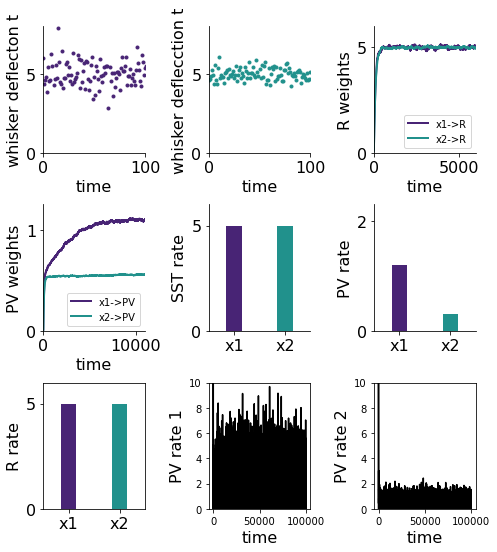

In [20]:
plt.figure(figsize=(7,7.5))
a0 = plt.subplot(331)
plt.plot(rY1,'.',color =cm.viridis(.1))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.1), linestyle='-',linewidth=20)

#plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
plt.ylabel('whisker deflecton t',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a0.spines['top'].set_visible(False)
a0.spines['right'].set_visible(False)
plt.ylim(0,8)
plt.xlim(0,100)
plt.xticks([0,100],[0,100],fontsize=16)

#plt.legend(loc='lower right')
a6 = plt.subplot(332)
#plt.plot(rY1,'.',color =cm.viridis(.3))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.5), linestyle='-',linewidth=20)

plt.ylabel('whisker deflecction t',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,8)
plt.xlim(0,100)
plt.yticks([0,5],[0,5],fontsize=16)
plt.xticks([0,100],[0,100],fontsize=16)
a6.spines['top'].set_visible(False)
a6.spines['right'].set_visible(False)

a1 = plt.subplot(333)
plt.plot(wRX1_monitor, label='x1->R', color =cm.viridis(.1),linewidth=2)
plt.plot(wRX2_monitor, label='x2->R',color =cm.viridis(.5),linewidth=2)
plt.ylabel('R weights',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.legend(loc='lower right')
plt.xlim(0,6000)
plt.xticks([0,5000],[0,5000],fontsize=16)
plt.ylim(0,6)
plt.yticks([0,5],[0,5],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)

a5 = plt.subplot(334)
plt.plot(wPX1_monitor, label='x1->PV', color =cm.viridis(.1),linewidth=2)
plt.plot(wPX2_monitor, label='x2->PV',color =cm.viridis(.5),linewidth=2)
plt.ylabel('PV weights',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
plt.xticks([0,10000],[0,10000],fontsize=16)
plt.ylim(0,1.25)
plt.xlim(0,11000)
plt.legend(loc='lower right')
a5.spines['top'].set_visible(False)
a5.spines['right'].set_visible(False)


a3 = plt.subplot(335)
plt.bar([0,1],[SST_avg1,SST_avg2],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a2 = plt.subplot(336)
plt.bar([0,1],[PV_avg1,PV_avg2],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)
plt.yticks([0,2],[0,2],fontsize=16)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.ylim(0,2.3)
plt.xlim(-0.5,1.5)

a9 = plt.subplot(337)
plt.bar([0,1],[R_avg1,R_avg2],color=[cm.viridis(.1),cm.viridis(.5)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('R rate',fontsize=16)
plt.xticks([0,1],['x1','x2'],fontsize=16)

a10 = plt.subplot(338)
plt.plot(rP1, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('PV rate 1',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)

a10 = plt.subplot(339)
plt.plot(rP2, color = 'k')#,
         #label = 'mean rate during Y1: %.2f; Y2: %.2f'%(np.mean(rP_monitor[100:int(T/2)]),np.mean(rP_monitor[int(T/2)+100:])))
plt.ylabel('PV rate 2',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,10)

plt.tight_layout()
plt.savefig('./results.pdf', bbox_inches='tight',rasterized=True)


In [21]:
Y1_mean_new = 7.0
Y2_mean_new = 7.0
Y1_sigma_new = 0.5
Y2_sigma_new = 0.5
E_avg1_new, PV_avg1_new, SST_avg1_new, R_avg1_new, E_std1_new, PV_std1_new, SST_std1_new, R_std1_new, dummy, dummy, rE1_new, rS1_new, rP1_new, rY1_new = run_network(mean= Y1_mean_new,sigma=Y1_sigma_new, w_init_PV = wPX1_monitor[-1], w_init_R = wRX1_monitor[-1], plastic=False)
E_avg2_new, PV_avg2_new, SST_avg2_new, R_avg2_new, E_std2_new, PV_std2_new, SST_std2_new, R_std2_new, dummy, dummy, rE2_new, rS2_new, rP2_new, rY2_new = run_network(mean= Y2_mean_new,sigma=Y2_sigma_new, w_init_PV = wPX2_monitor[-1], w_init_R = wRX2_monitor[-1], plastic=False)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[-0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [22]:
E_avg1_new


0.35386036339844973

<ipython-input-26-d9cb0410cb73>:148: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./pPEcircuit.pdf', bbox_inches='tight',rasterized=True)


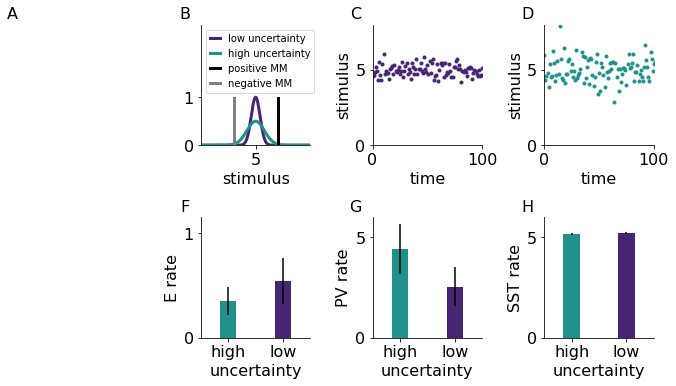

In [26]:
x_values = np.arange(0, 10, 0.001)
y1_values = stats.norm(Y1_mean, Y1_sigma)
y2_values = stats.norm(Y2_mean, Y2_sigma)

plt.figure(figsize=(9.5,5.5))

aa = plt.subplot(241)
aa.text(-0.1, 1.15, 'A', transform=aa.transAxes,
      fontsize=16, va='top', ha='right')
aa.spines['top'].set_visible(False)
aa.spines['right'].set_visible(False)
aa.spines['bottom'].set_visible(False)
aa.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

#a = plt.subplot(241)
a = plt.subplot(242)
a.text(-0.1, 1.15, 'B', transform=a.transAxes,
      fontsize=16, va='top', ha='right')
plt.plot(x_values, y2_values.pdf(x_values), color = cm.viridis(0.1),linewidth =3,label='low uncertainty')
plt.plot(x_values, y1_values.pdf(x_values), color = cm.viridis(0.5),linewidth =3,label='high uncertainty')
plt.plot(np.ones((100))*7,np.arange(0,1,0.01),color = 'k',linewidth=3, label = 'positive MM')
plt.plot(np.ones((100))*3,np.arange(0,1,0.01),color = 'gray',linewidth=3, label = 'negative MM')

ldg = plt.legend()
plt.xlim(0,10)
plt.ylim(0,2.5)
plt.yticks([0,1],[0,1],fontsize=16)
plt.xticks([5],[5],fontsize=16)
plt.xlabel('stimulus', fontsize = 16)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
#a.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=False)
a.legend(loc='upper left',markerscale=0.5,handlelength=1.0)#, bbox_to_anchor=(1, 0.5))


#plt.legend(loc='lower right')
a6 = plt.subplot(243)
a6.text(-0.1, 1.15, 'C', transform=a6.transAxes,
      fontsize=16, va='top', ha='right')
#plt.plot(rY1,'.',color =cm.viridis(.3))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
plt.plot(rY2,'.',color =cm.viridis(.1))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.5), linestyle='-',linewidth=20)

plt.ylabel('stimulus',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylim(0,8)
plt.xlim(0,100)
plt.yticks([0,5],[0,5],fontsize=16)
plt.xticks([0,100],[0,100],fontsize=16)
a6.spines['top'].set_visible(False)
a6.spines['right'].set_visible(False)


a0 = plt.subplot(244)
a0.text(-0.1, 1.15, 'D', transform=a0.transAxes,
      fontsize=16, va='top', ha='right')
plt.plot(rY1,'.',color =cm.viridis(.5))#, label='Y1: mean: %.1f, sigma: %.1f'%(Y1_mean,Y1_sigma))
#plt.axhline(y=0.1, color=cm.viridis(.1), linestyle='-',linewidth=20)

#plt.plot(rY2,'.',color =cm.viridis(.5))#, label='Y2: mean: %.1f, sigma: %.1f'%(Y2_mean,Y2_sigma))
plt.ylabel('stimulus',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
a0.spines['top'].set_visible(False)
a0.spines['right'].set_visible(False)
plt.ylim(0,8)
plt.xlim(0,100)
plt.xticks([0,100],[0,100],fontsize=16)

"""a7 = plt.subplot(255)
a7.text(-0.1, 1.15, 'E', transform=a7.transAxes,
      fontsize=16, va='top', ha='right')
plt.errorbar(mean_range,SST_rates_mean, yerr=SST_std_mean, color = 'k', fmt='.')

plt.xlabel(r'$\mu$',fontsize=15)
plt.ylabel('SST rate',fontsize=15)
plt.xticks([0,5],[0,5],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
plt.ylim(-0.2,6)
a7.spines['top'].set_visible(False)
a7.spines['right'].set_visible(False)
"""
ae = plt.subplot(245)
ae.spines['top'].set_visible(False)
ae.spines['right'].set_visible(False)
ae.spines['bottom'].set_visible(False)
ae.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

a1 = plt.subplot(246)
a1.text(-0.1, 1.15, 'F', transform=a1.transAxes,
      fontsize=16, va='top', ha='right')
plt.bar([0,1],[E_avg1_new,E_avg2_new],yerr=[E_std1_new,E_std2_new],color=[cm.viridis(.5),cm.viridis(.1)],width=0.3)  
plt.ylabel('E rate',fontsize=16)
plt.xticks([0,1],['high','low'],fontsize=16)
plt.yticks([0,1],[0,1],fontsize=16)
a1.spines['top'].set_visible(False)
a1.spines['right'].set_visible(False)
plt.ylim(0,1.15)
plt.xlim(-0.5,1.5)
plt.xlabel('uncertainty',fontsize=16)


a2 = plt.subplot(247)
a2.text(-0.1, 1.15, 'G', transform=a2.transAxes,
      fontsize=16, va='top', ha='right')
plt.bar([0,1],[PV_avg1_new,PV_avg2_new],yerr=[PV_std1_new,PV_std2_new],color=[cm.viridis(.5),cm.viridis(.1)],width=0.3)  
plt.ylabel('PV rate',fontsize=16)
plt.xticks([0,1],['high','low'],fontsize=16)
plt.yticks([0,5],[0,5],fontsize=16)
plt.ylim(0,6)
a2.spines['top'].set_visible(False)
a2.spines['right'].set_visible(False)
plt.xlim(-0.5,1.5)
plt.xlabel('uncertainty',fontsize=16)


a3 = plt.subplot(248)
a3.text(-0.1, 1.15, 'H', transform=a3.transAxes,
      fontsize=16, va='top', ha='right')
plt.bar([0,1],[SST_avg1_new,SST_avg2_new],yerr=[SST_std1_new,SST_std2_new],color=[cm.viridis(.5),cm.viridis(.1)],width=0.3)  
plt.ylim(0,6)
plt.xlim(-0.5,1.5)
plt.yticks([0,5],[0,5],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
plt.ylabel('SST rate',fontsize=16)
plt.xticks([0,1],['high','low'],fontsize=16)
plt.xlabel('uncertainty',fontsize=16)

"""
a3 = plt.subplot(2,5,10)
a3.text(-0.1, 1.15, 'I', transform=a3.transAxes,
      fontsize=16, va='top', ha='right')
plt.errorbar(sigma_range**2,PV_rates_sigma, yerr=PV_std_sigma, color = 'k',fmt='.')
plt.xlabel(r'$\sigma^2$',fontsize=15)
plt.ylabel('PV rate',fontsize=15)
plt.xticks([0.0,1.0],[0,1],fontsize=16)
plt.yticks([0,2],[0,2],fontsize=16)
a3.spines['top'].set_visible(False)
a3.spines['right'].set_visible(False)
"""
plt.tight_layout()

plt.savefig('./pPEcircuit.pdf', bbox_inches='tight',rasterized=True)

In [24]:
print(SST_std_mean)

NameError: name 'SST_std_mean' is not defined